In [11]:
import os
import math
import numpy as np
import datetime as dt
import time
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import warnings
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

%matplotlib nbagg

warnings.filterwarnings('ignore')

### Read and Initial Clean

In [12]:
data = pd.read_csv('Data/TrainingData.csv', index_col=0)

data.replace('missing', np.nan, inplace=True)
data.replace('na', np.nan, inplace=True)
int_cols = list(set(data.columns) - {'mvar47'})
data[int_cols] = data[int_cols].astype(float)
data.describe()

mvar1         mvar2         mvar3         mvar4         mvar5  \
count  79267.000000  77114.000000  82465.000000  82465.000000  82465.000000   
mean    1747.511865      1.054816      5.401784      0.461151      1.084012   
std       94.830127      1.556682     11.091569      1.704292      5.743899   
min     1477.000000      0.000000      0.000000      0.000000      0.000000   
25%     1680.000000      0.131800      0.000000      0.000000      0.000000   
50%     1743.000000      0.513000      0.300000      0.000000      0.000000   
75%     1813.000000      1.386200      6.595000      0.000000      0.000000   
max     1950.000000     31.018100    399.334000     25.754000    165.492000   

              mvar6         mvar7          mvar8          mvar9        mvar10  \
count  63299.000000  7.532600e+04   63291.000000   71318.000000  8.246500e+04   
mean    1633.429280  1.750797e+04    6822.332227   34030.596329  3.022857e+04   
std     3667.183981  4.677222e+04   10060.346814   50673.150005  6.617798e+04   
min        0.000000  0.000000e+00       0.000000       0.000000  0.000000e+00   
25%       41.000000  1.750250e+03     496.000000    3542.250000  1.153000e+03   
50%      297.000000  7.020500e+03    2507.000000   14389.000000  9.525000e+03   
75%     1381.000000  1.811300e+04    9869.500000   44413.000000  3.428800e+04   
max    94302.000000  5.637108e+06  291810.000000  840658.000000  5.647073e+06   

       ...        mvar39        mvar40        mvar41        mvar42  \
count  ...  76671.000000  17930.000000  25736.000000  80977.000000   
mean   ...      0.087673     97.851158     72.016570      0.331550   
std    ...      0.423403     29.530657     24.508469      0.373973   
min    ...      0.000000      0.014000      0.000000      0.000000   
25%    ...      0.000000     90.149500     58.174750      0.000000   
50%    ...      0.000000    100.000000     78.839500      0.200000   
75%    ...      0.000000    111.327000     91.596750      0.571430   
max    ...     21.000000    631.360000    182.111000      2.000000   

             mvar43        mvar44        mvar45        mvar46        mvar48  \
count  82111.000000  74851.000000  37080.000000  59397.000000  83000.000000   
mean       6.553604      0.706595      0.070523      0.093187    556.021277   
std        6.273107      0.245915      0.290383      0.329054   1106.953295   
min        0.000000      0.060660      0.000000      0.000000      2.000000   
25%        2.000000      0.515280      0.000000      0.000000      8.000000   
50%        5.000000      0.739500      0.000000      0.000000     17.000000   
75%       10.000000      0.945120      0.000000      0.000000    111.000000   
max       91.000000      1.000000      7.000000      5.000000   3247.000000   

        default_ind  
count  83000.000000  
mean       0.287410  
std        0.452557  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  

[8 rows x 48 columns]

<IPython.core.display.Javascript object>


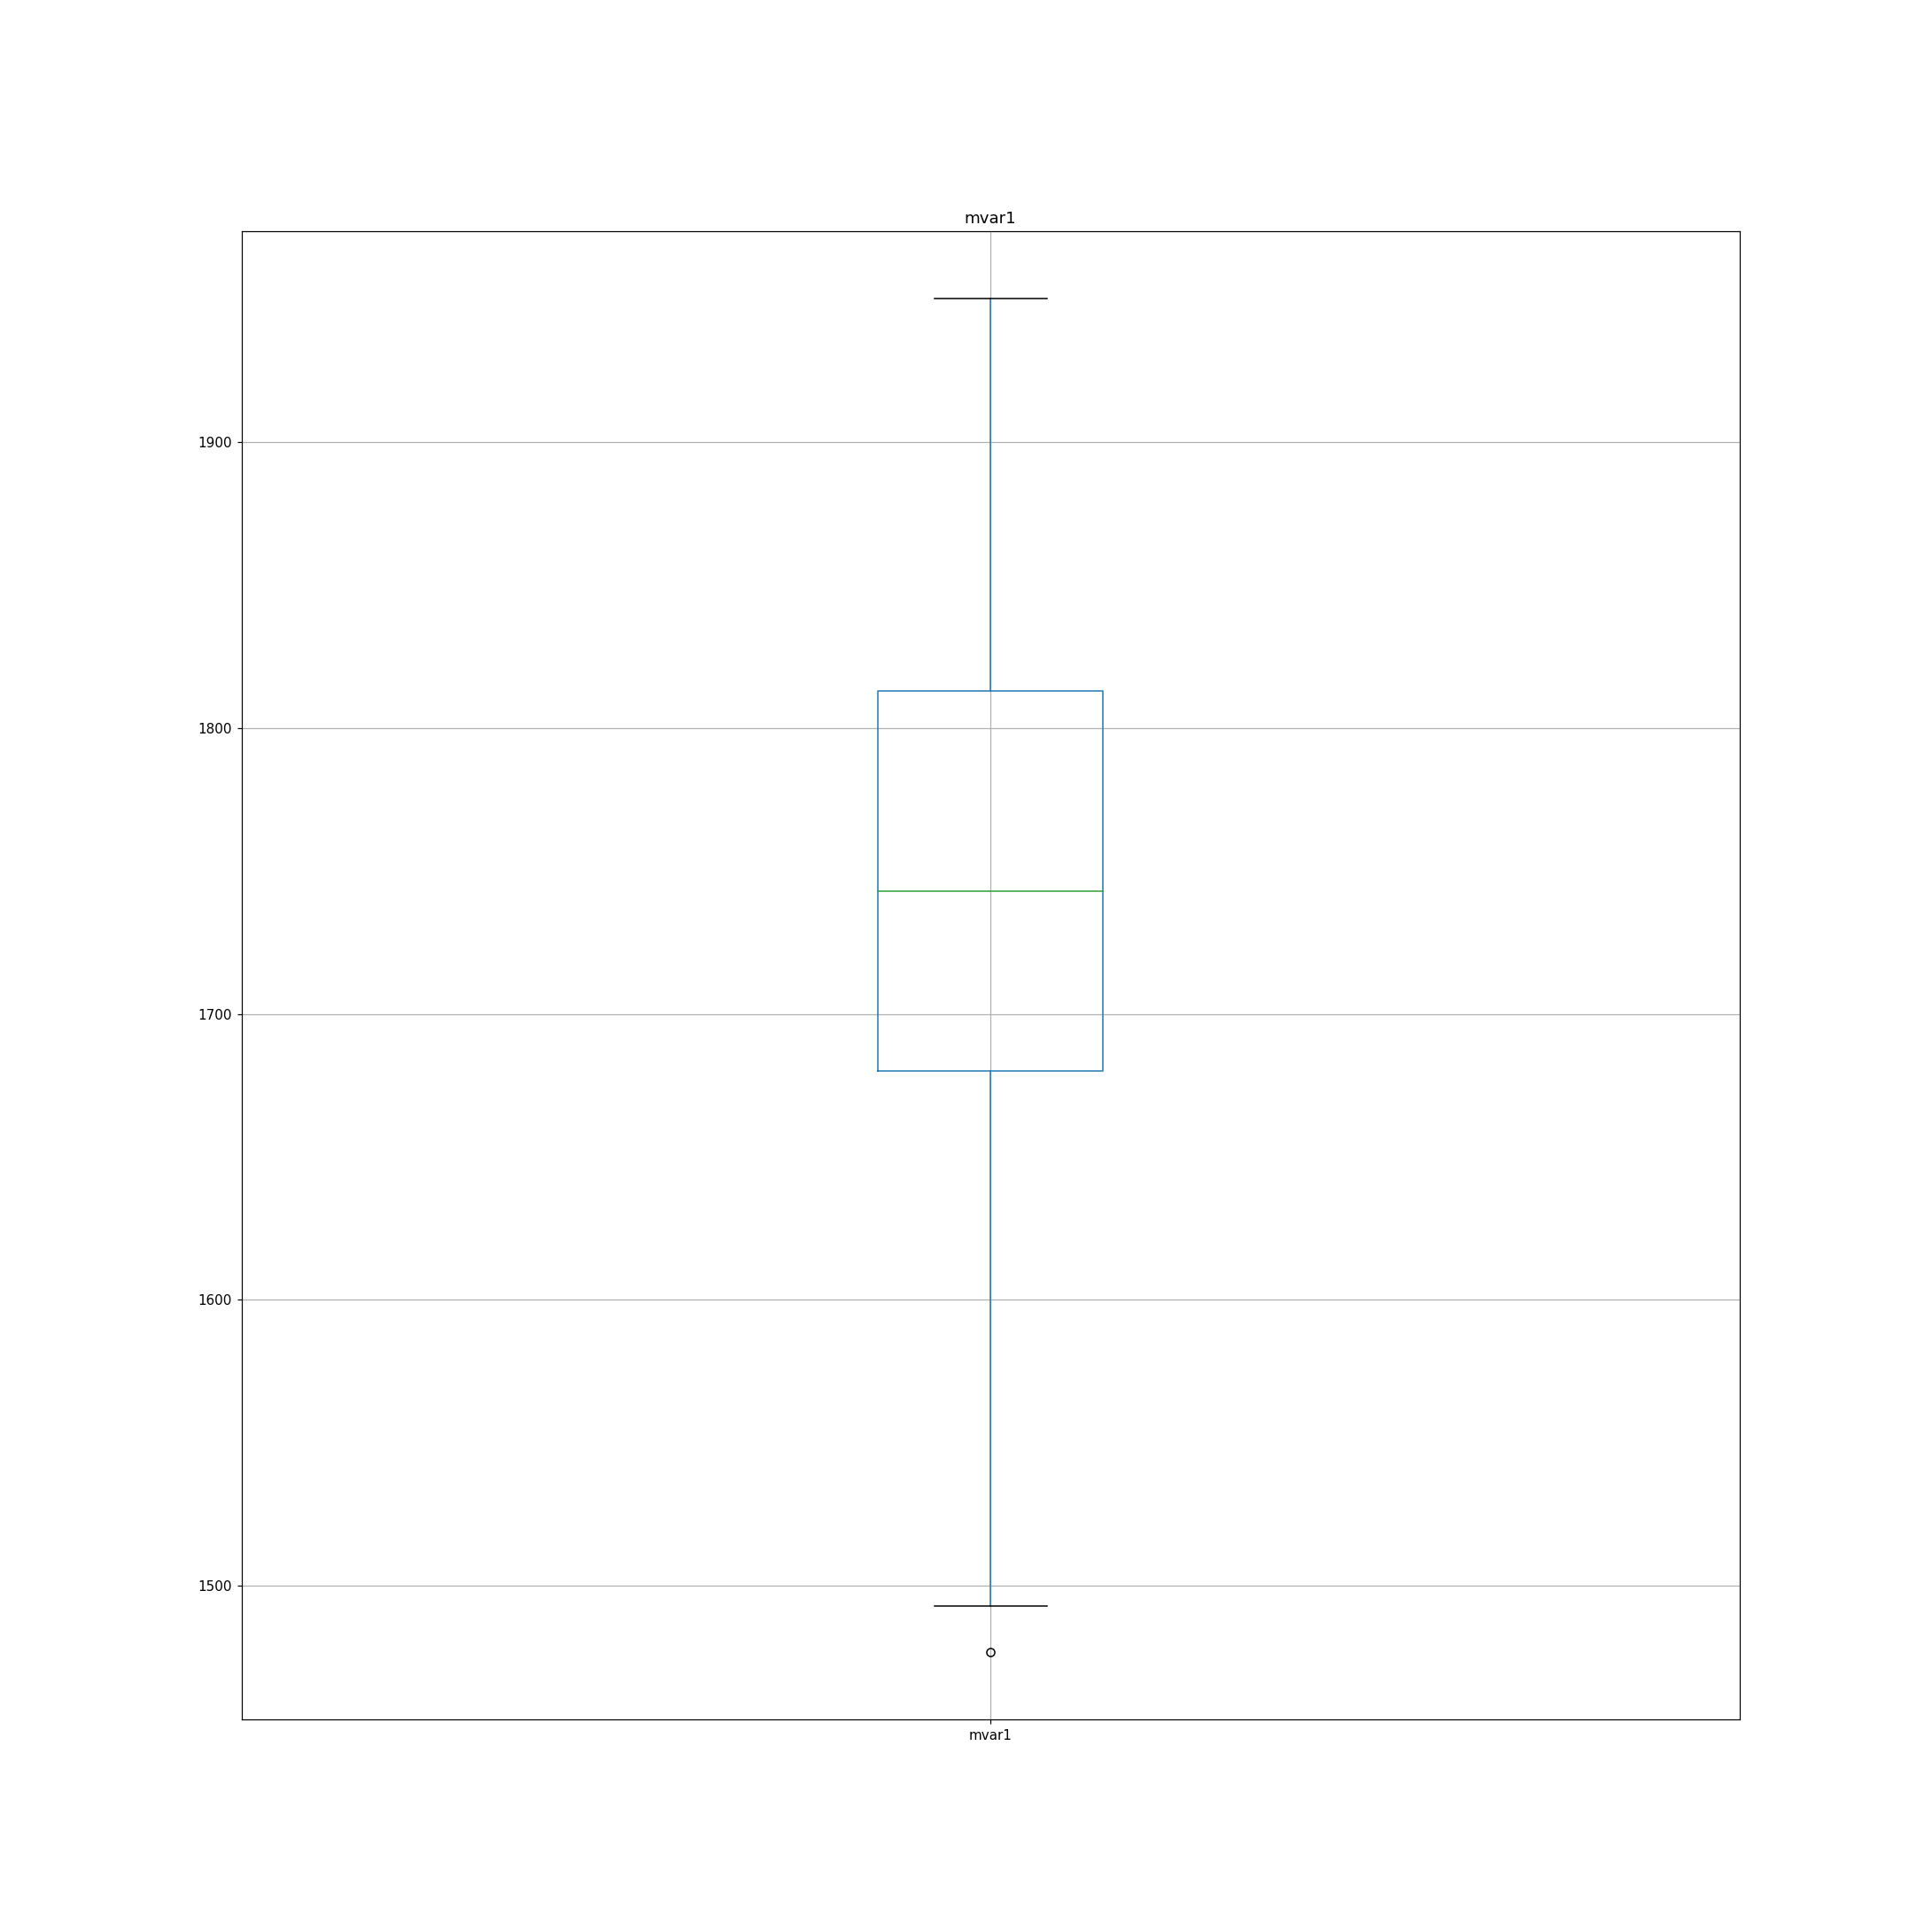

<IPython.core.display.Javascript object>


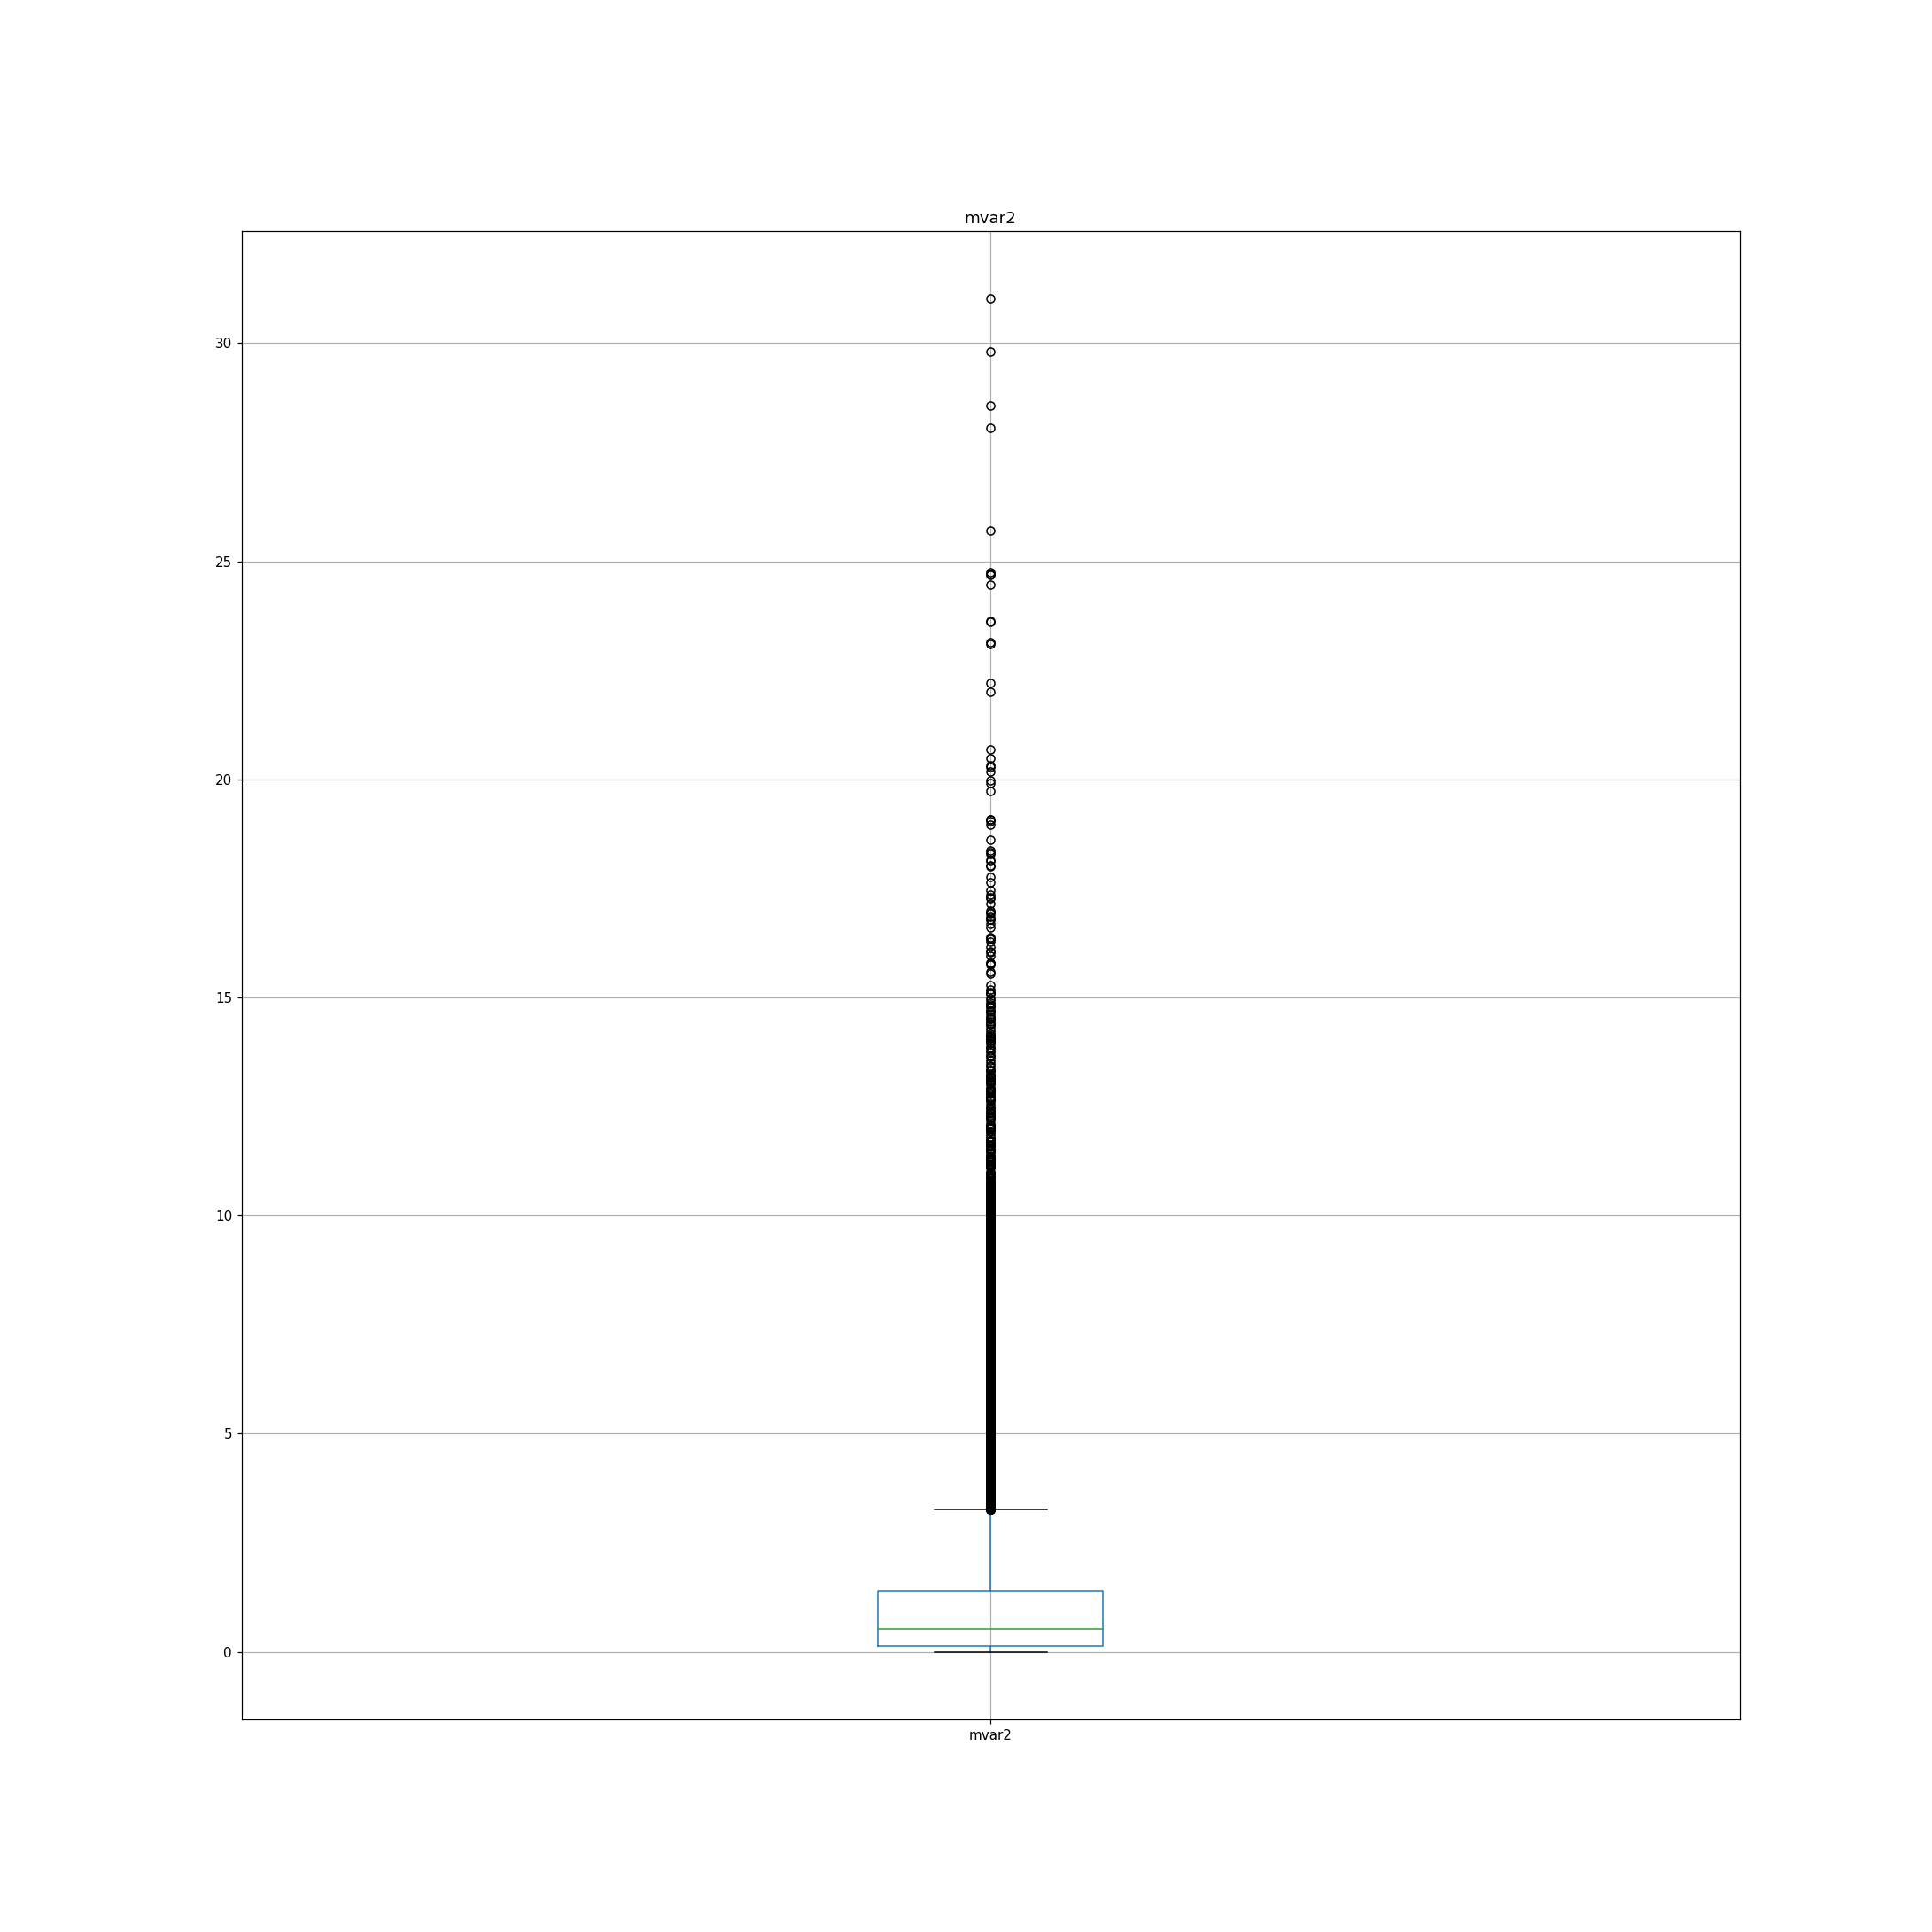

<IPython.core.display.Javascript object>


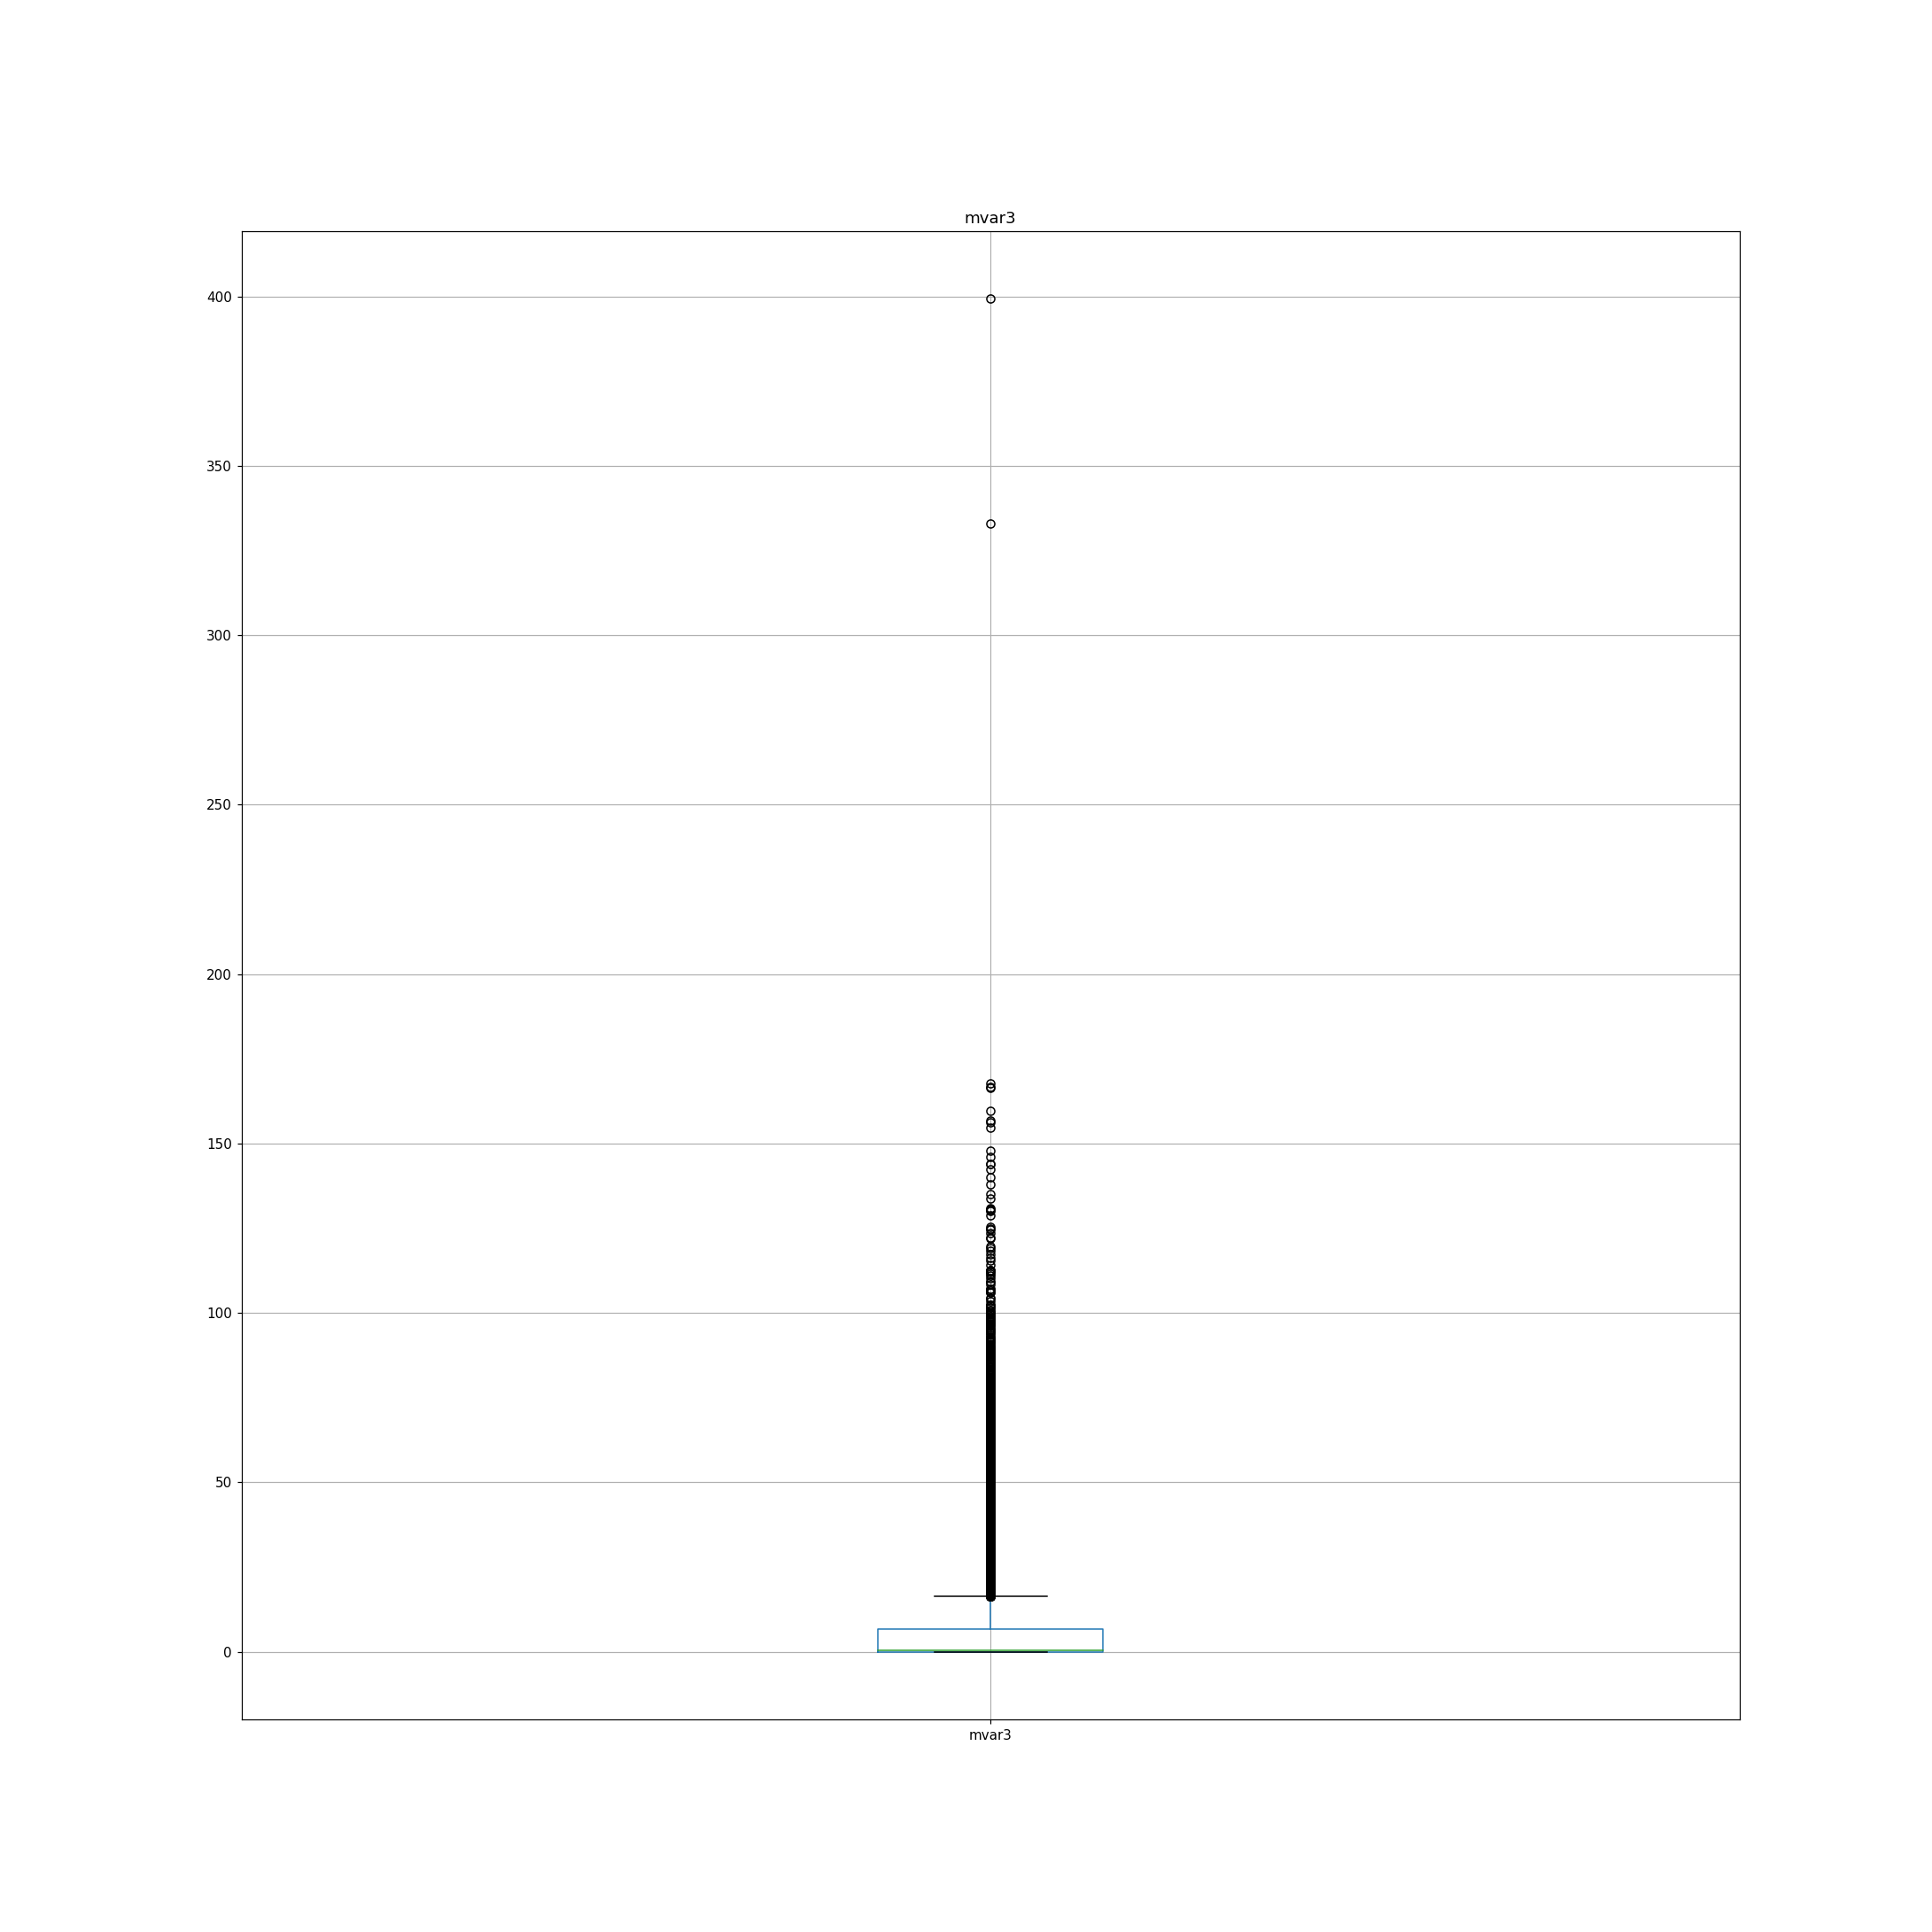

<IPython.core.display.Javascript object>


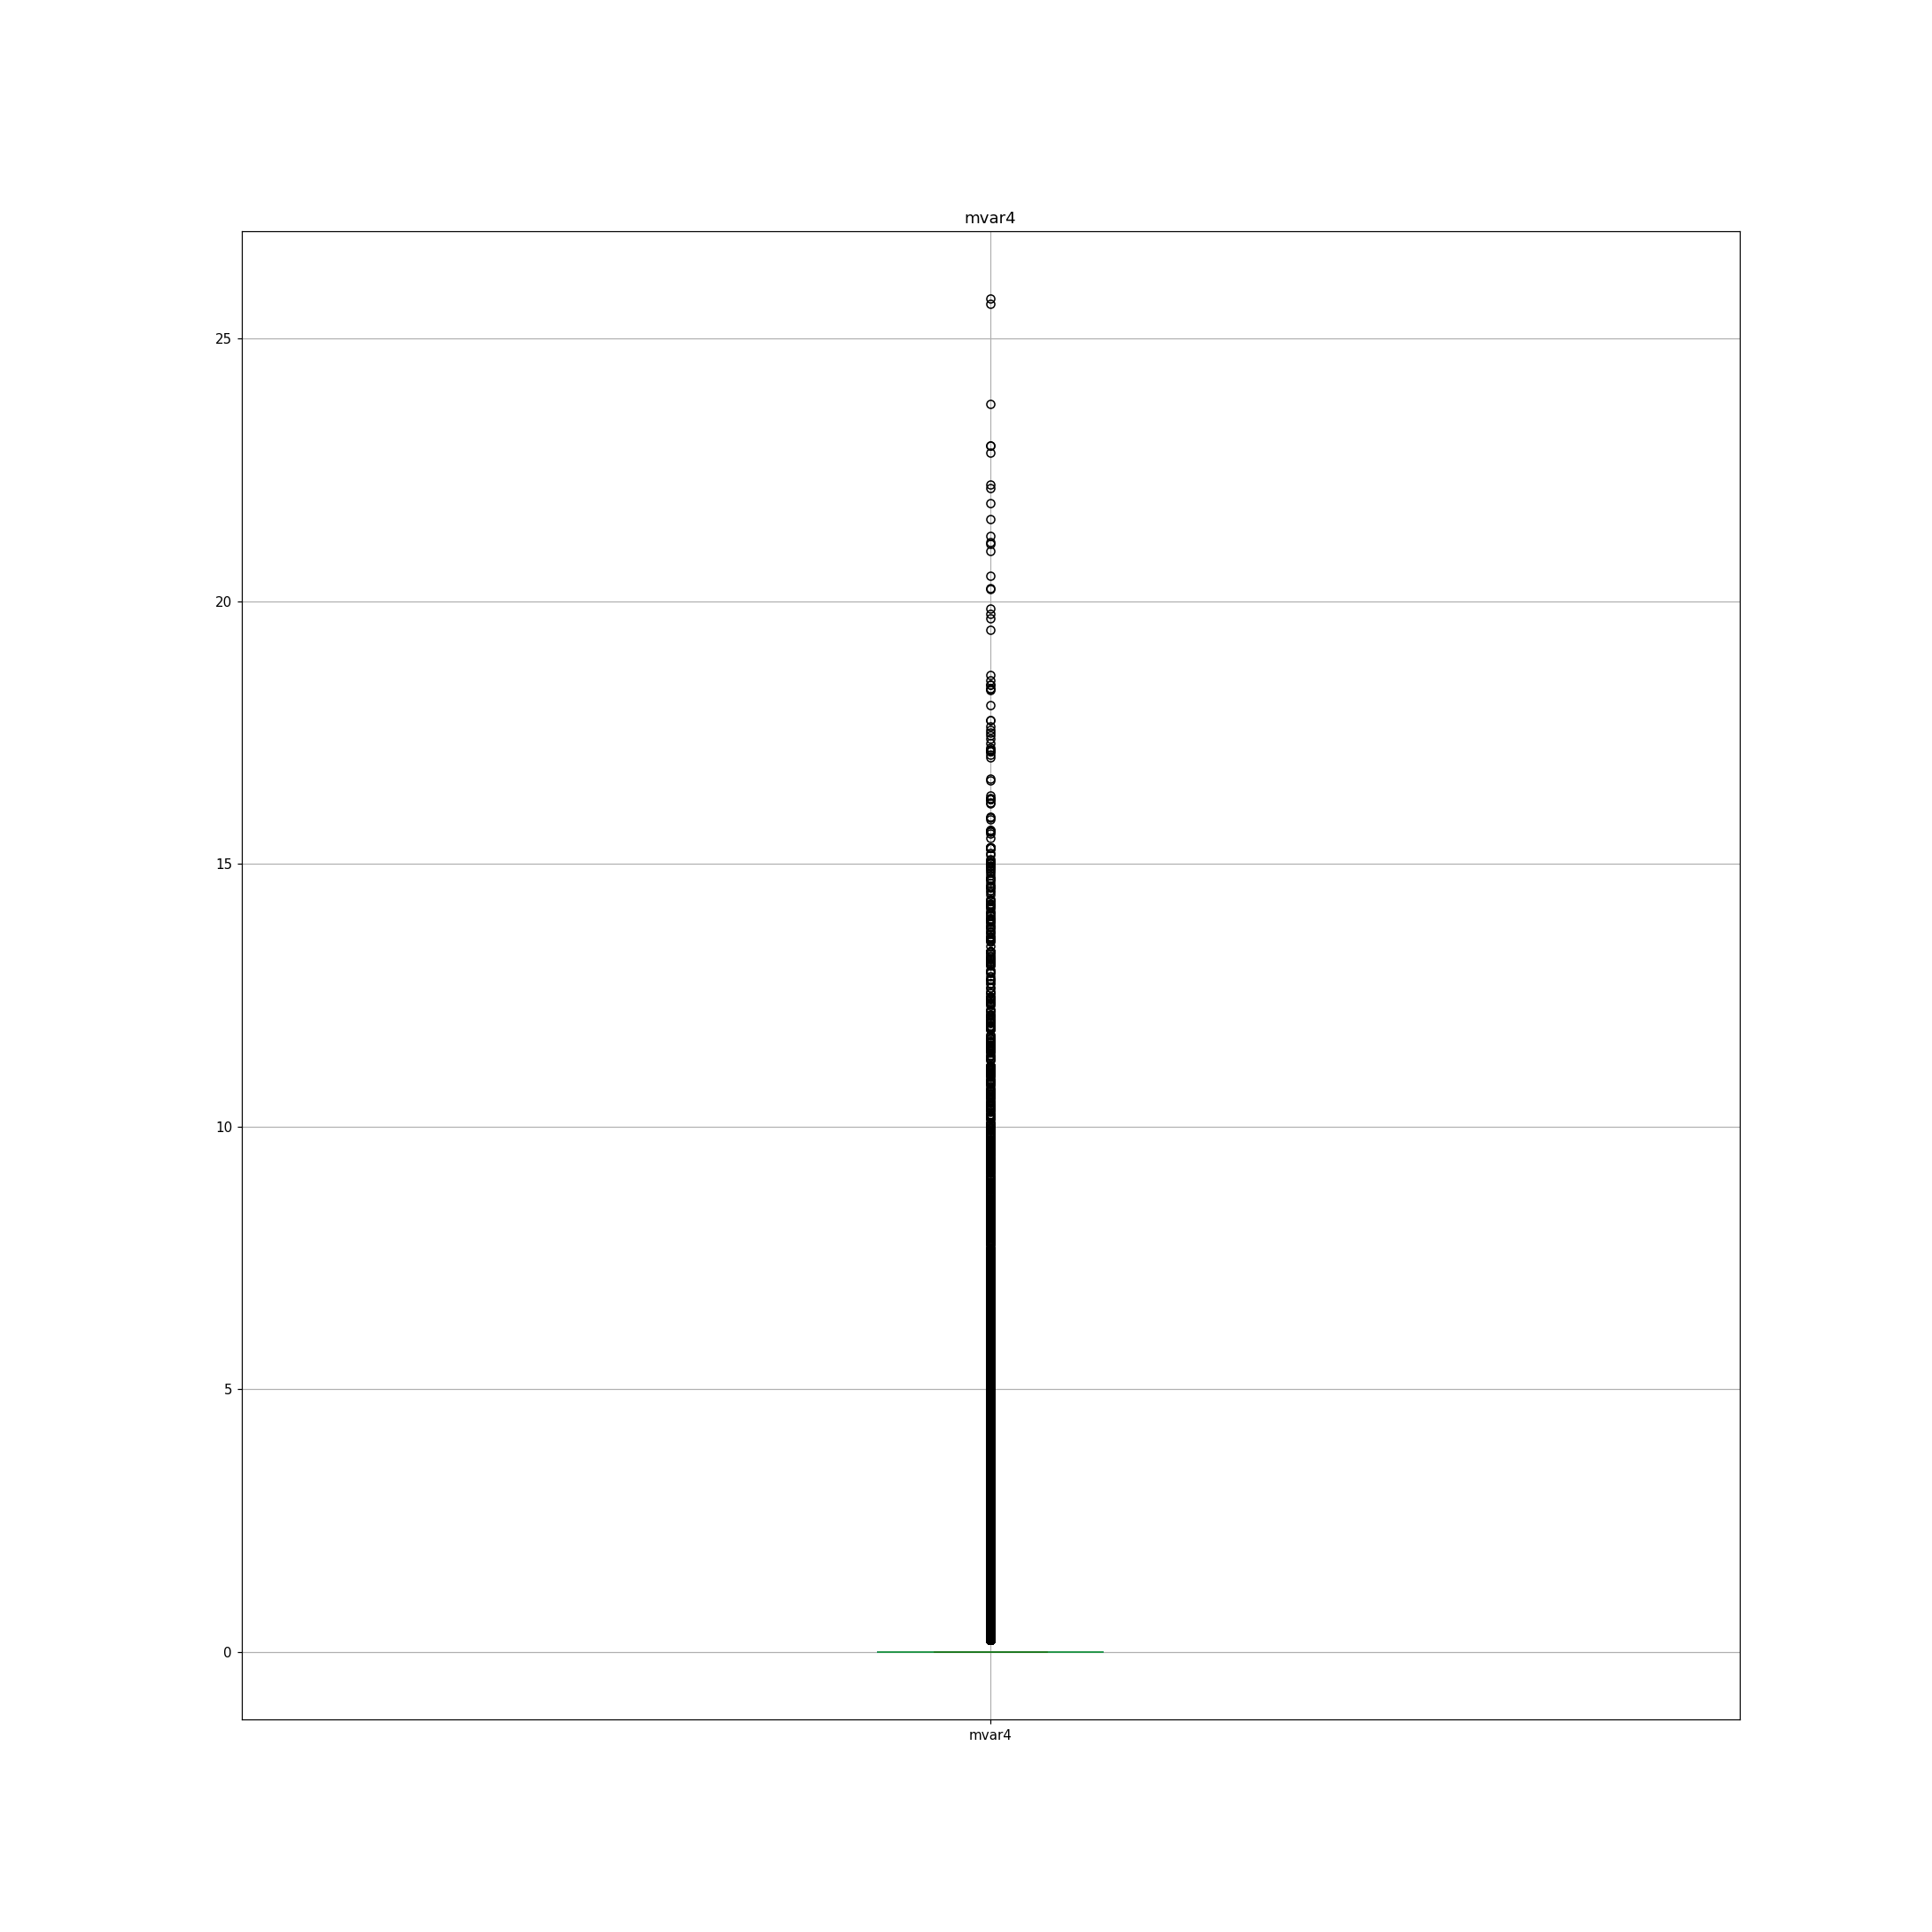

<IPython.core.display.Javascript object>


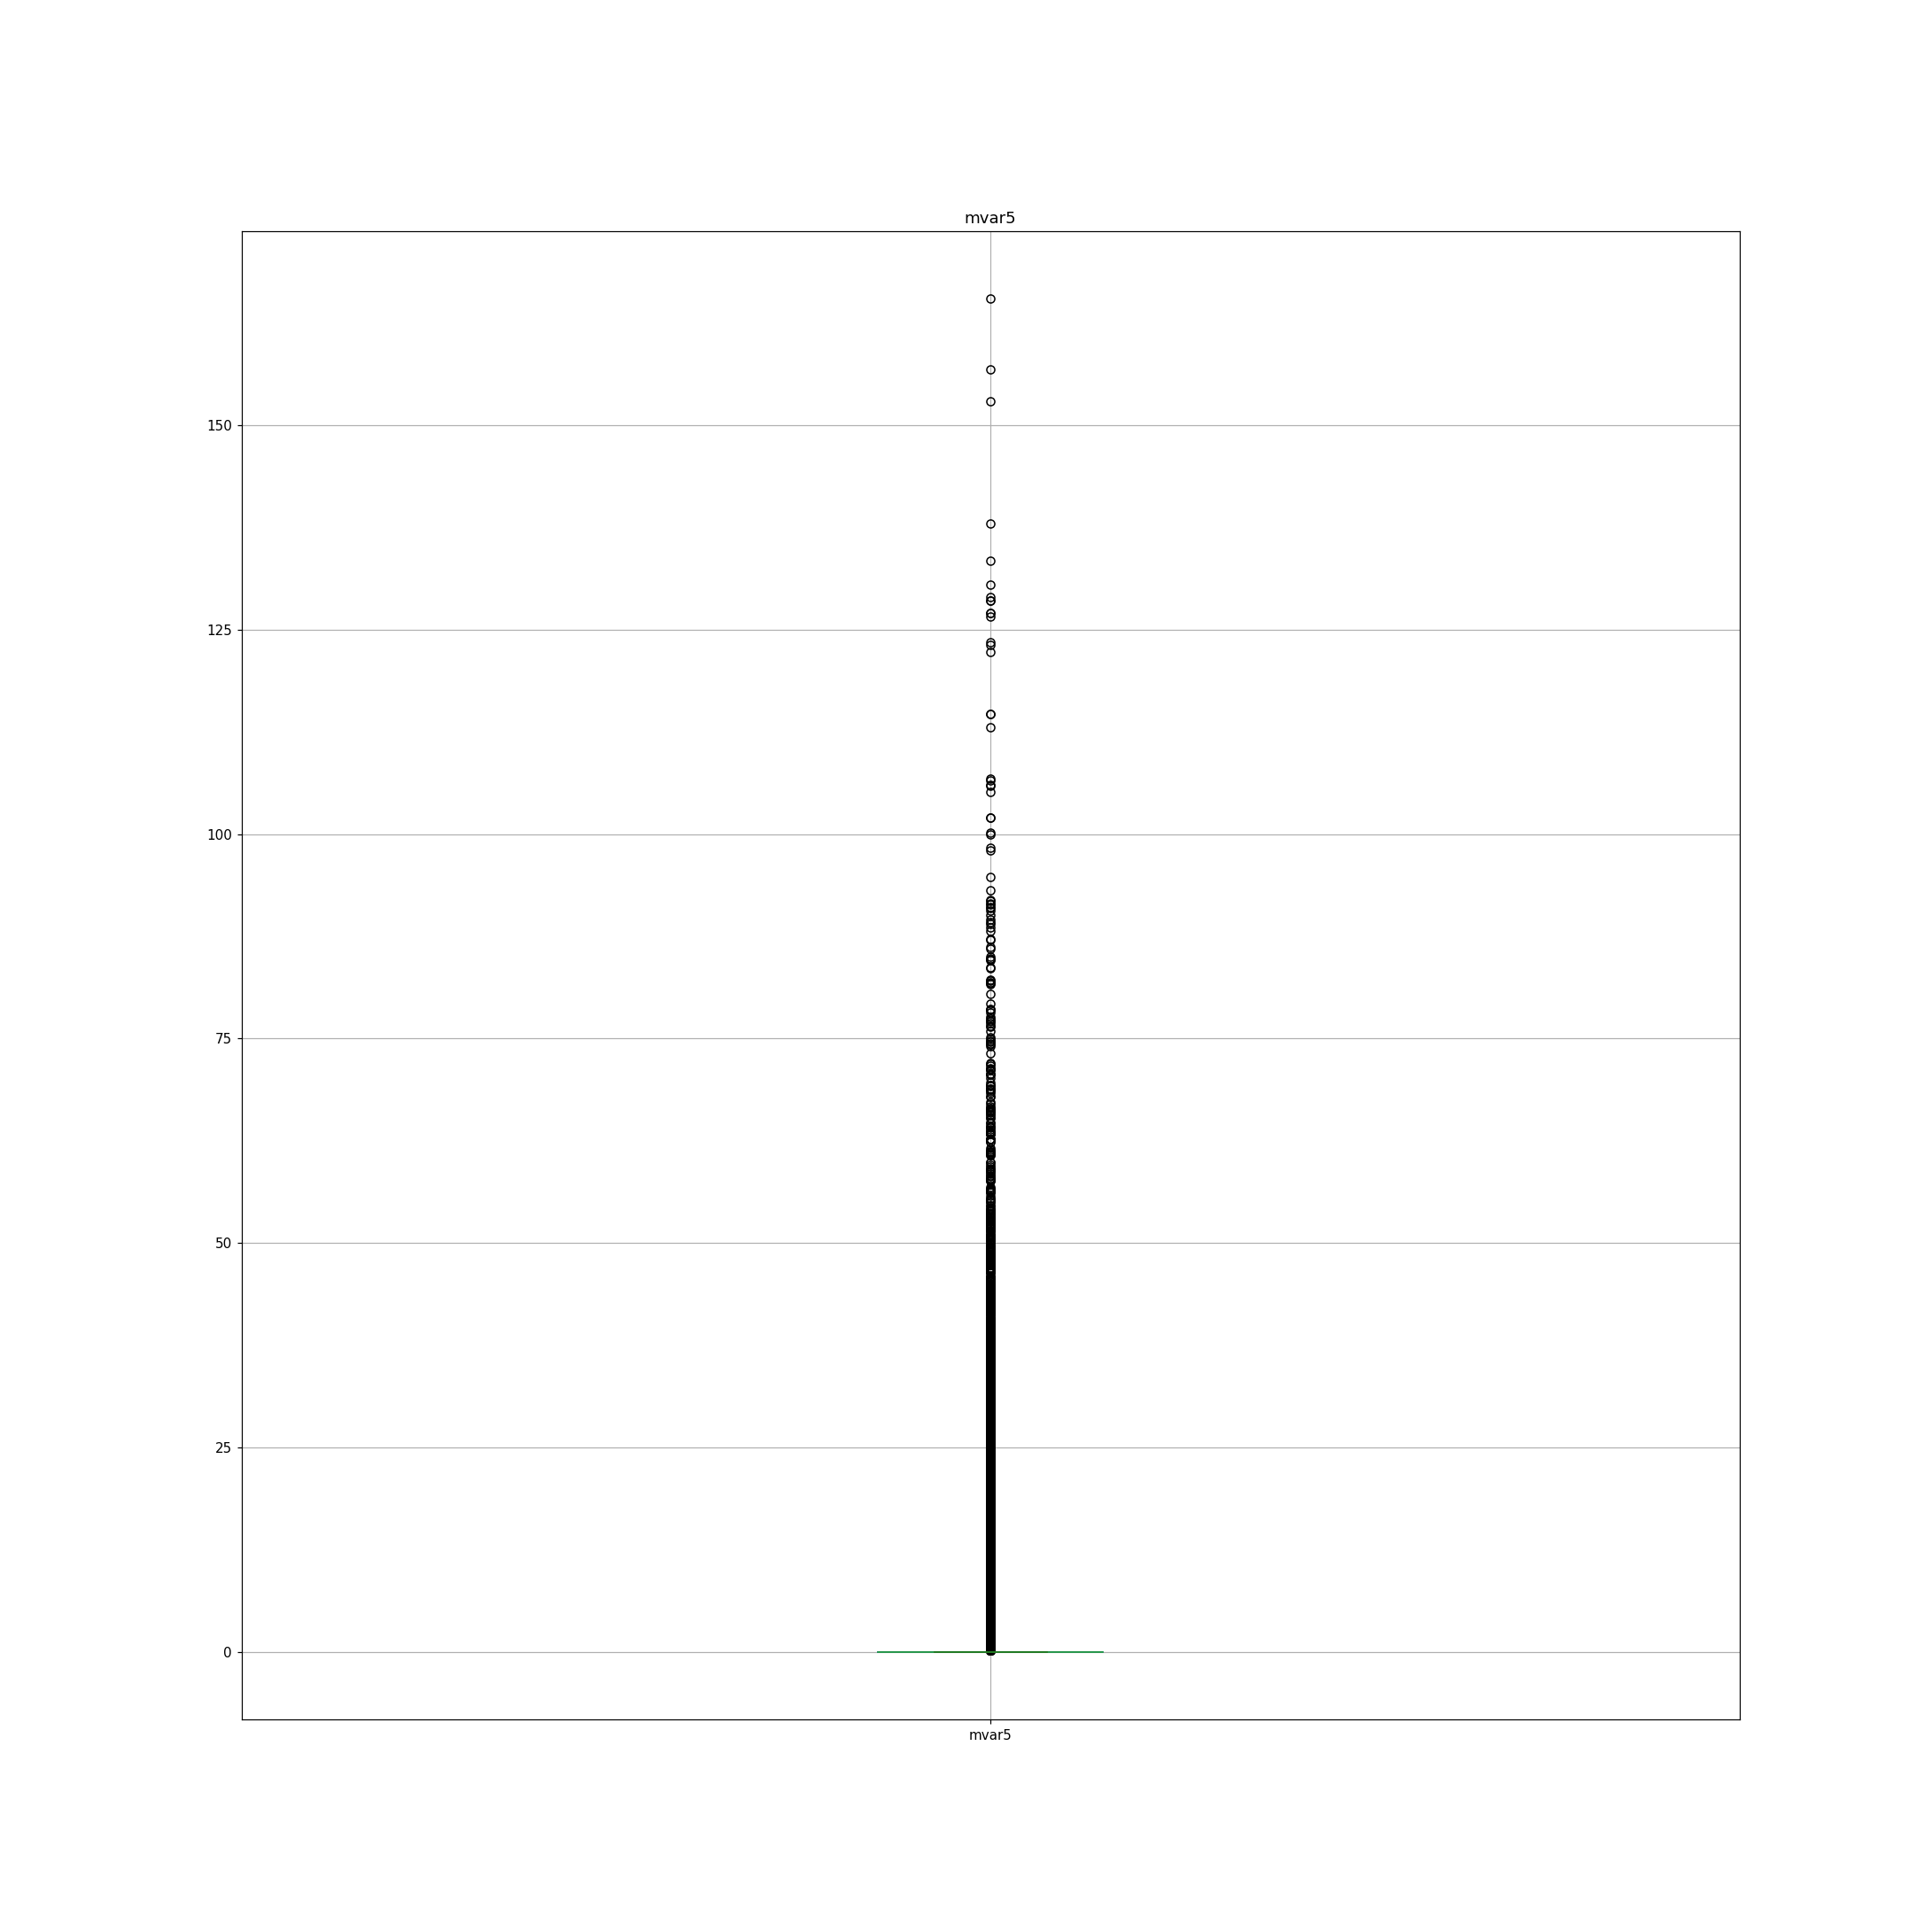

<IPython.core.display.Javascript object>


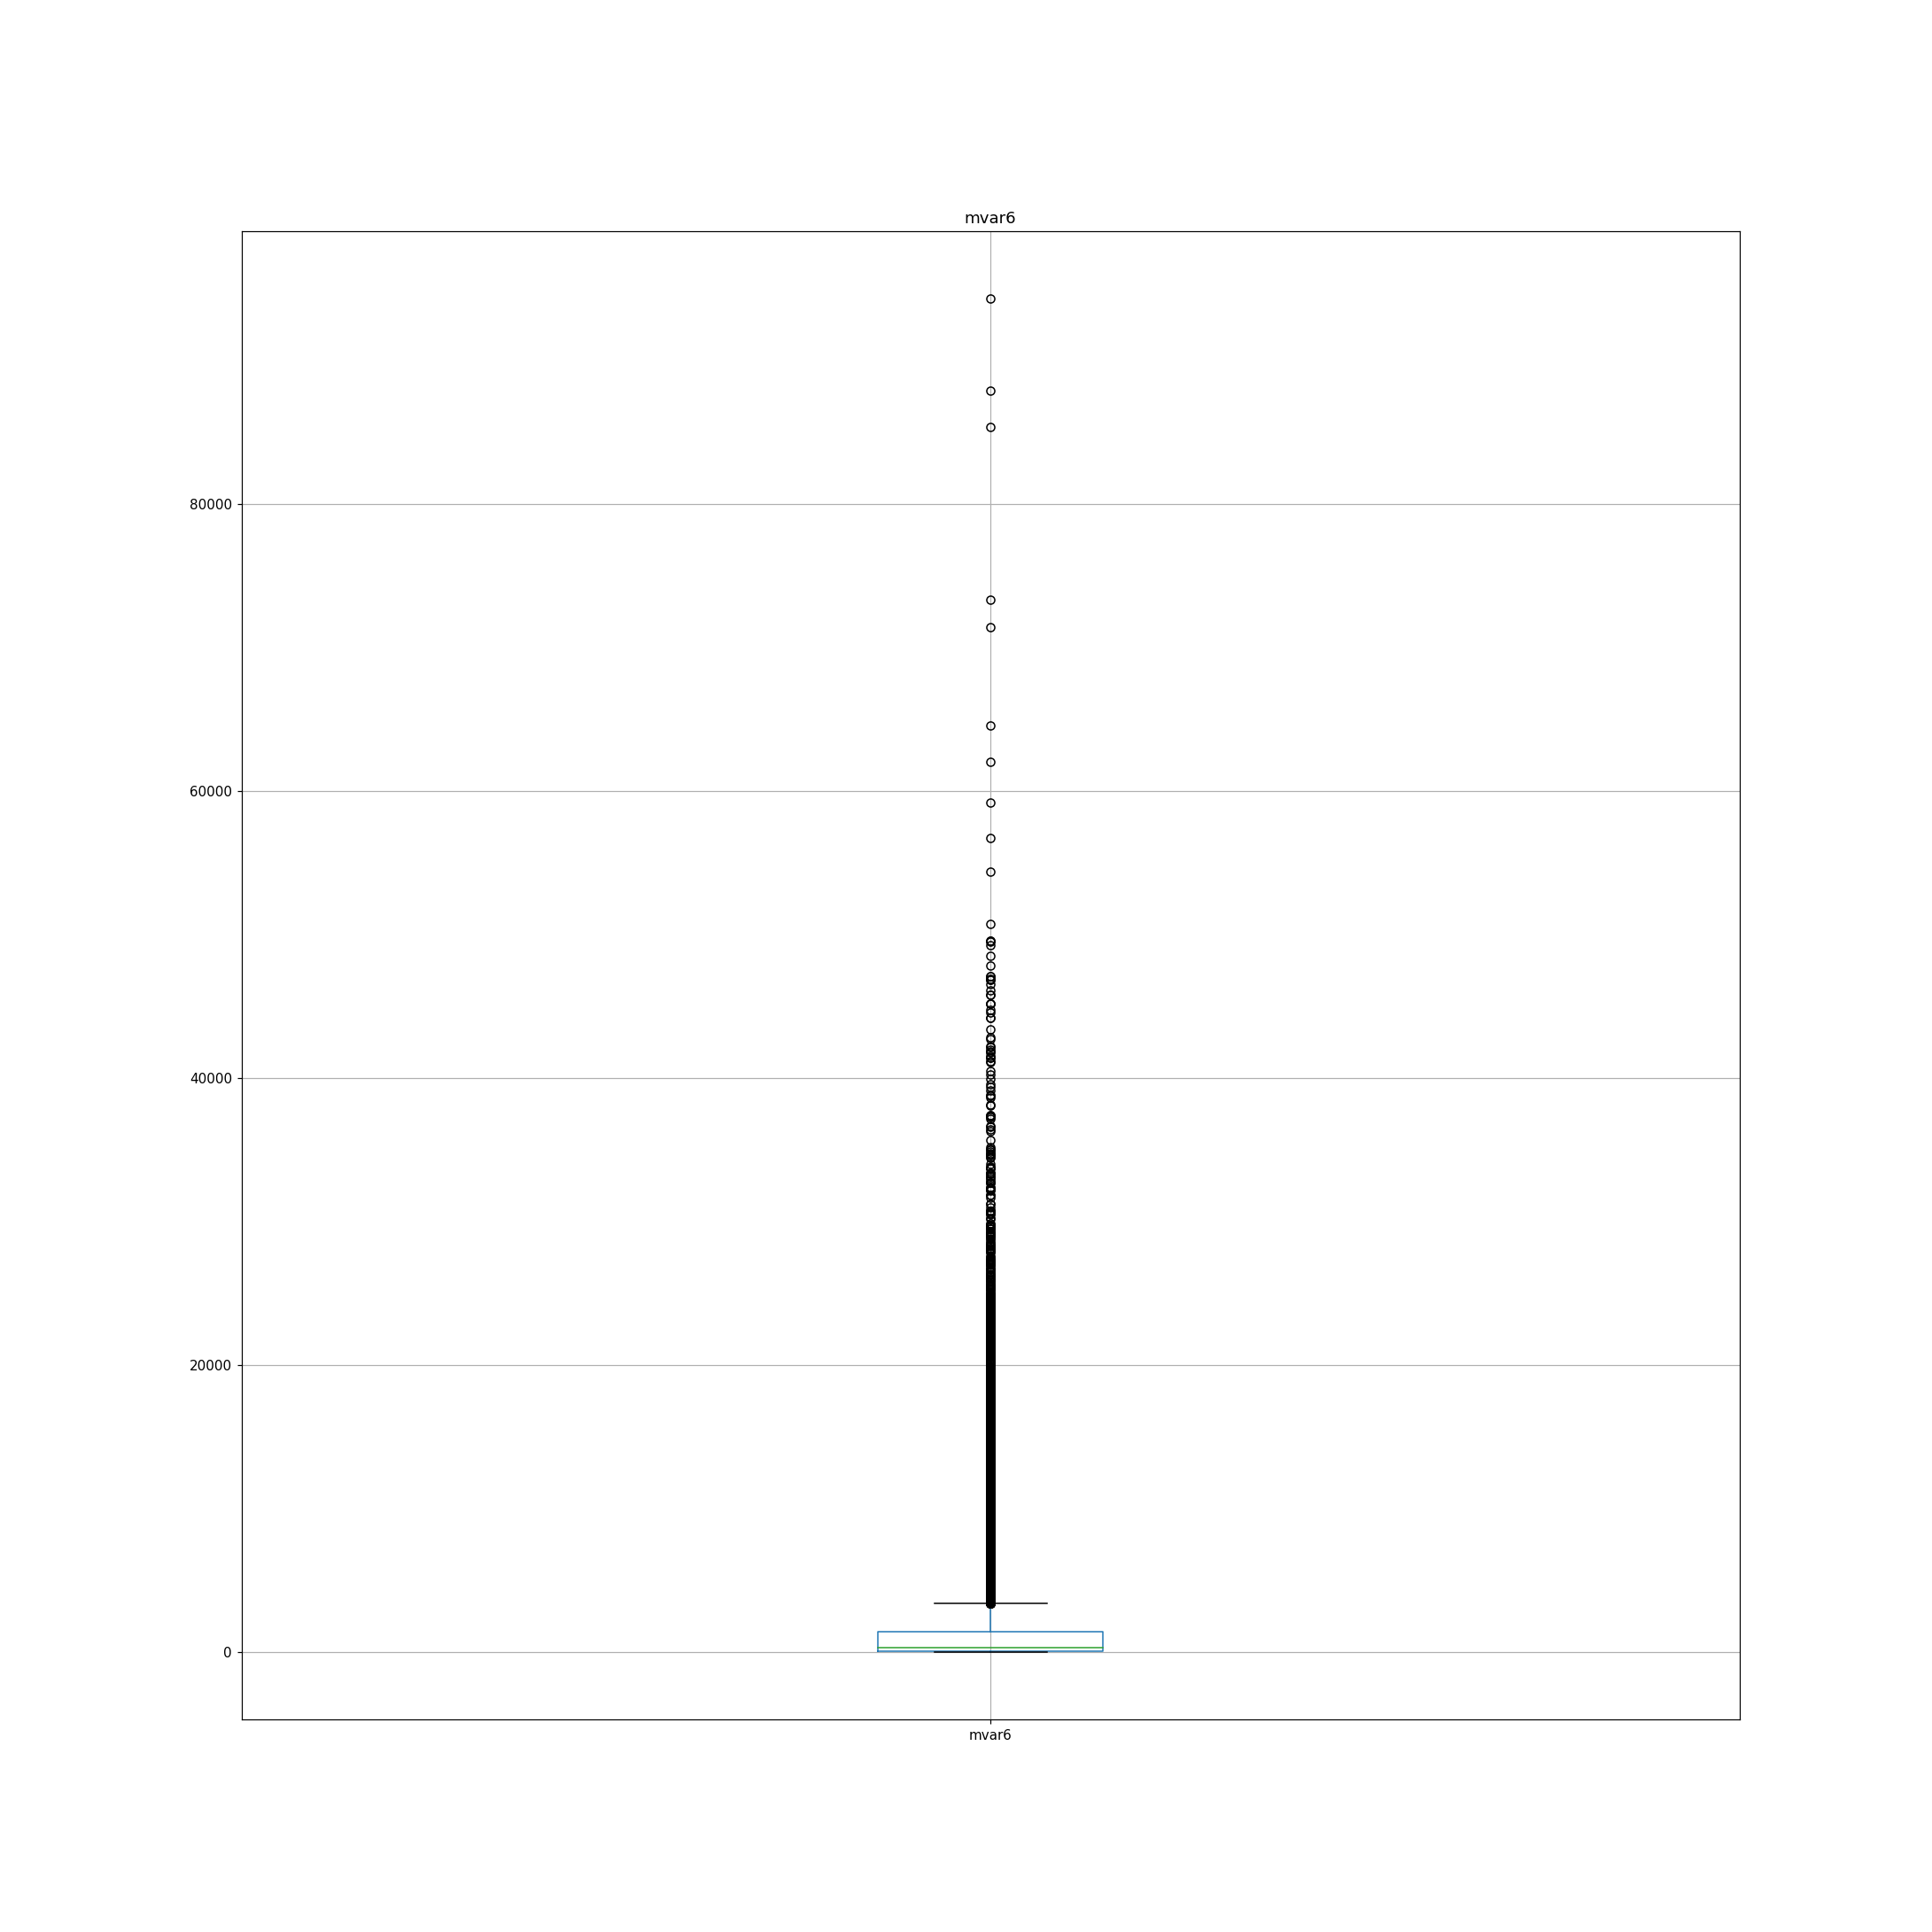

<IPython.core.display.Javascript object>


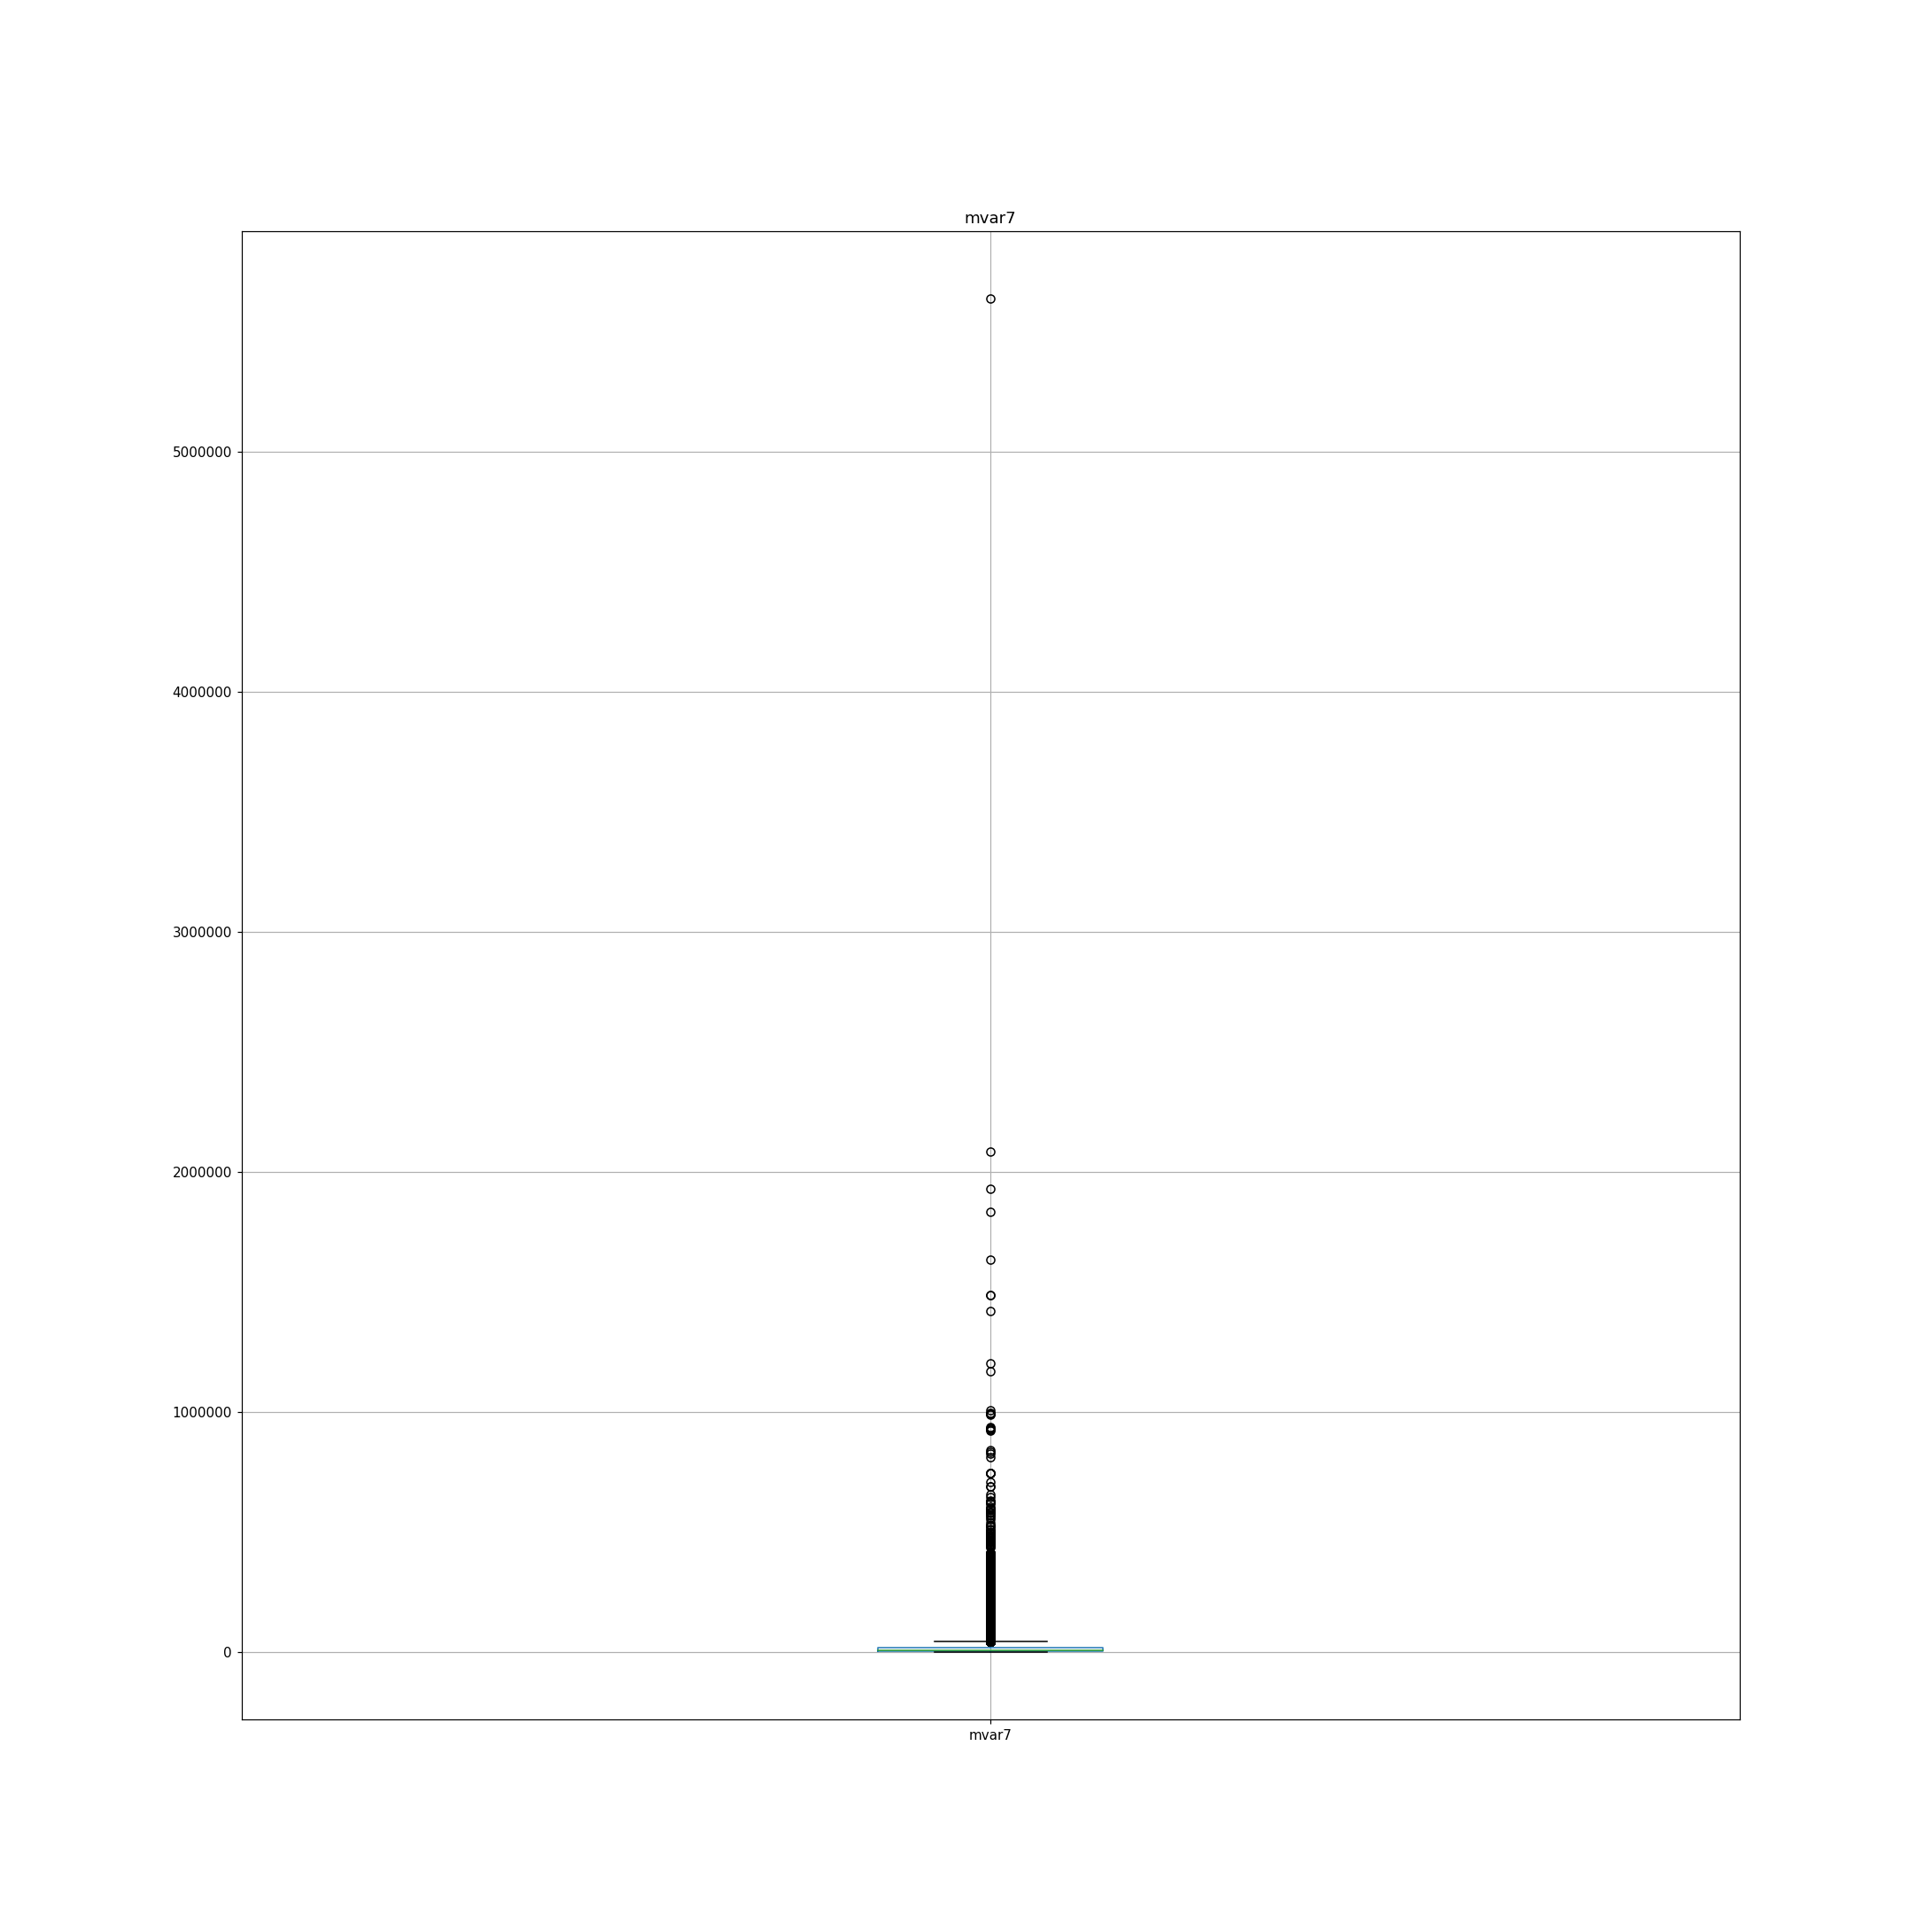

<IPython.core.display.Javascript object>


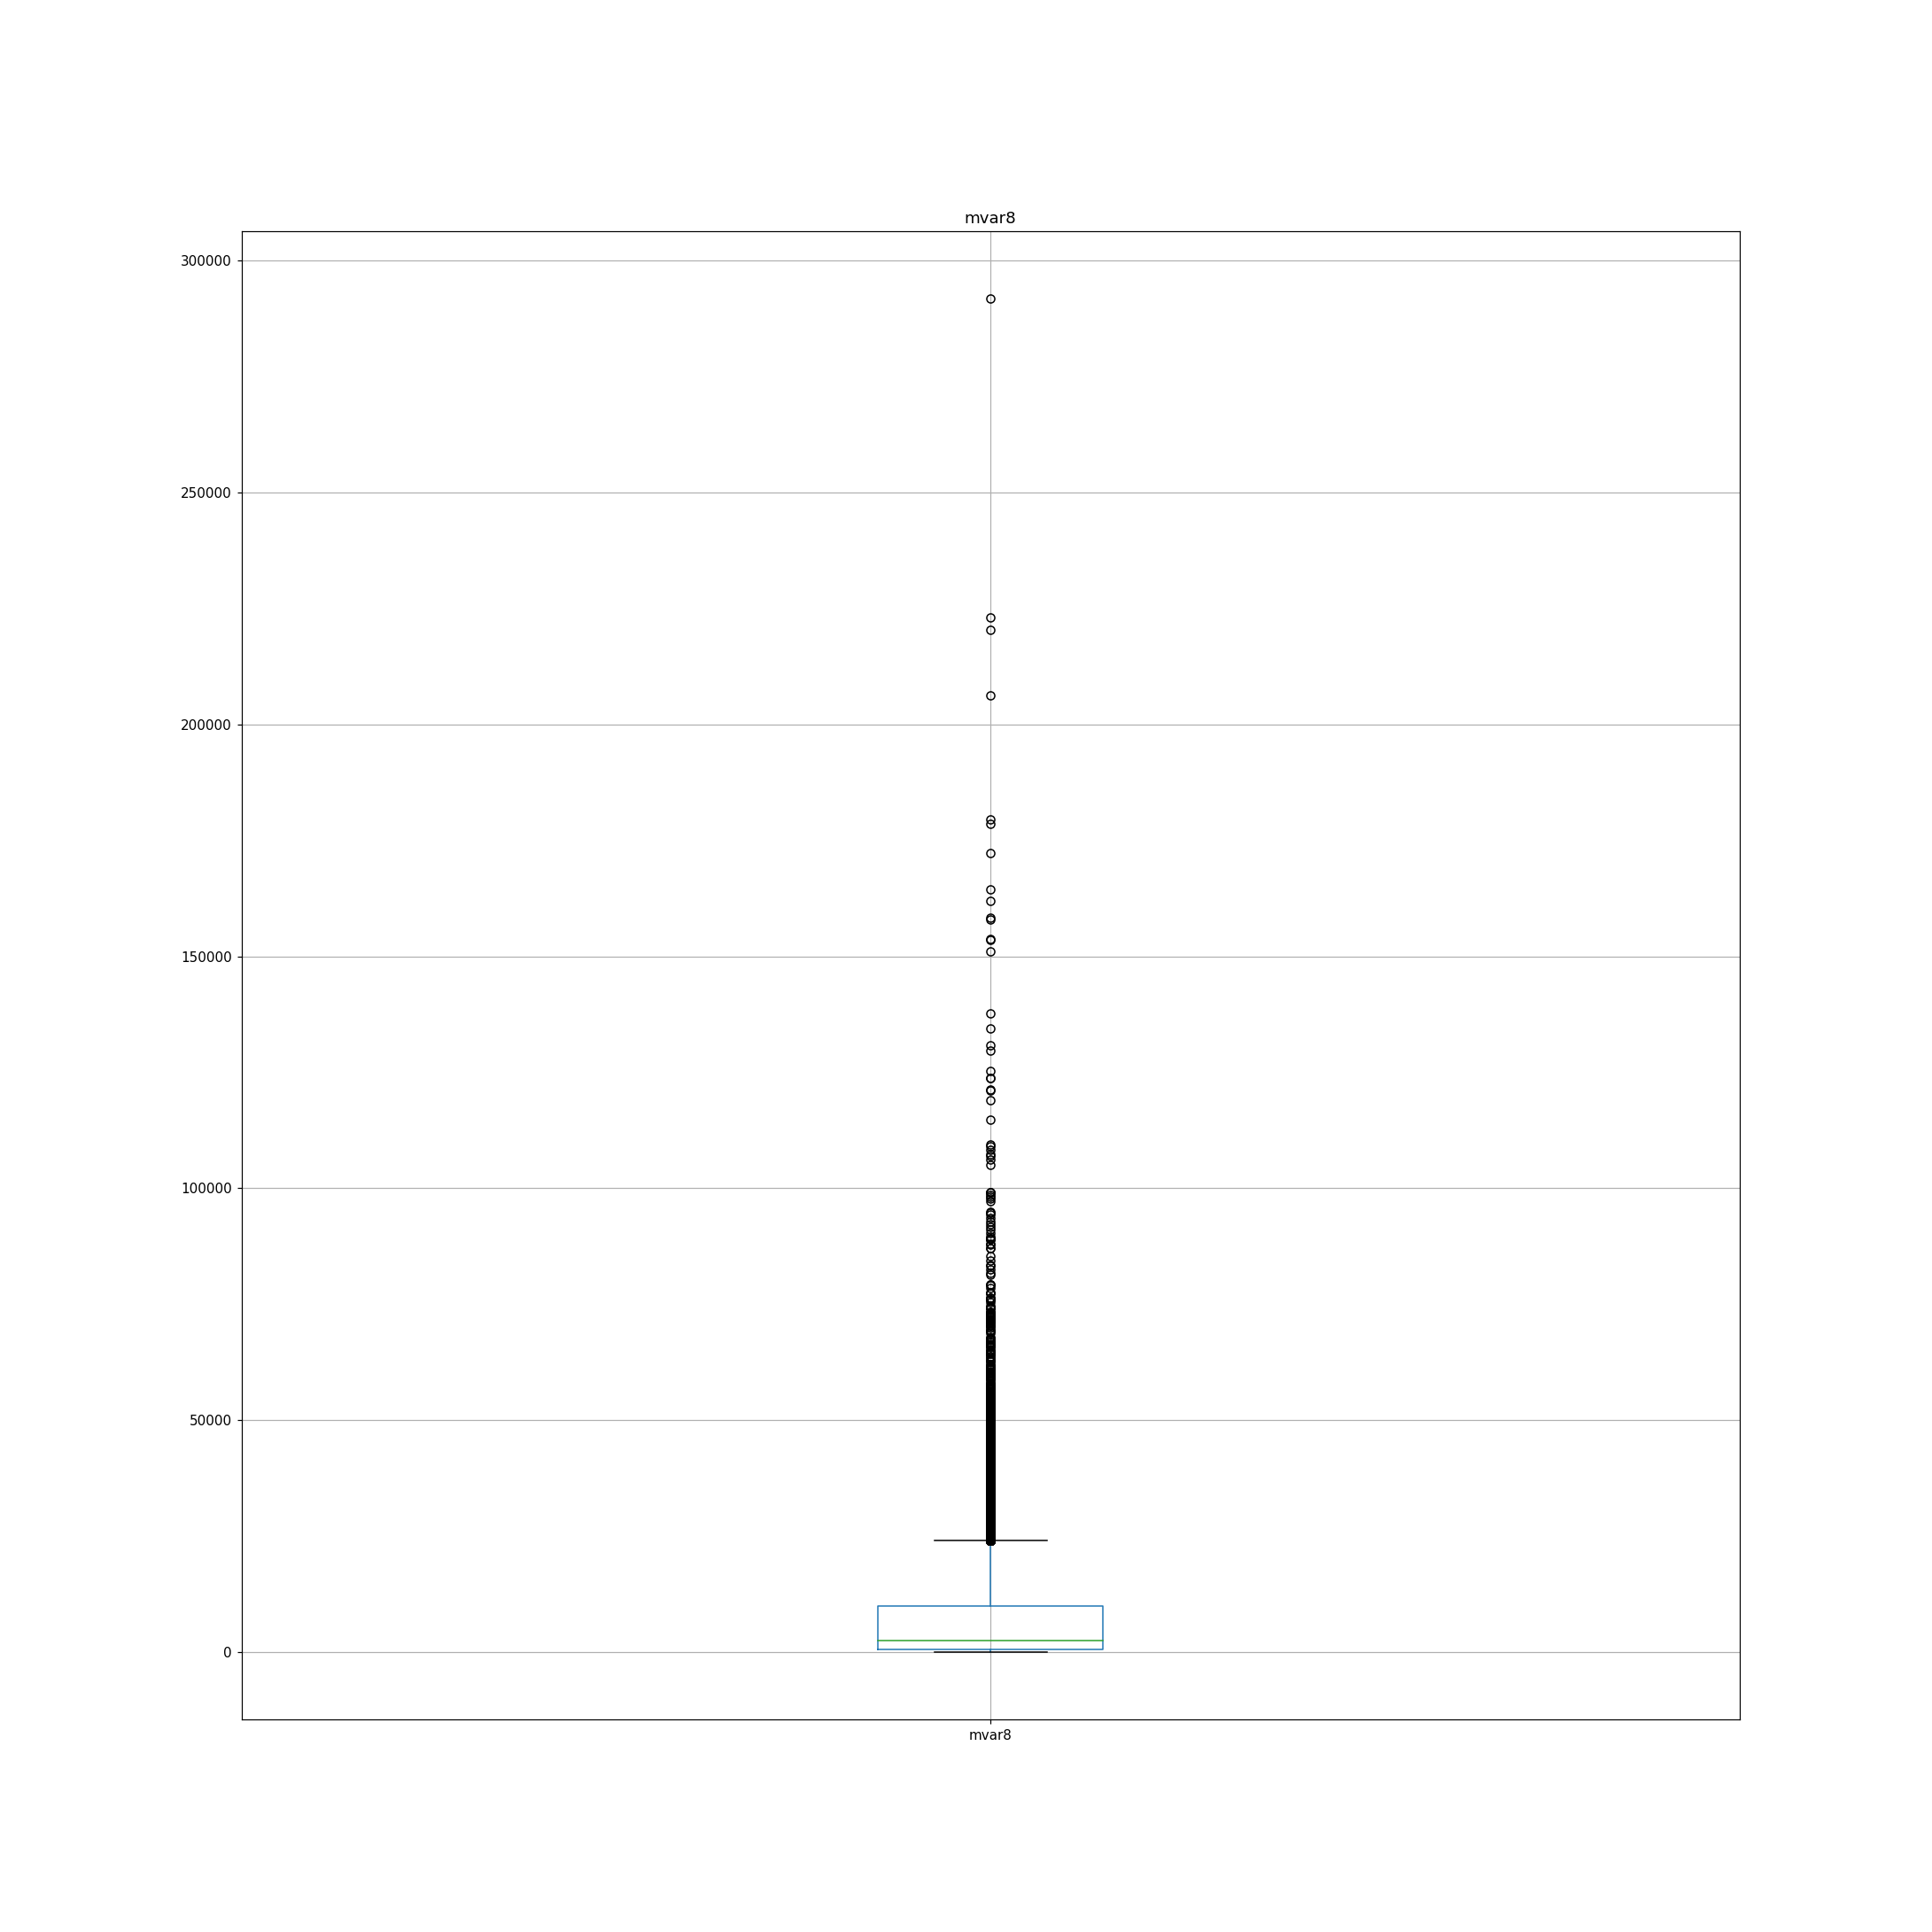

<IPython.core.display.Javascript object>


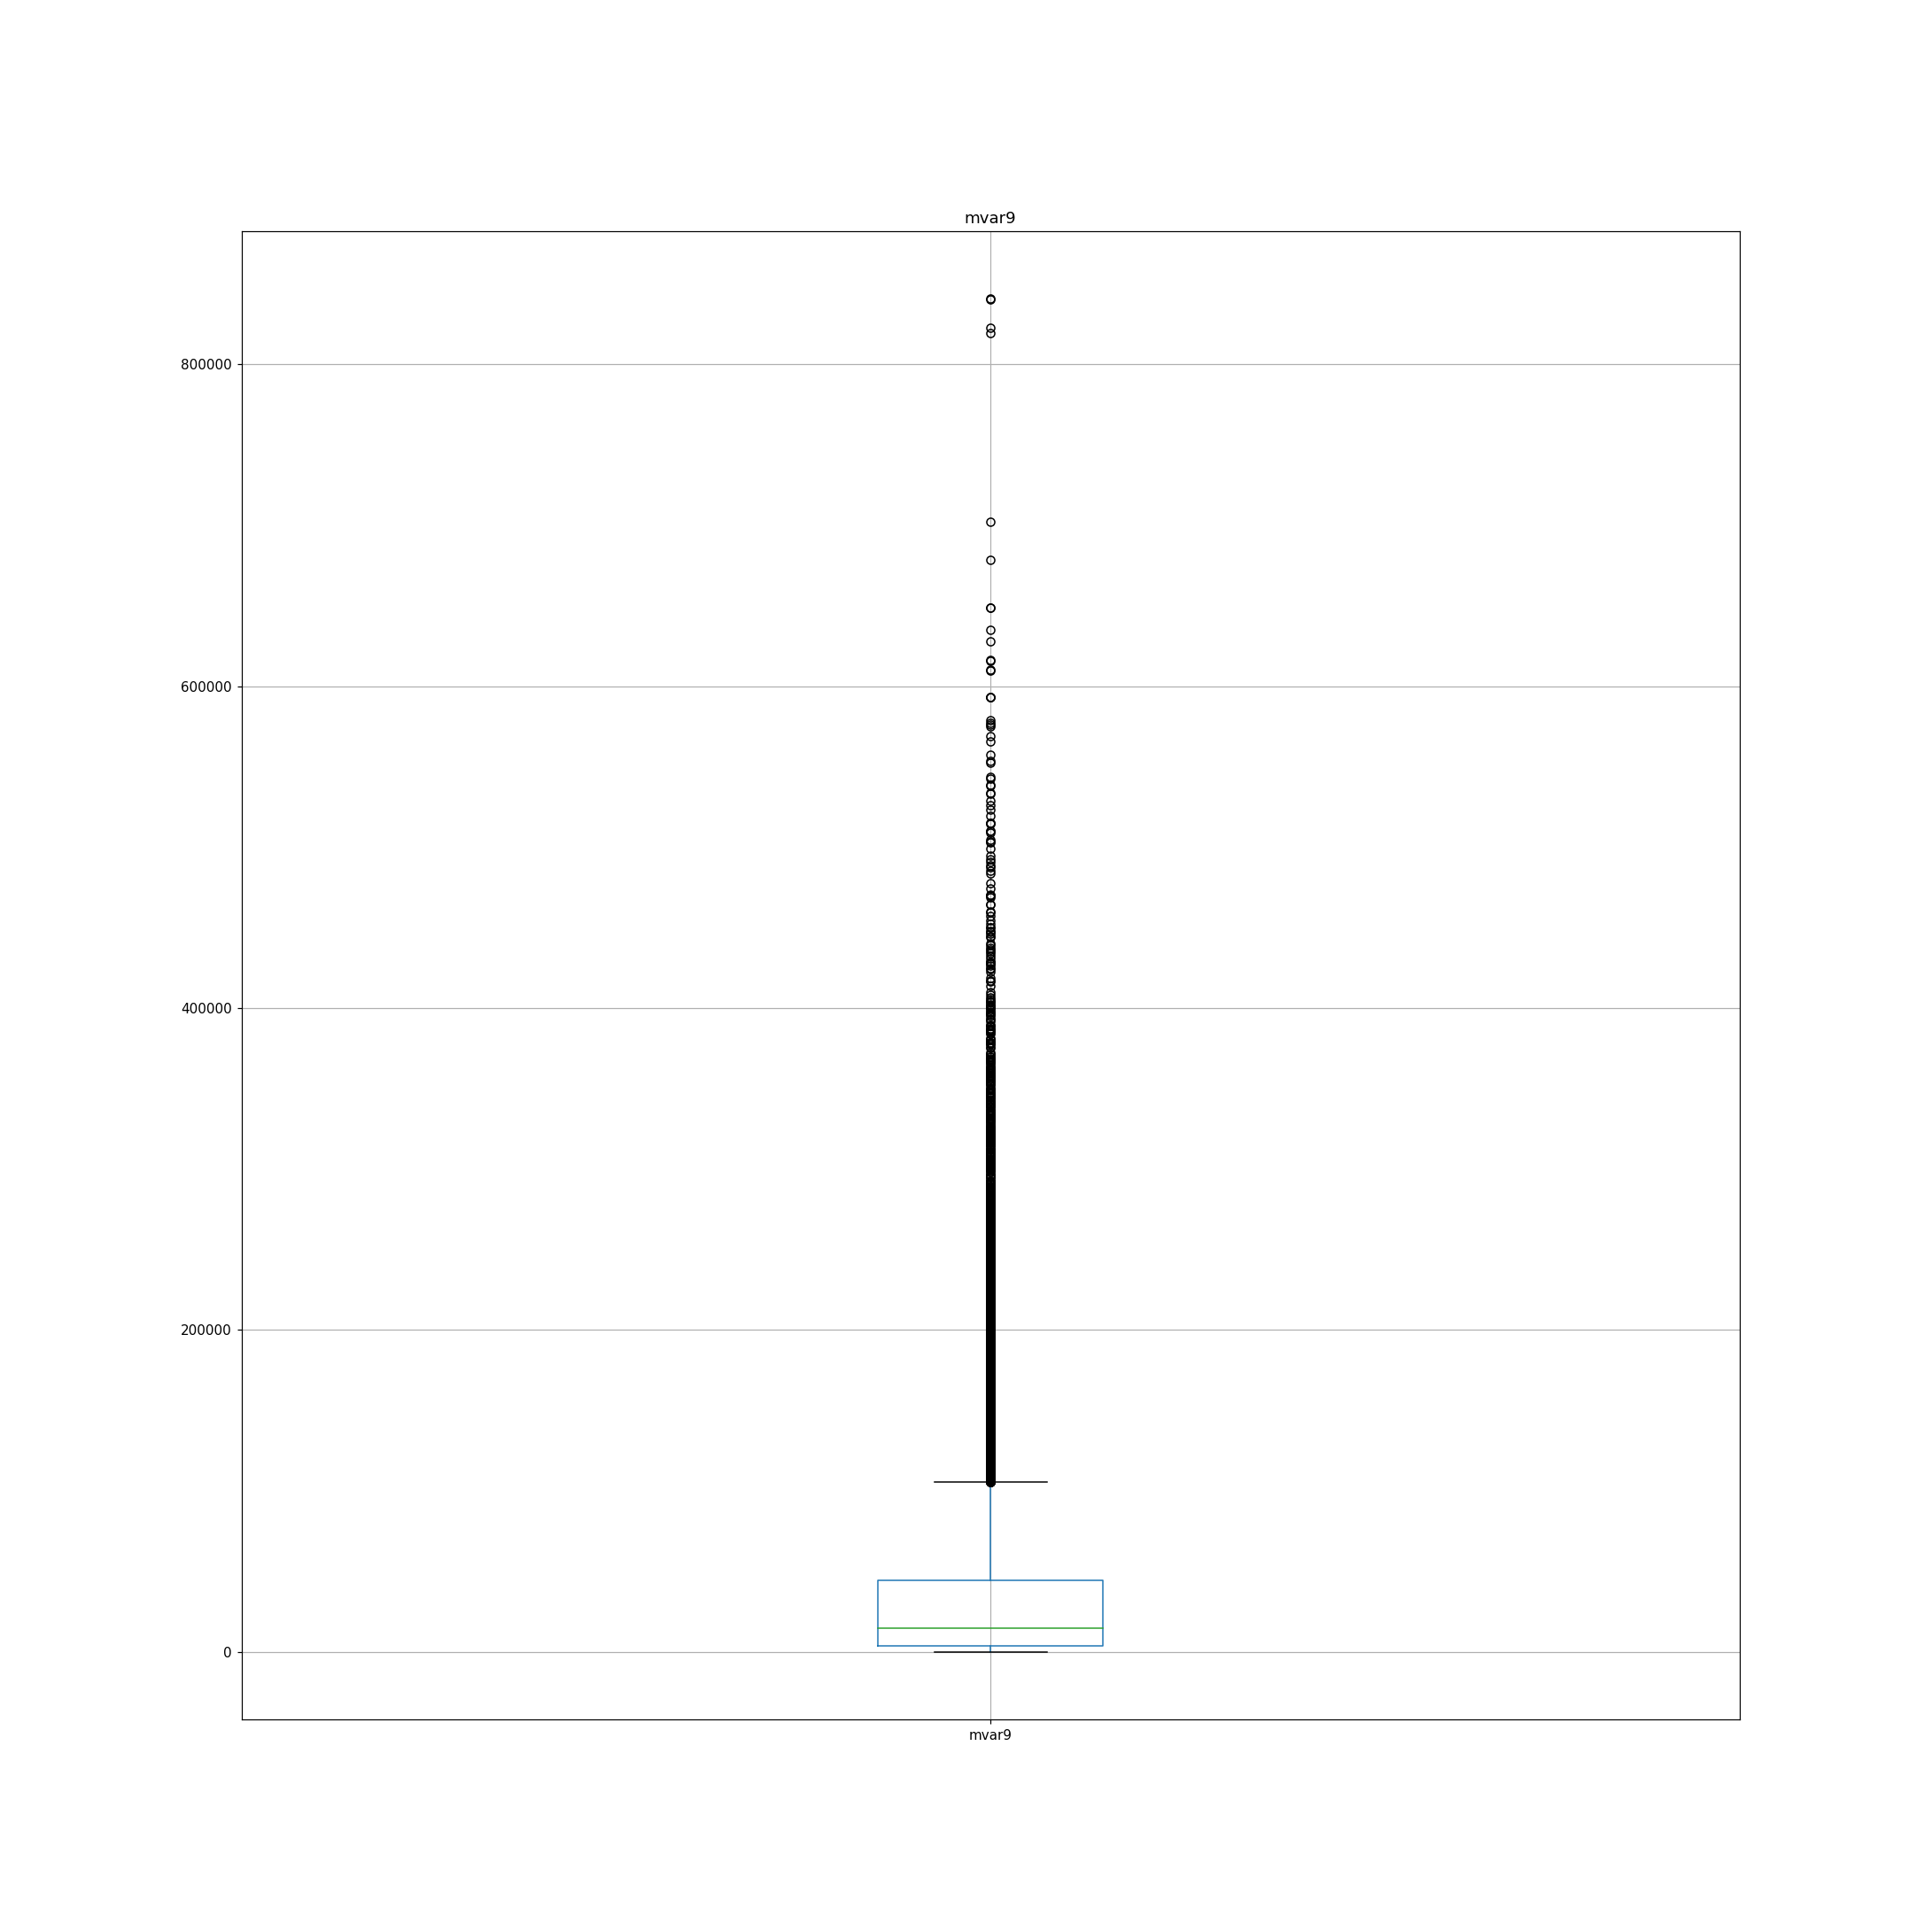

<IPython.core.display.Javascript object>


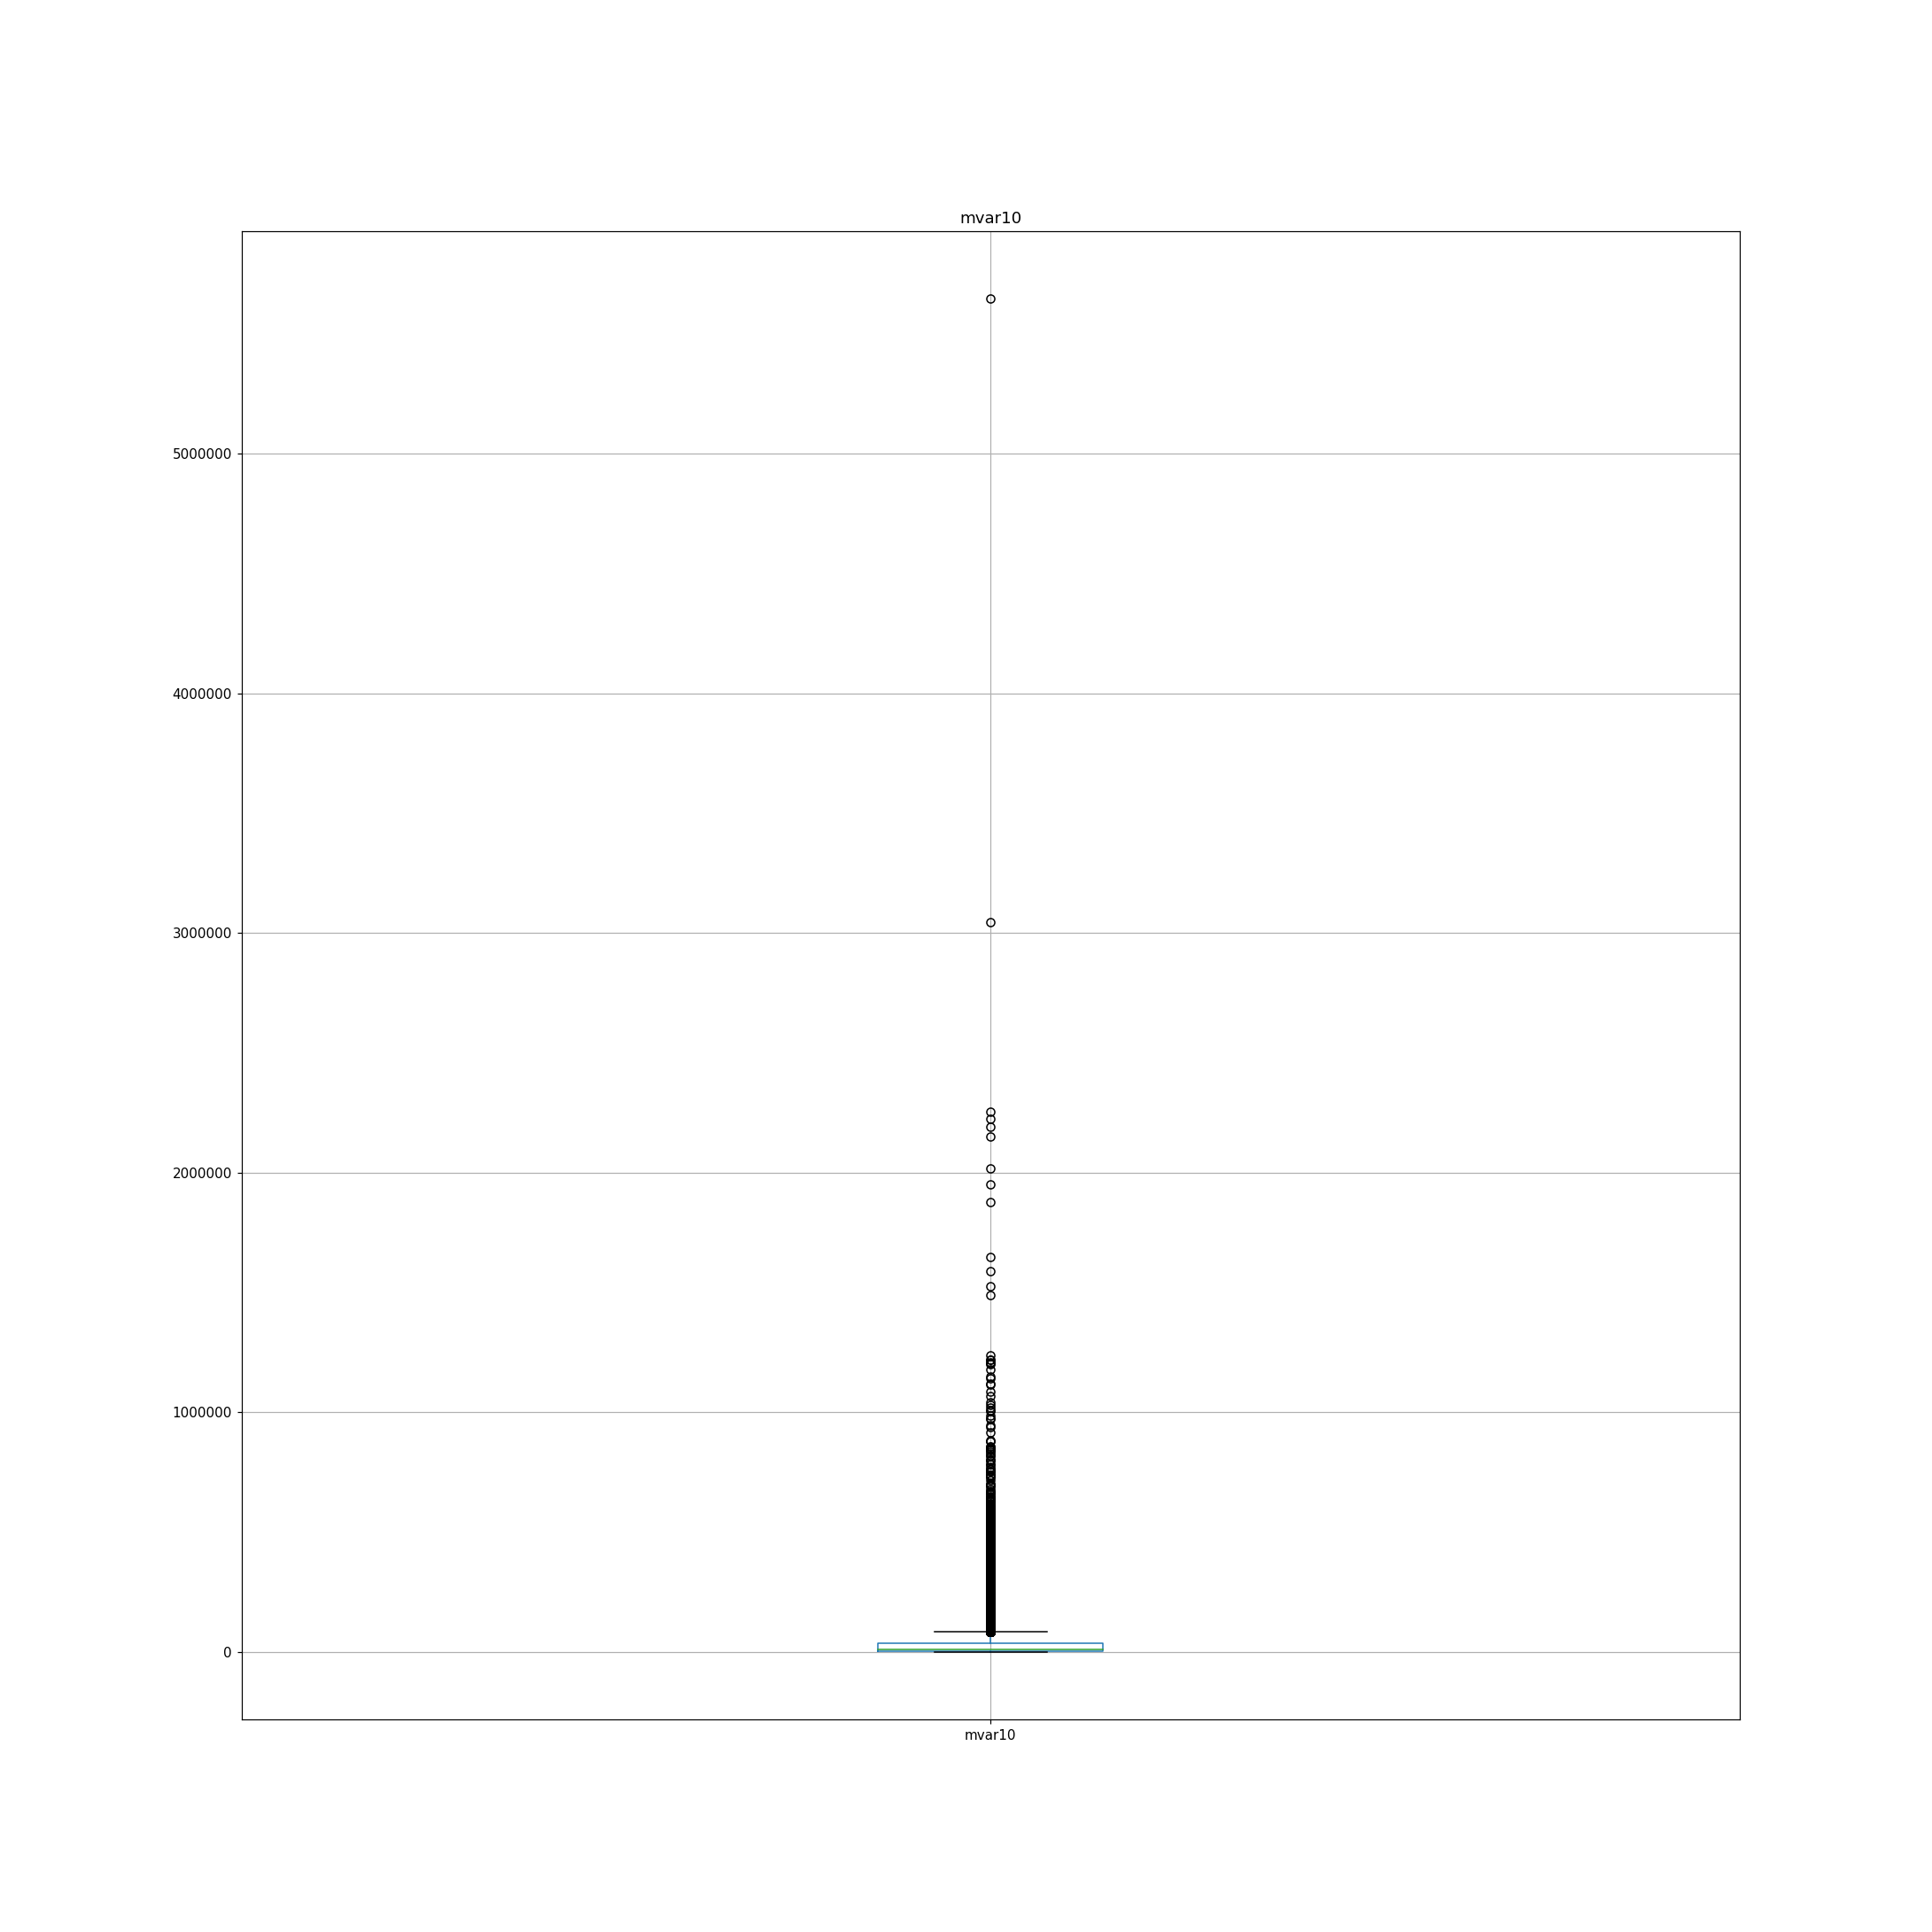

<IPython.core.display.Javascript object>


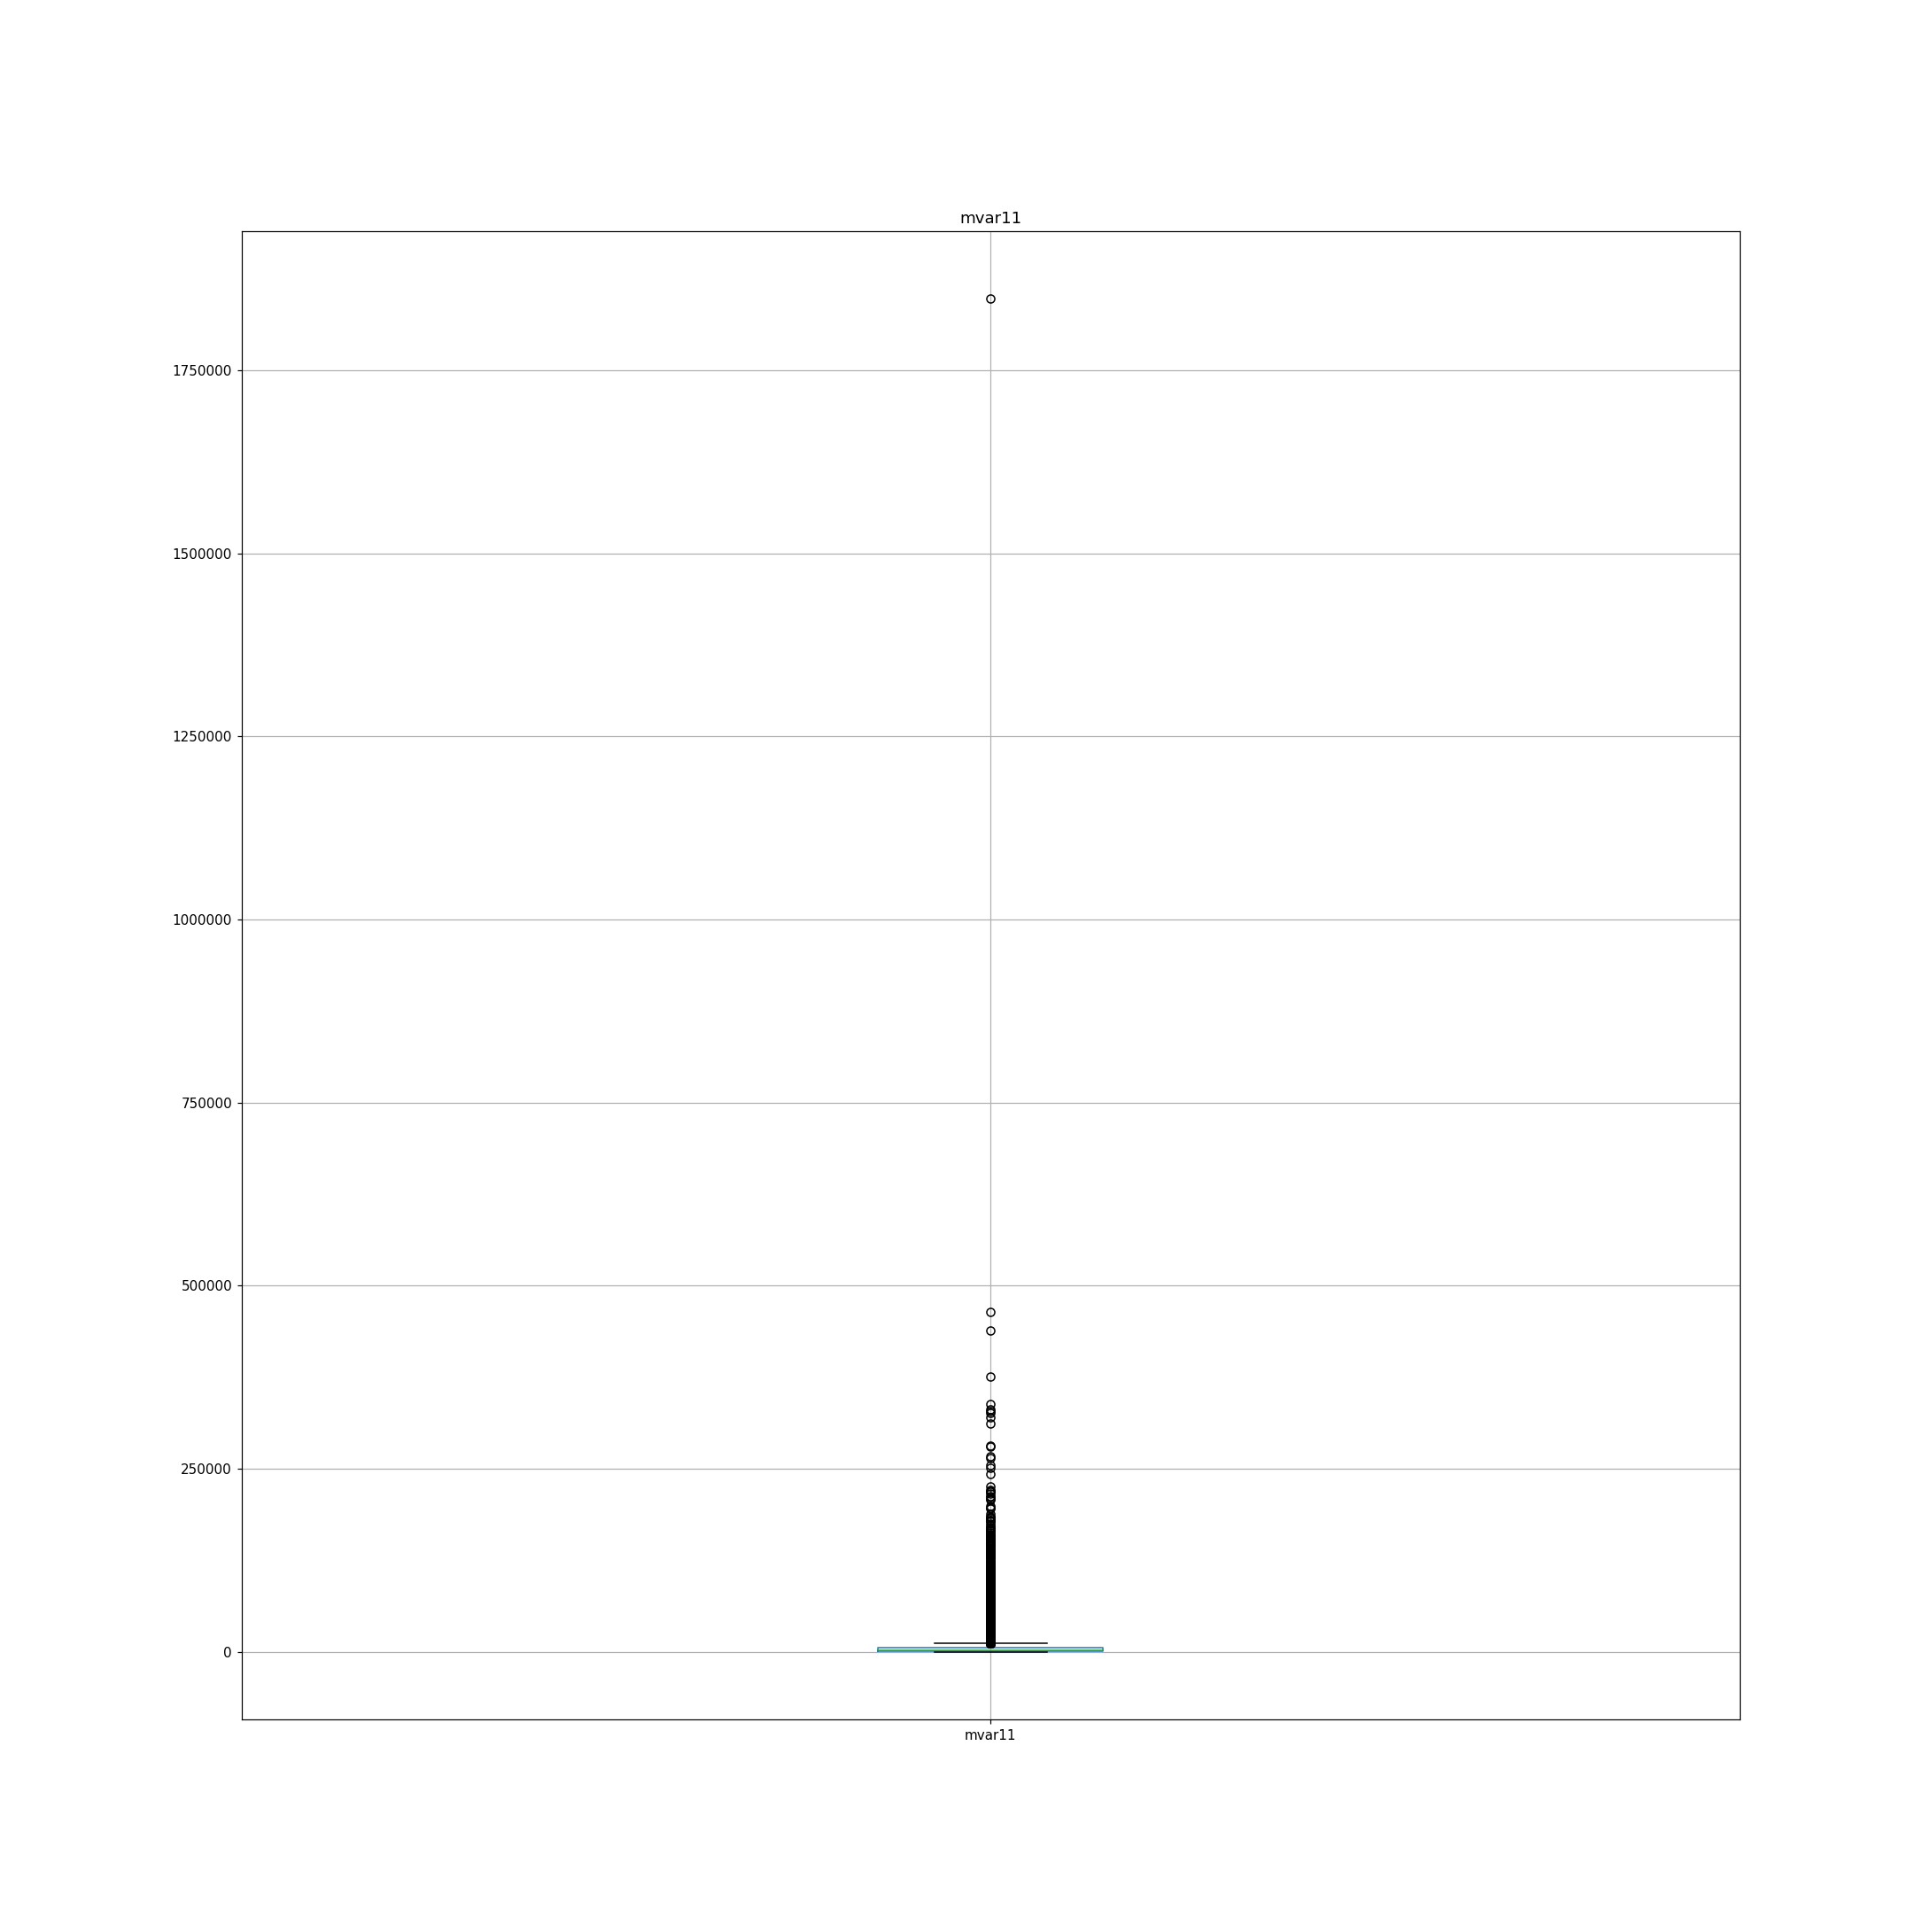

<IPython.core.display.Javascript object>


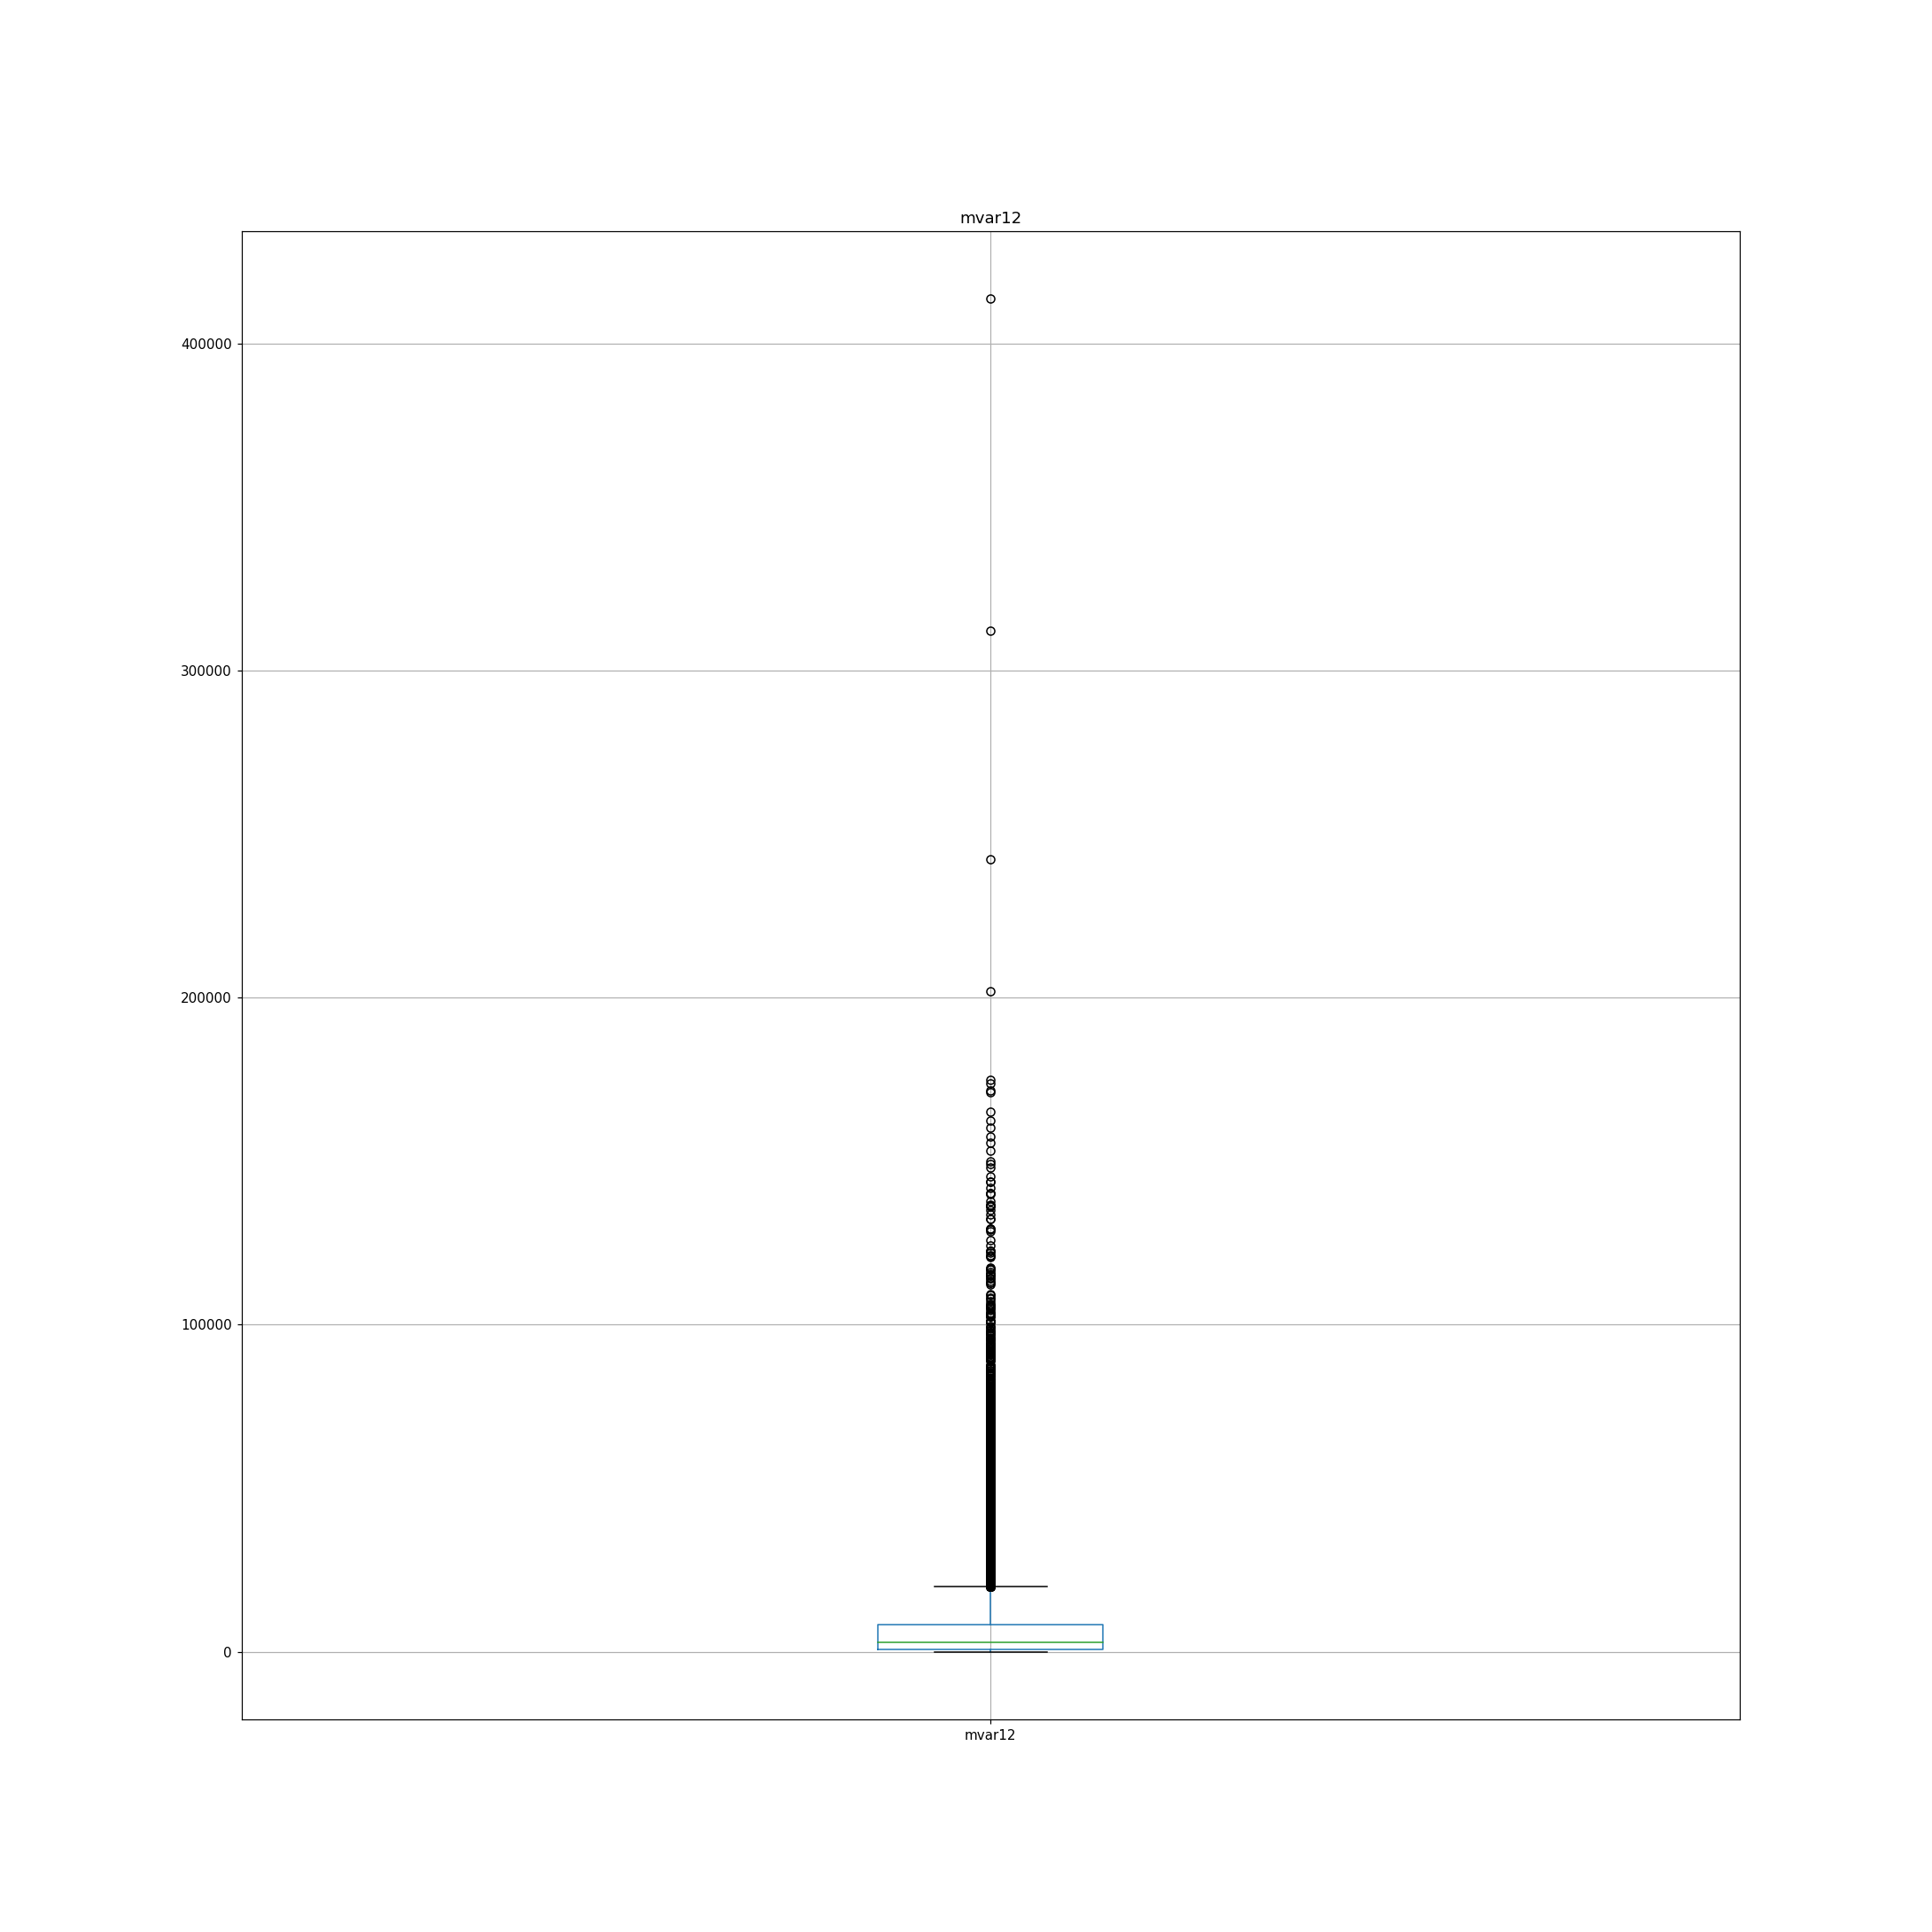

<IPython.core.display.Javascript object>


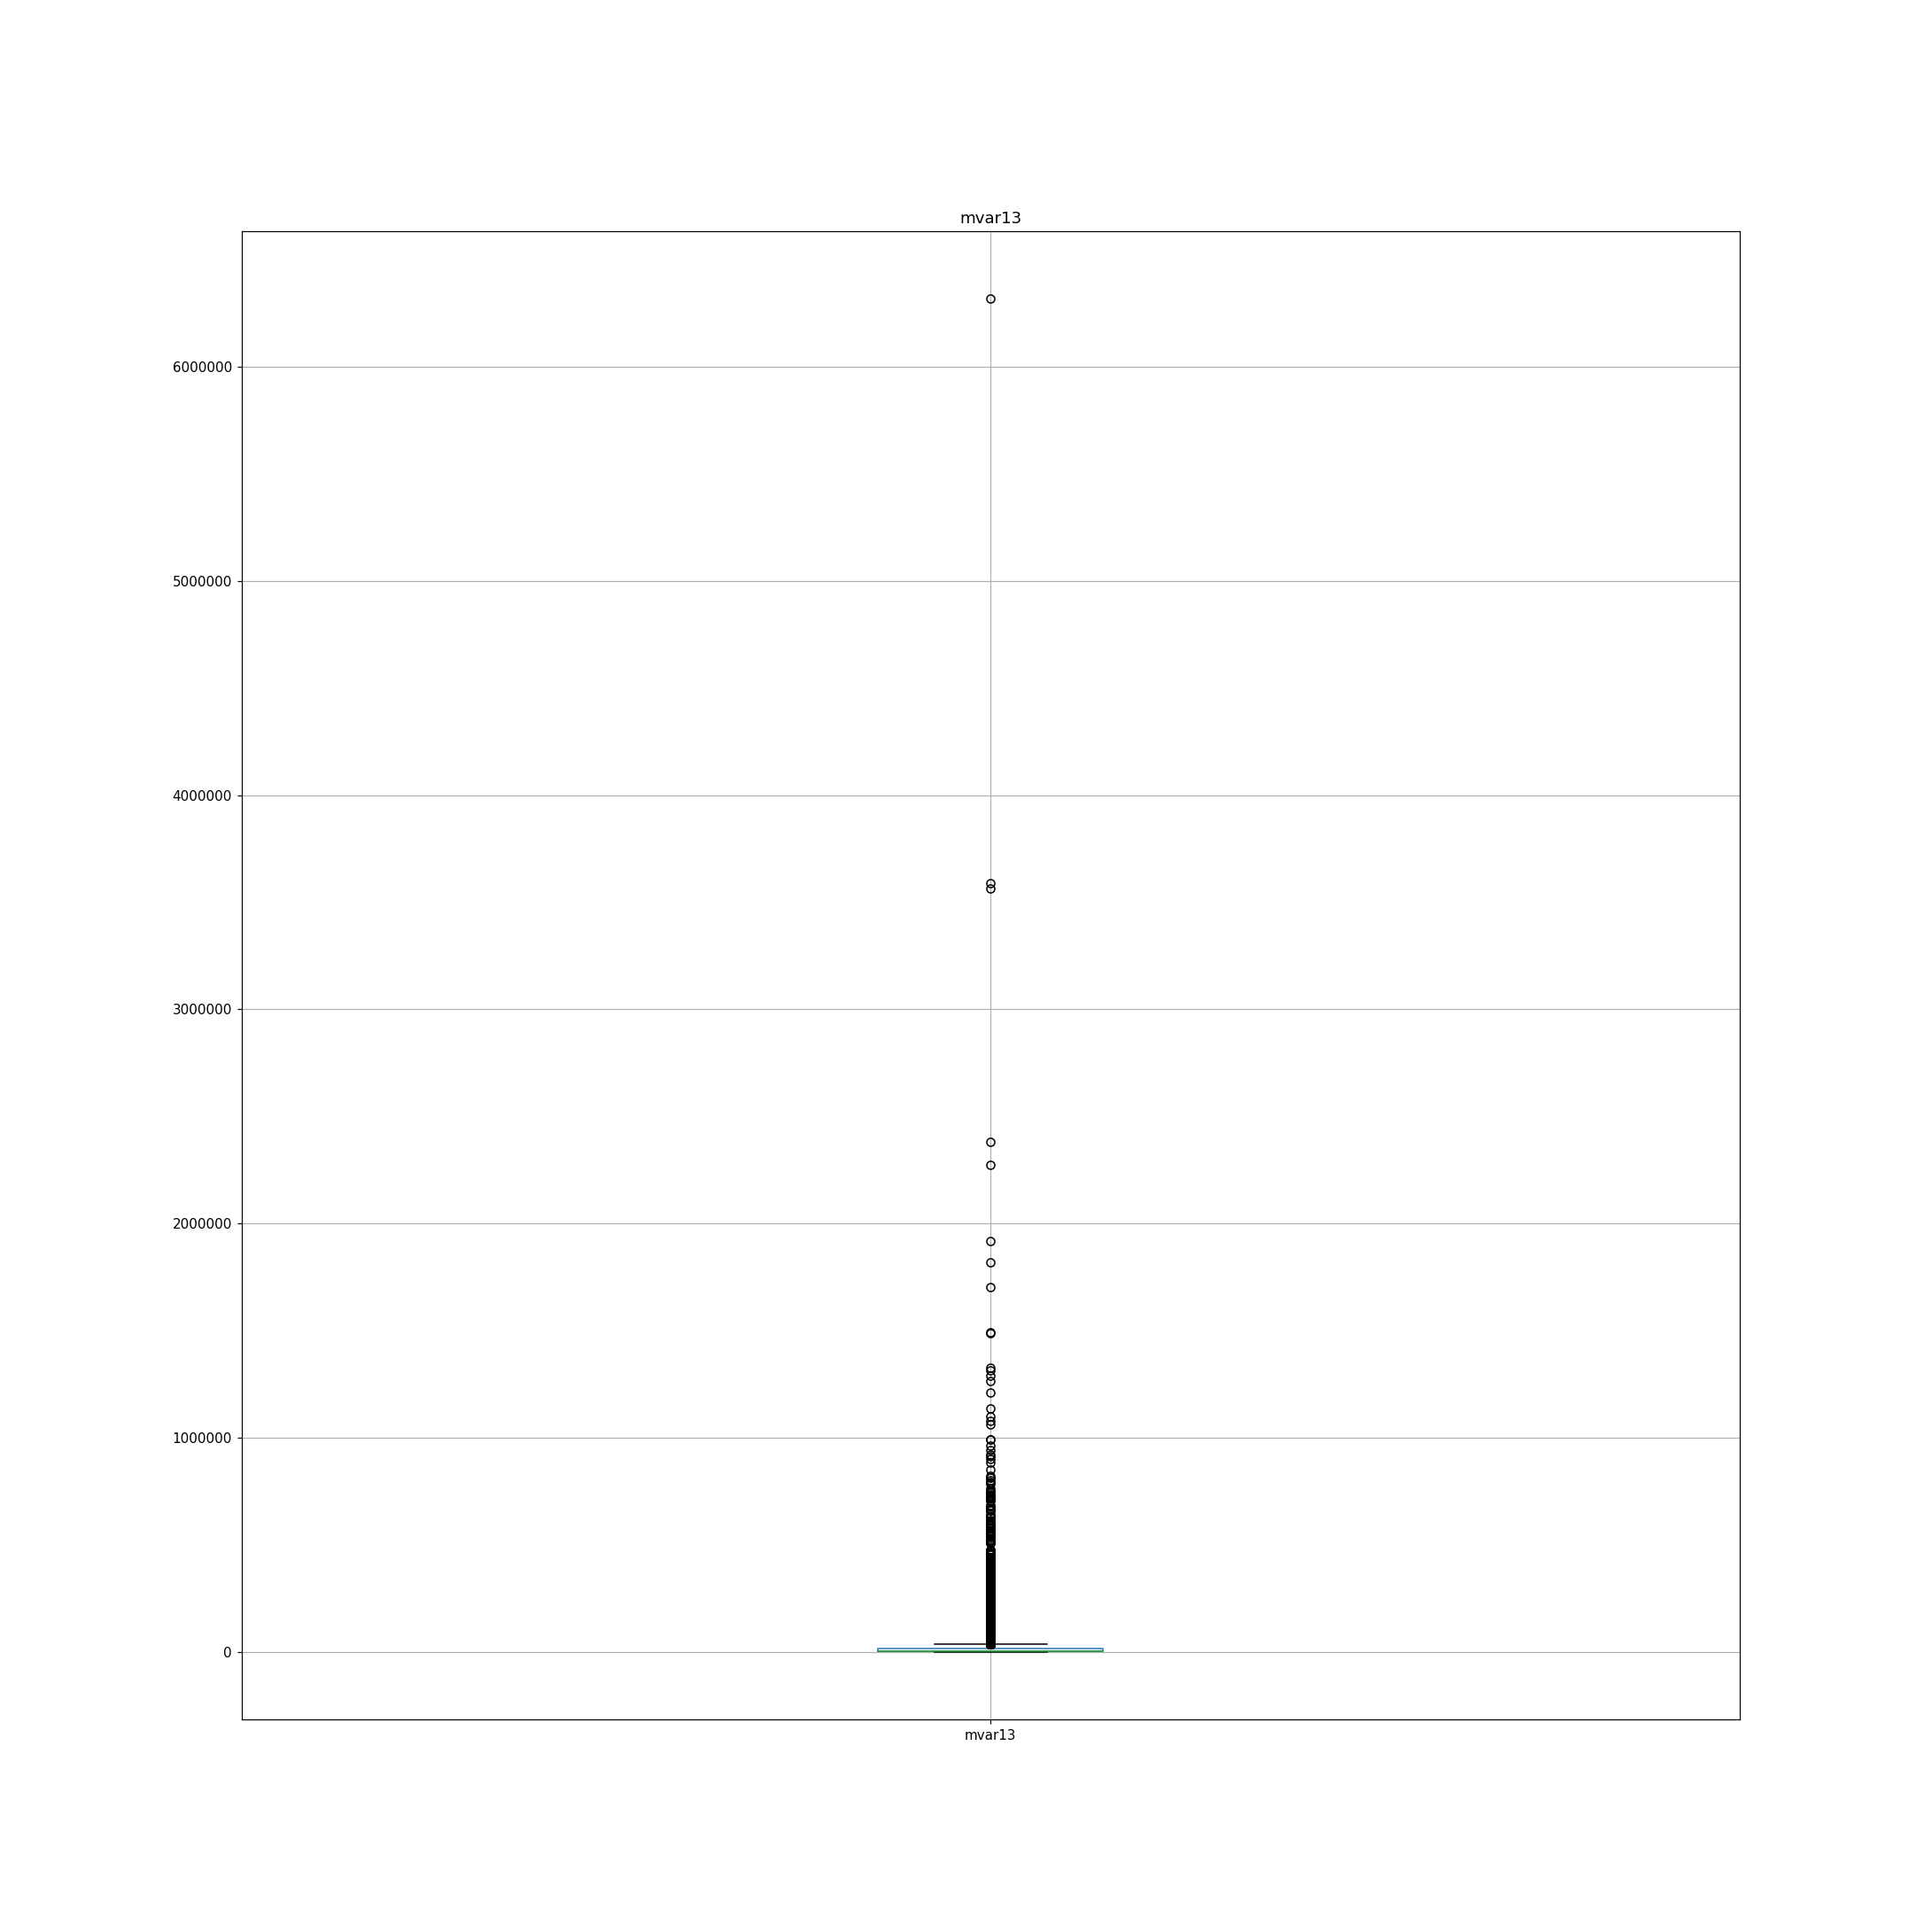

<IPython.core.display.Javascript object>


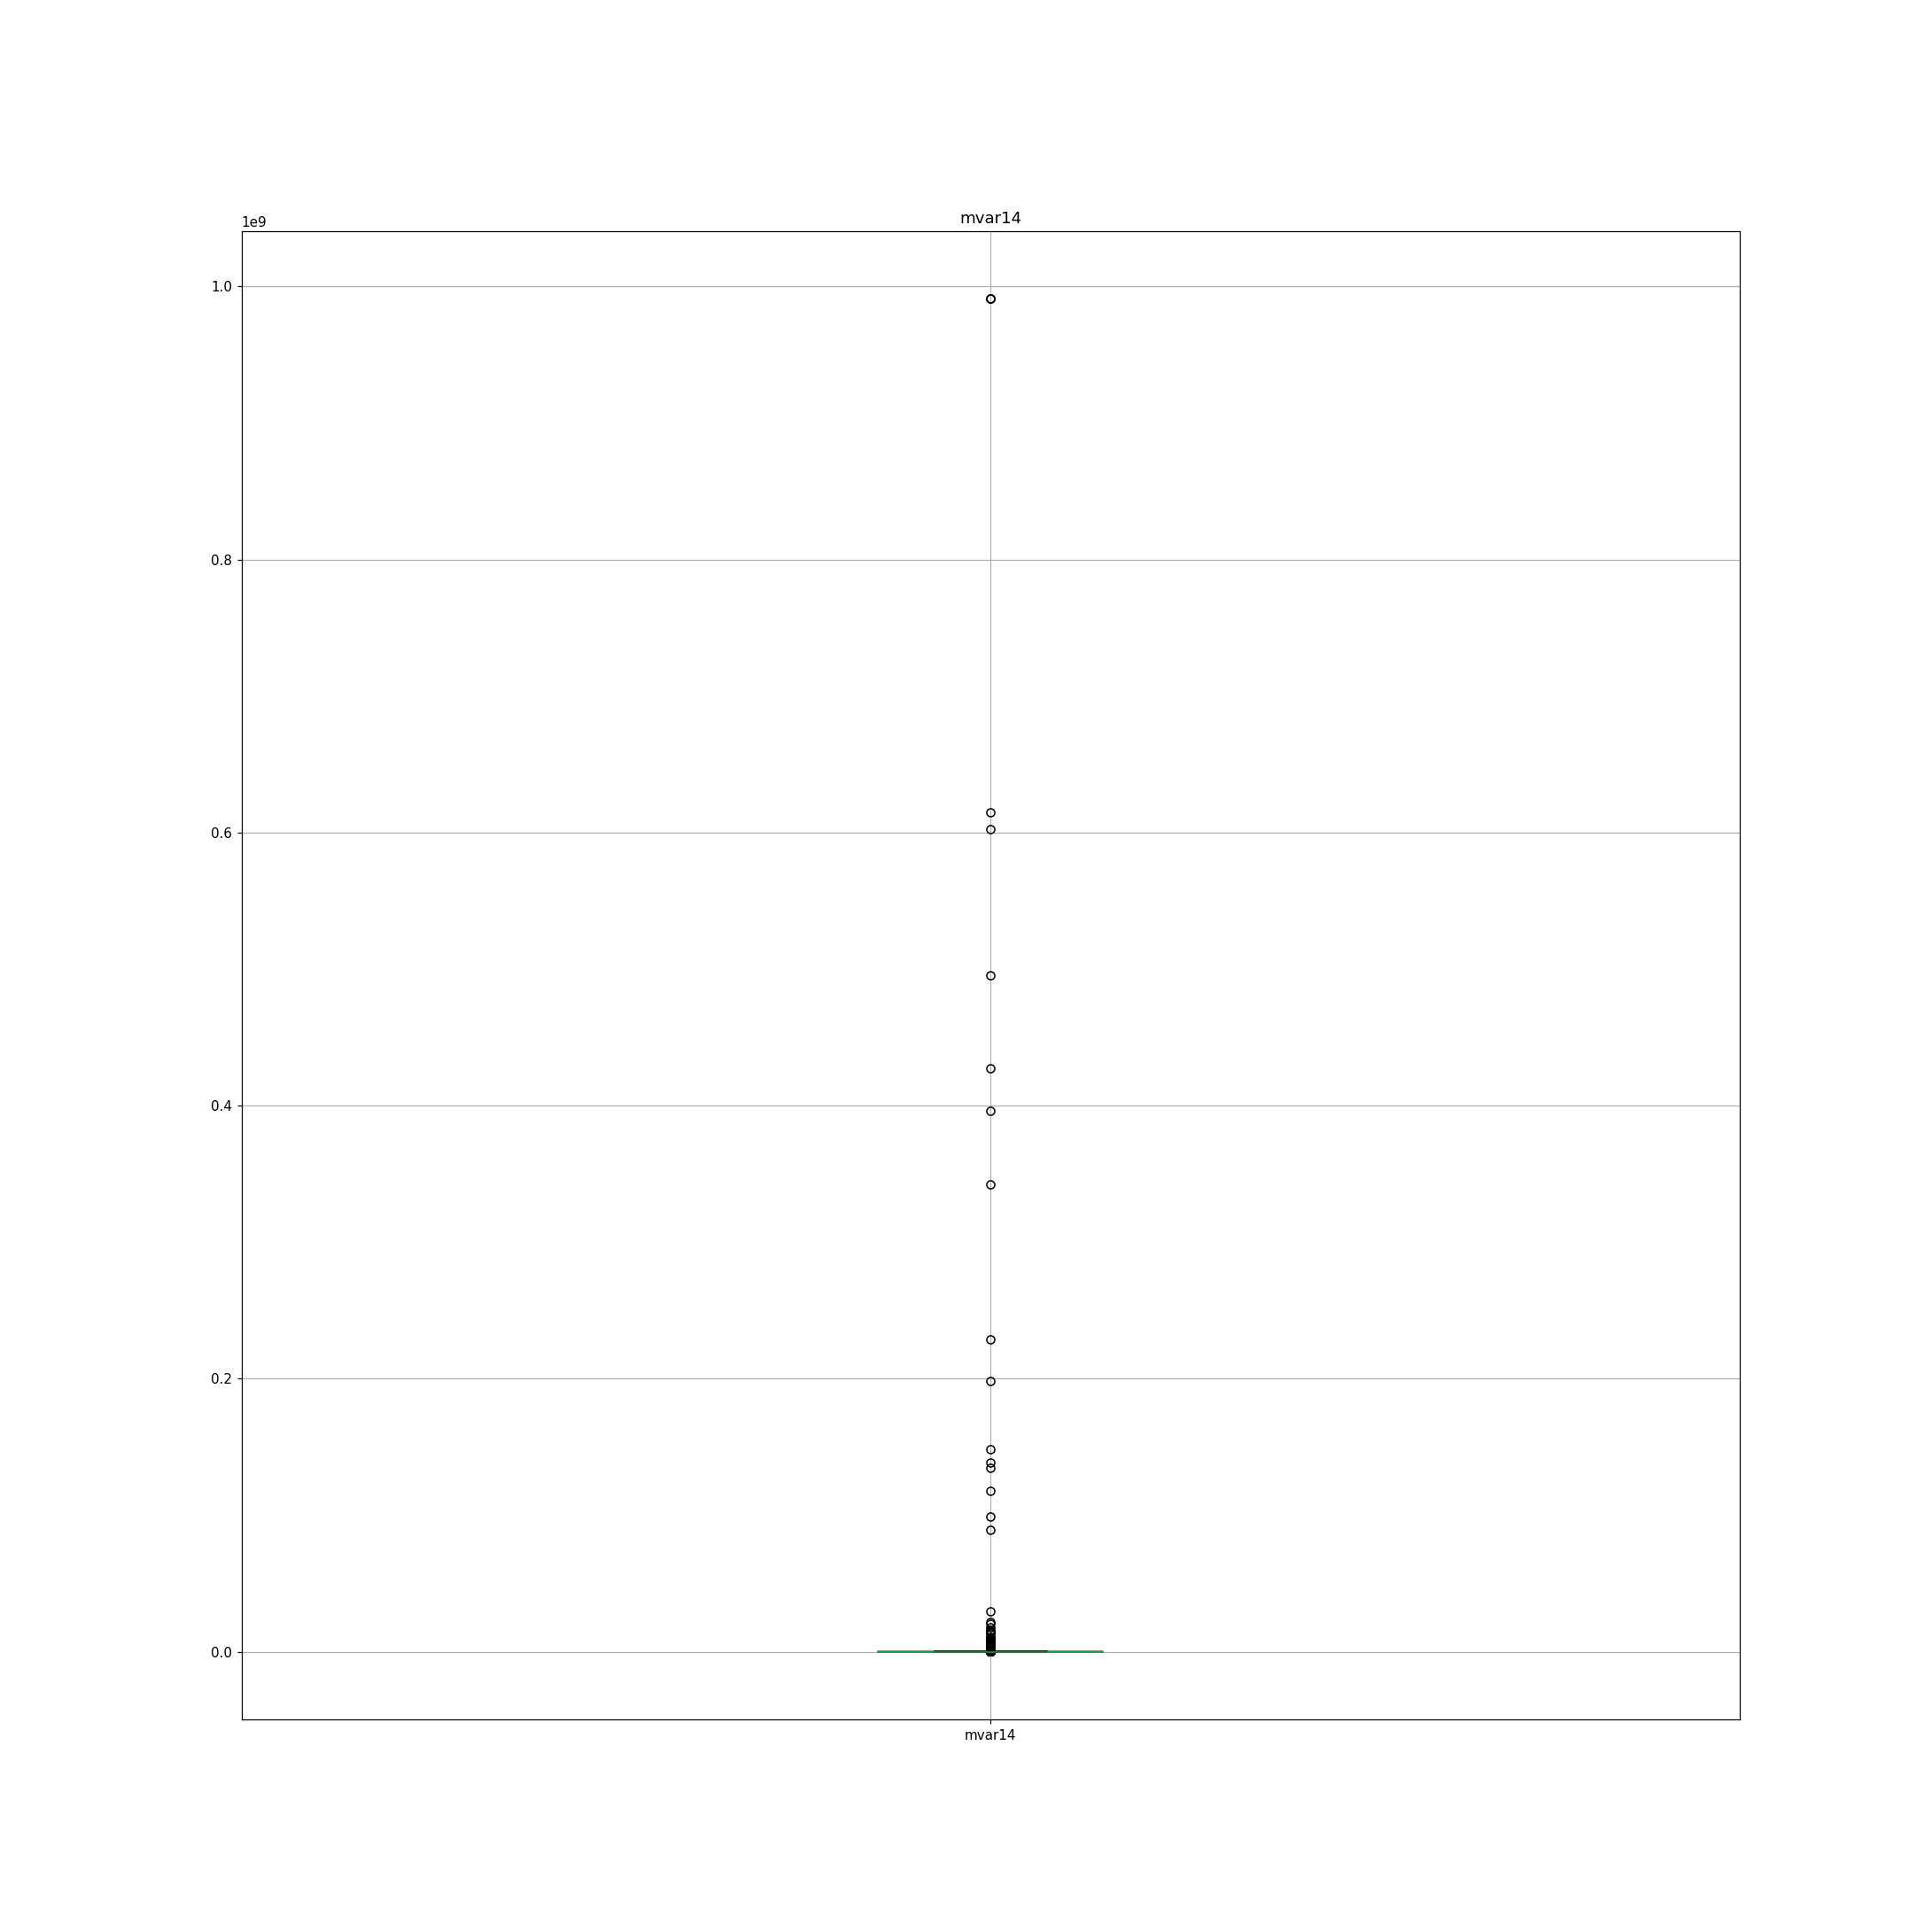

<IPython.core.display.Javascript object>


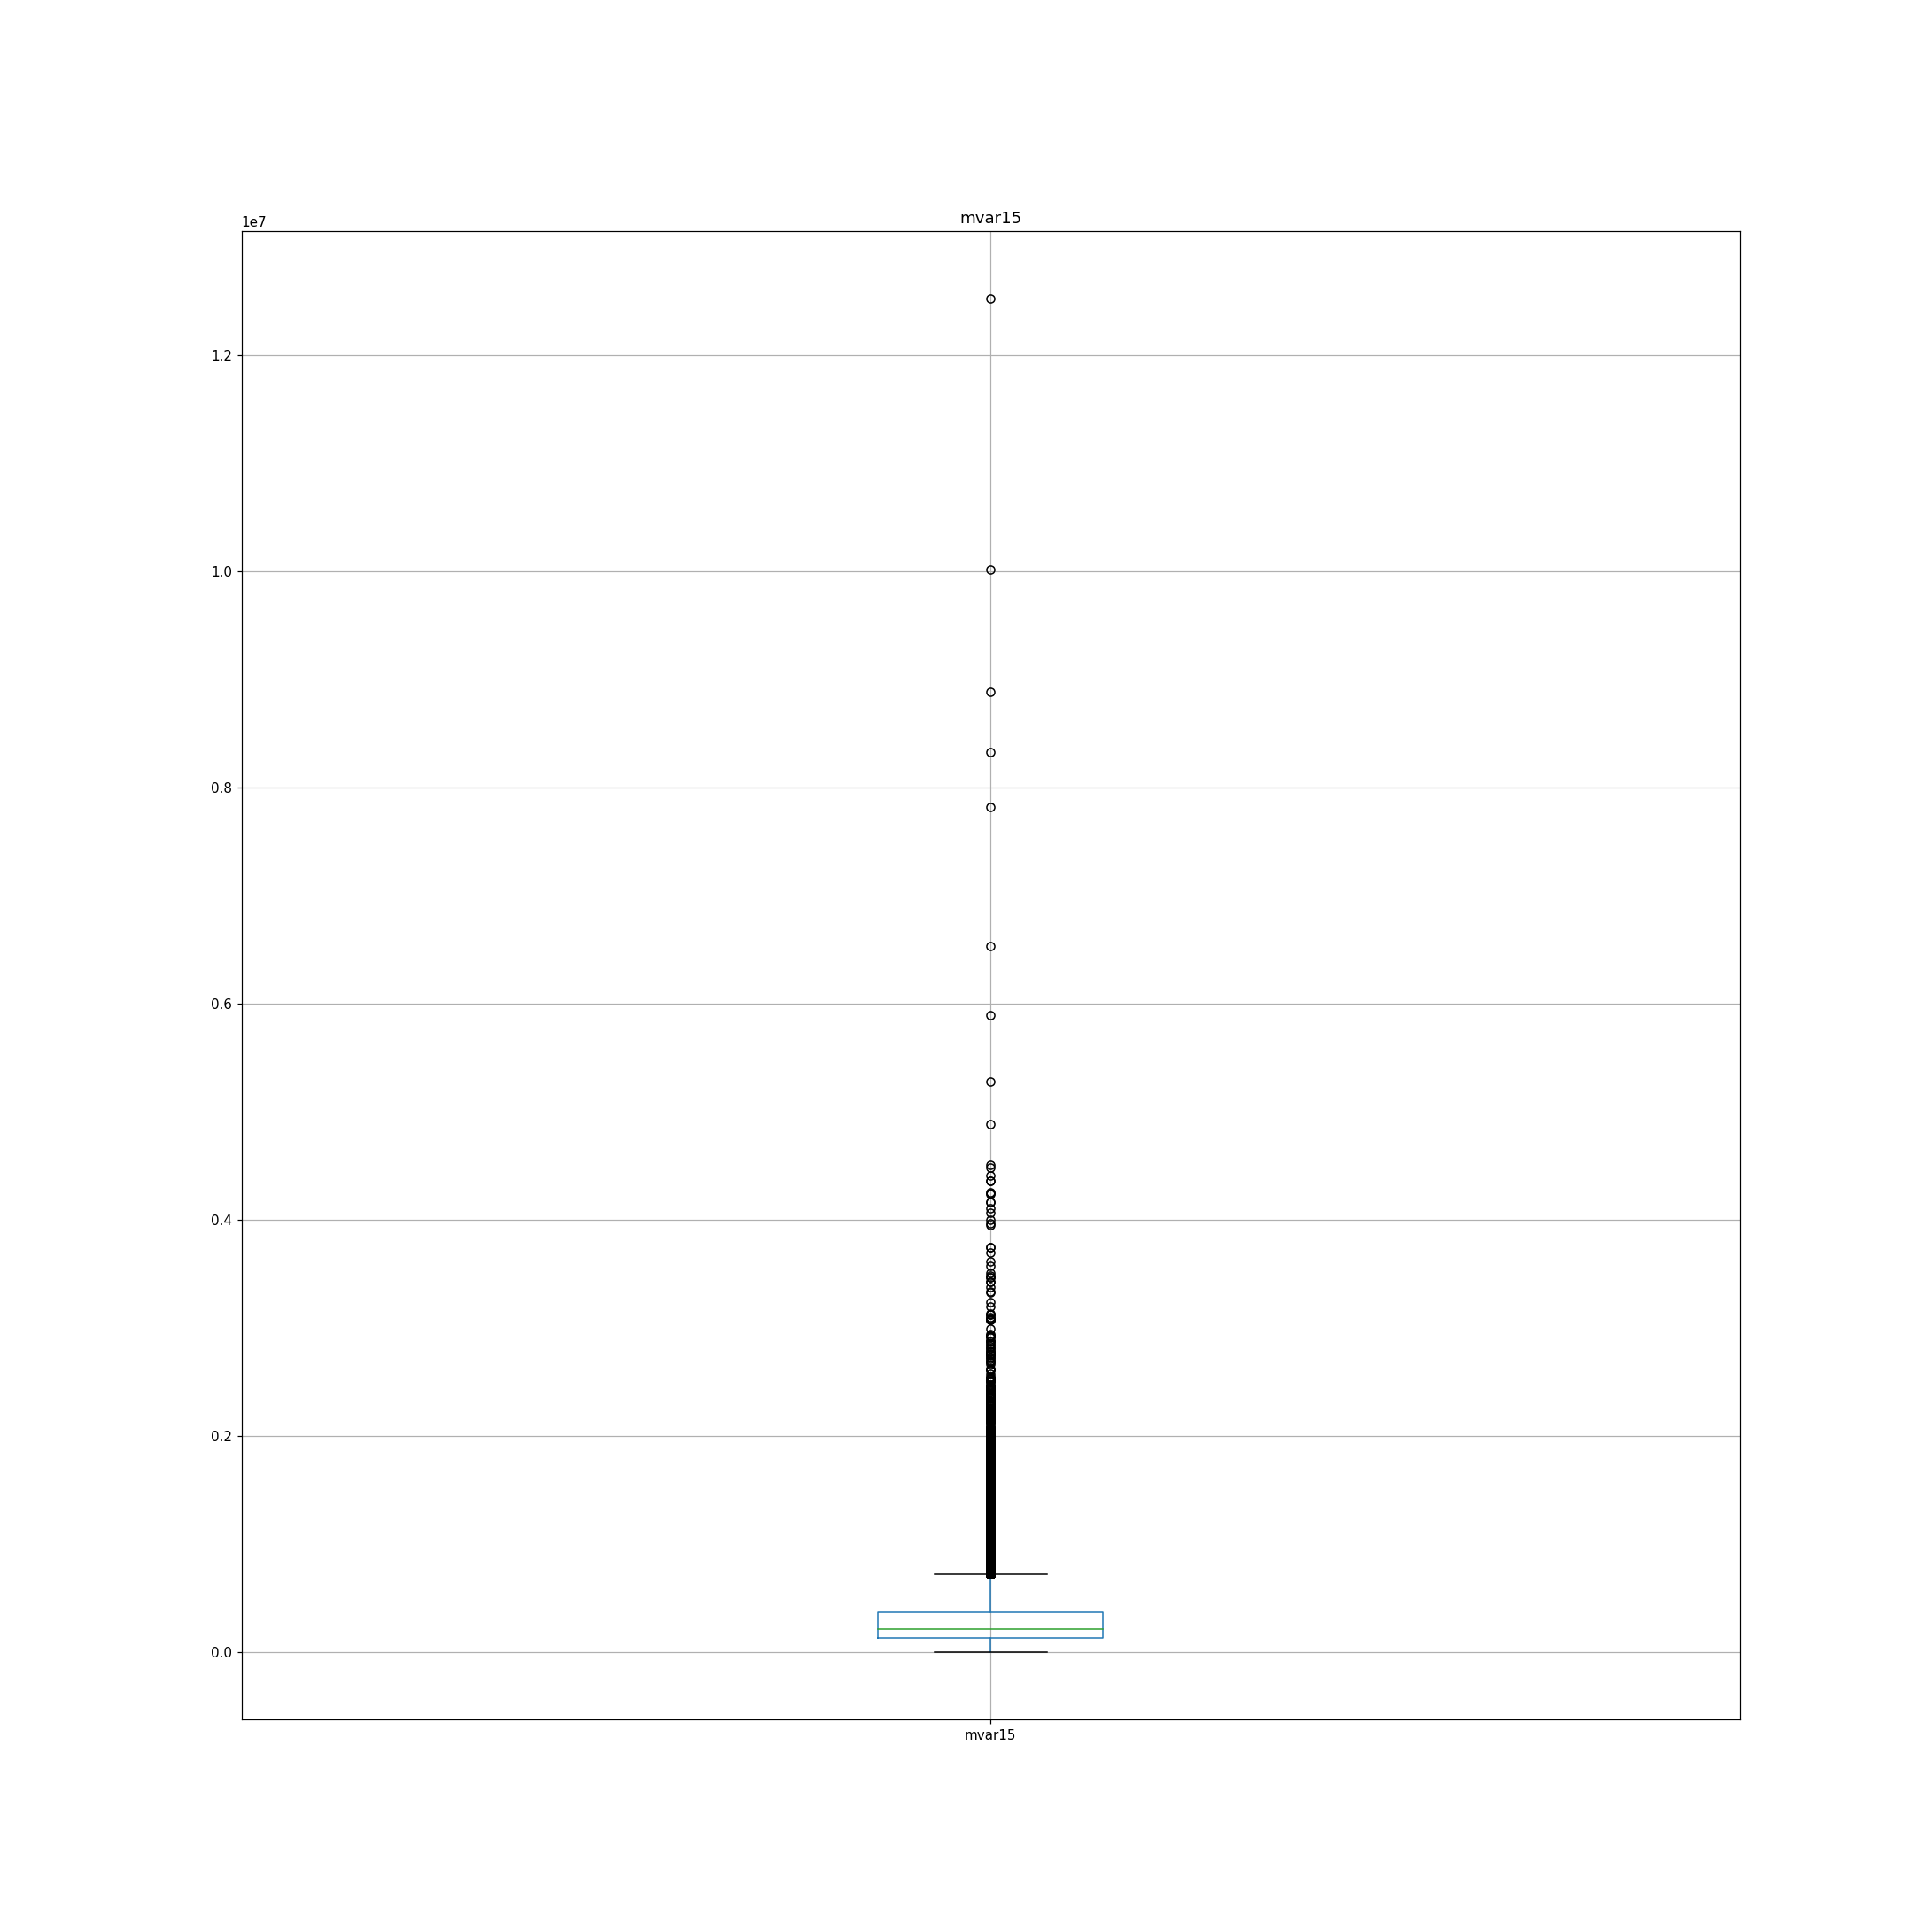

<IPython.core.display.Javascript object>


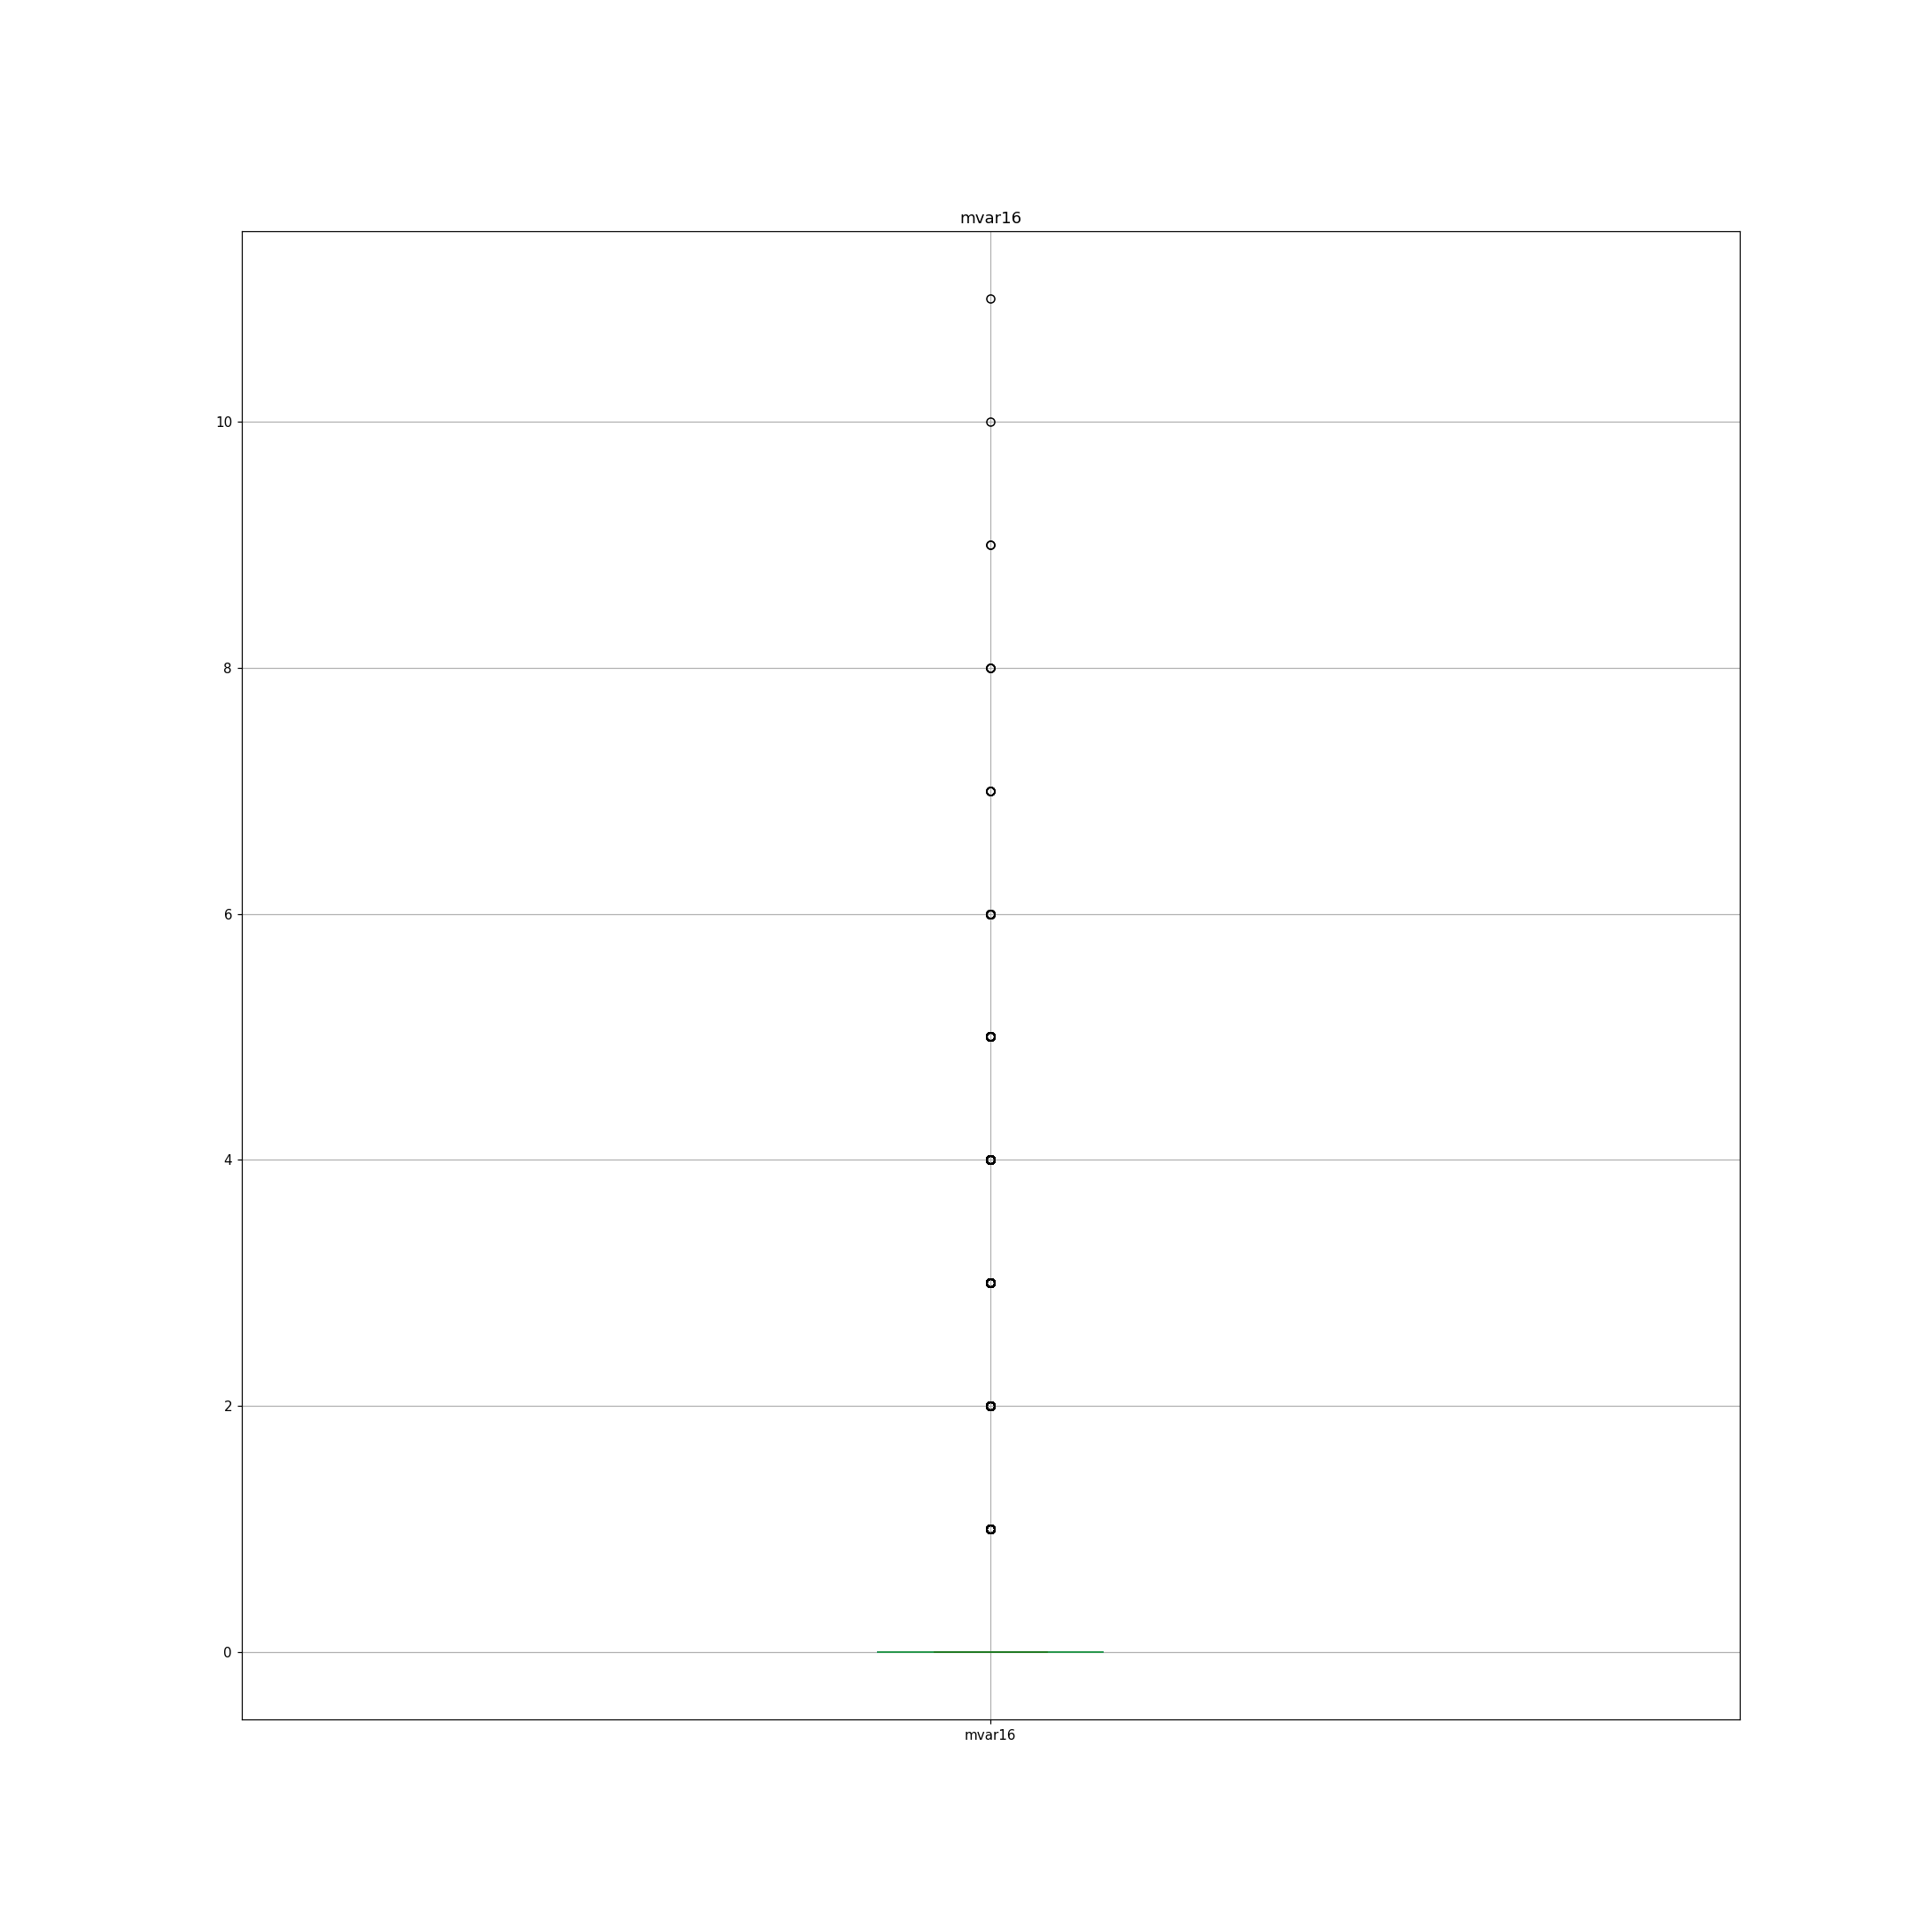

<IPython.core.display.Javascript object>


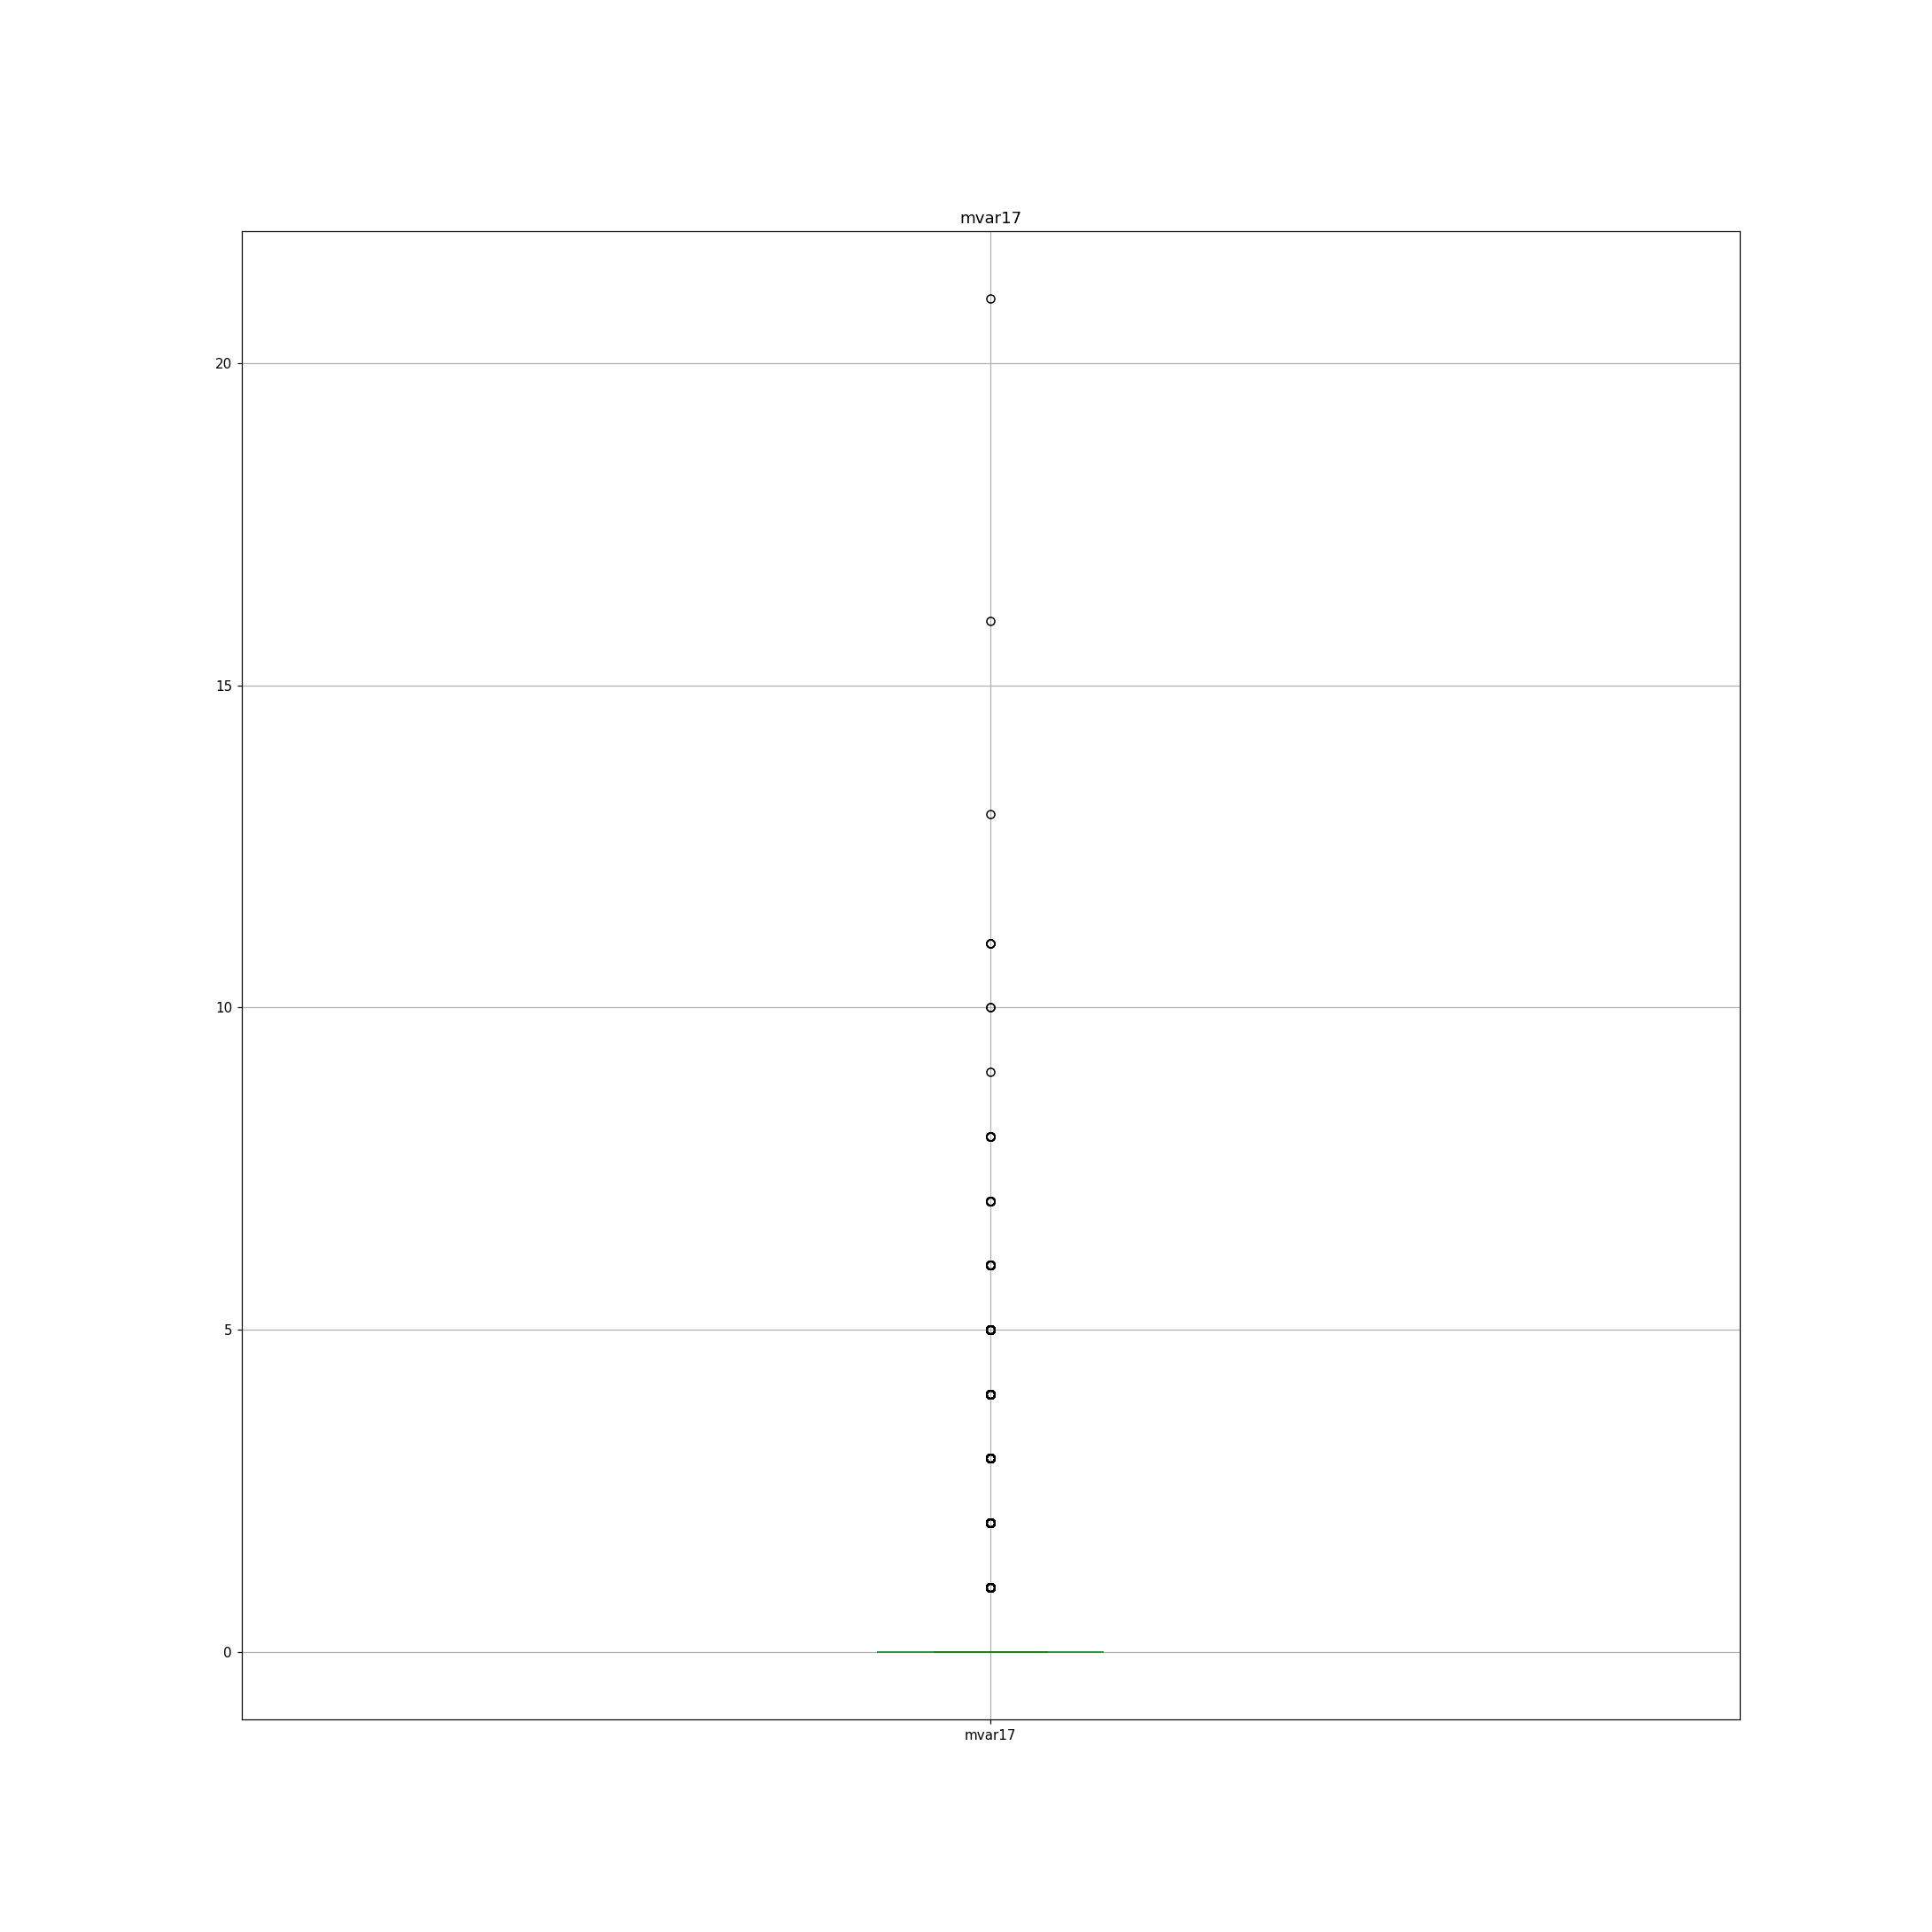

<IPython.core.display.Javascript object>


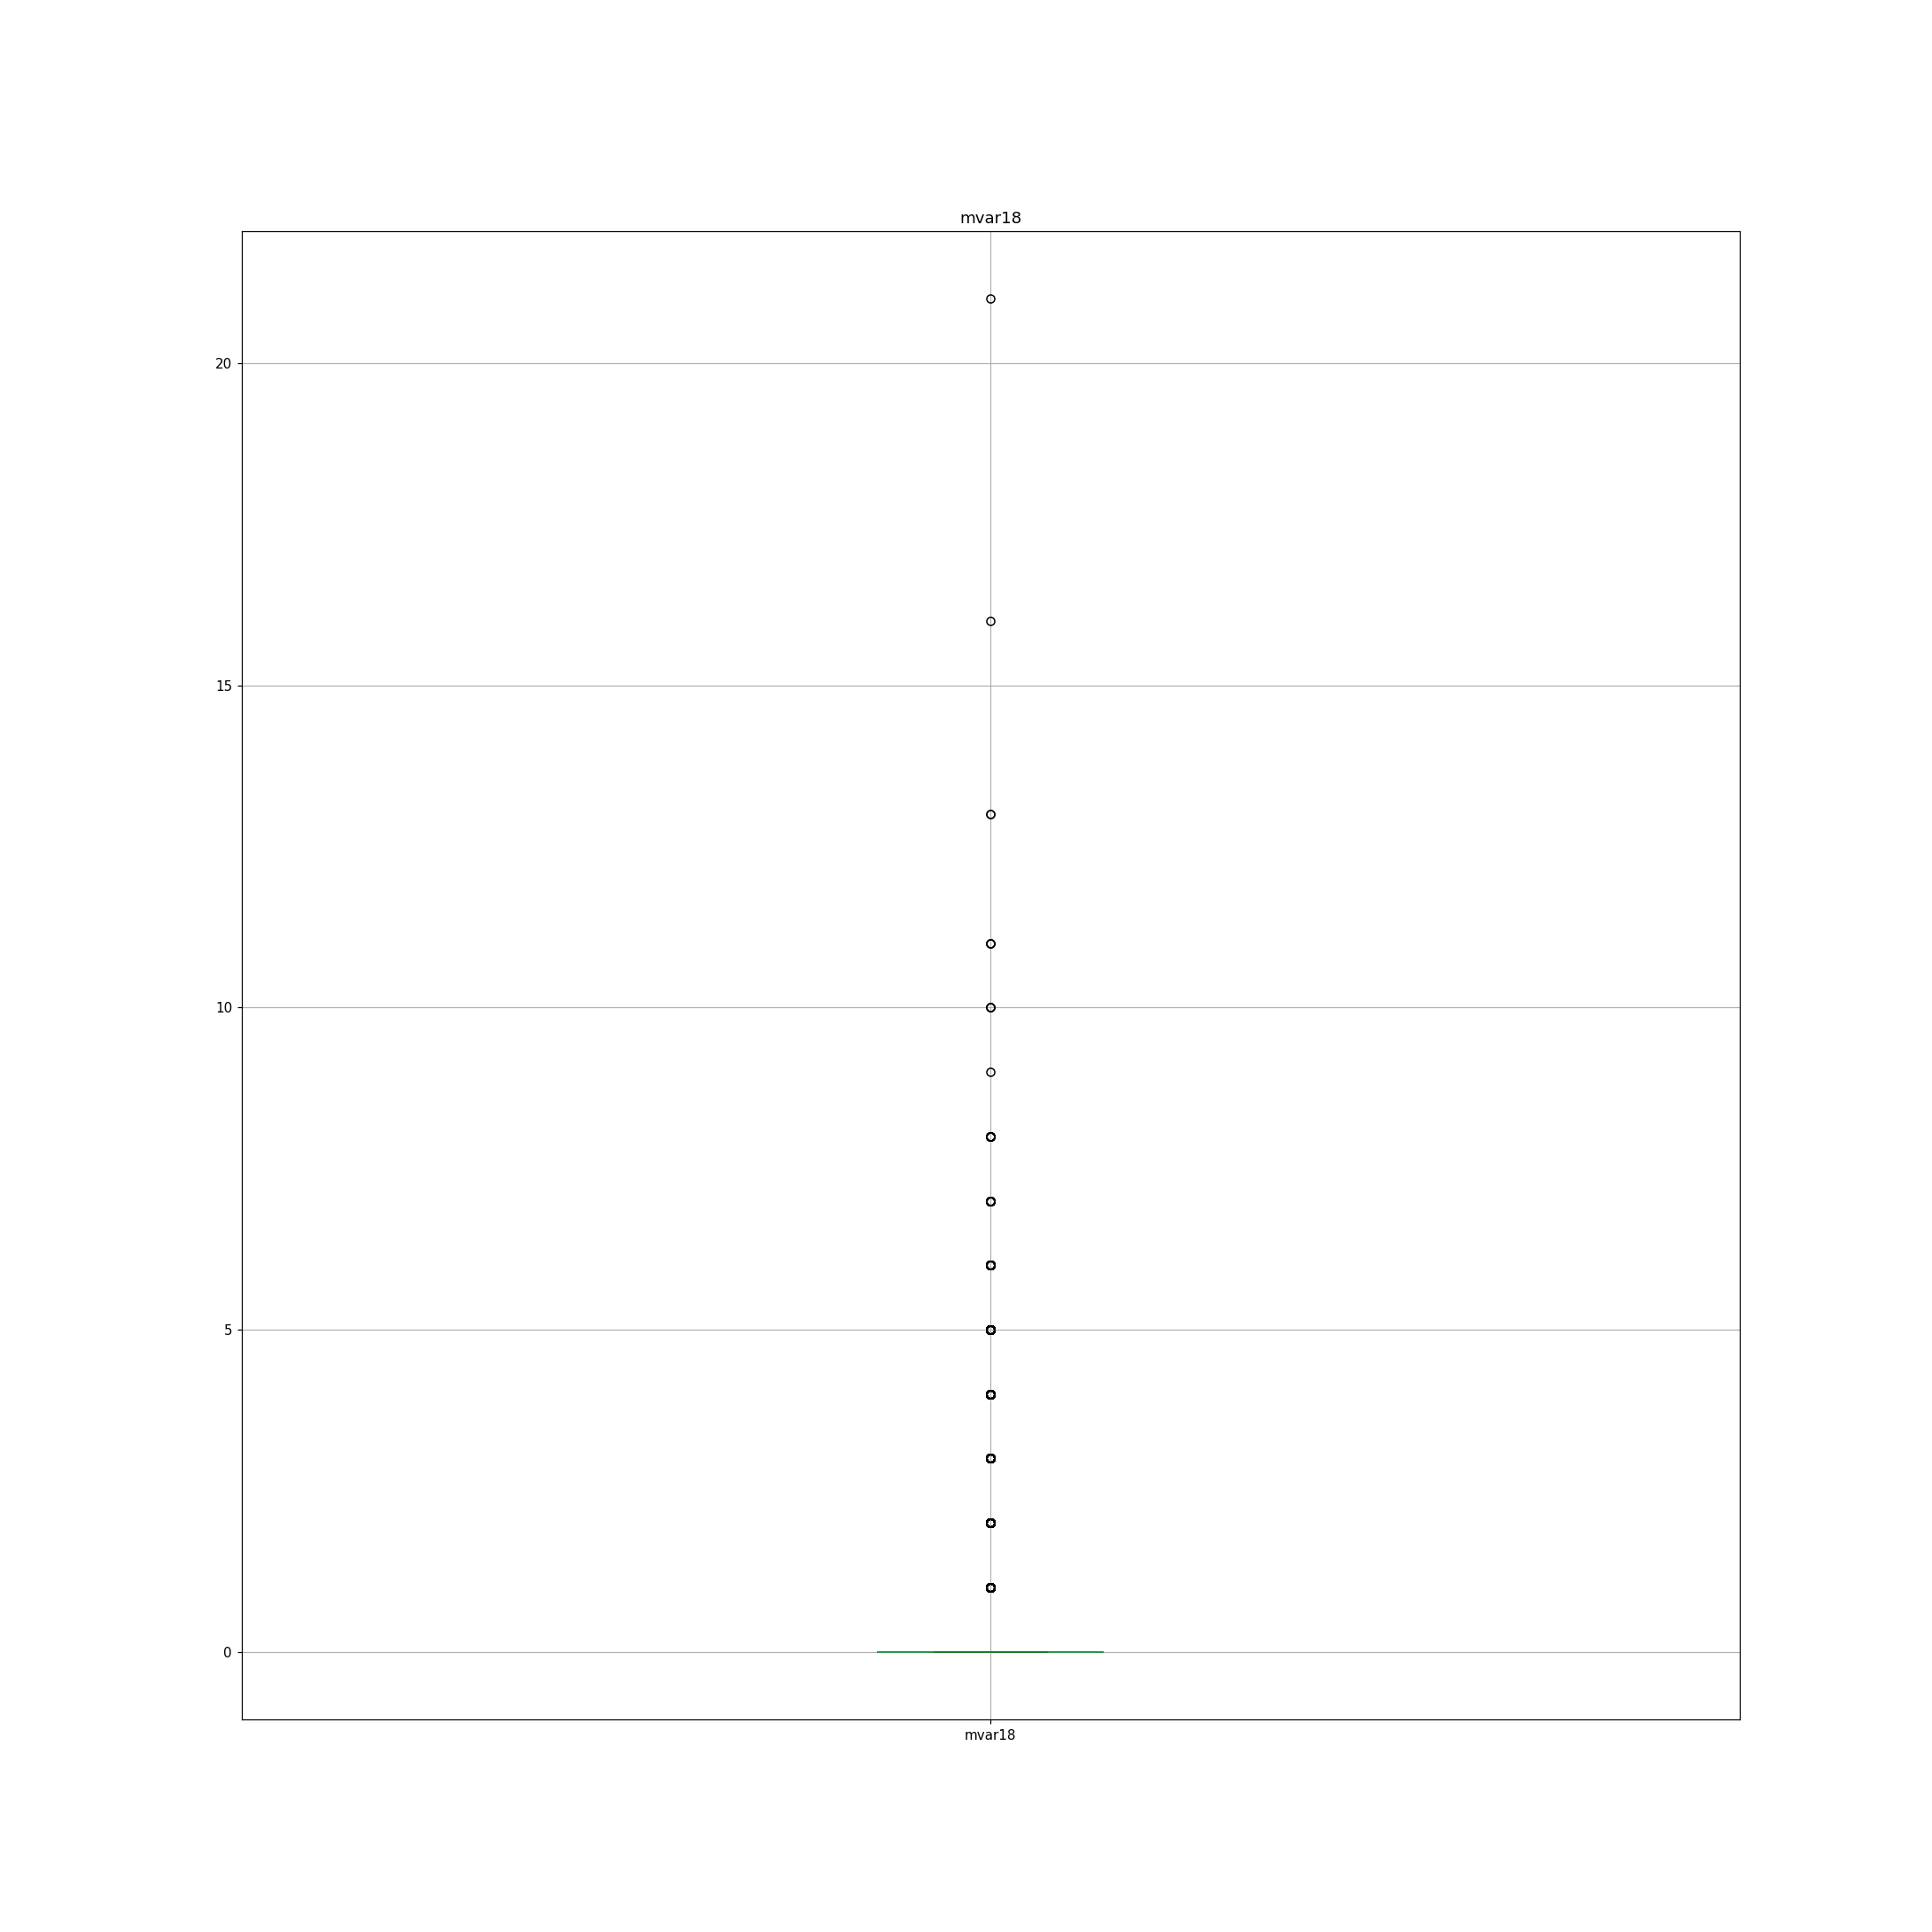

<IPython.core.display.Javascript object>


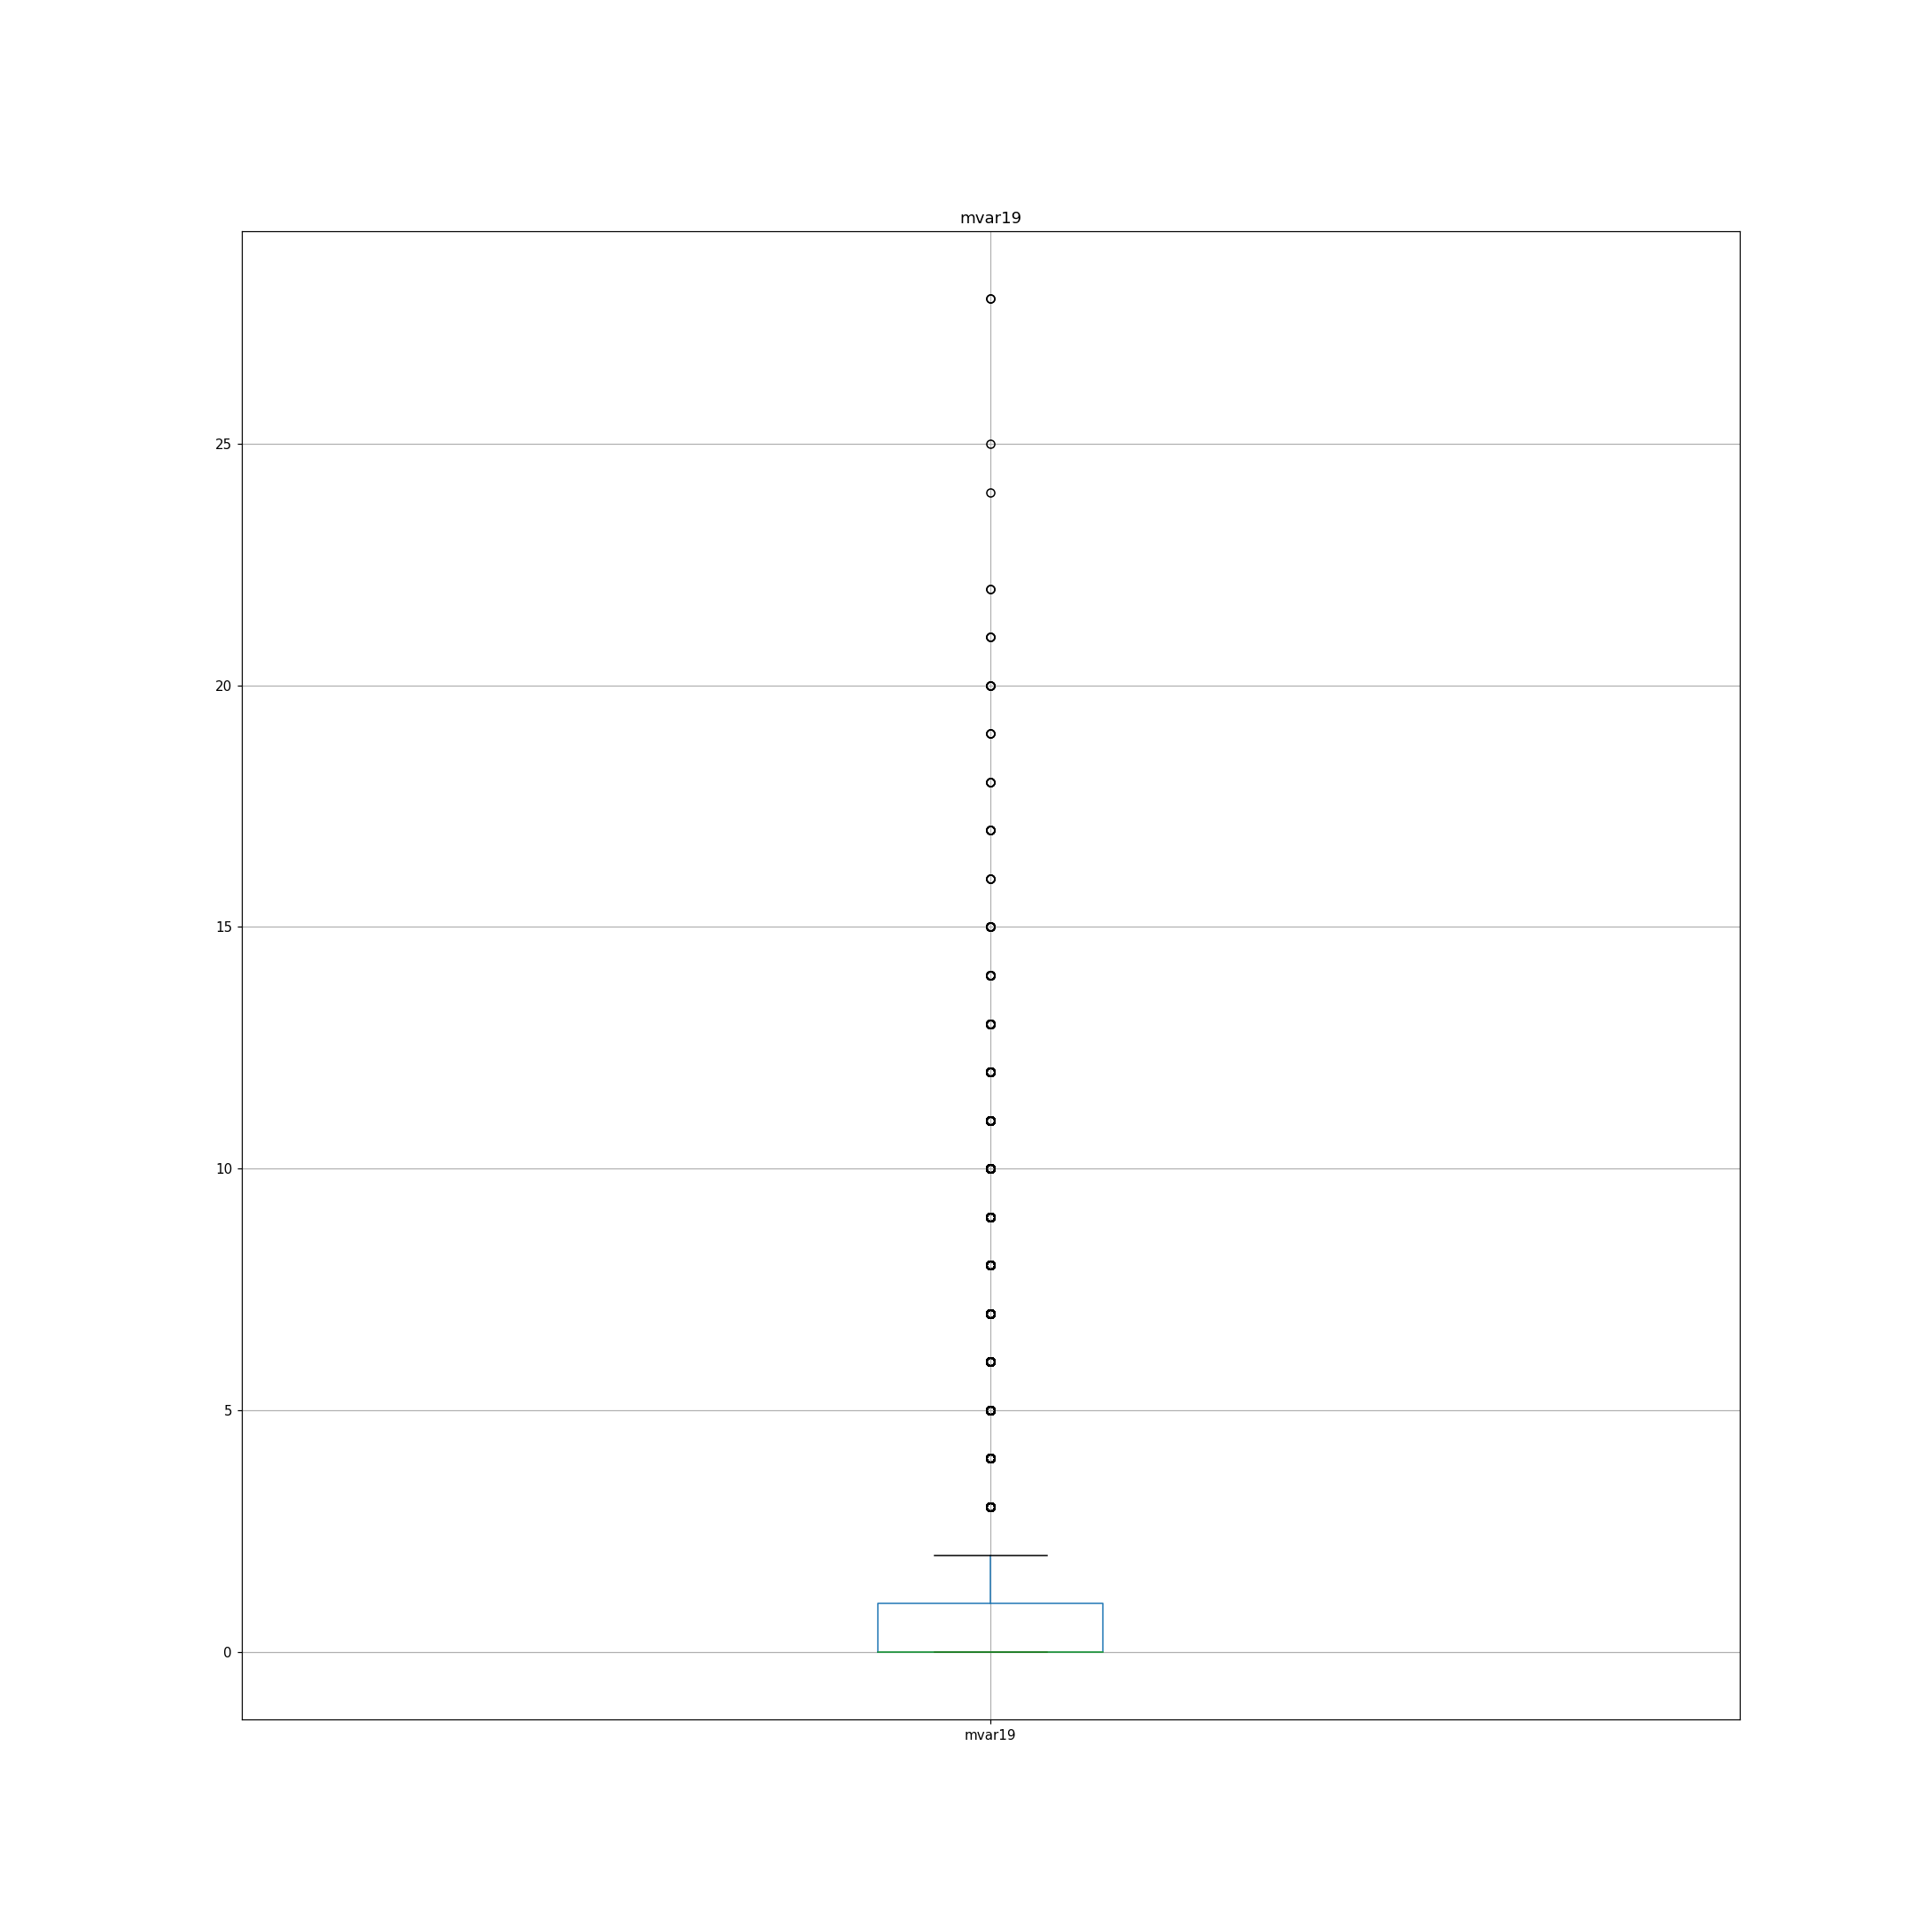

<IPython.core.display.Javascript object>


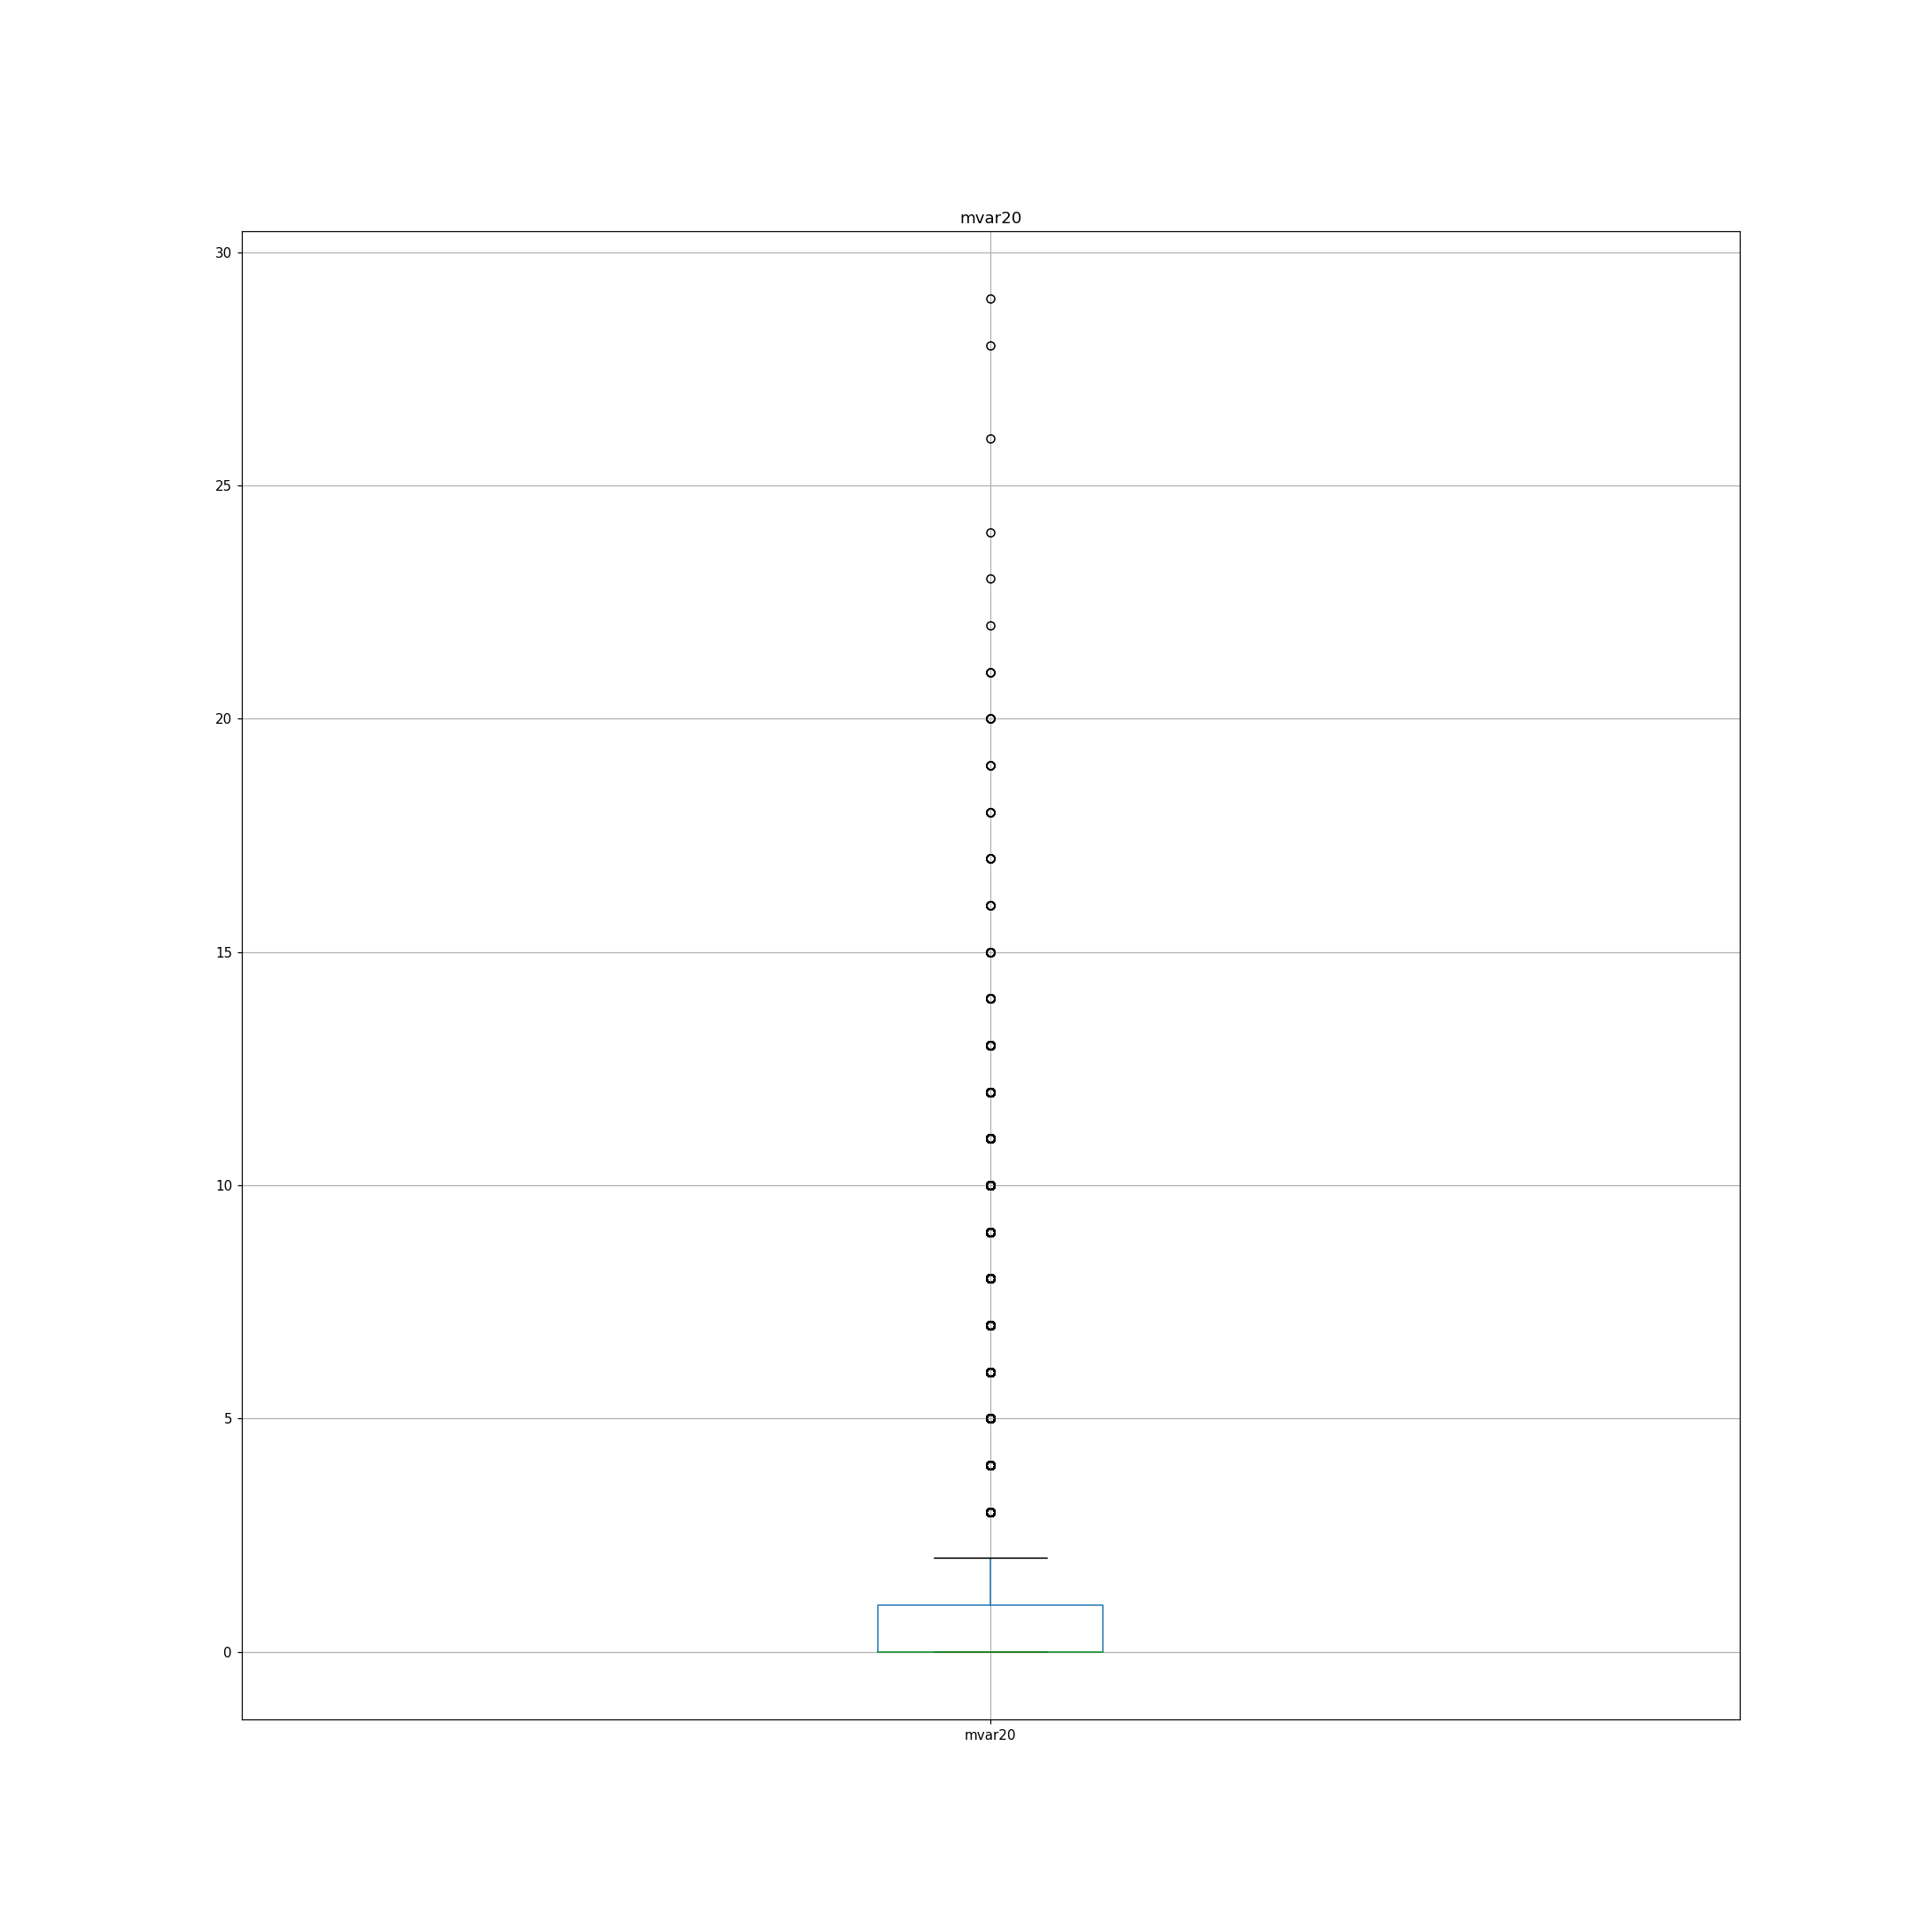

<IPython.core.display.Javascript object>


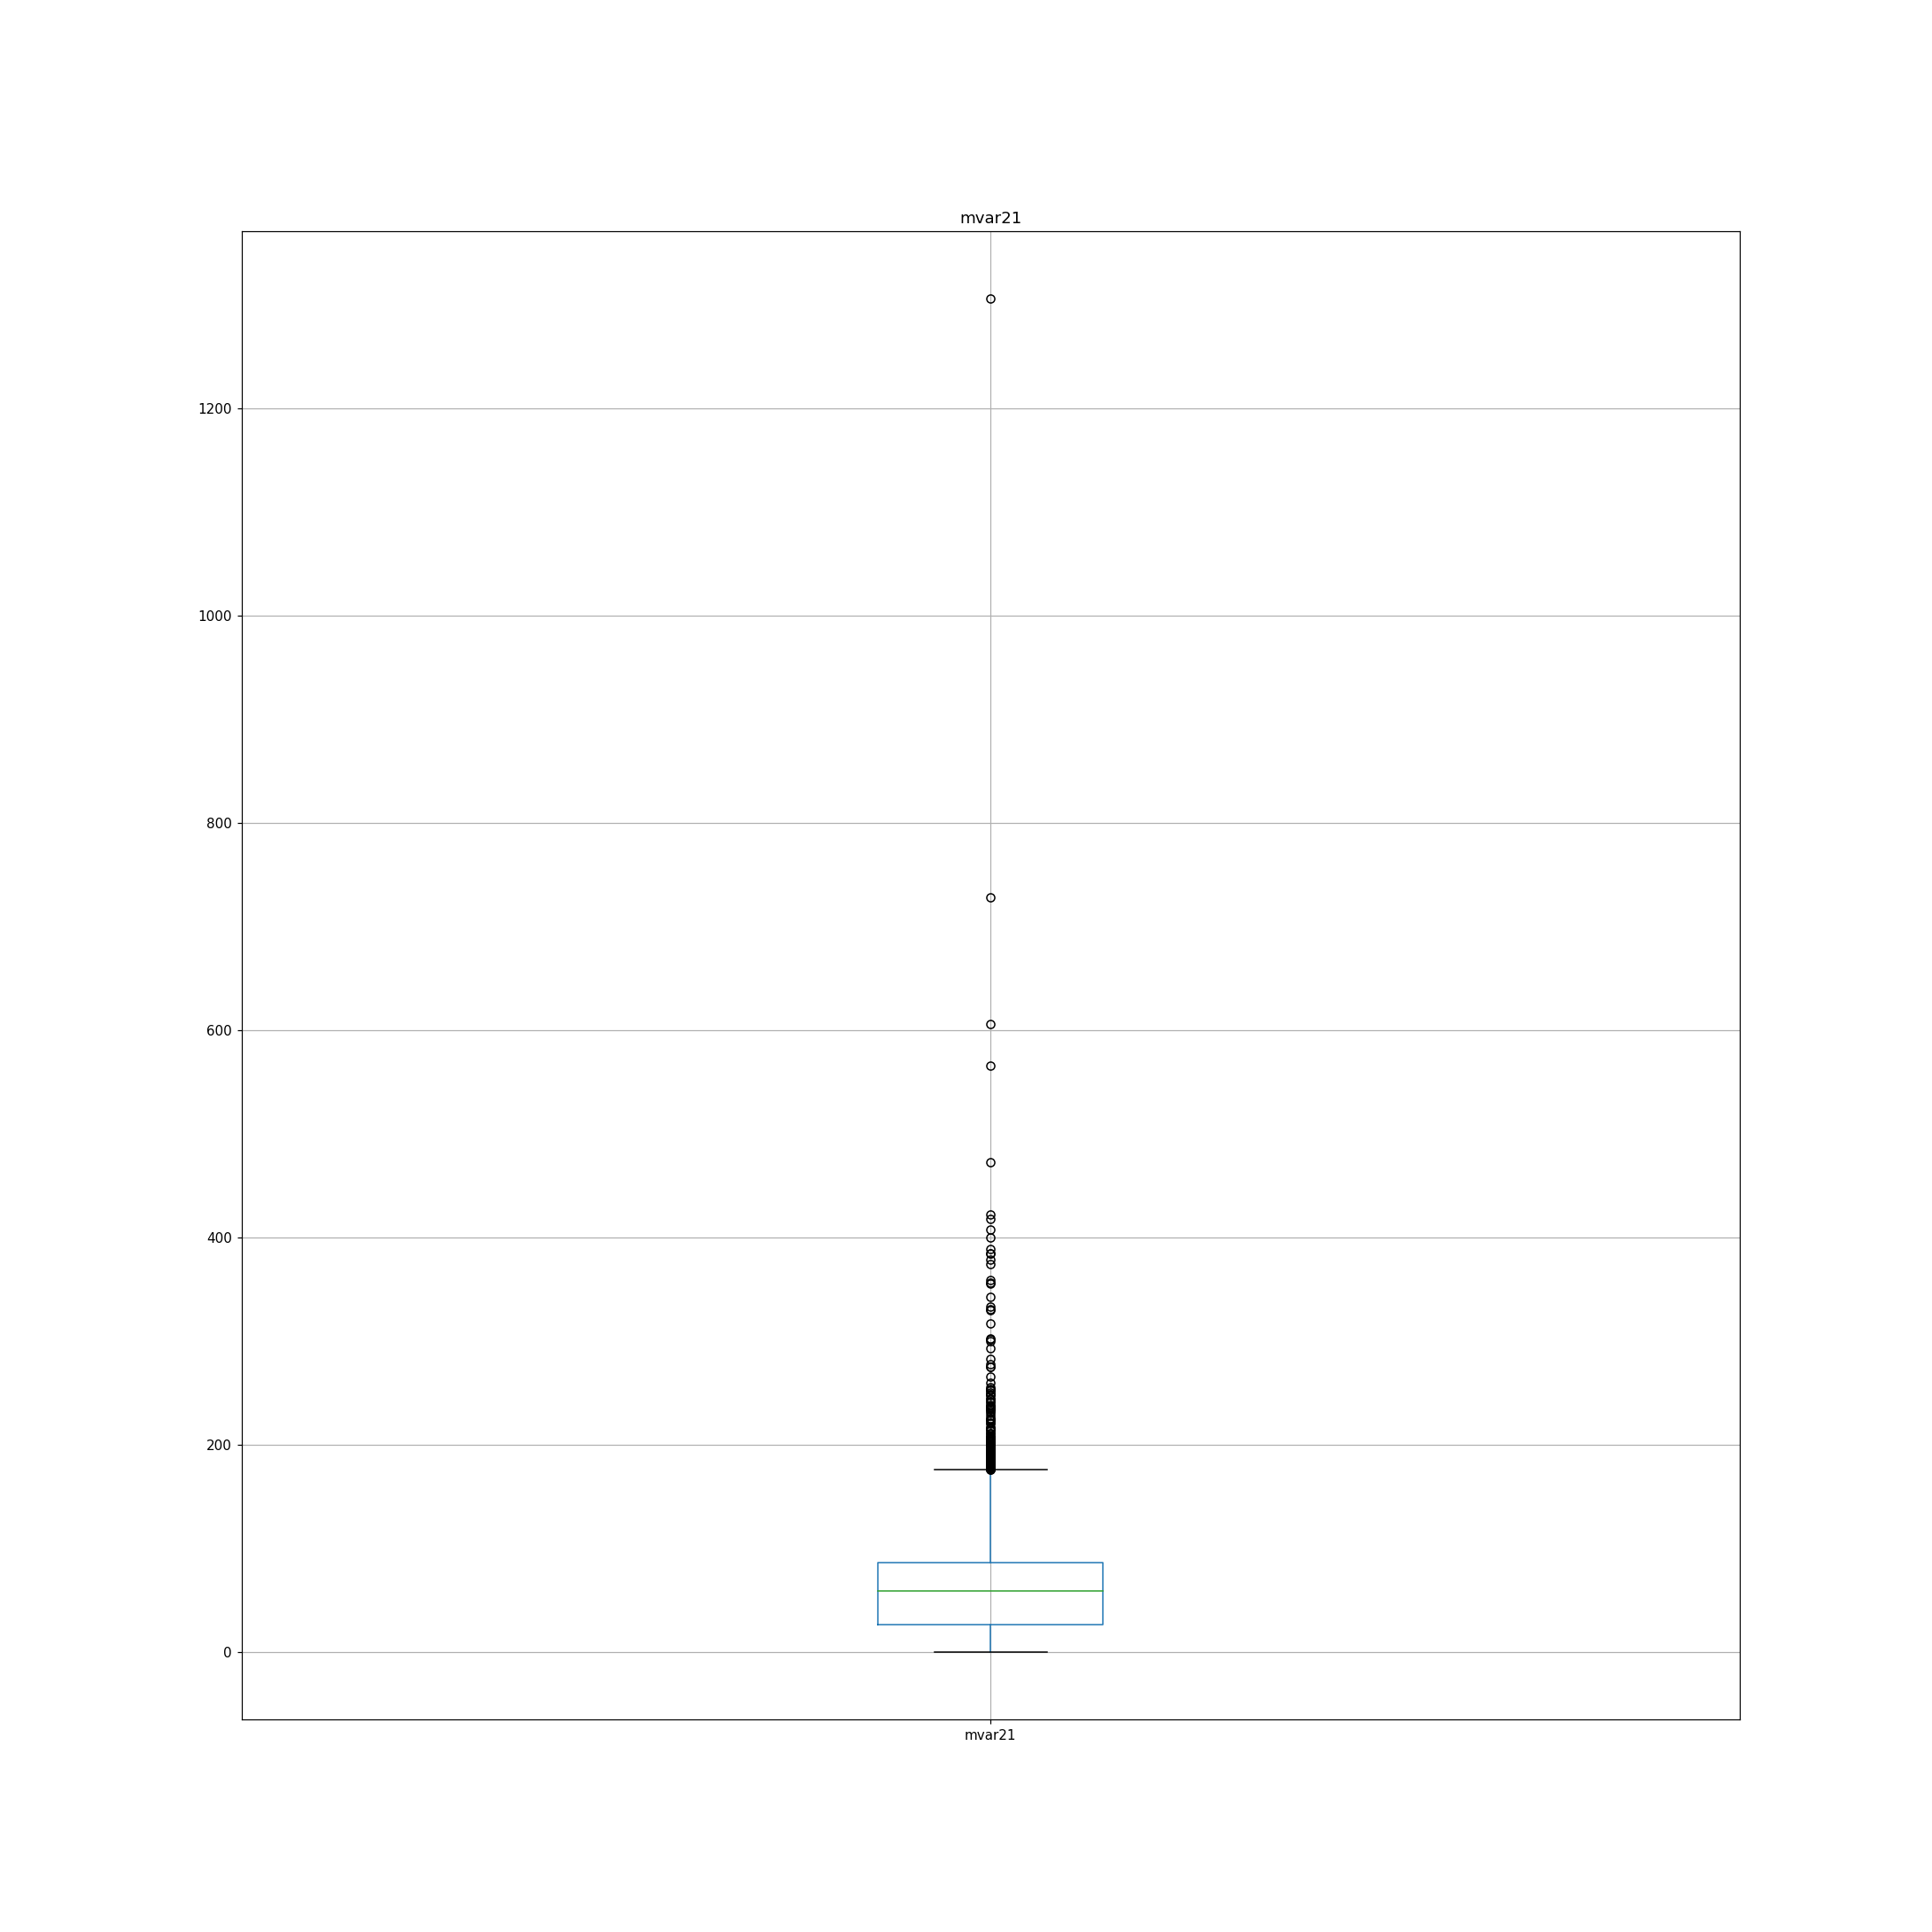

<IPython.core.display.Javascript object>


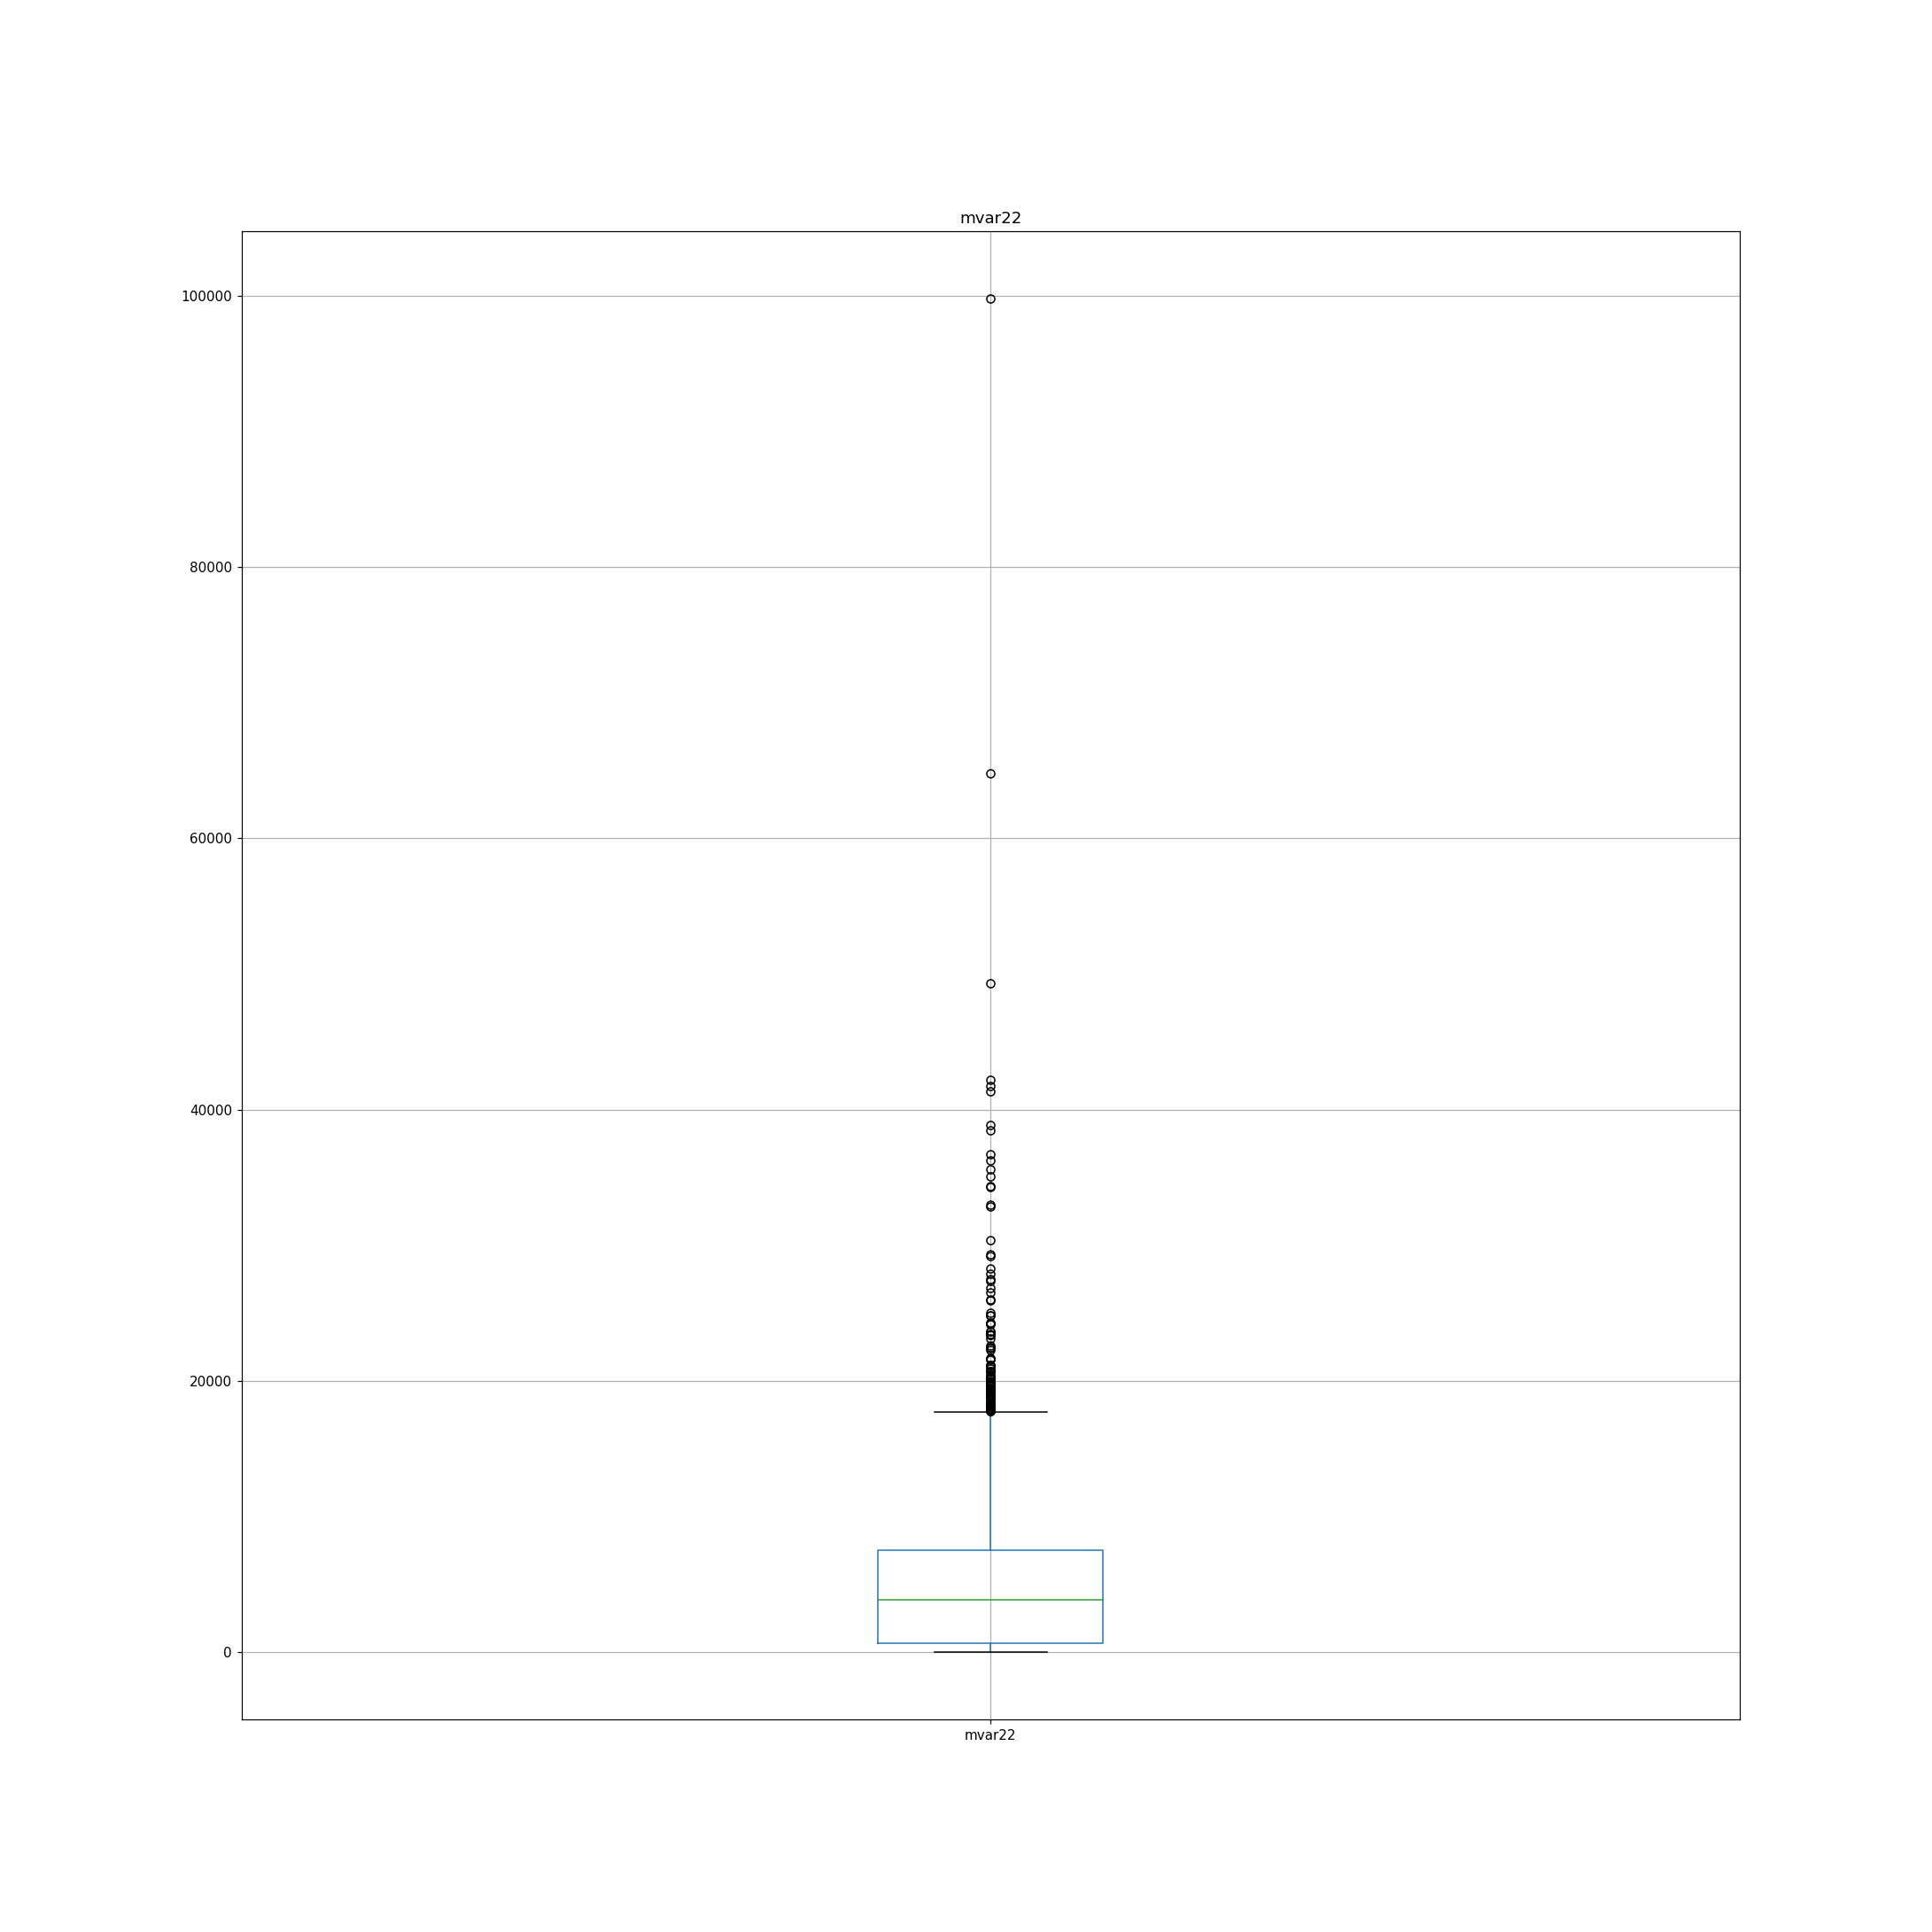

<IPython.core.display.Javascript object>


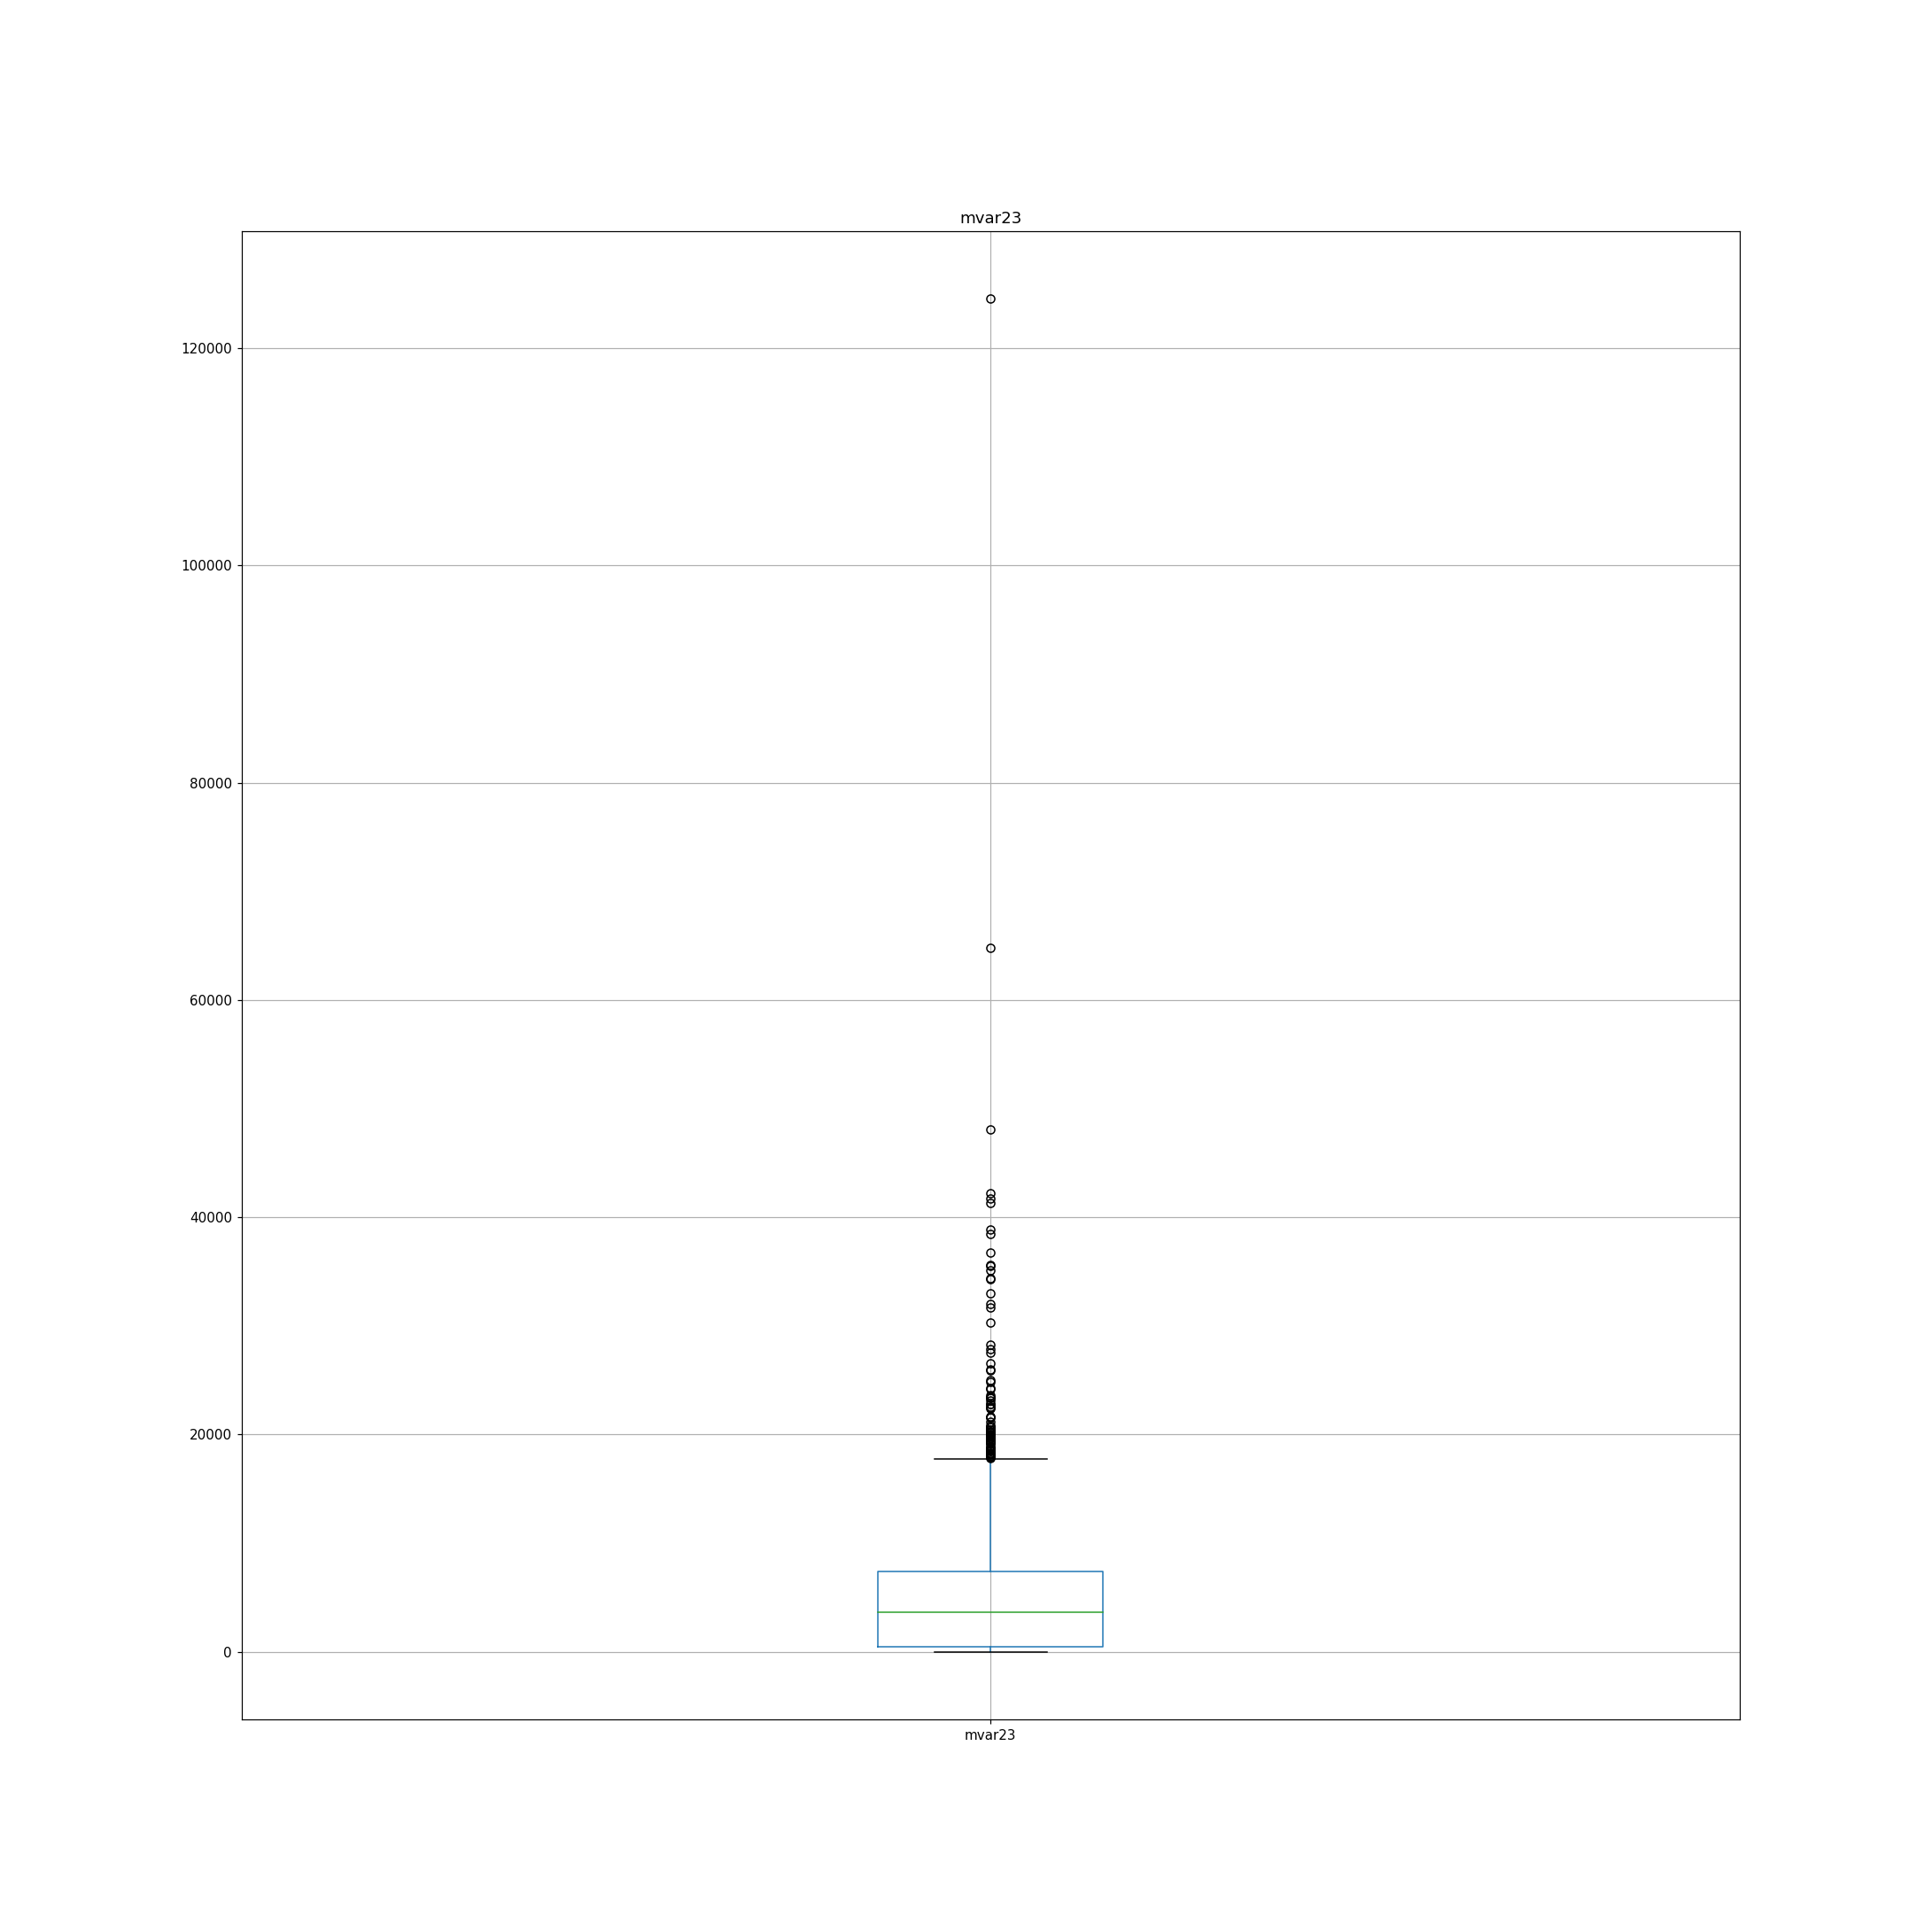

<IPython.core.display.Javascript object>


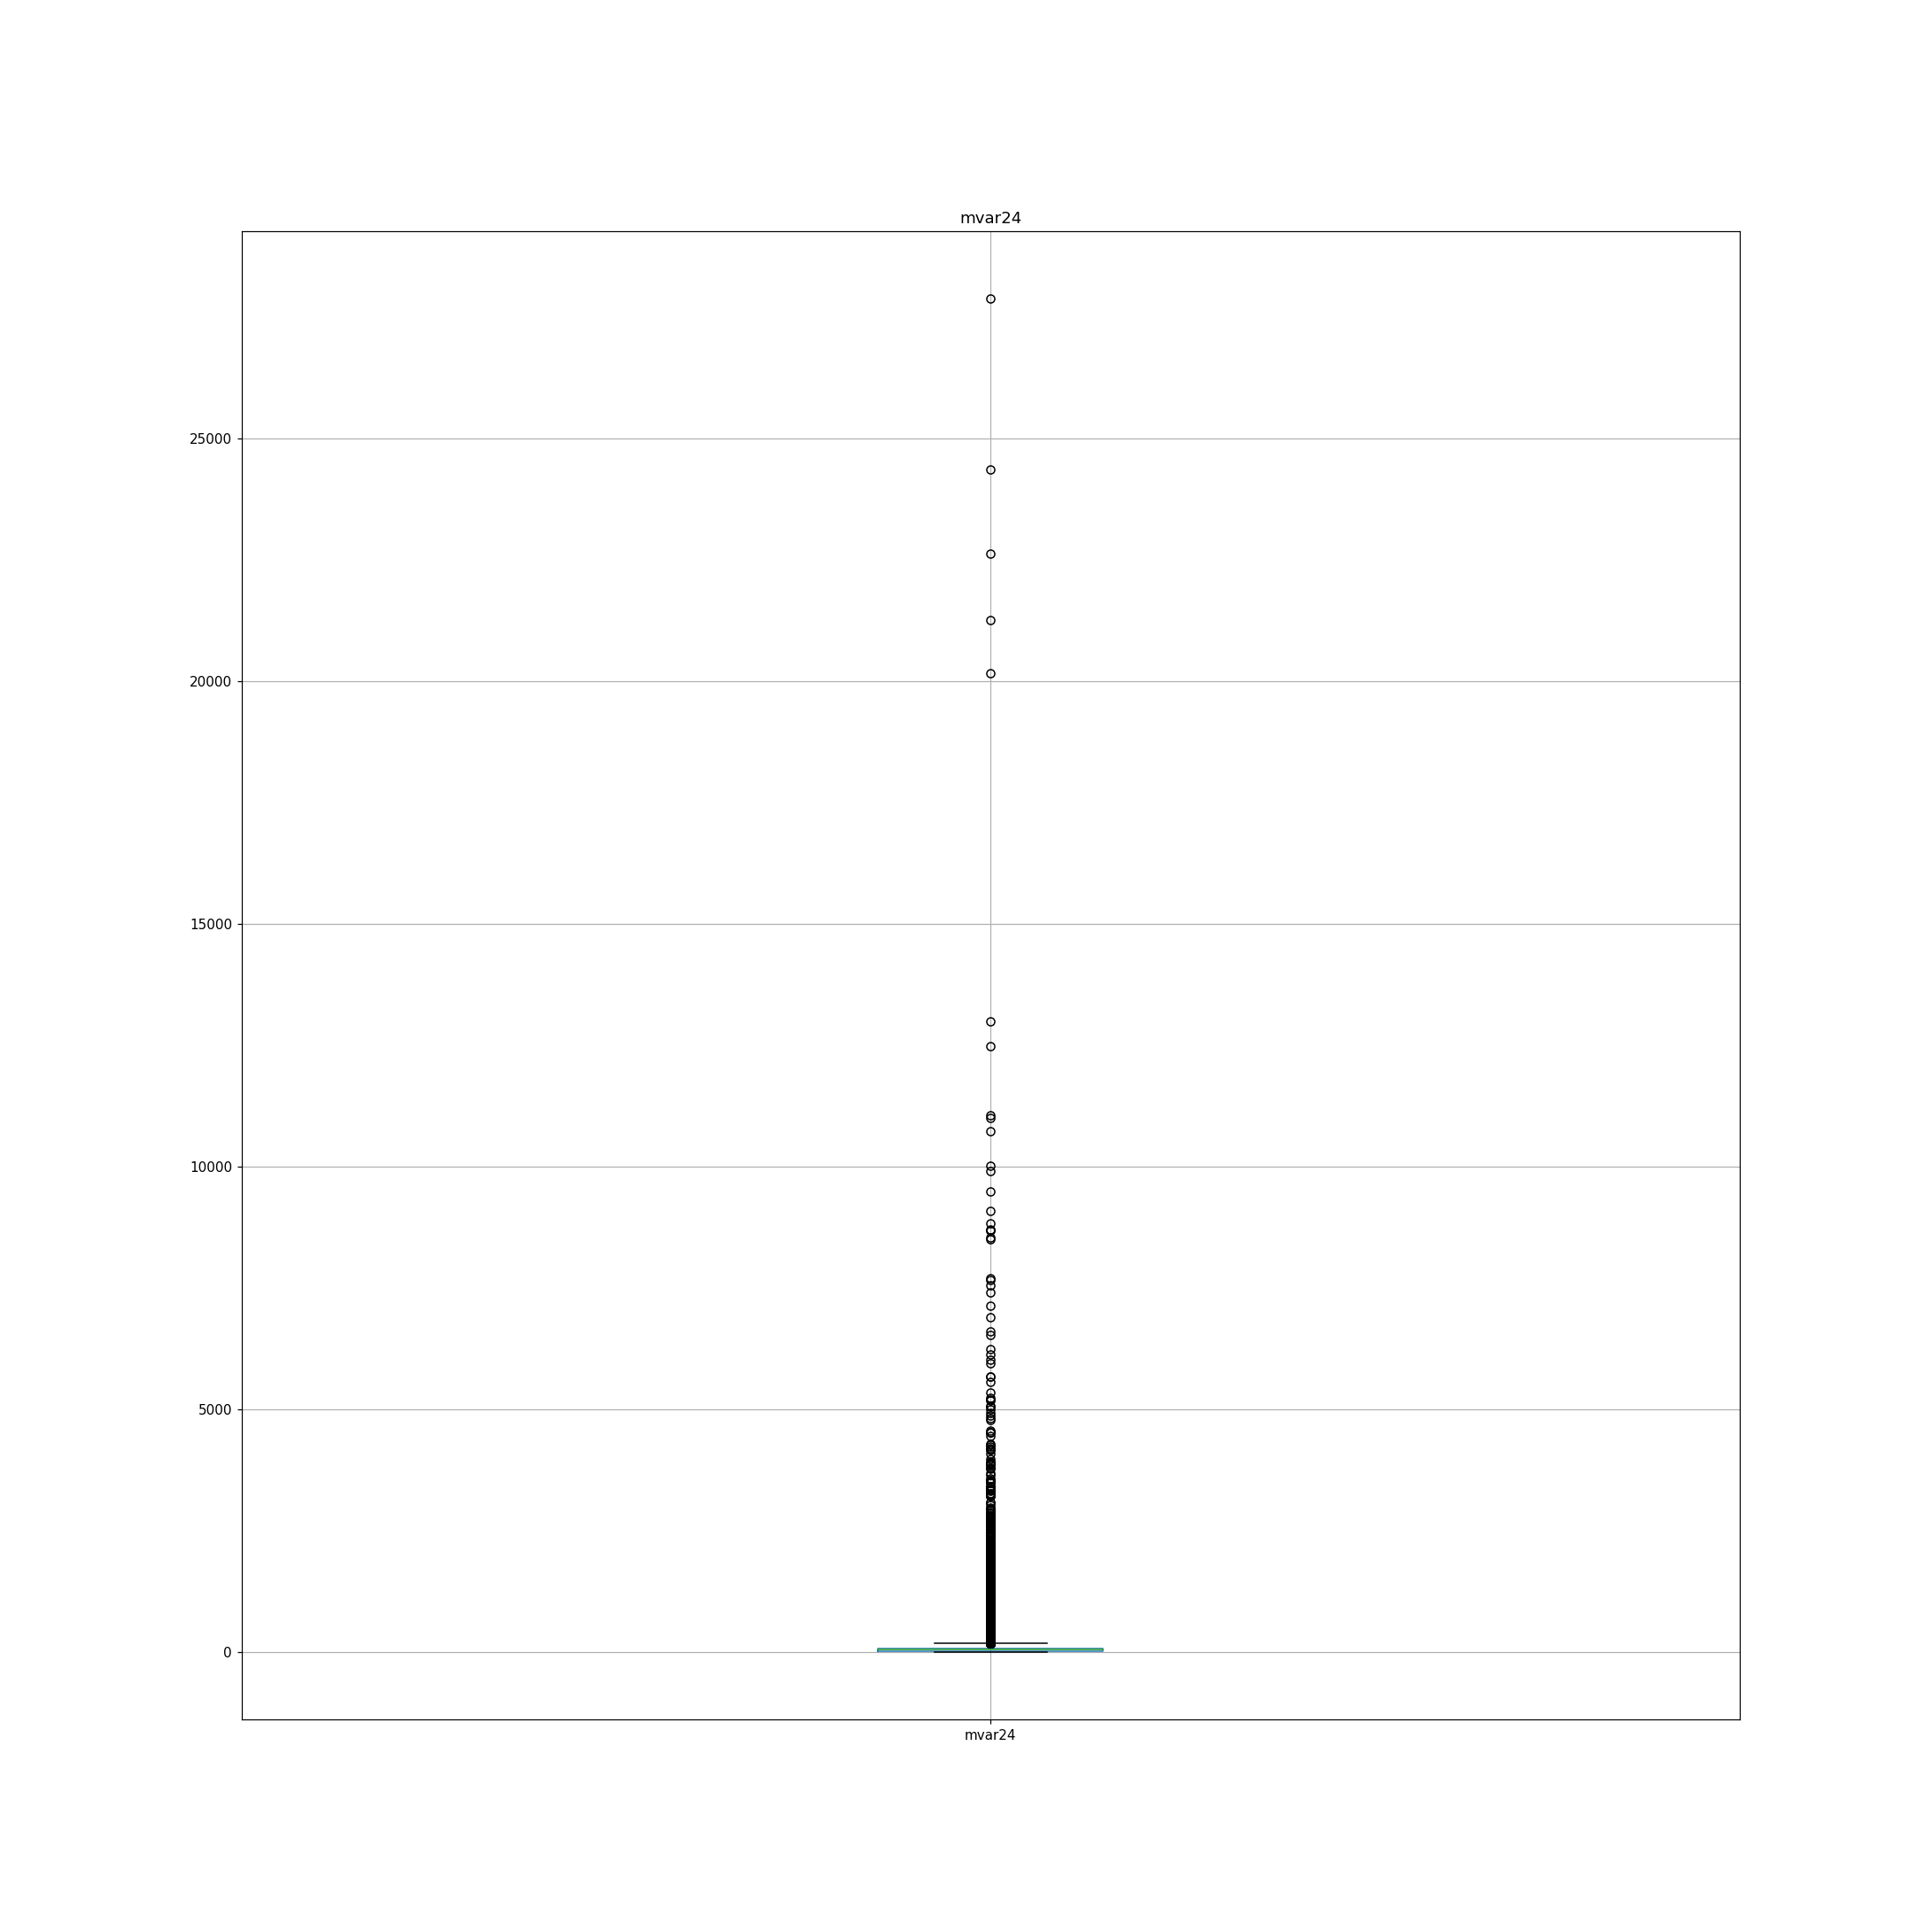

<IPython.core.display.Javascript object>


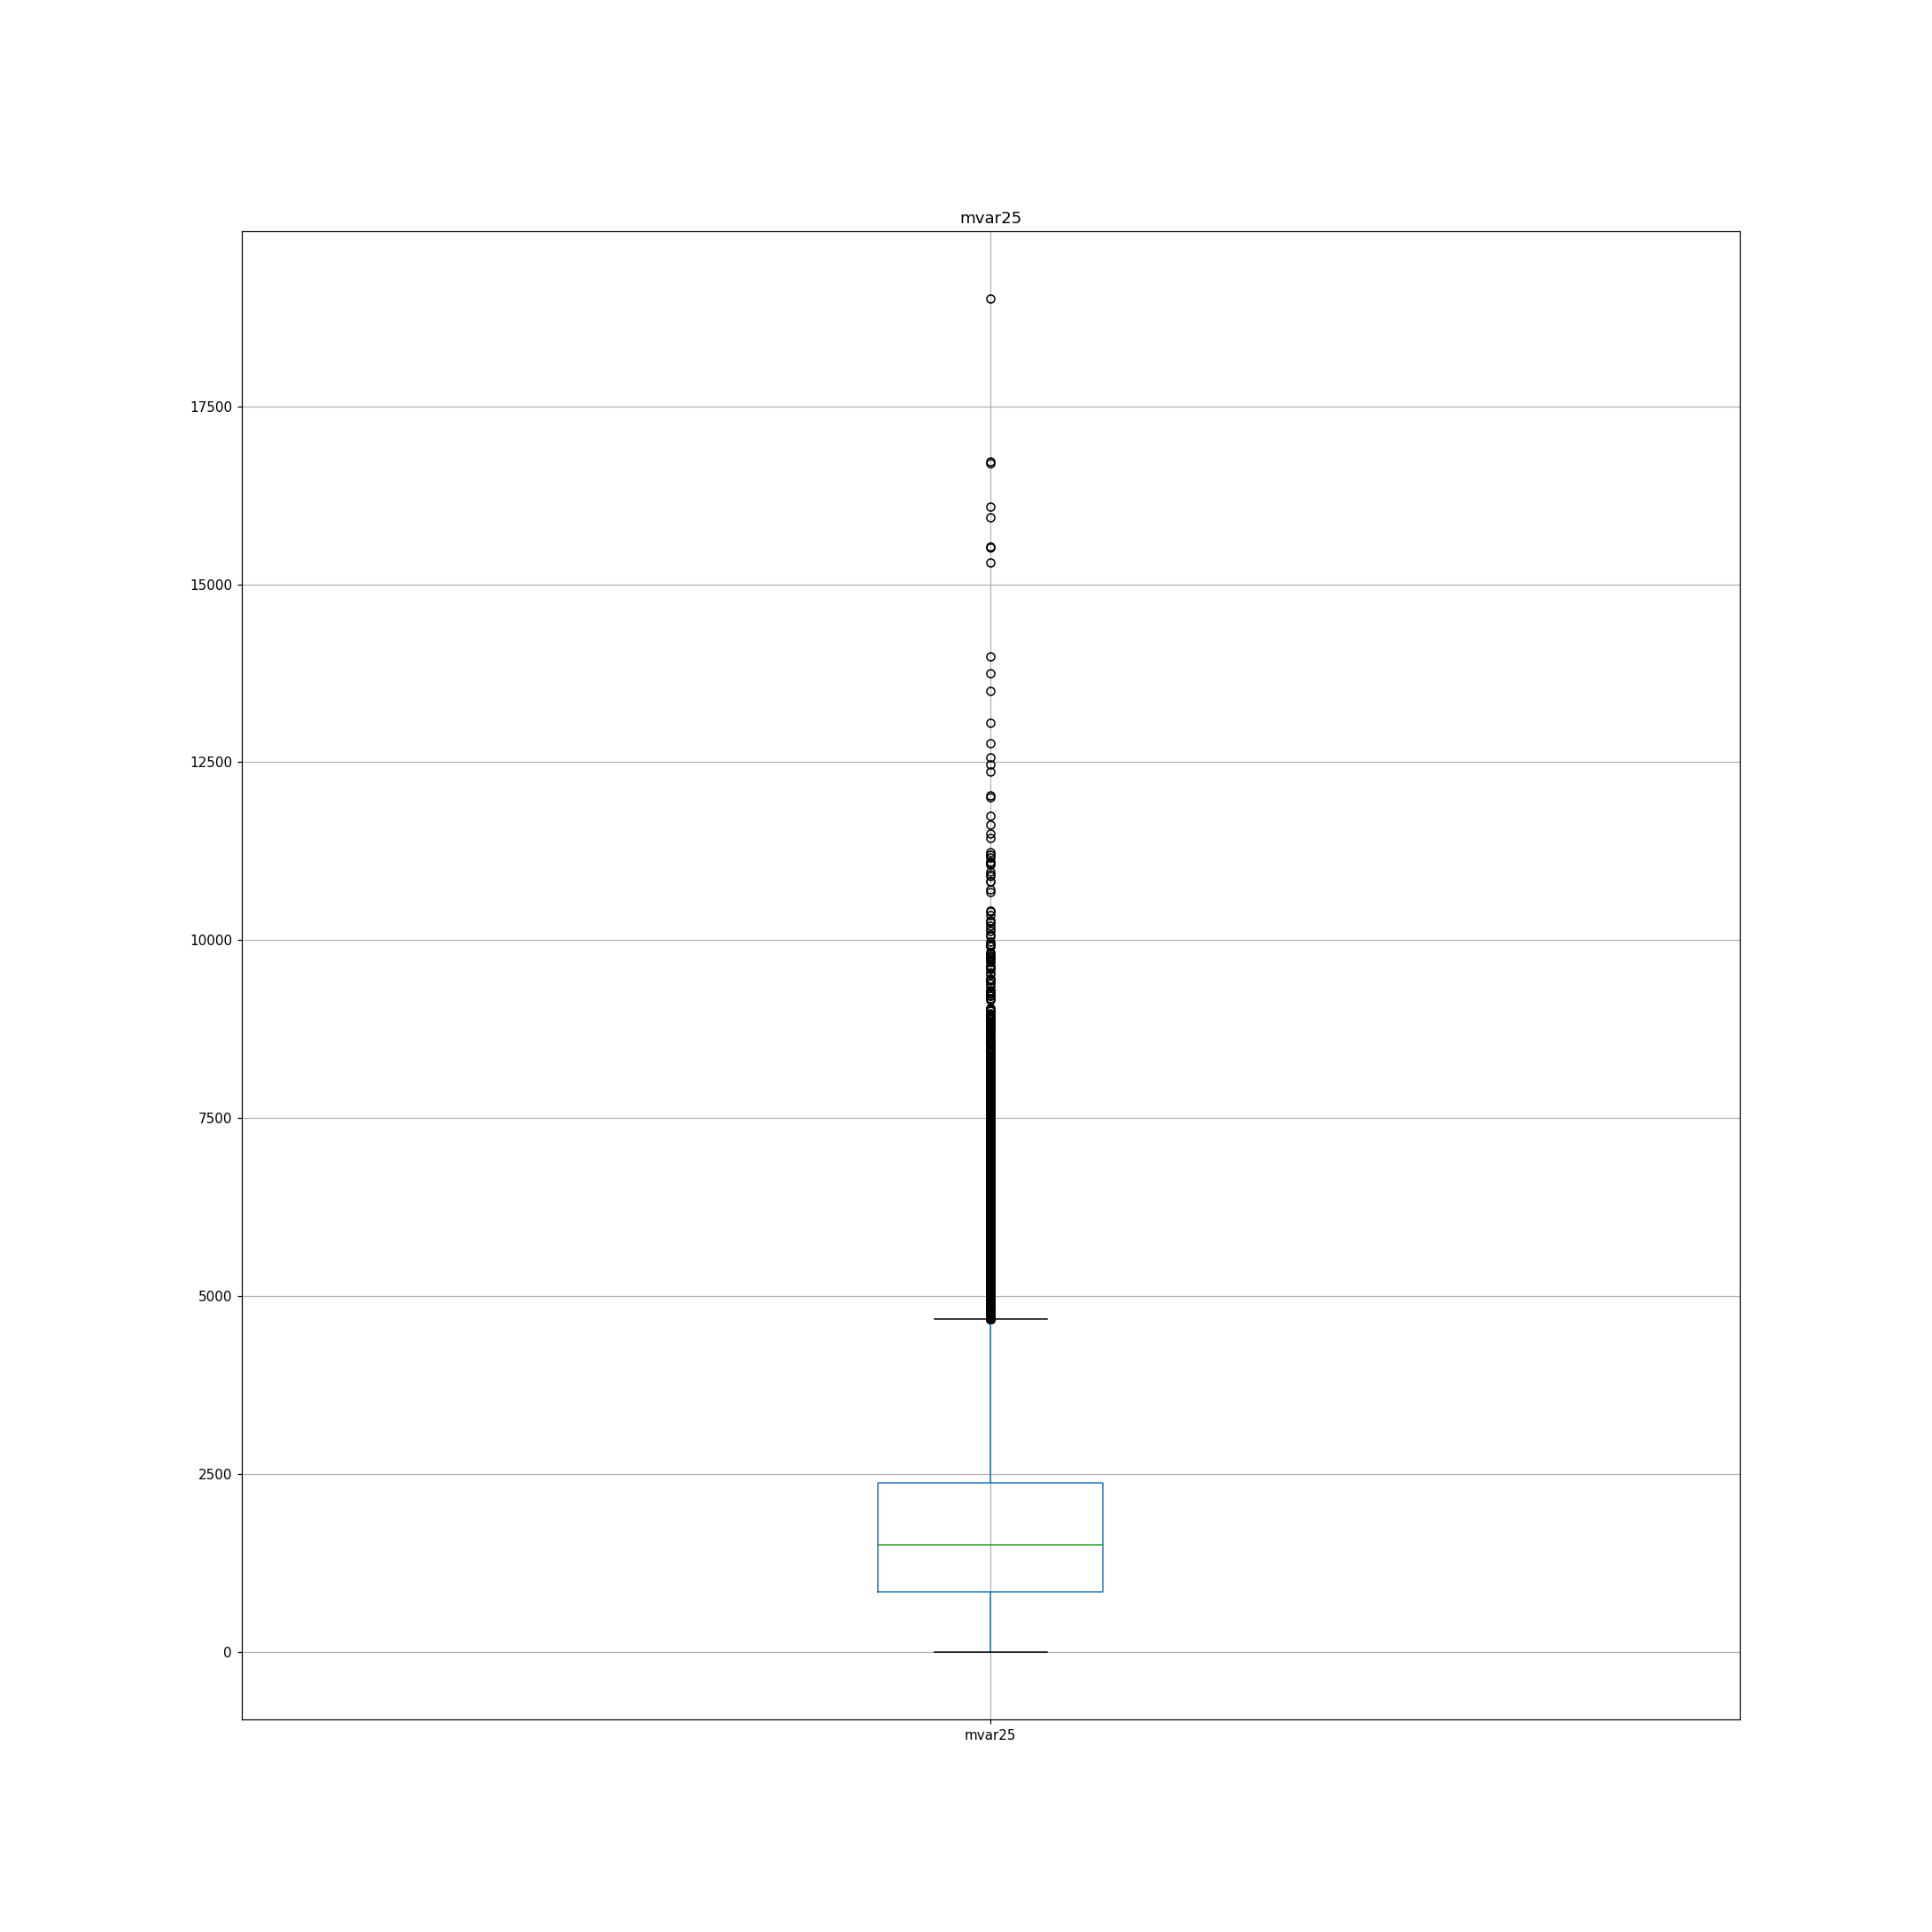

<IPython.core.display.Javascript object>


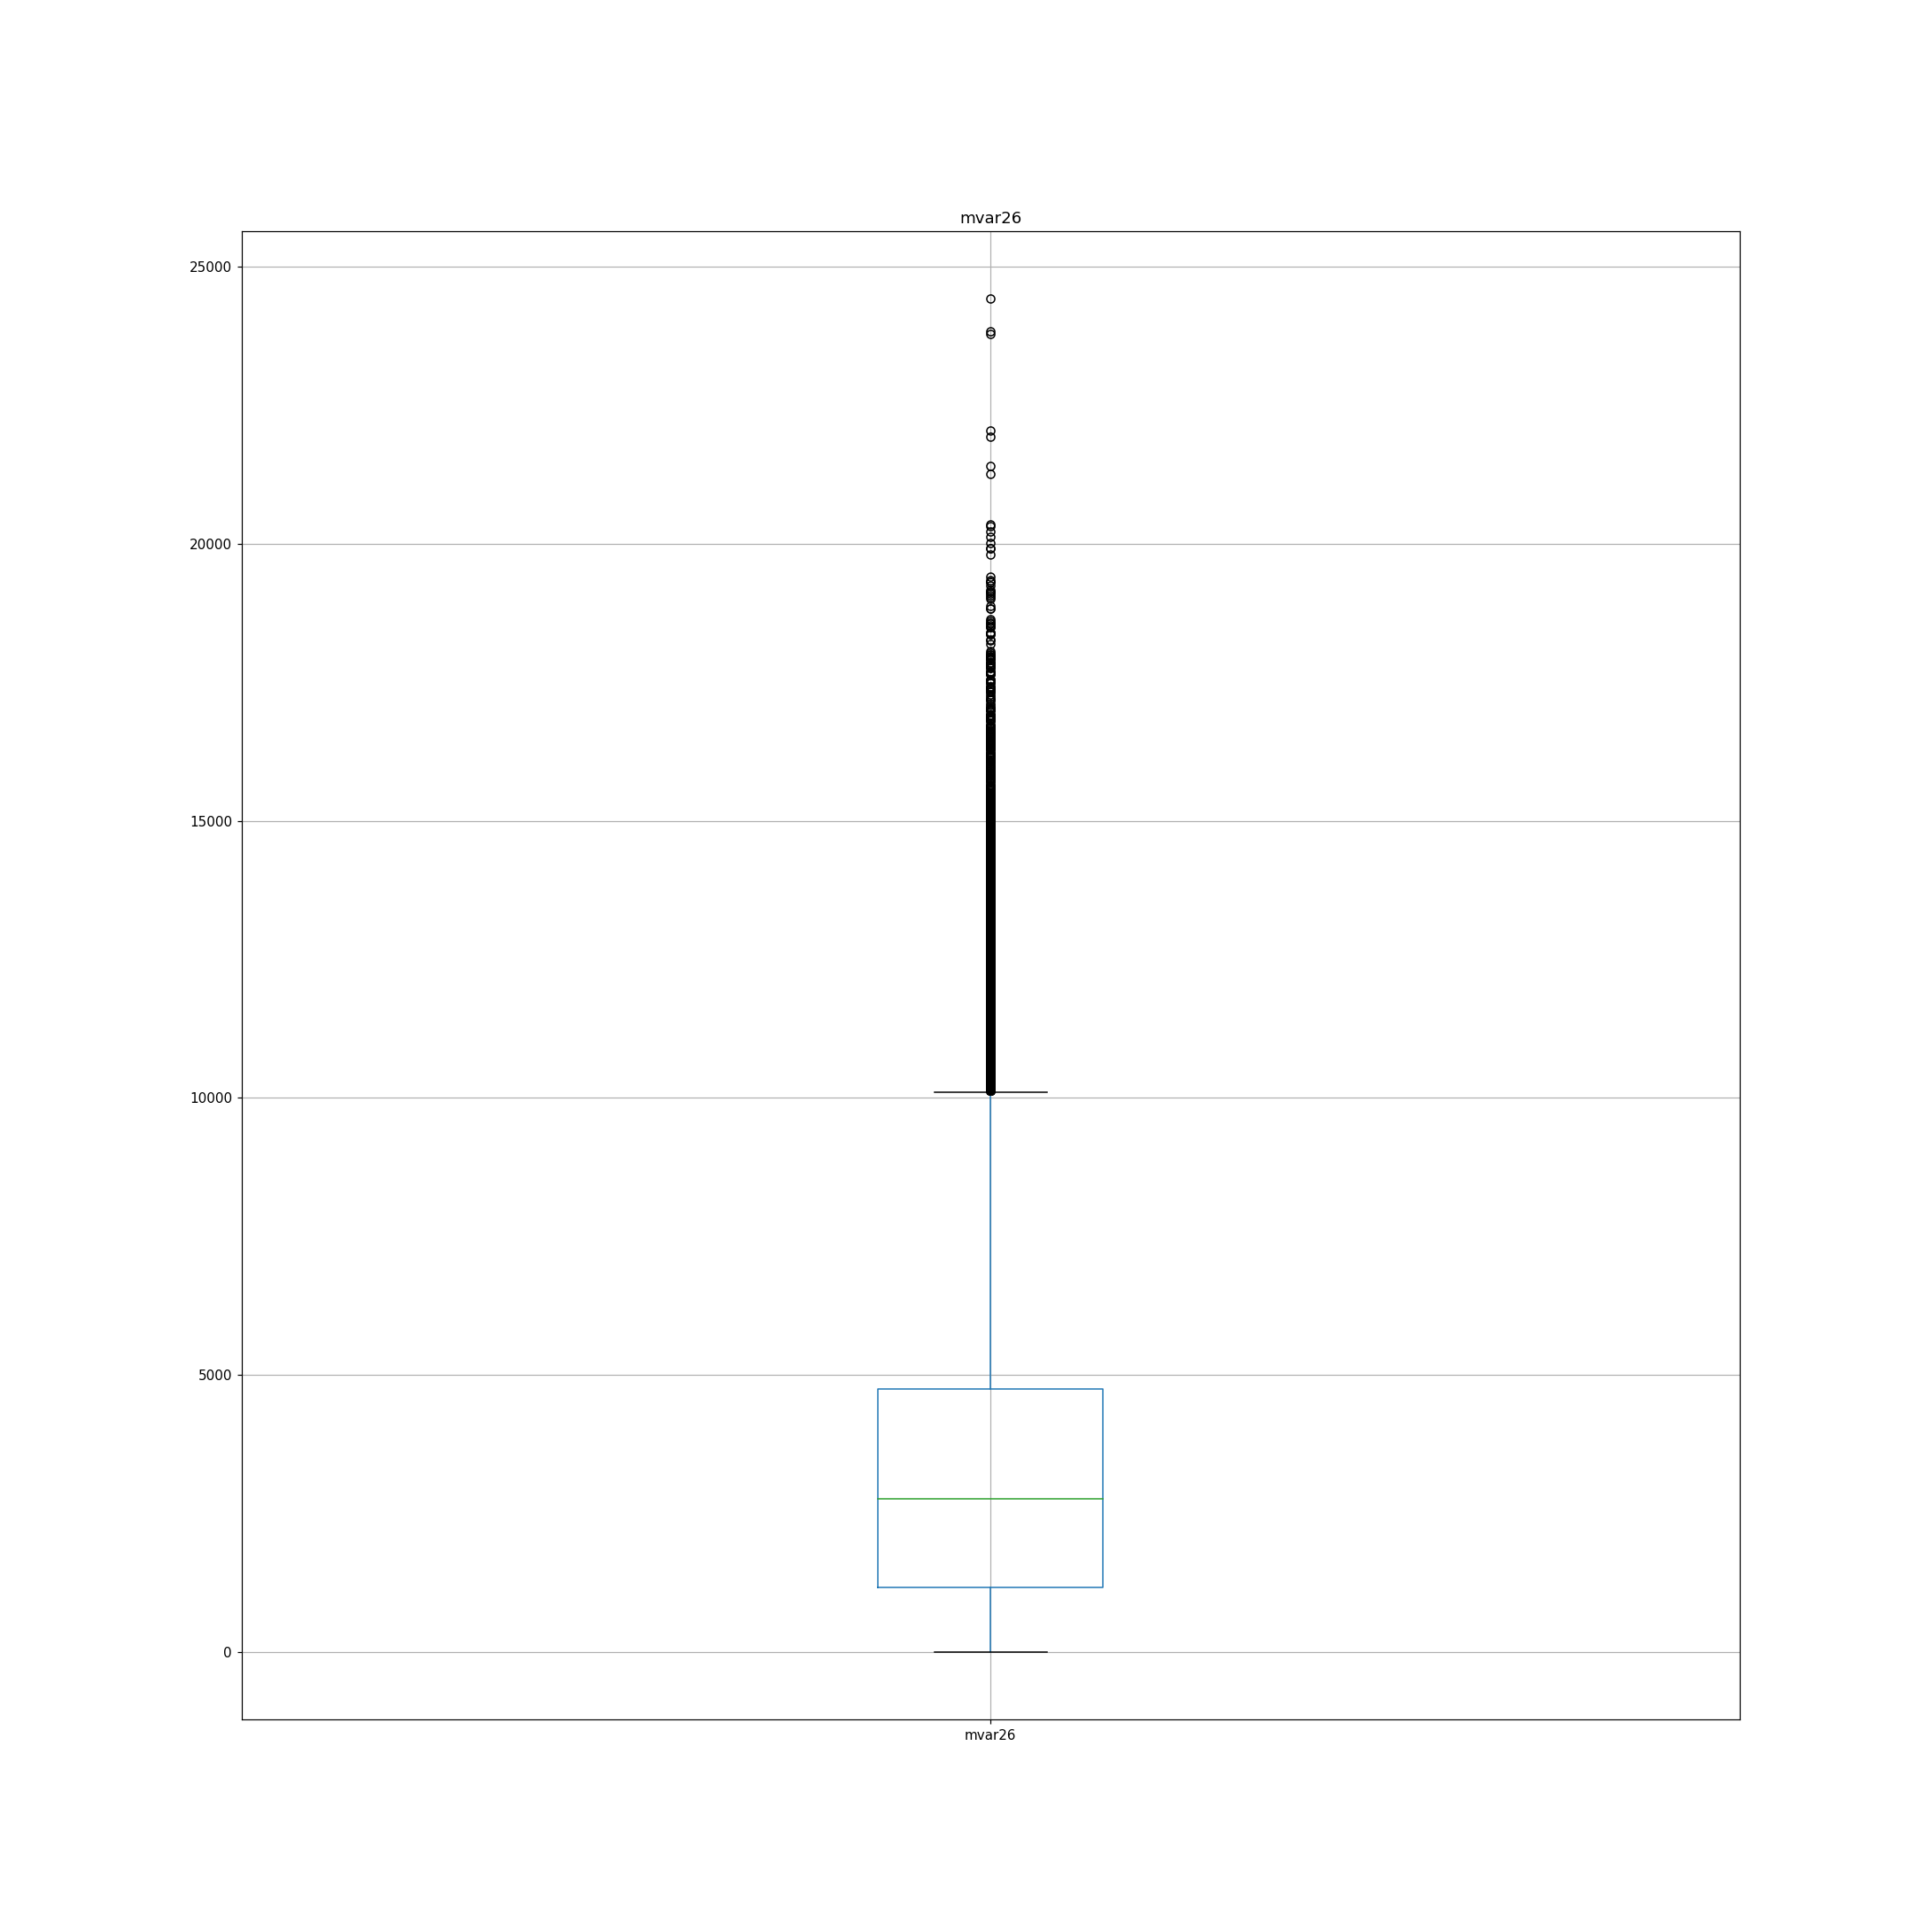

<IPython.core.display.Javascript object>


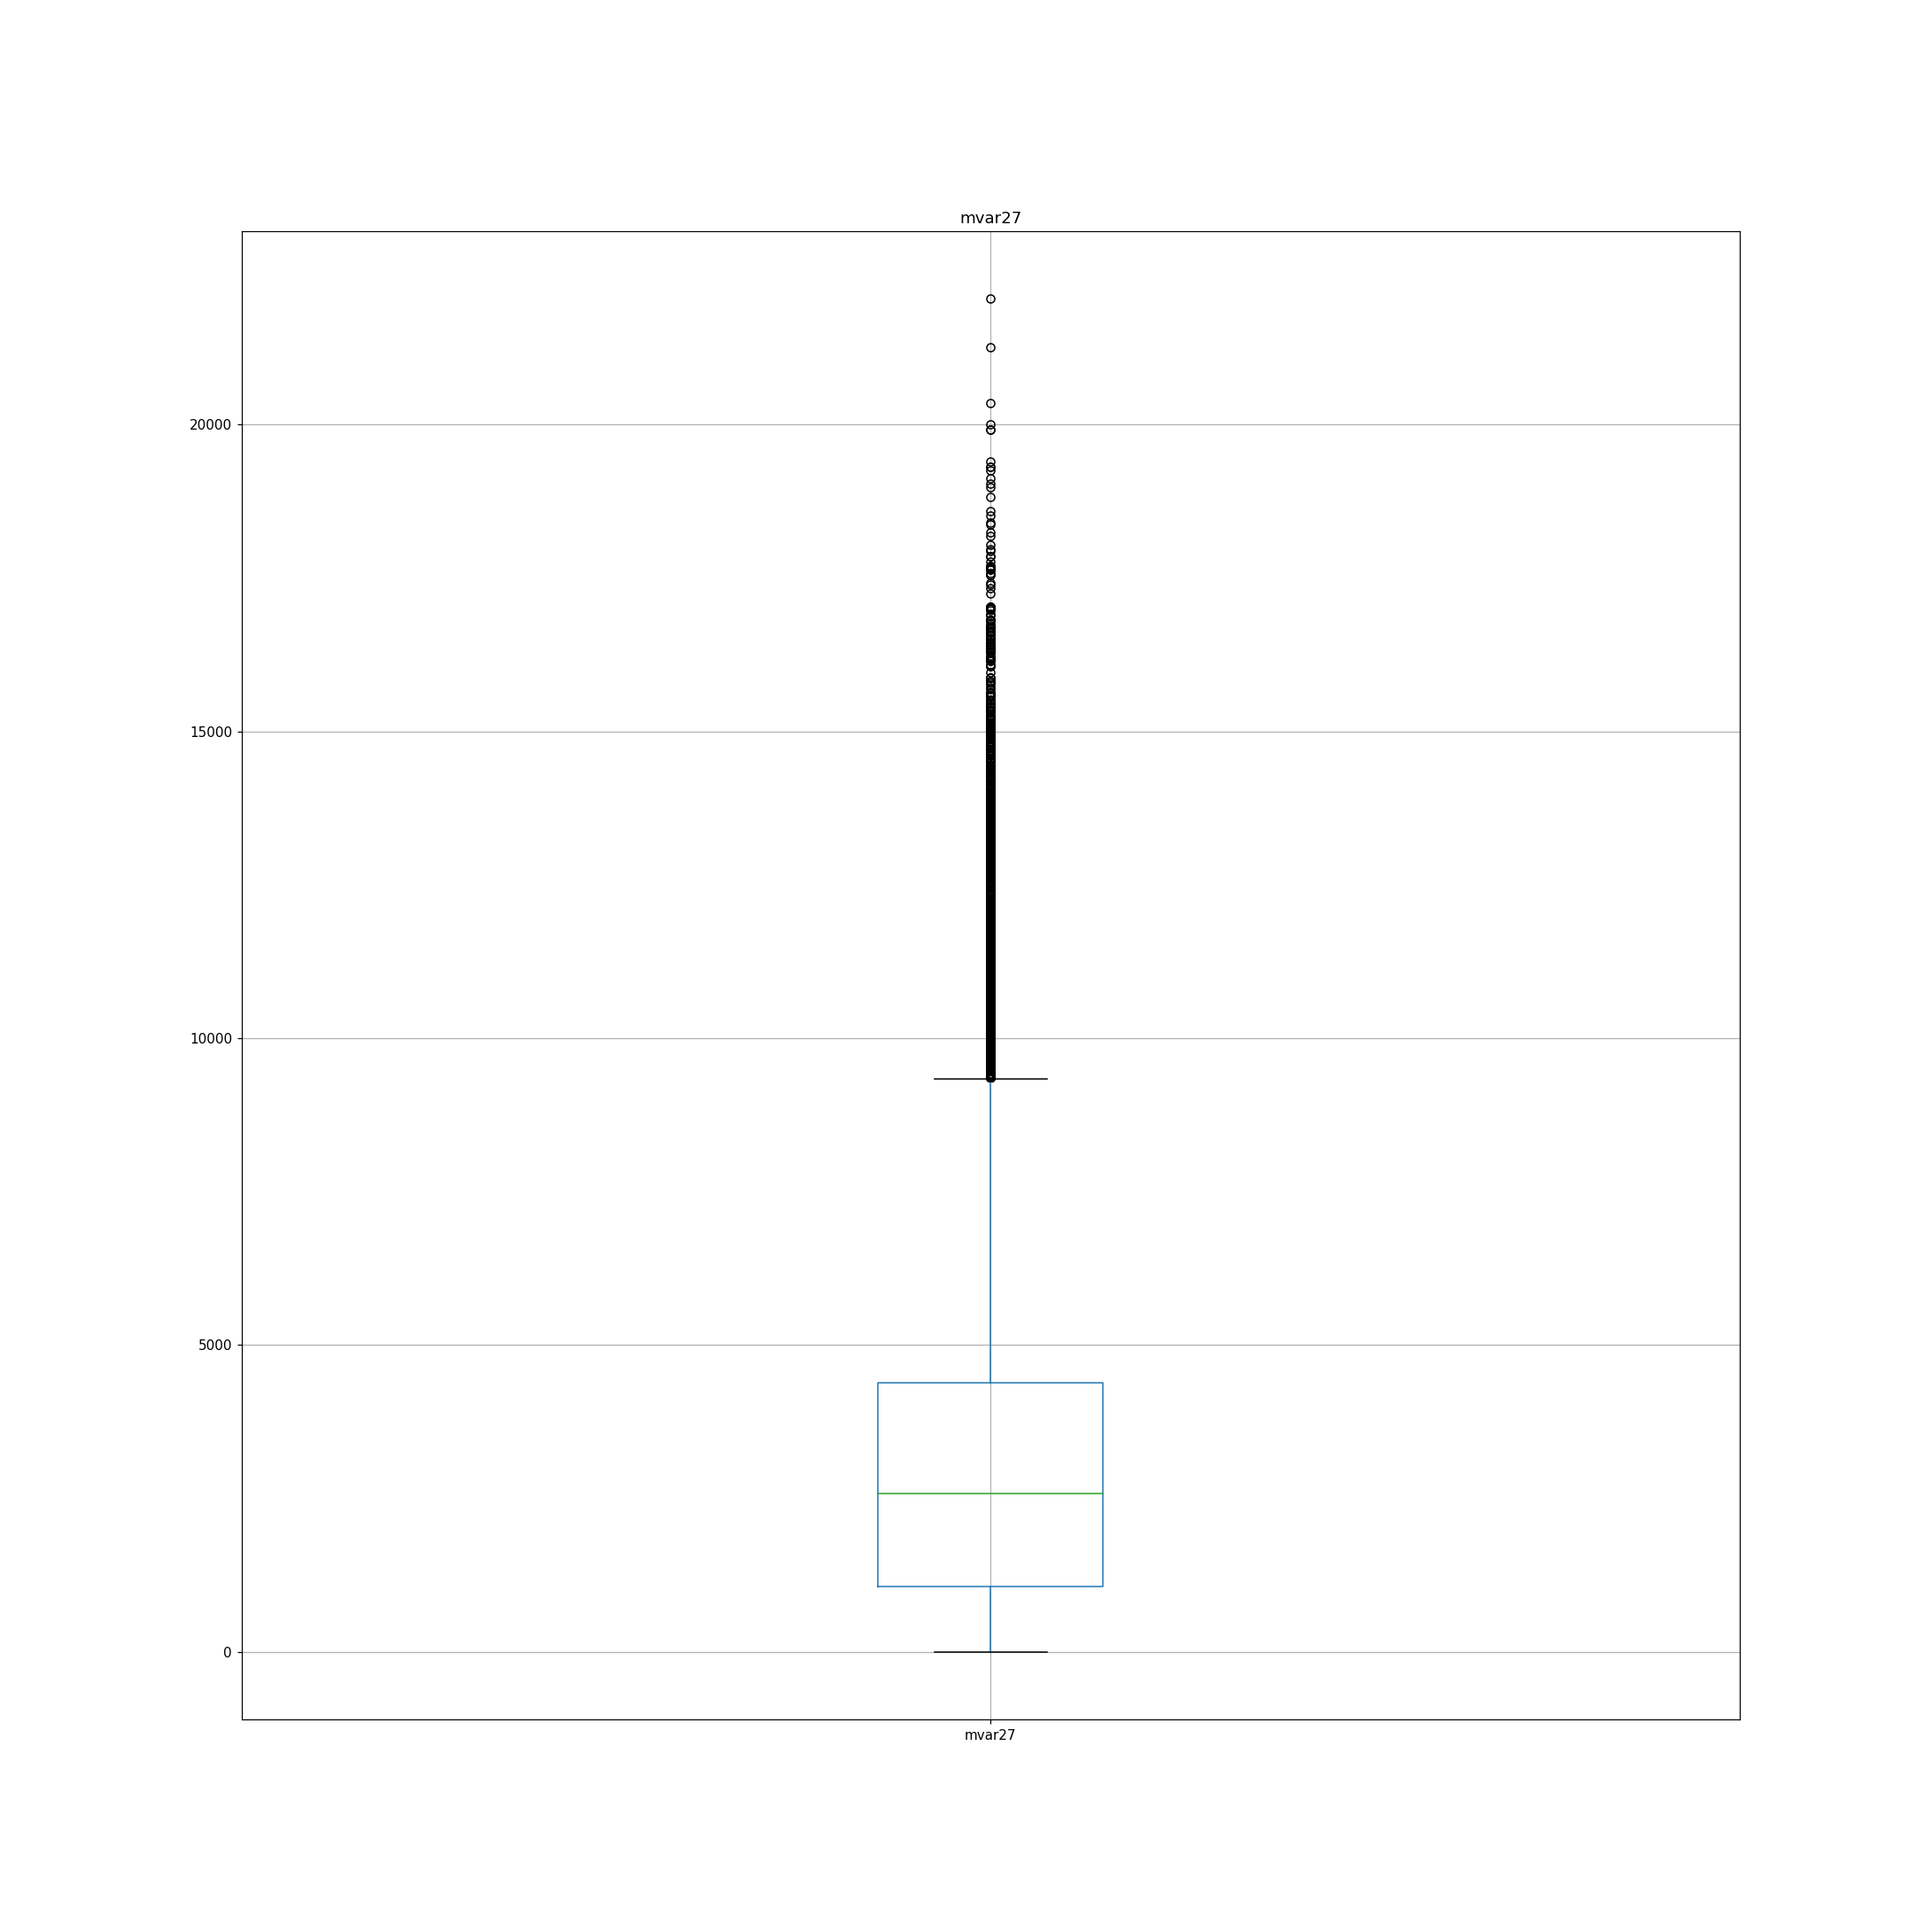

<IPython.core.display.Javascript object>


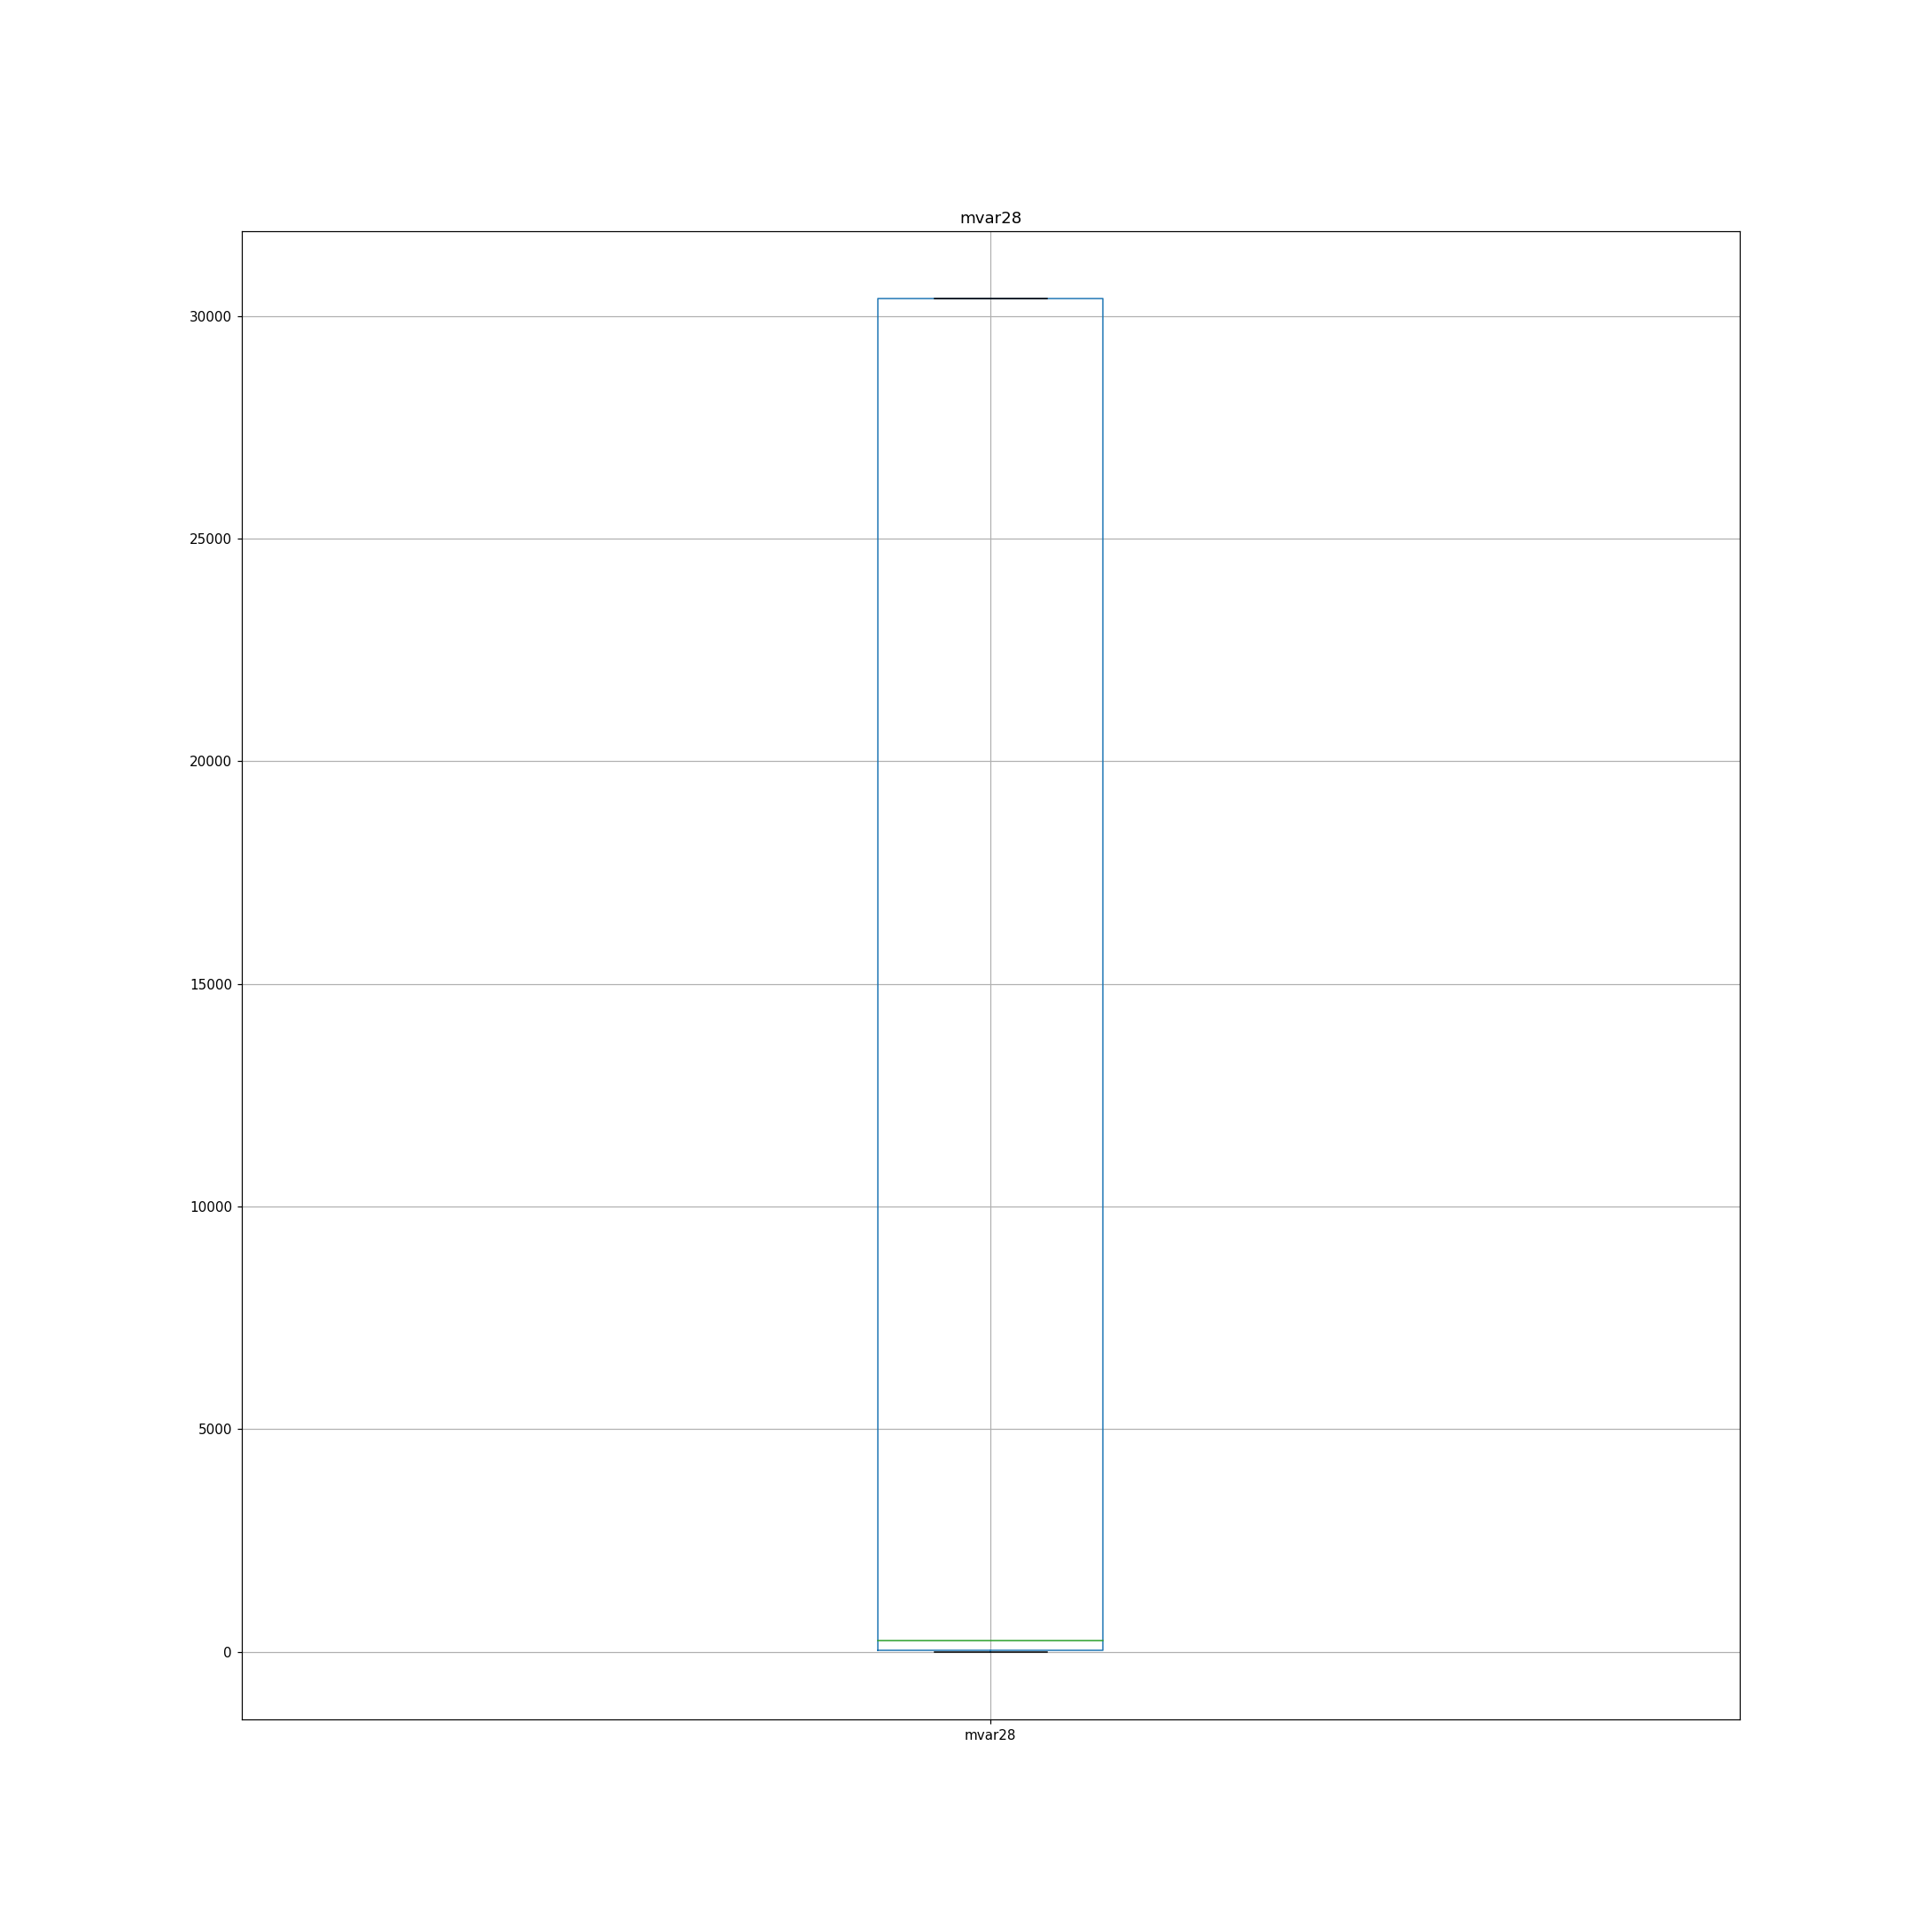

<IPython.core.display.Javascript object>


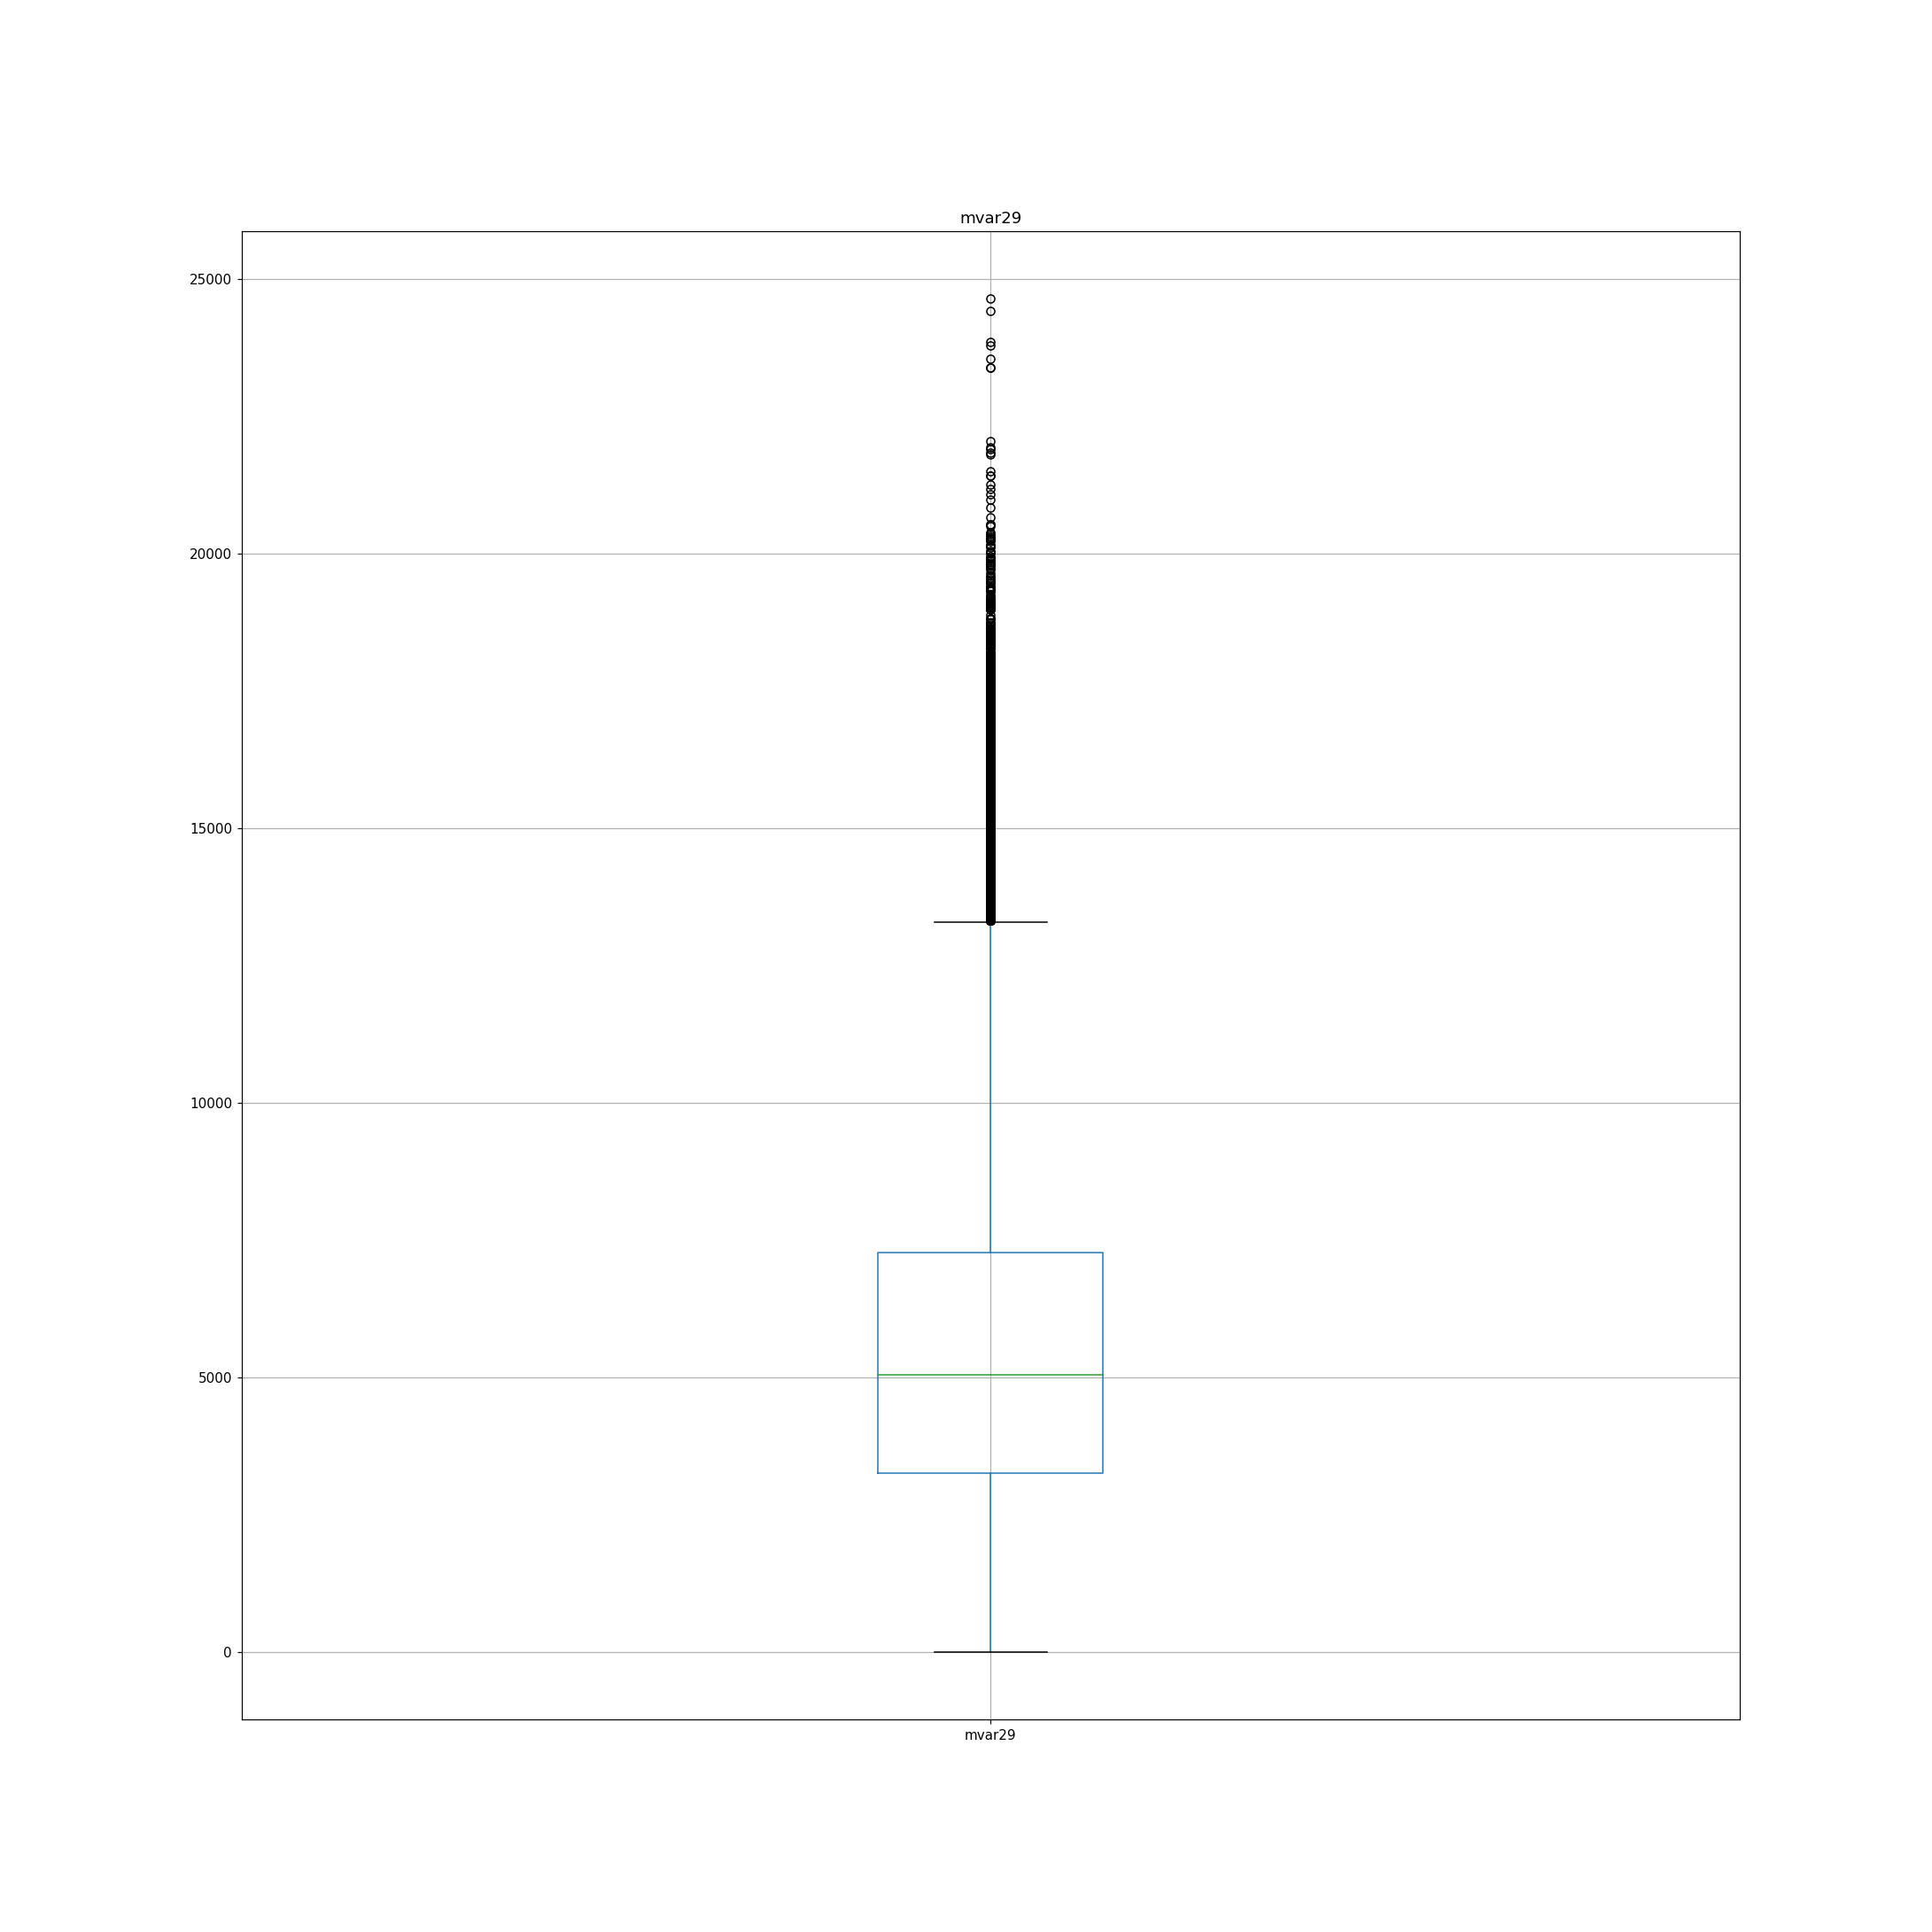

<IPython.core.display.Javascript object>


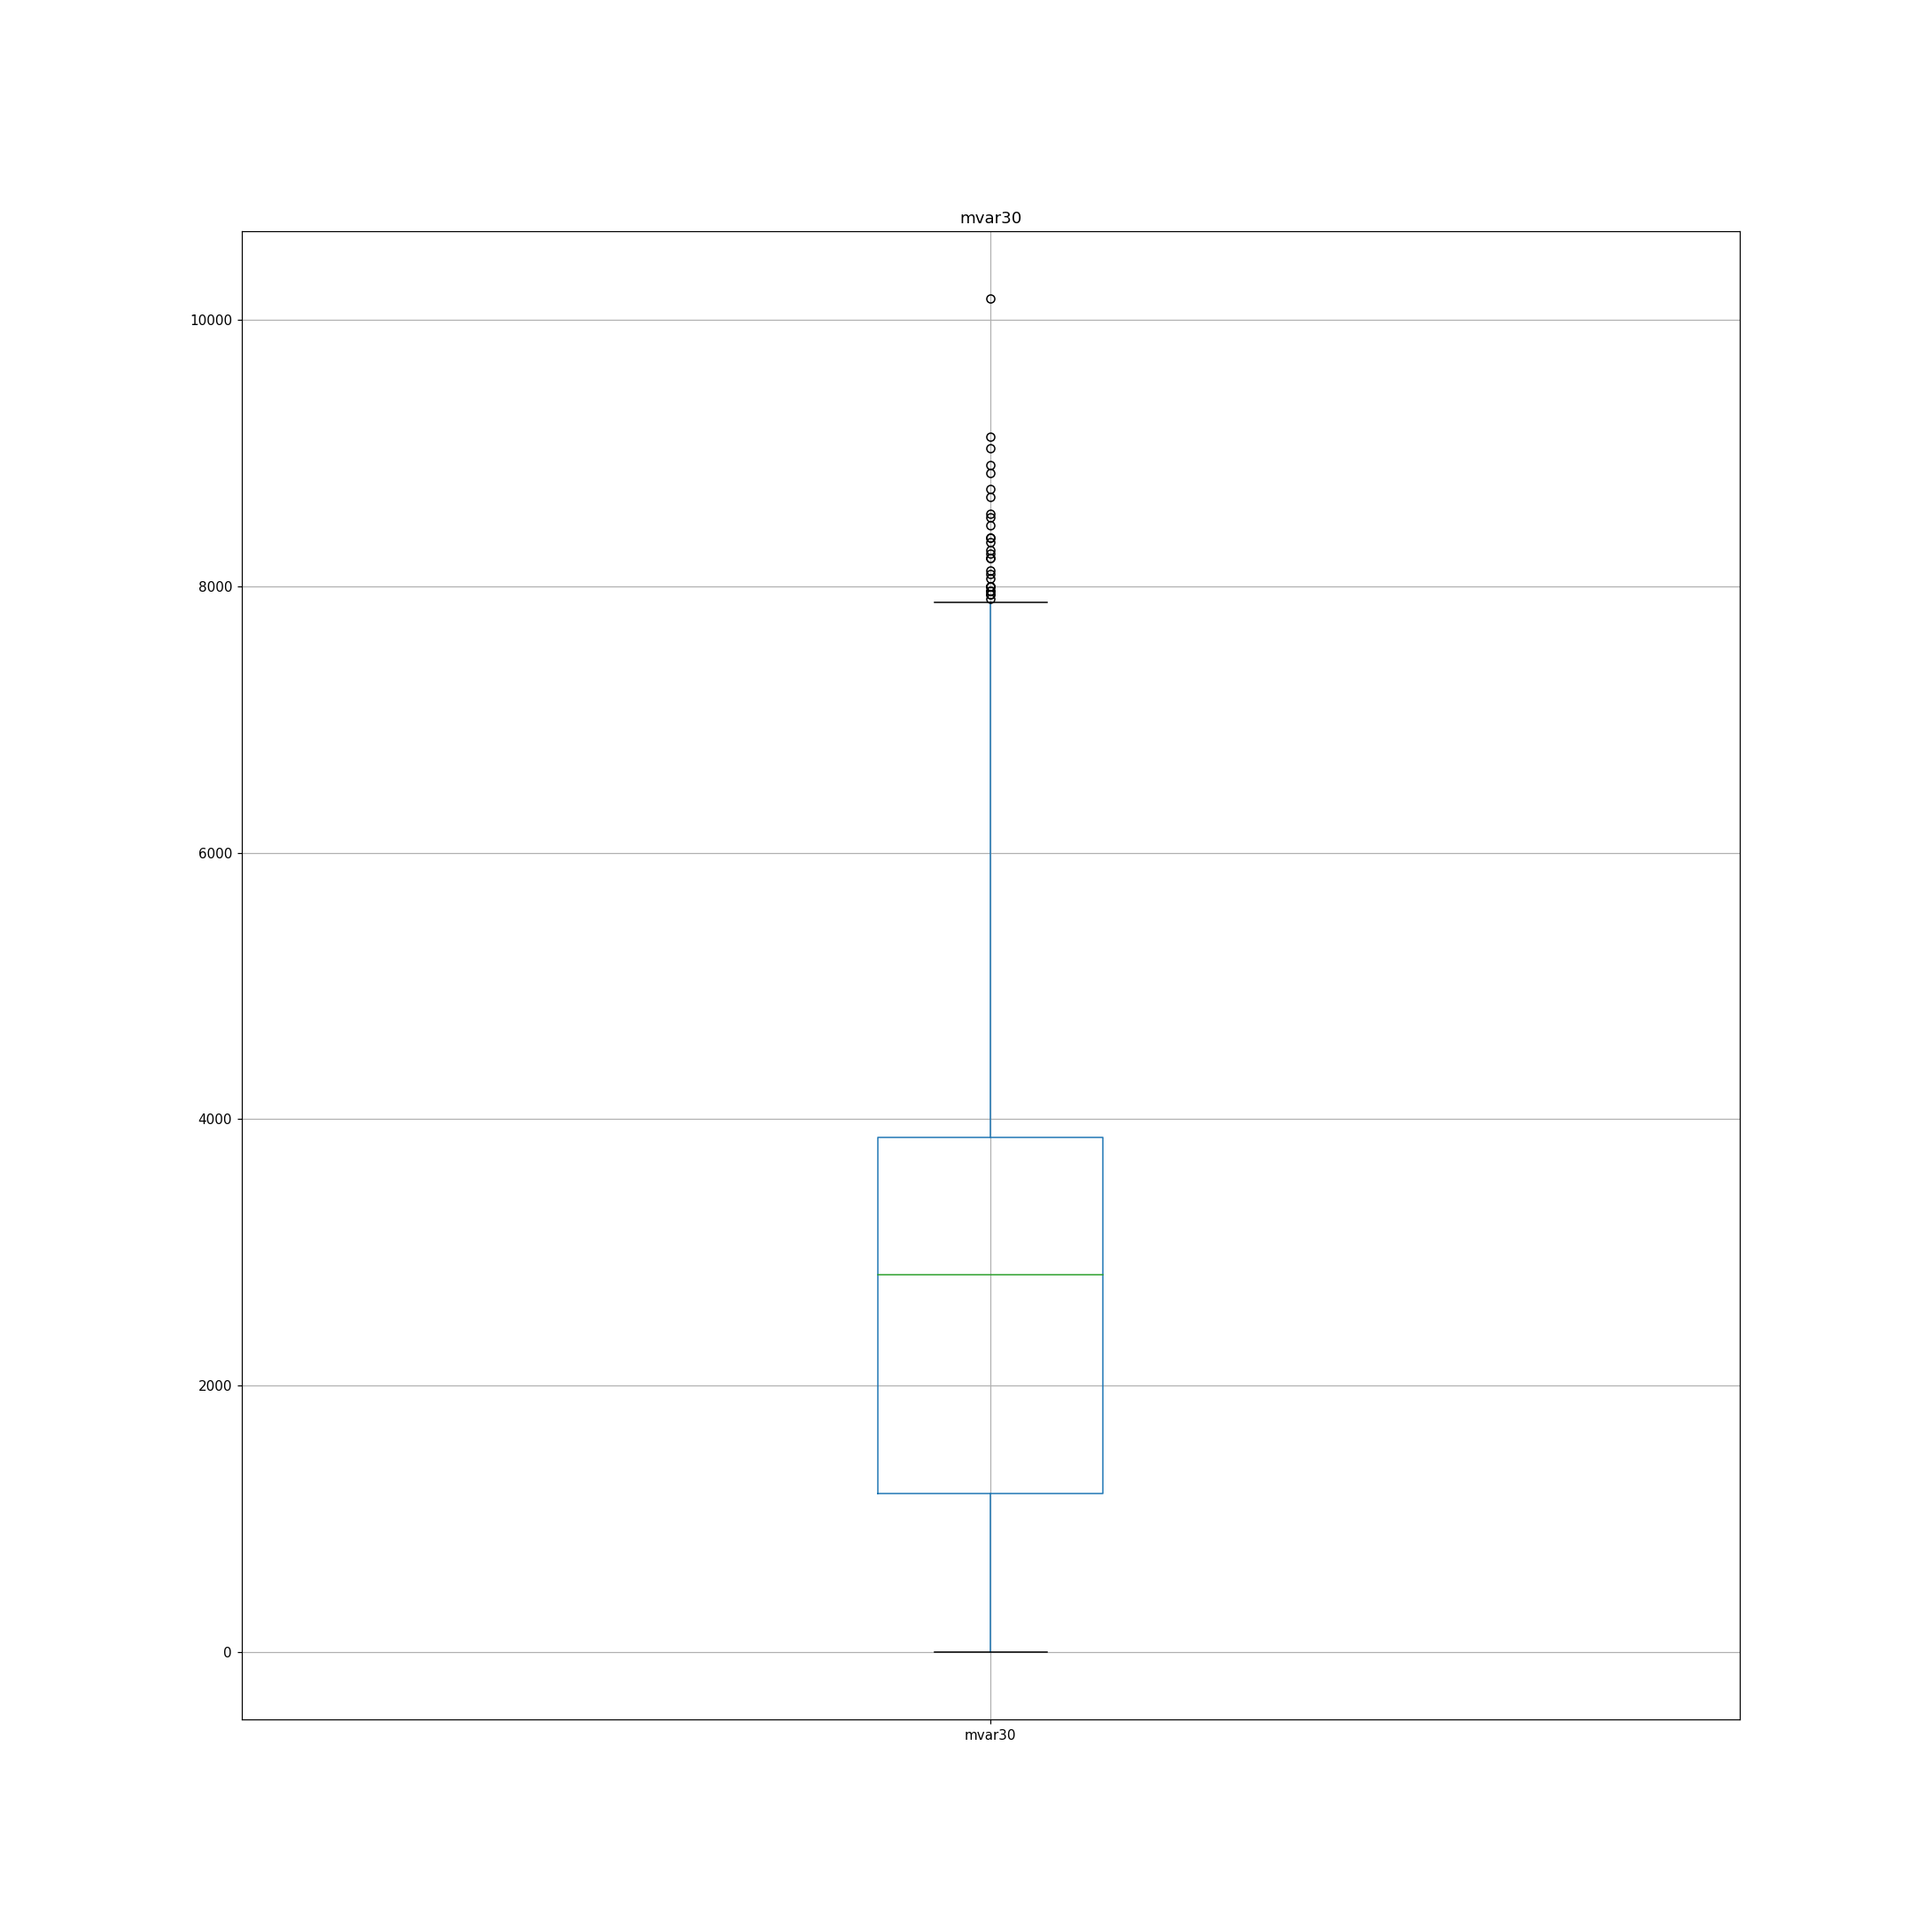

<IPython.core.display.Javascript object>


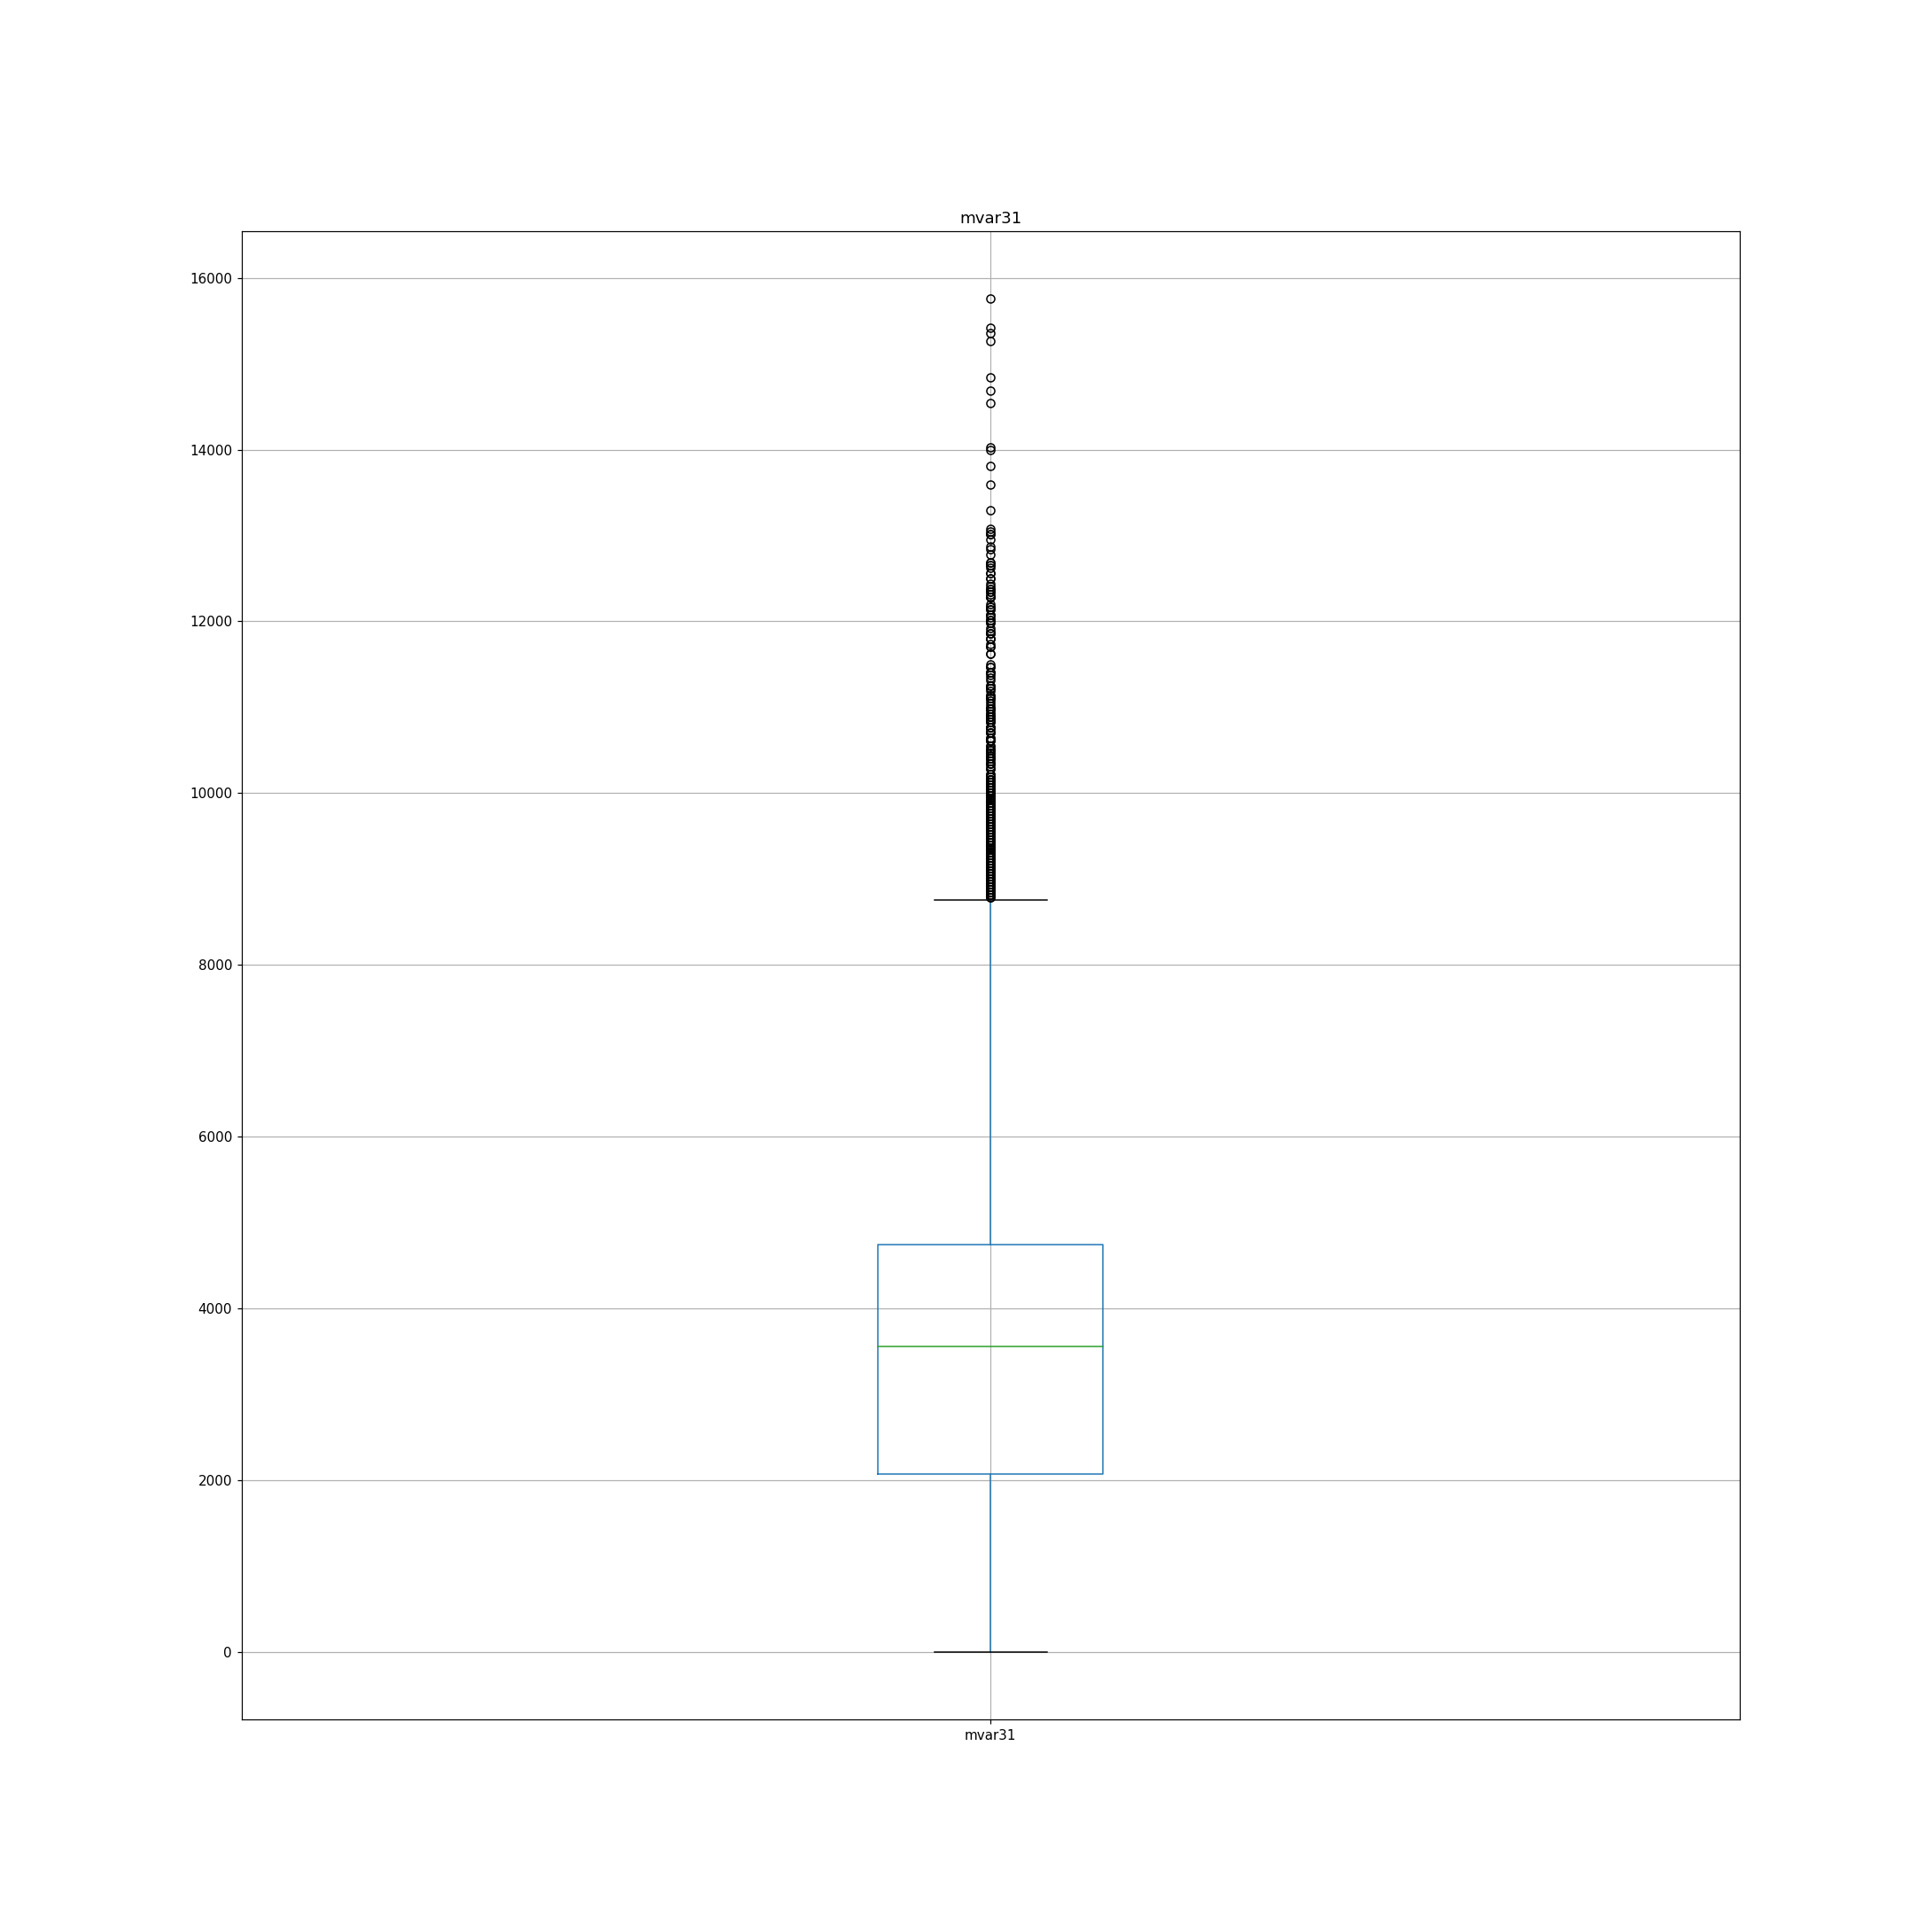

<IPython.core.display.Javascript object>


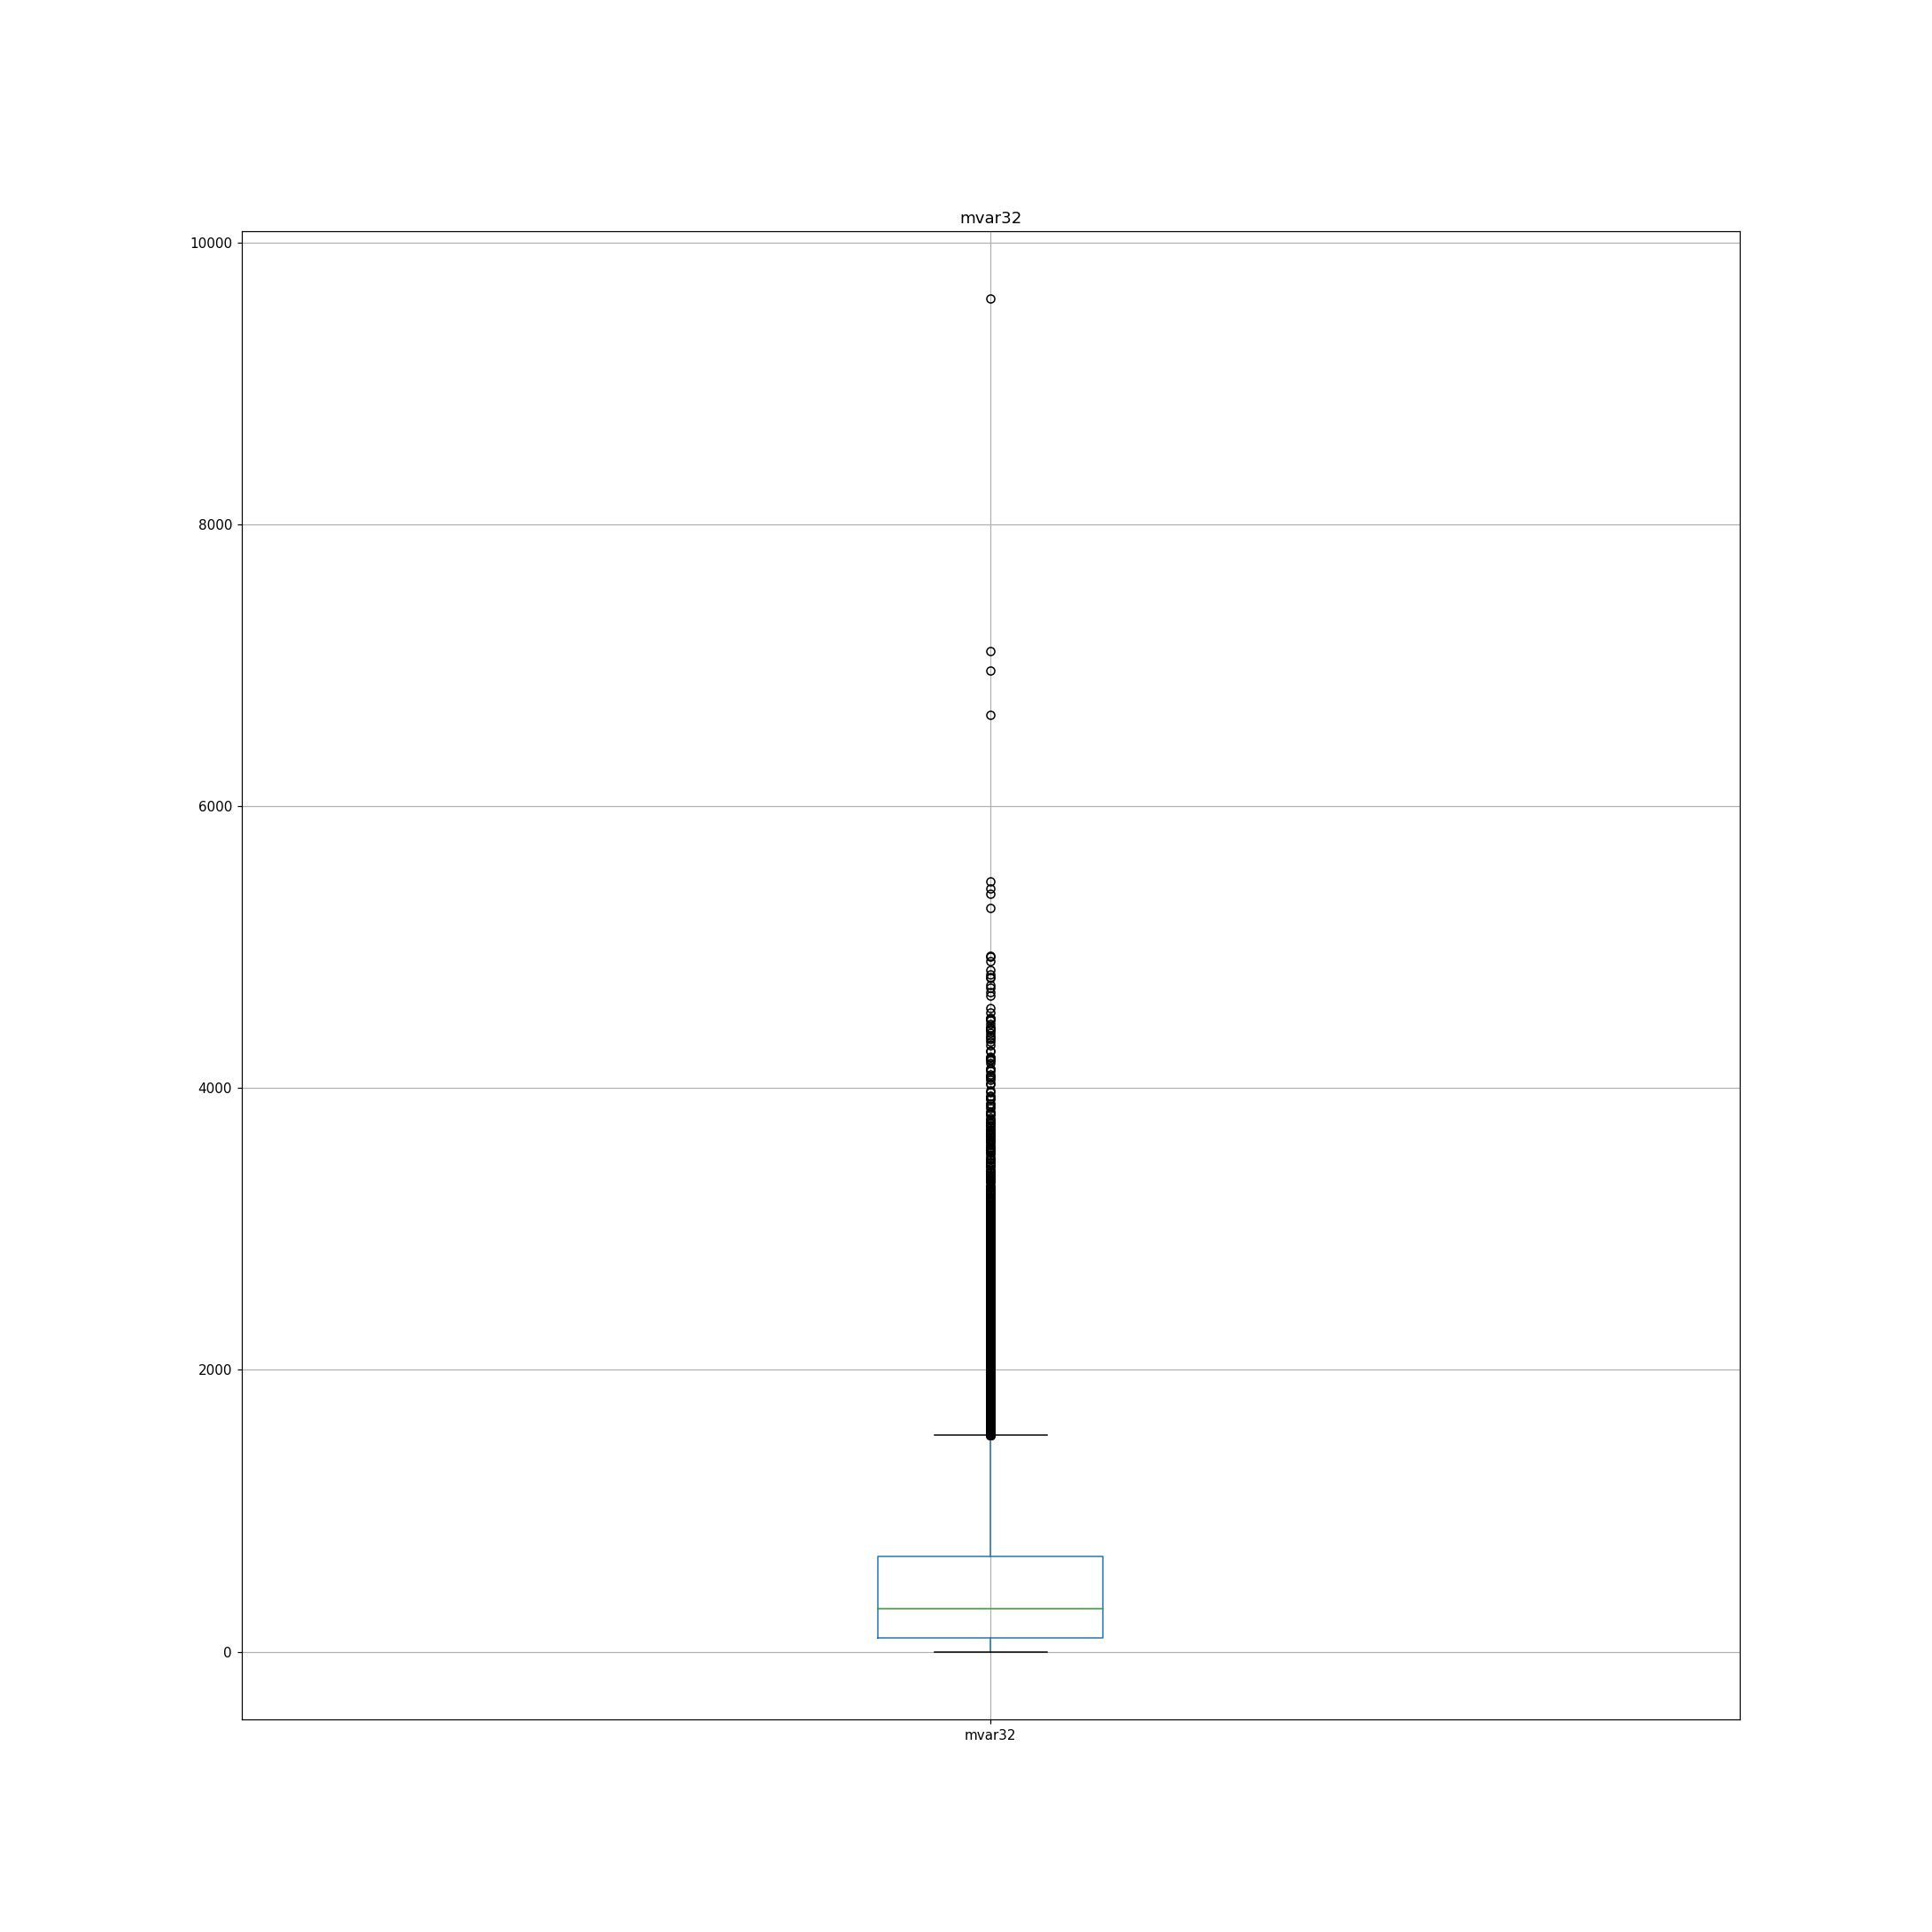

<IPython.core.display.Javascript object>


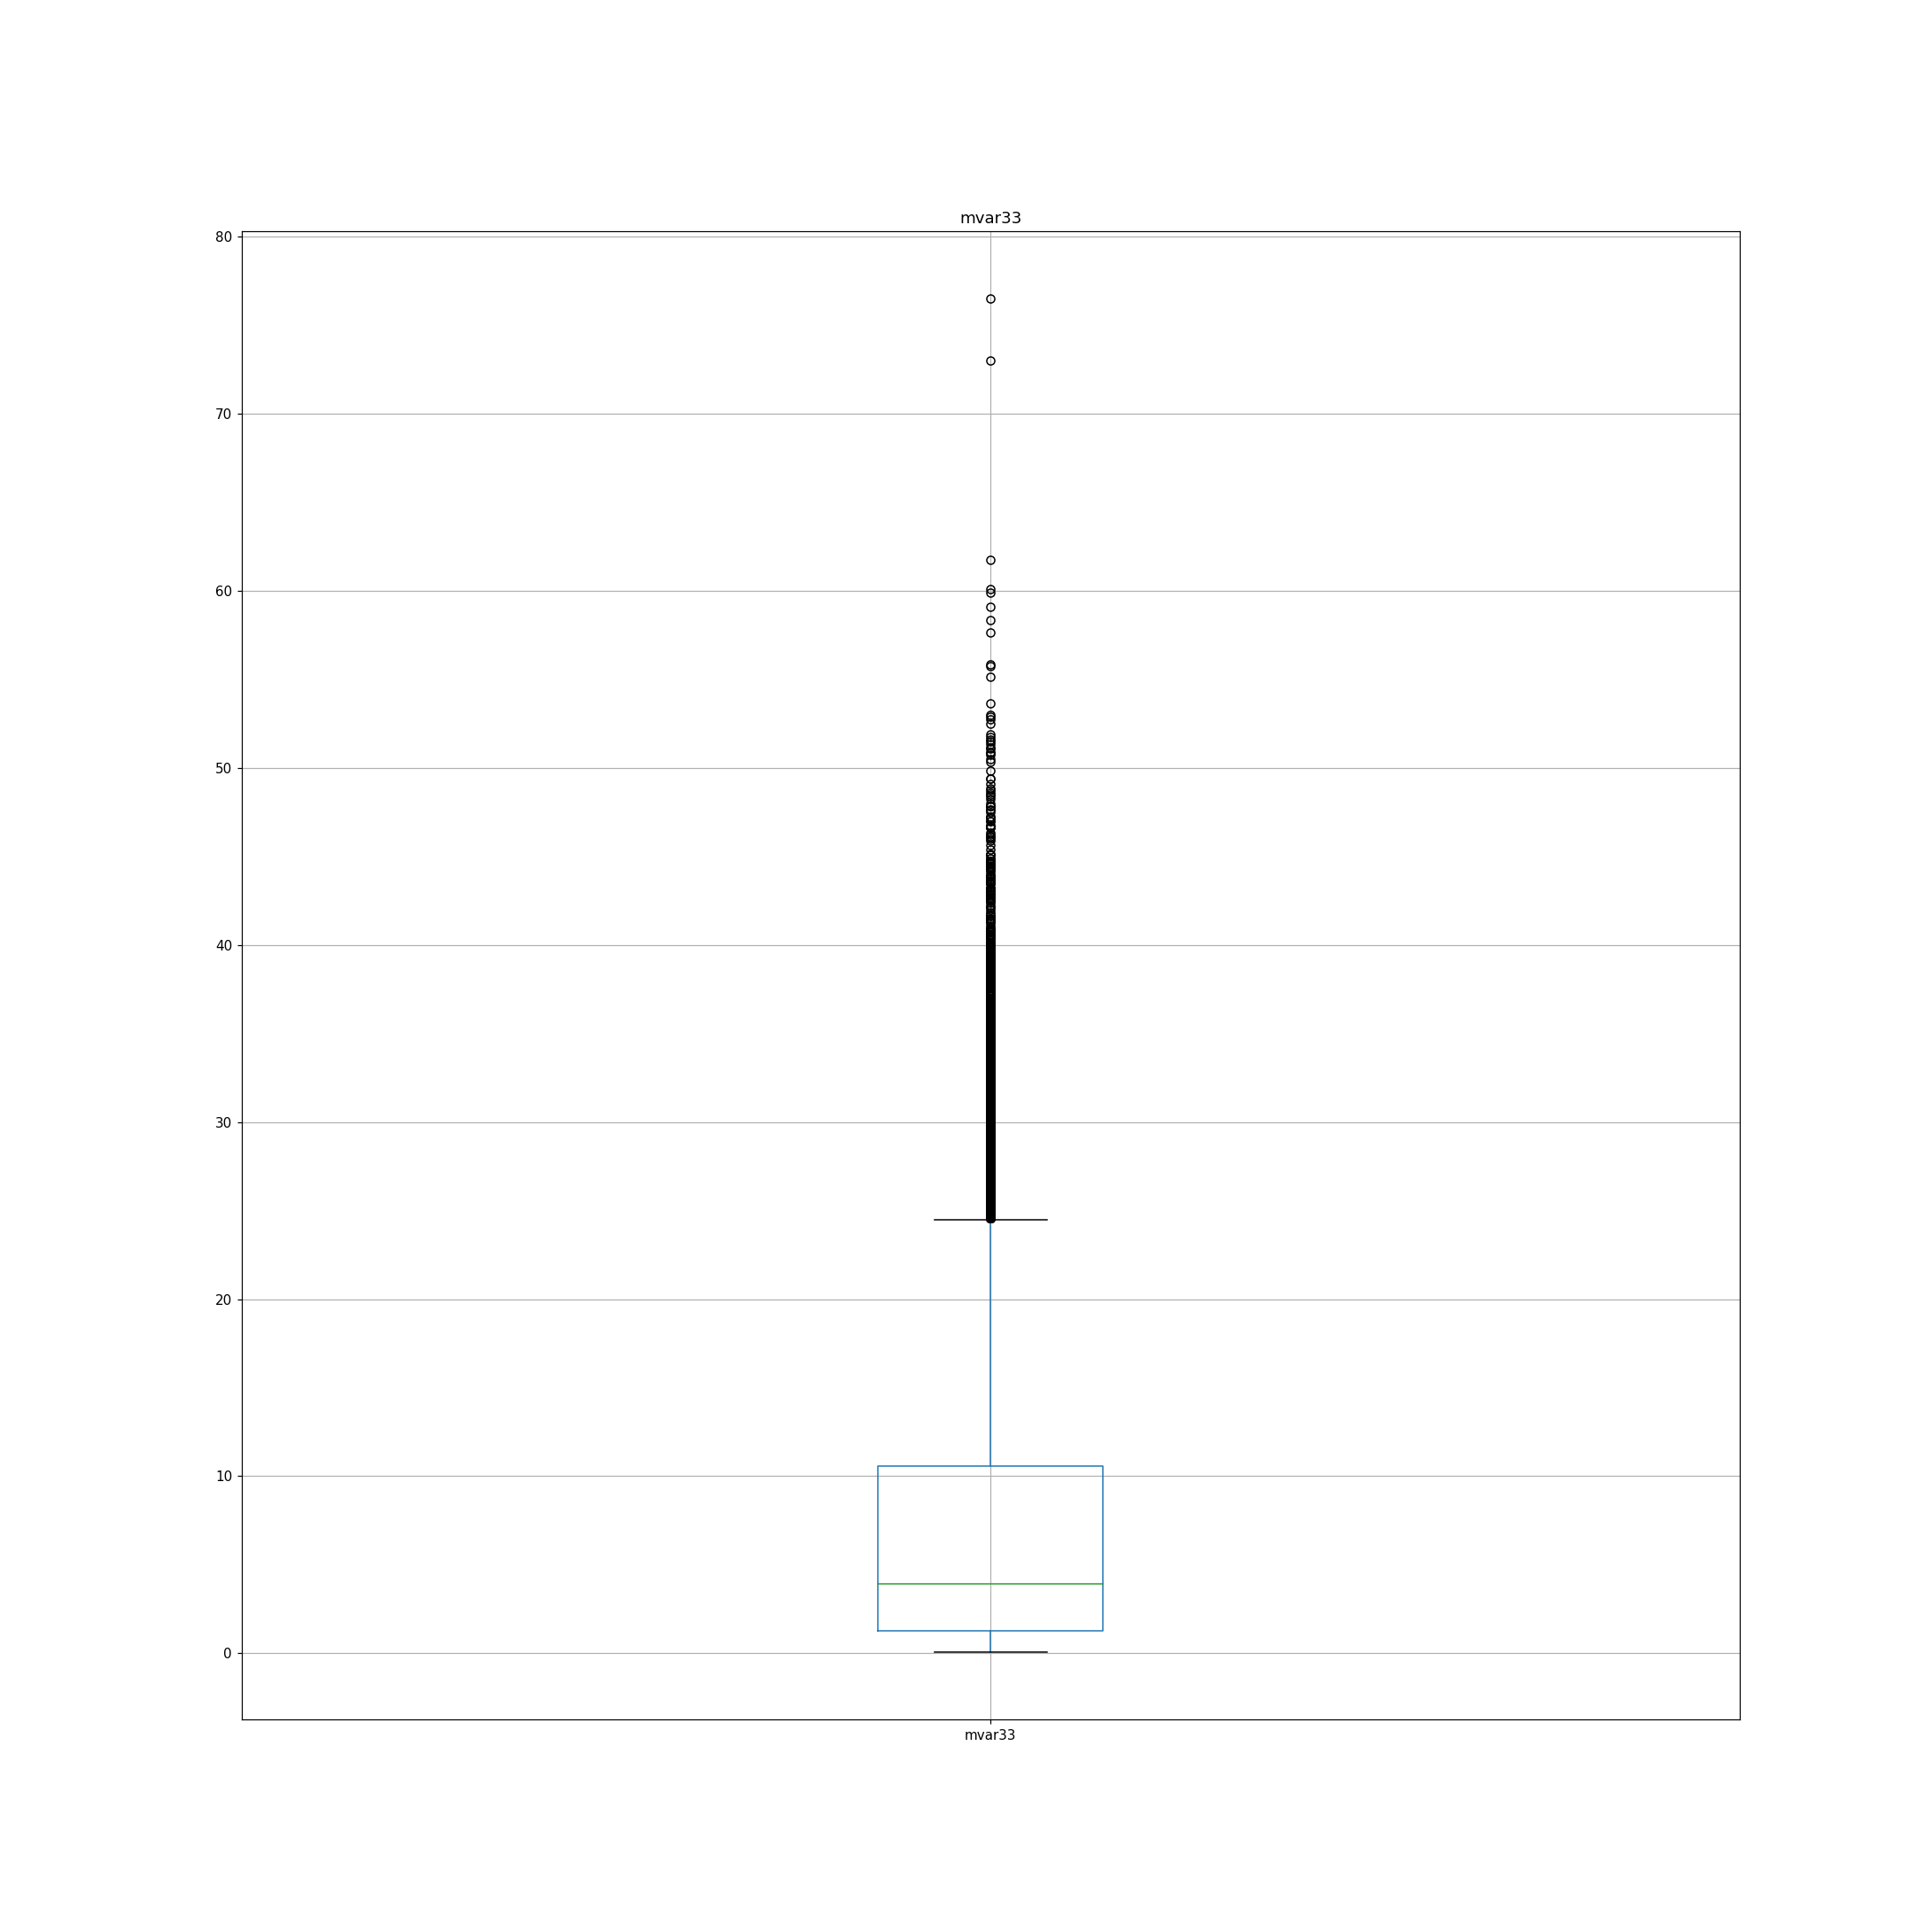

<IPython.core.display.Javascript object>


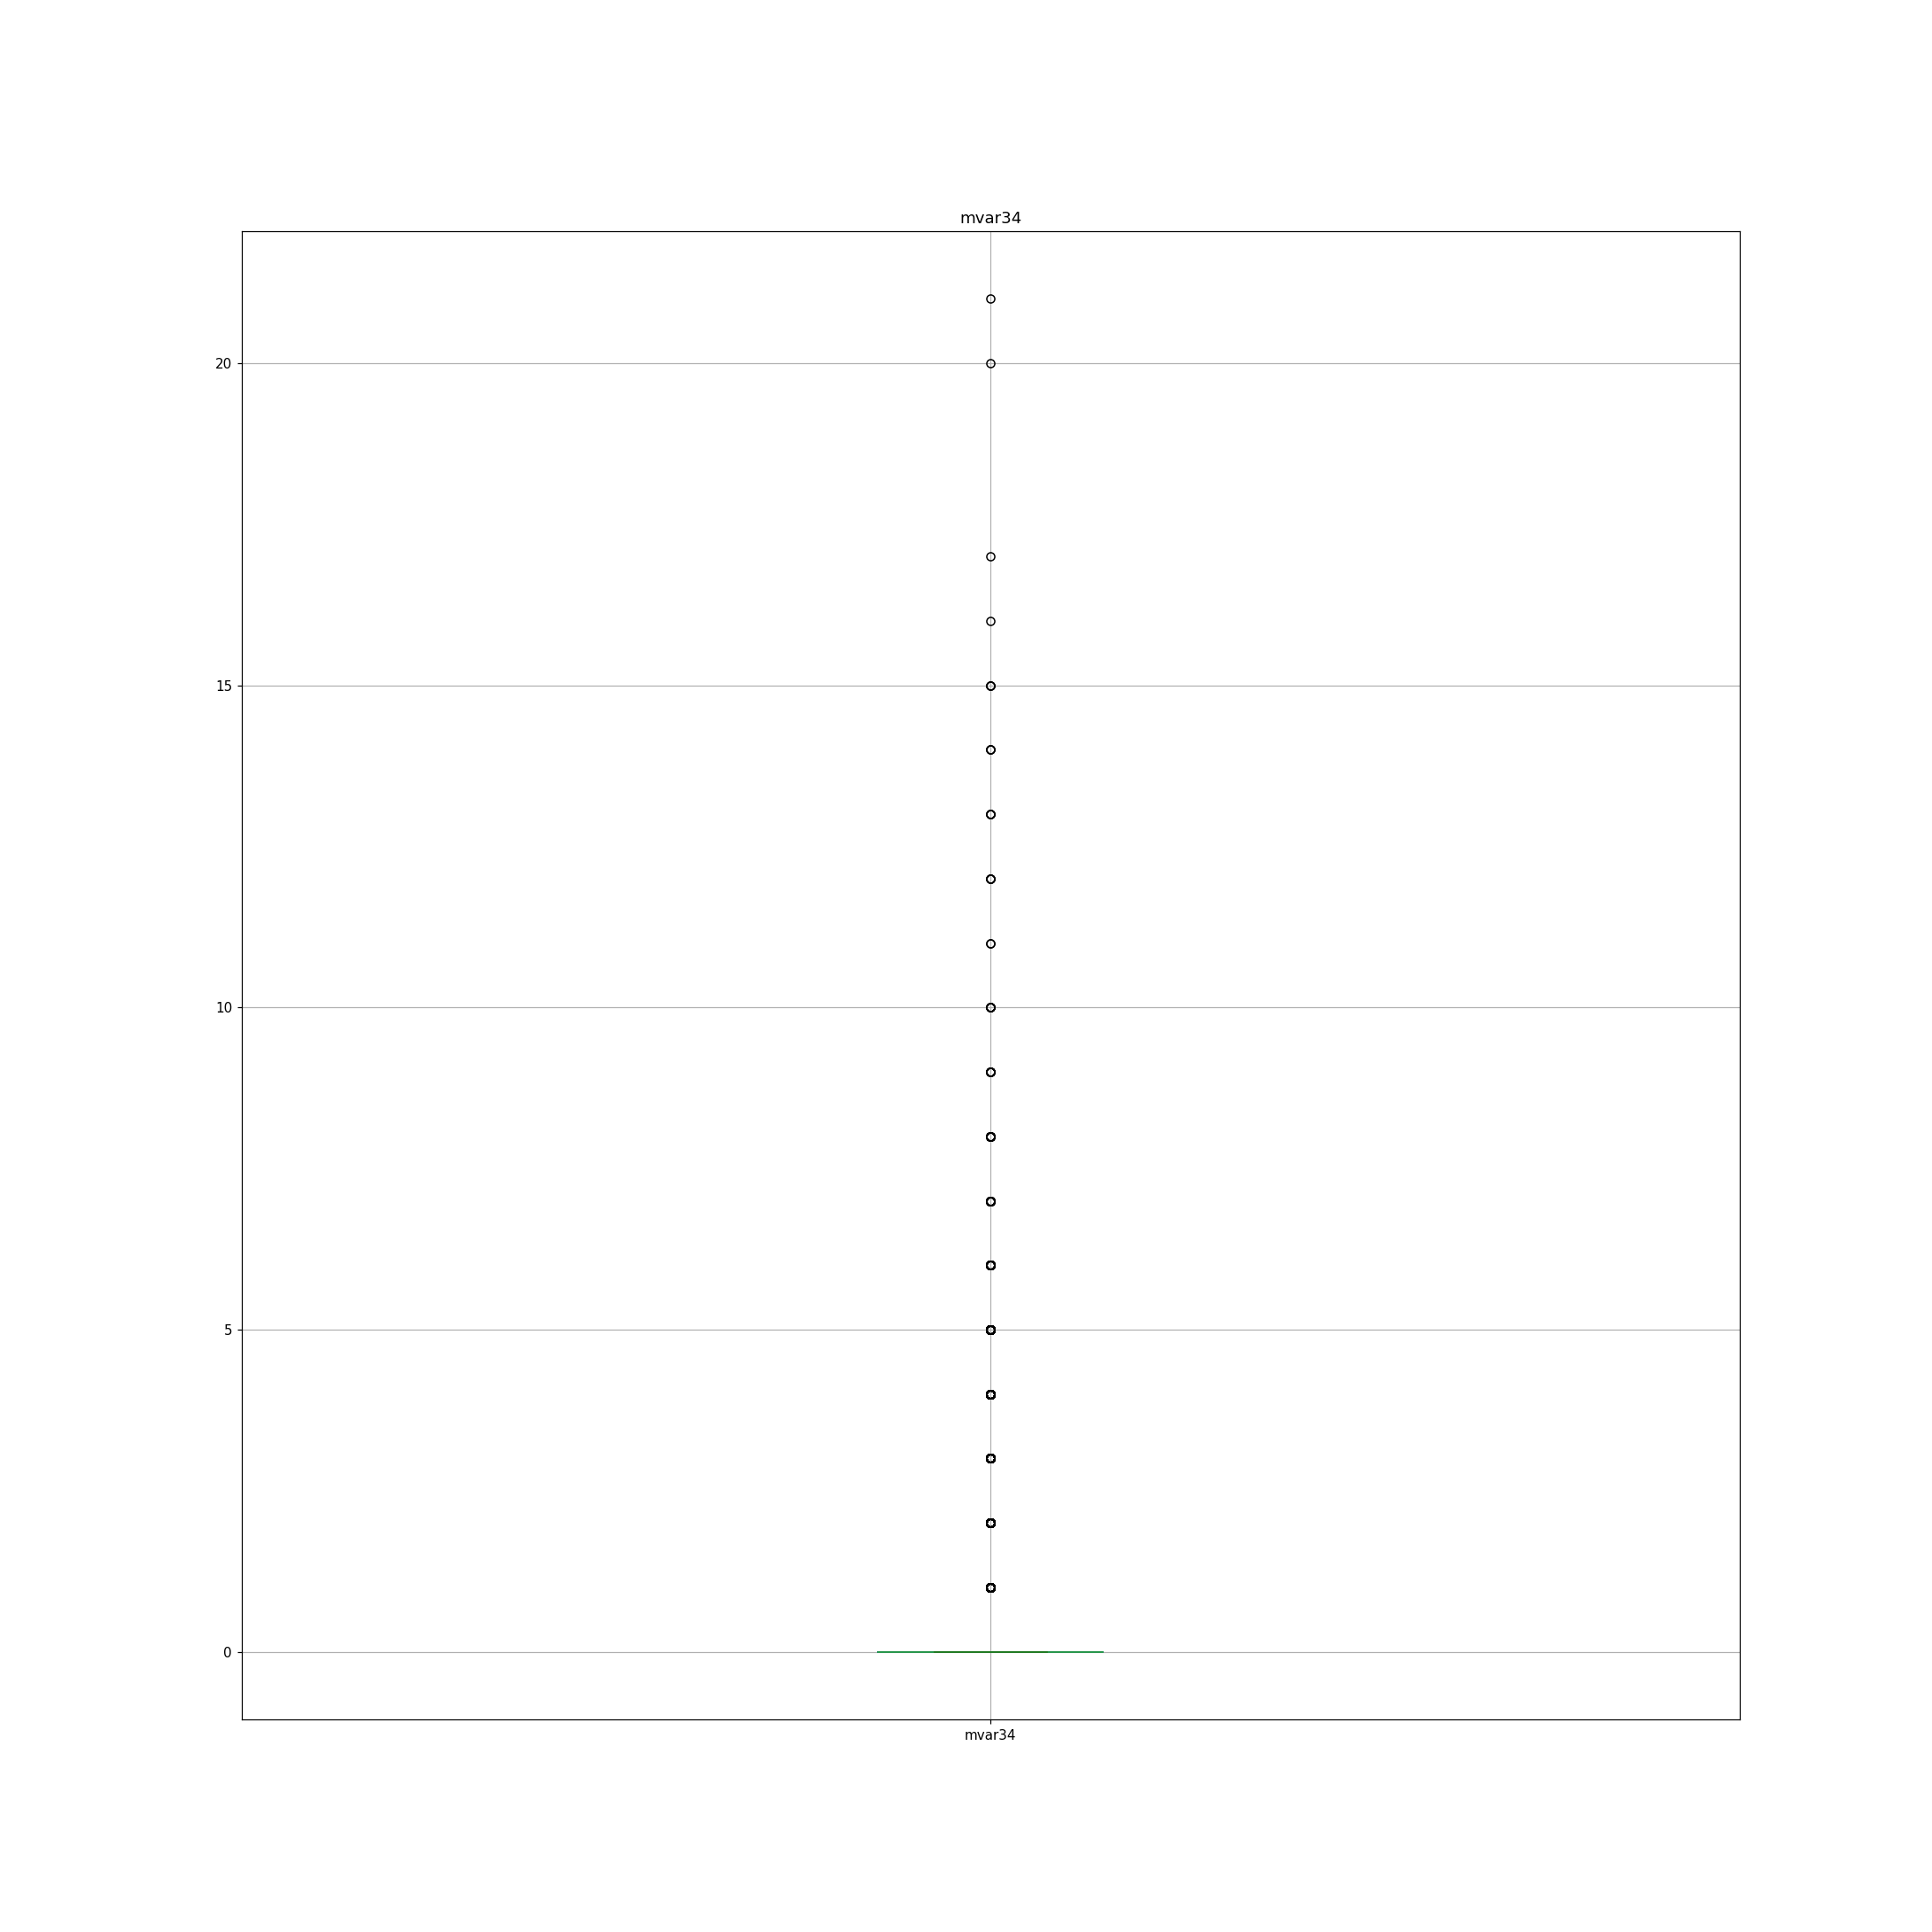

<IPython.core.display.Javascript object>


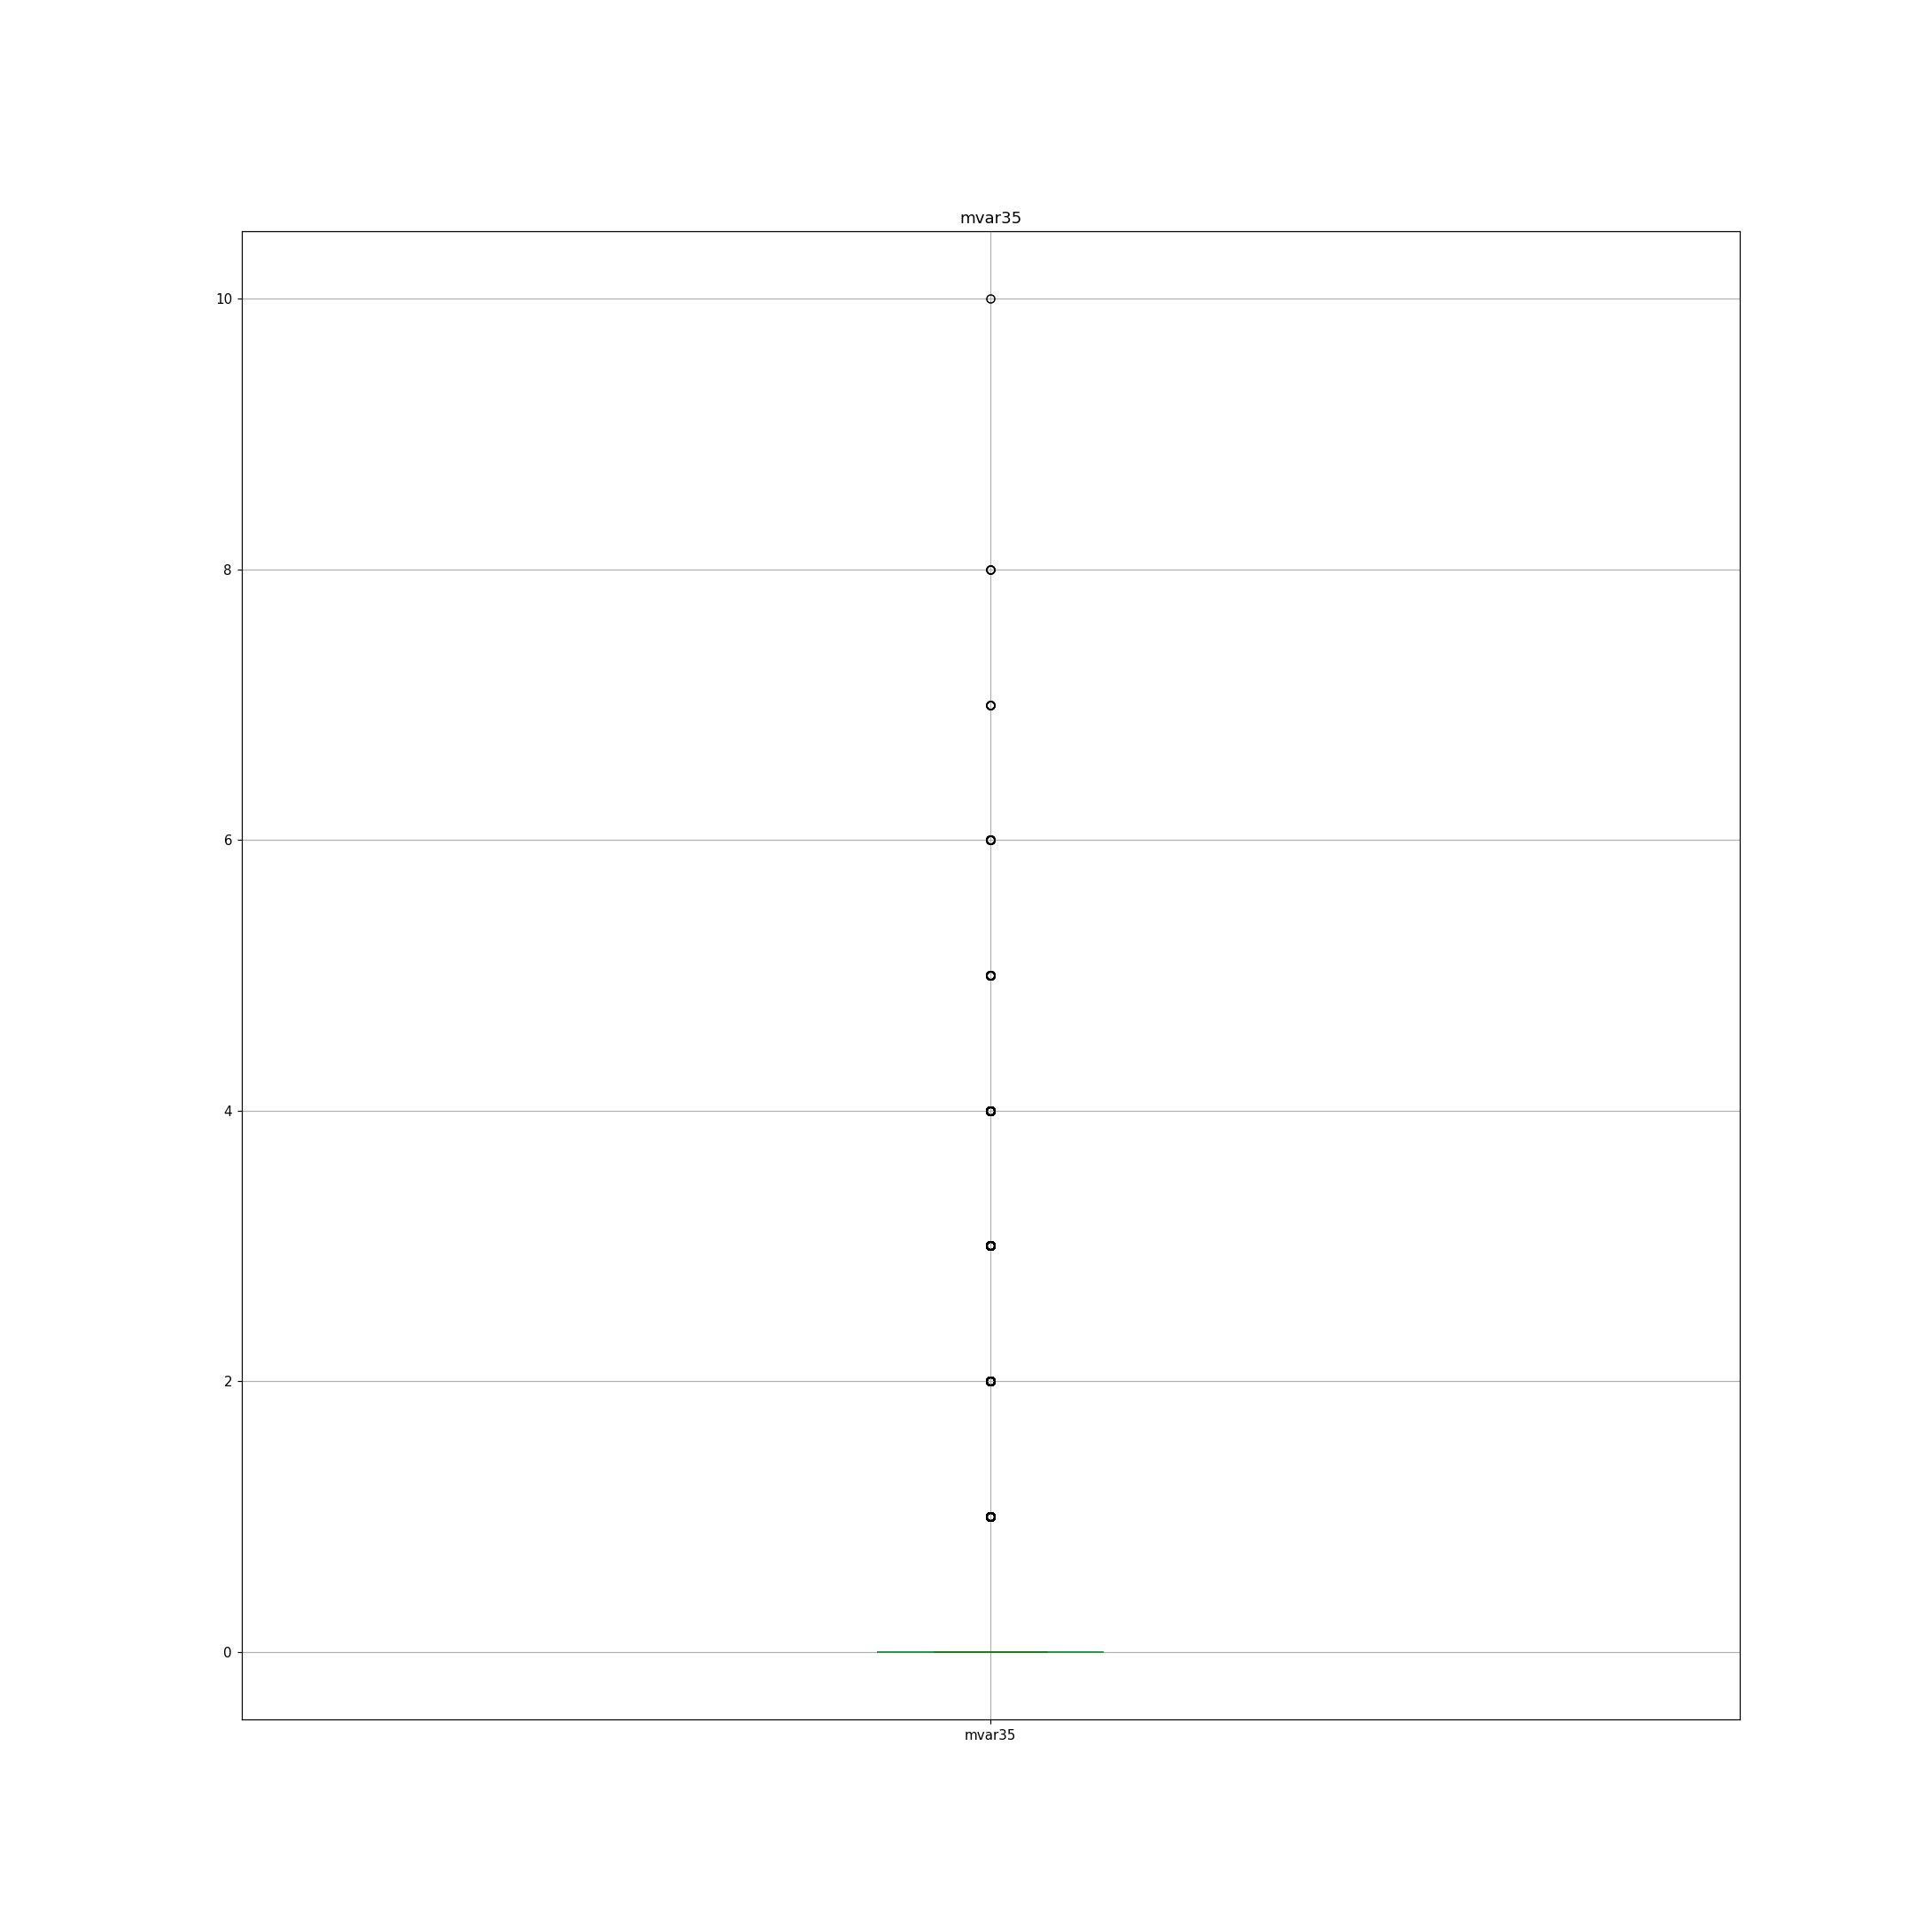

<IPython.core.display.Javascript object>


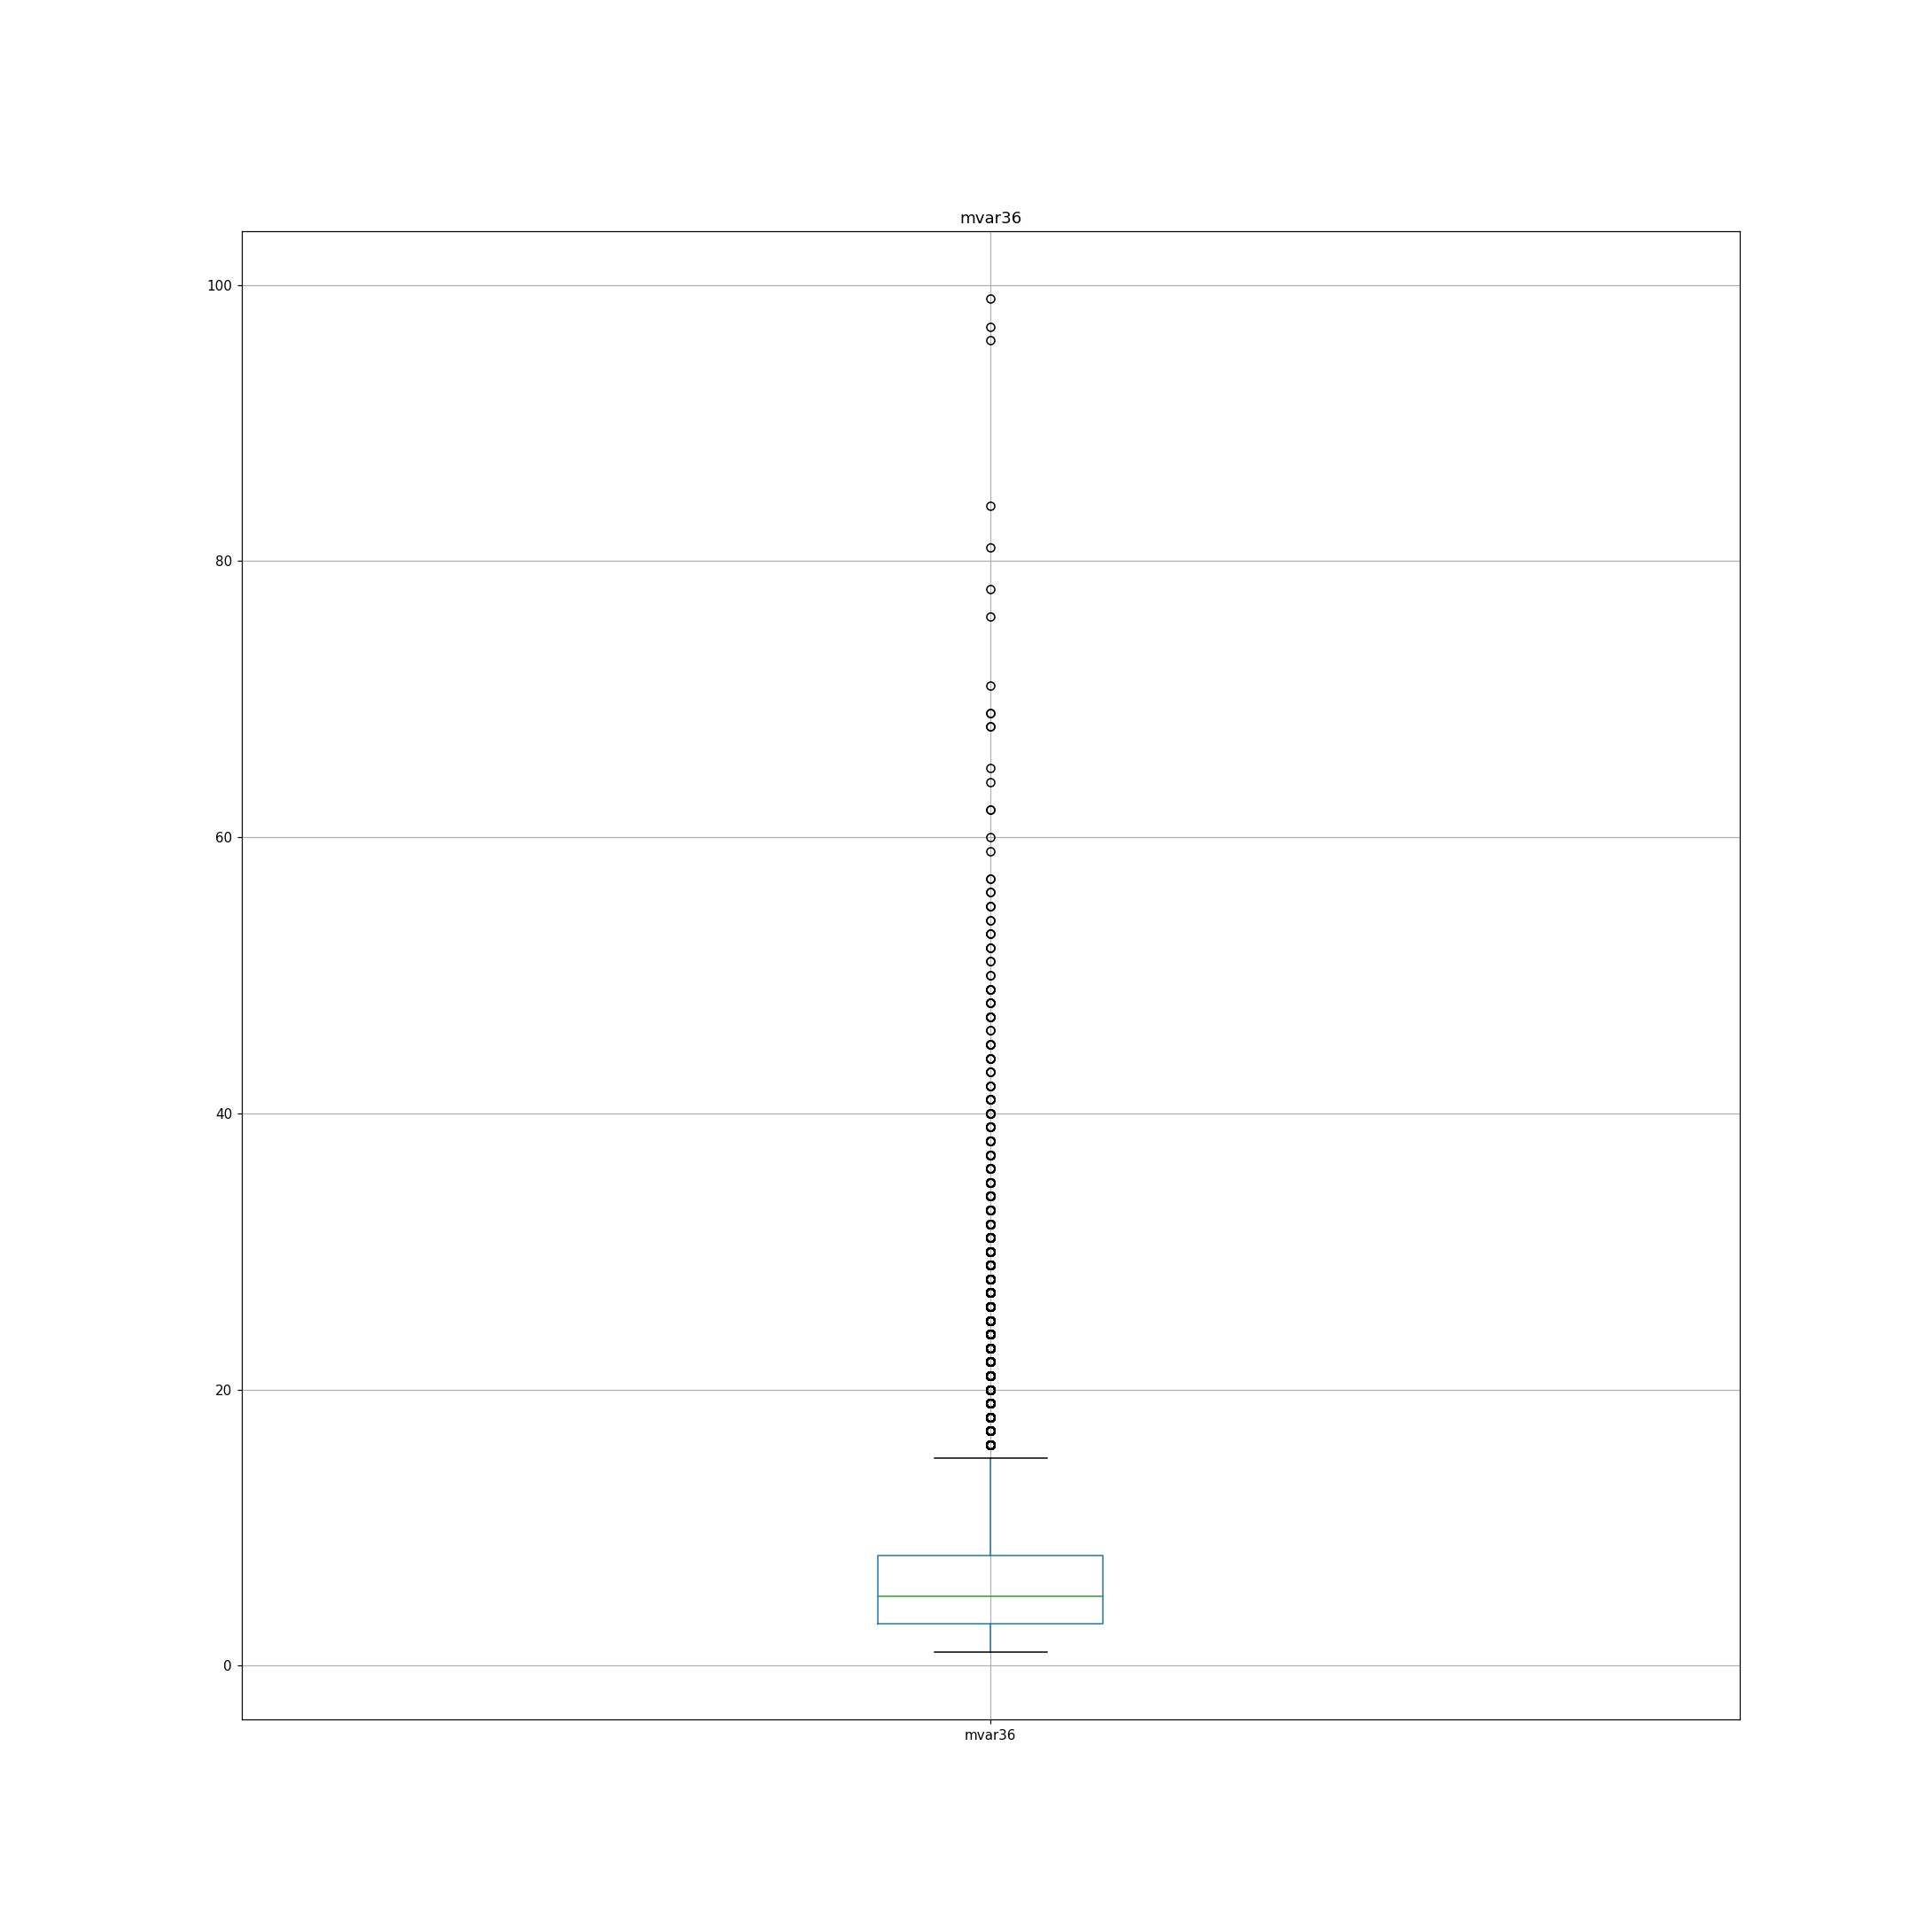

<IPython.core.display.Javascript object>


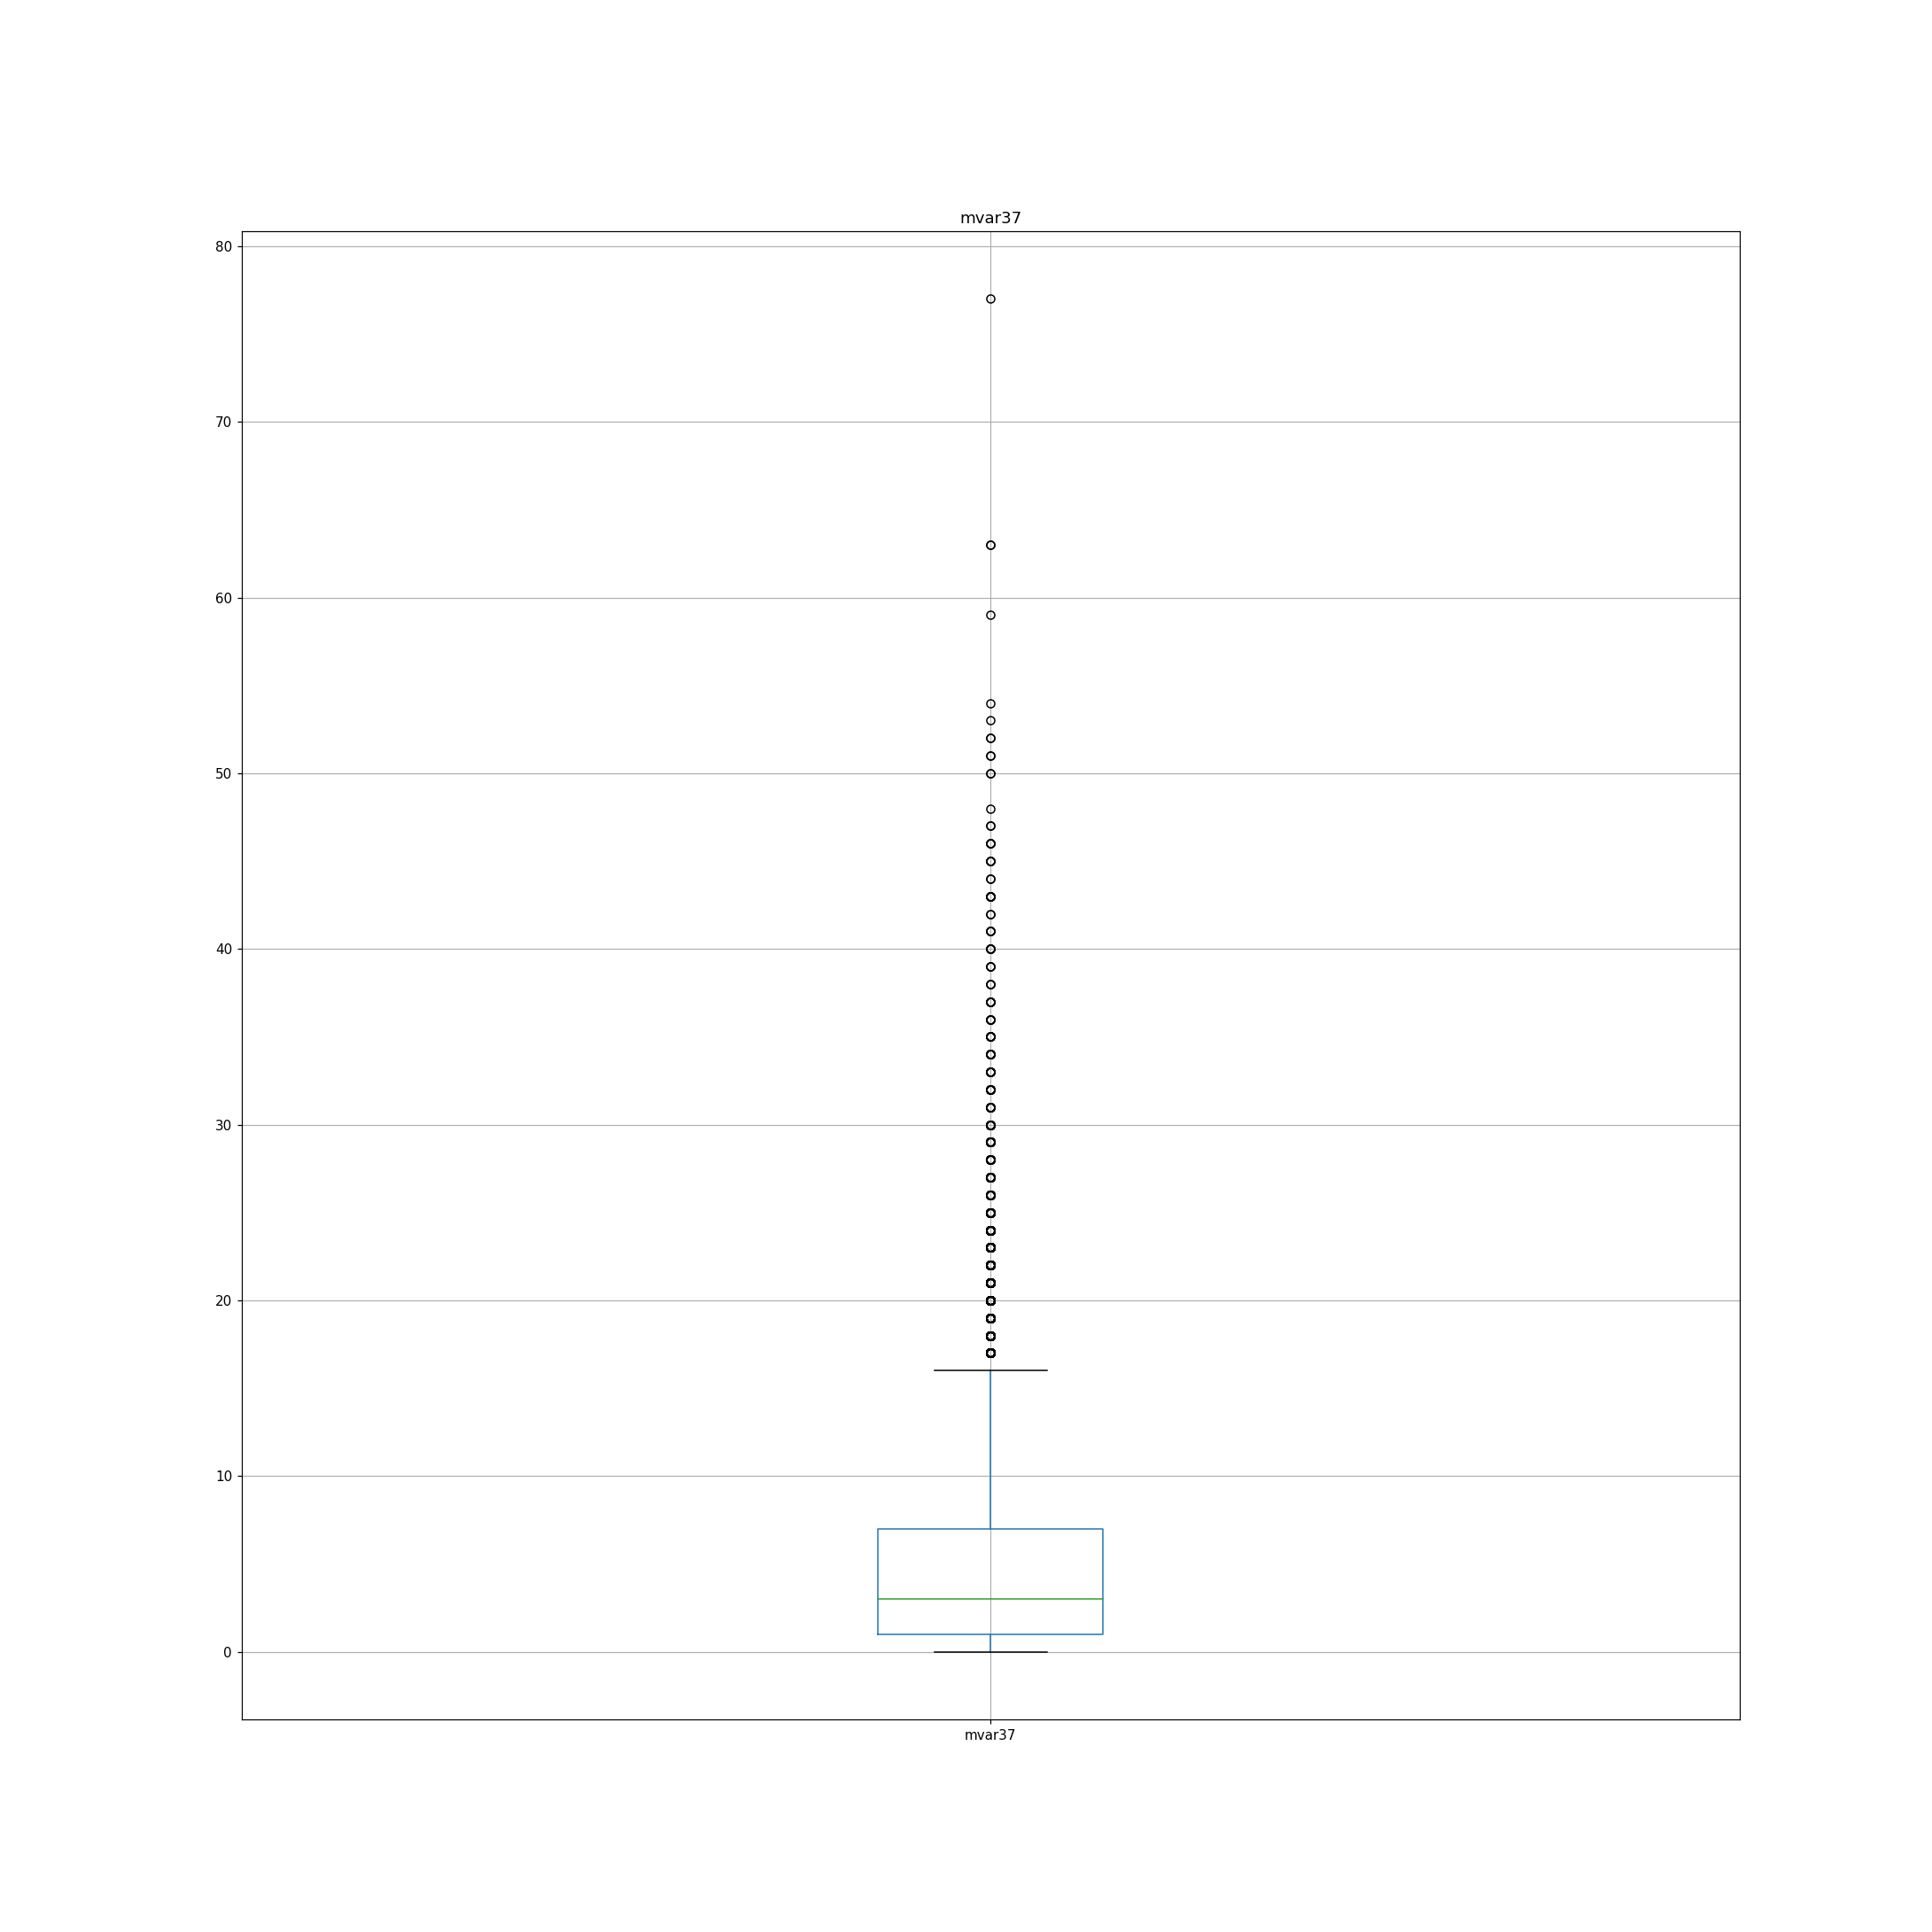

<IPython.core.display.Javascript object>


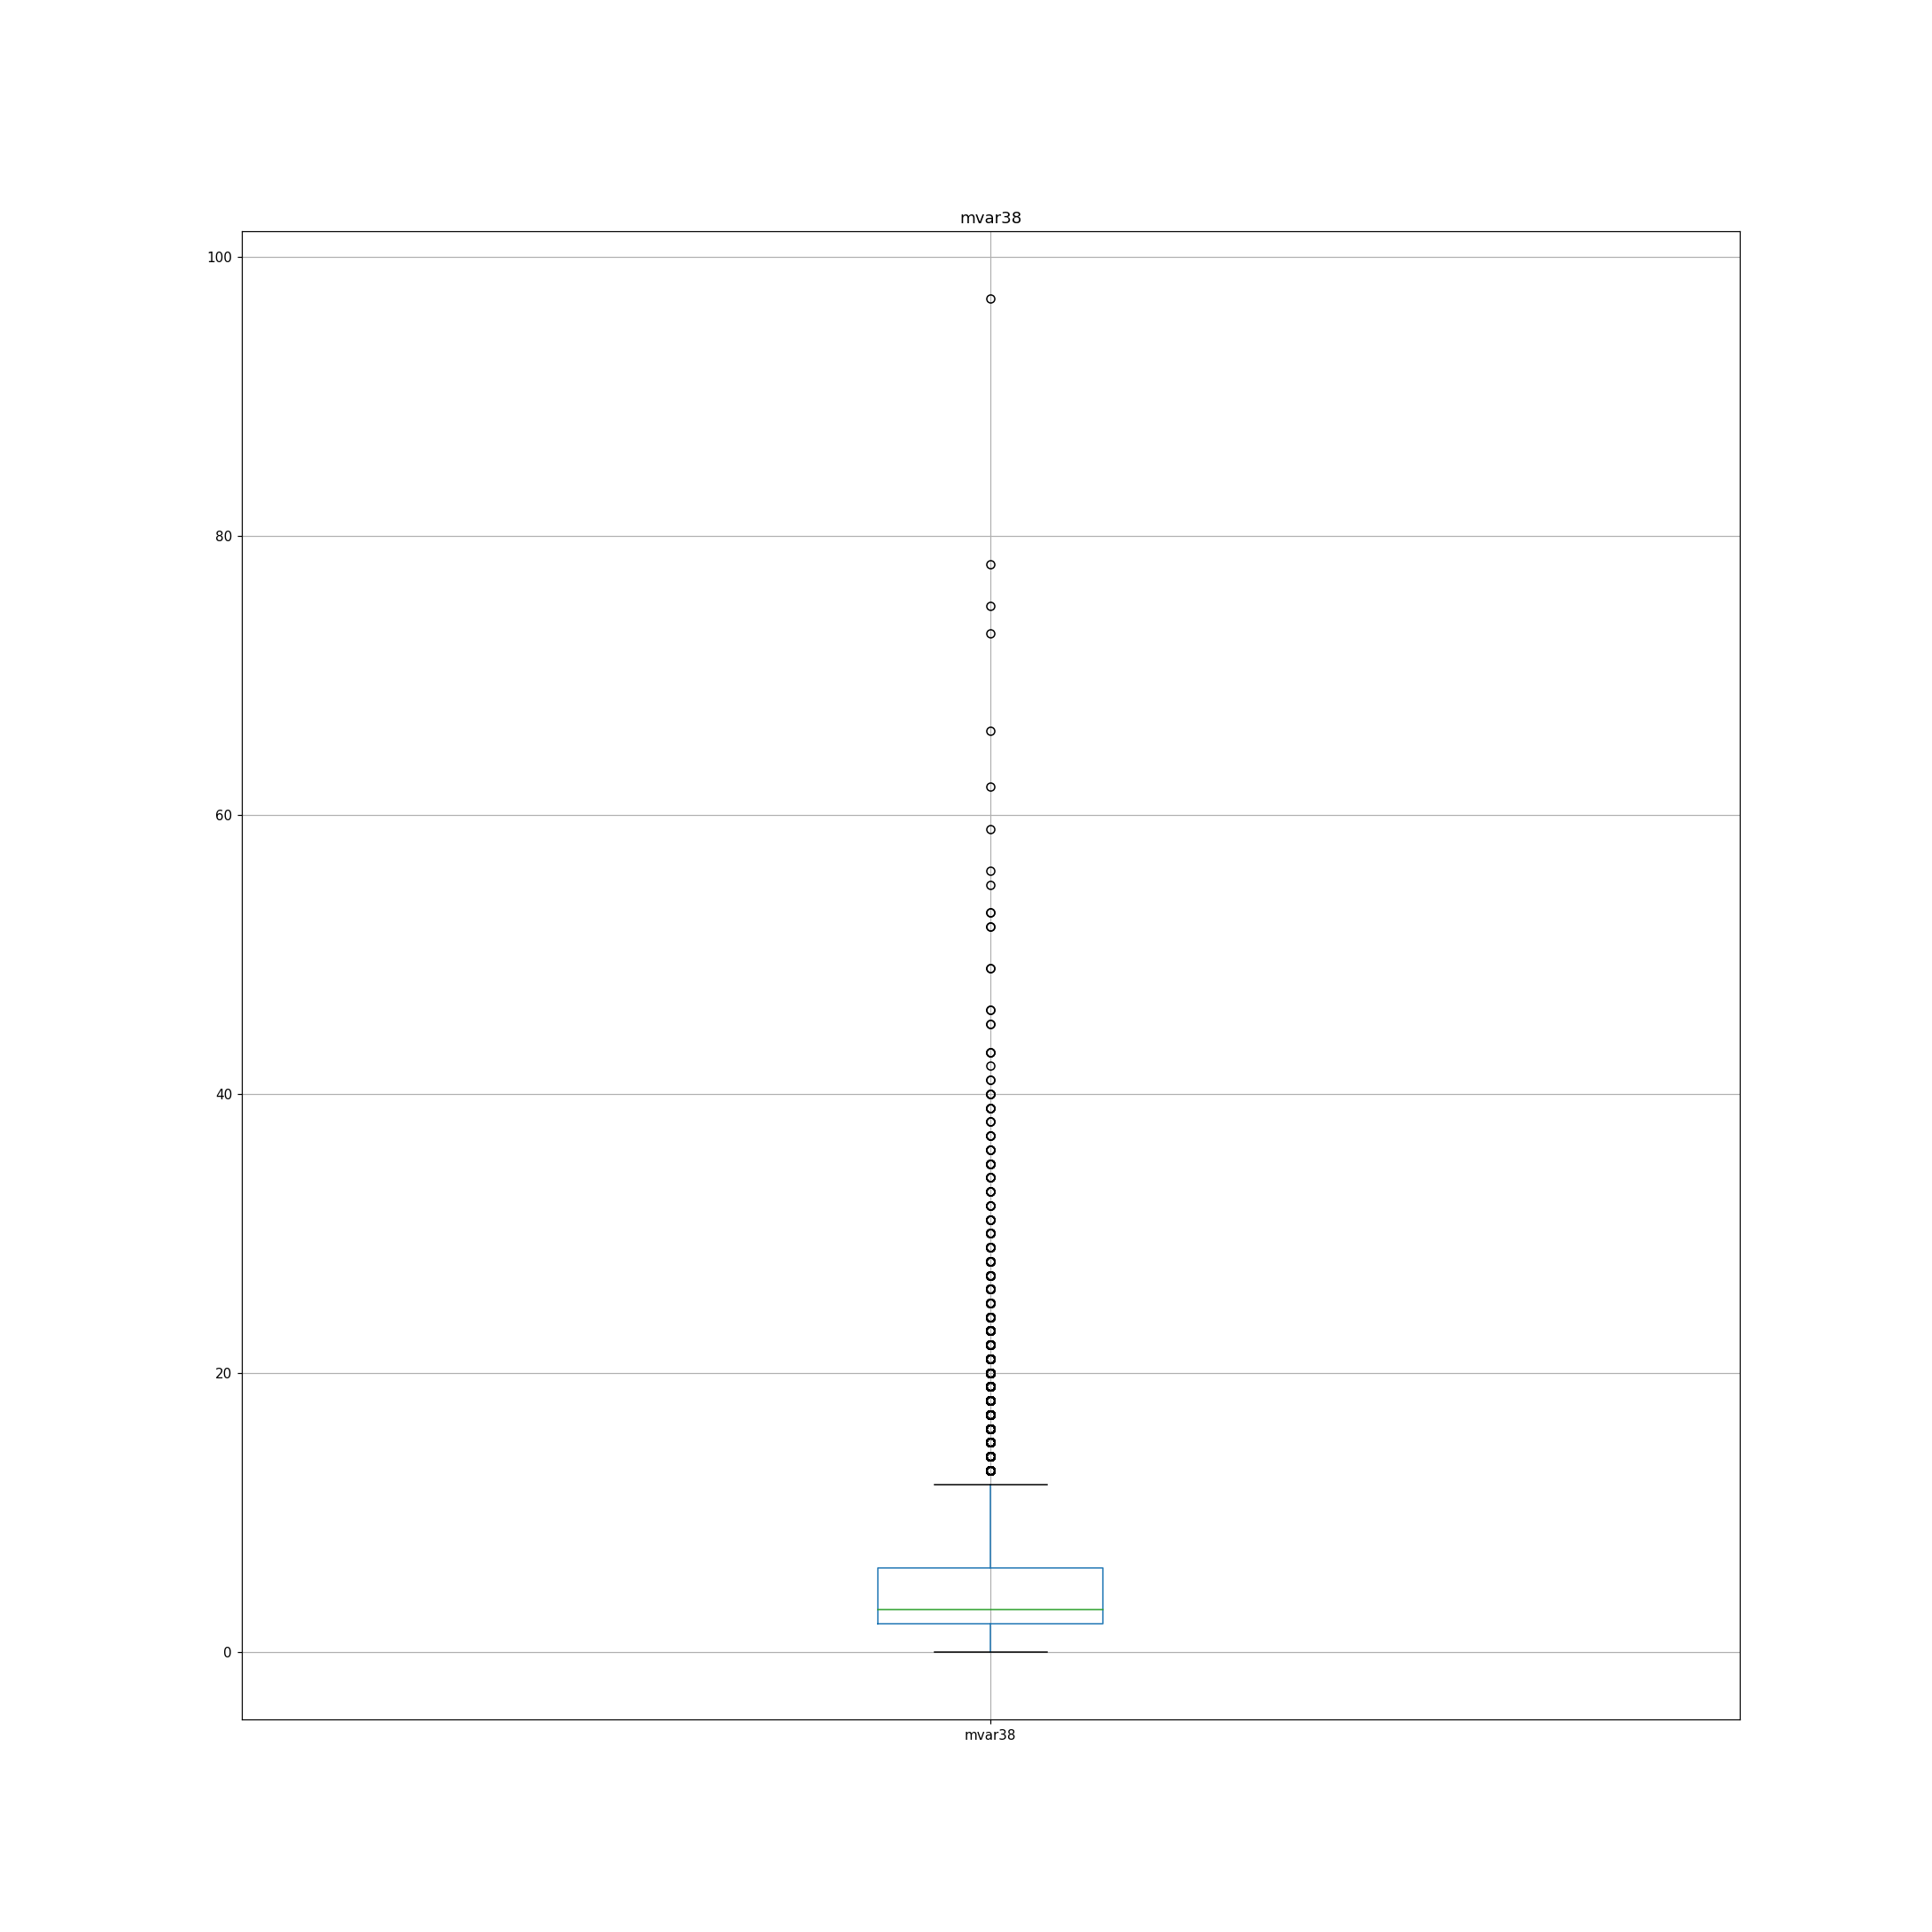

<IPython.core.display.Javascript object>


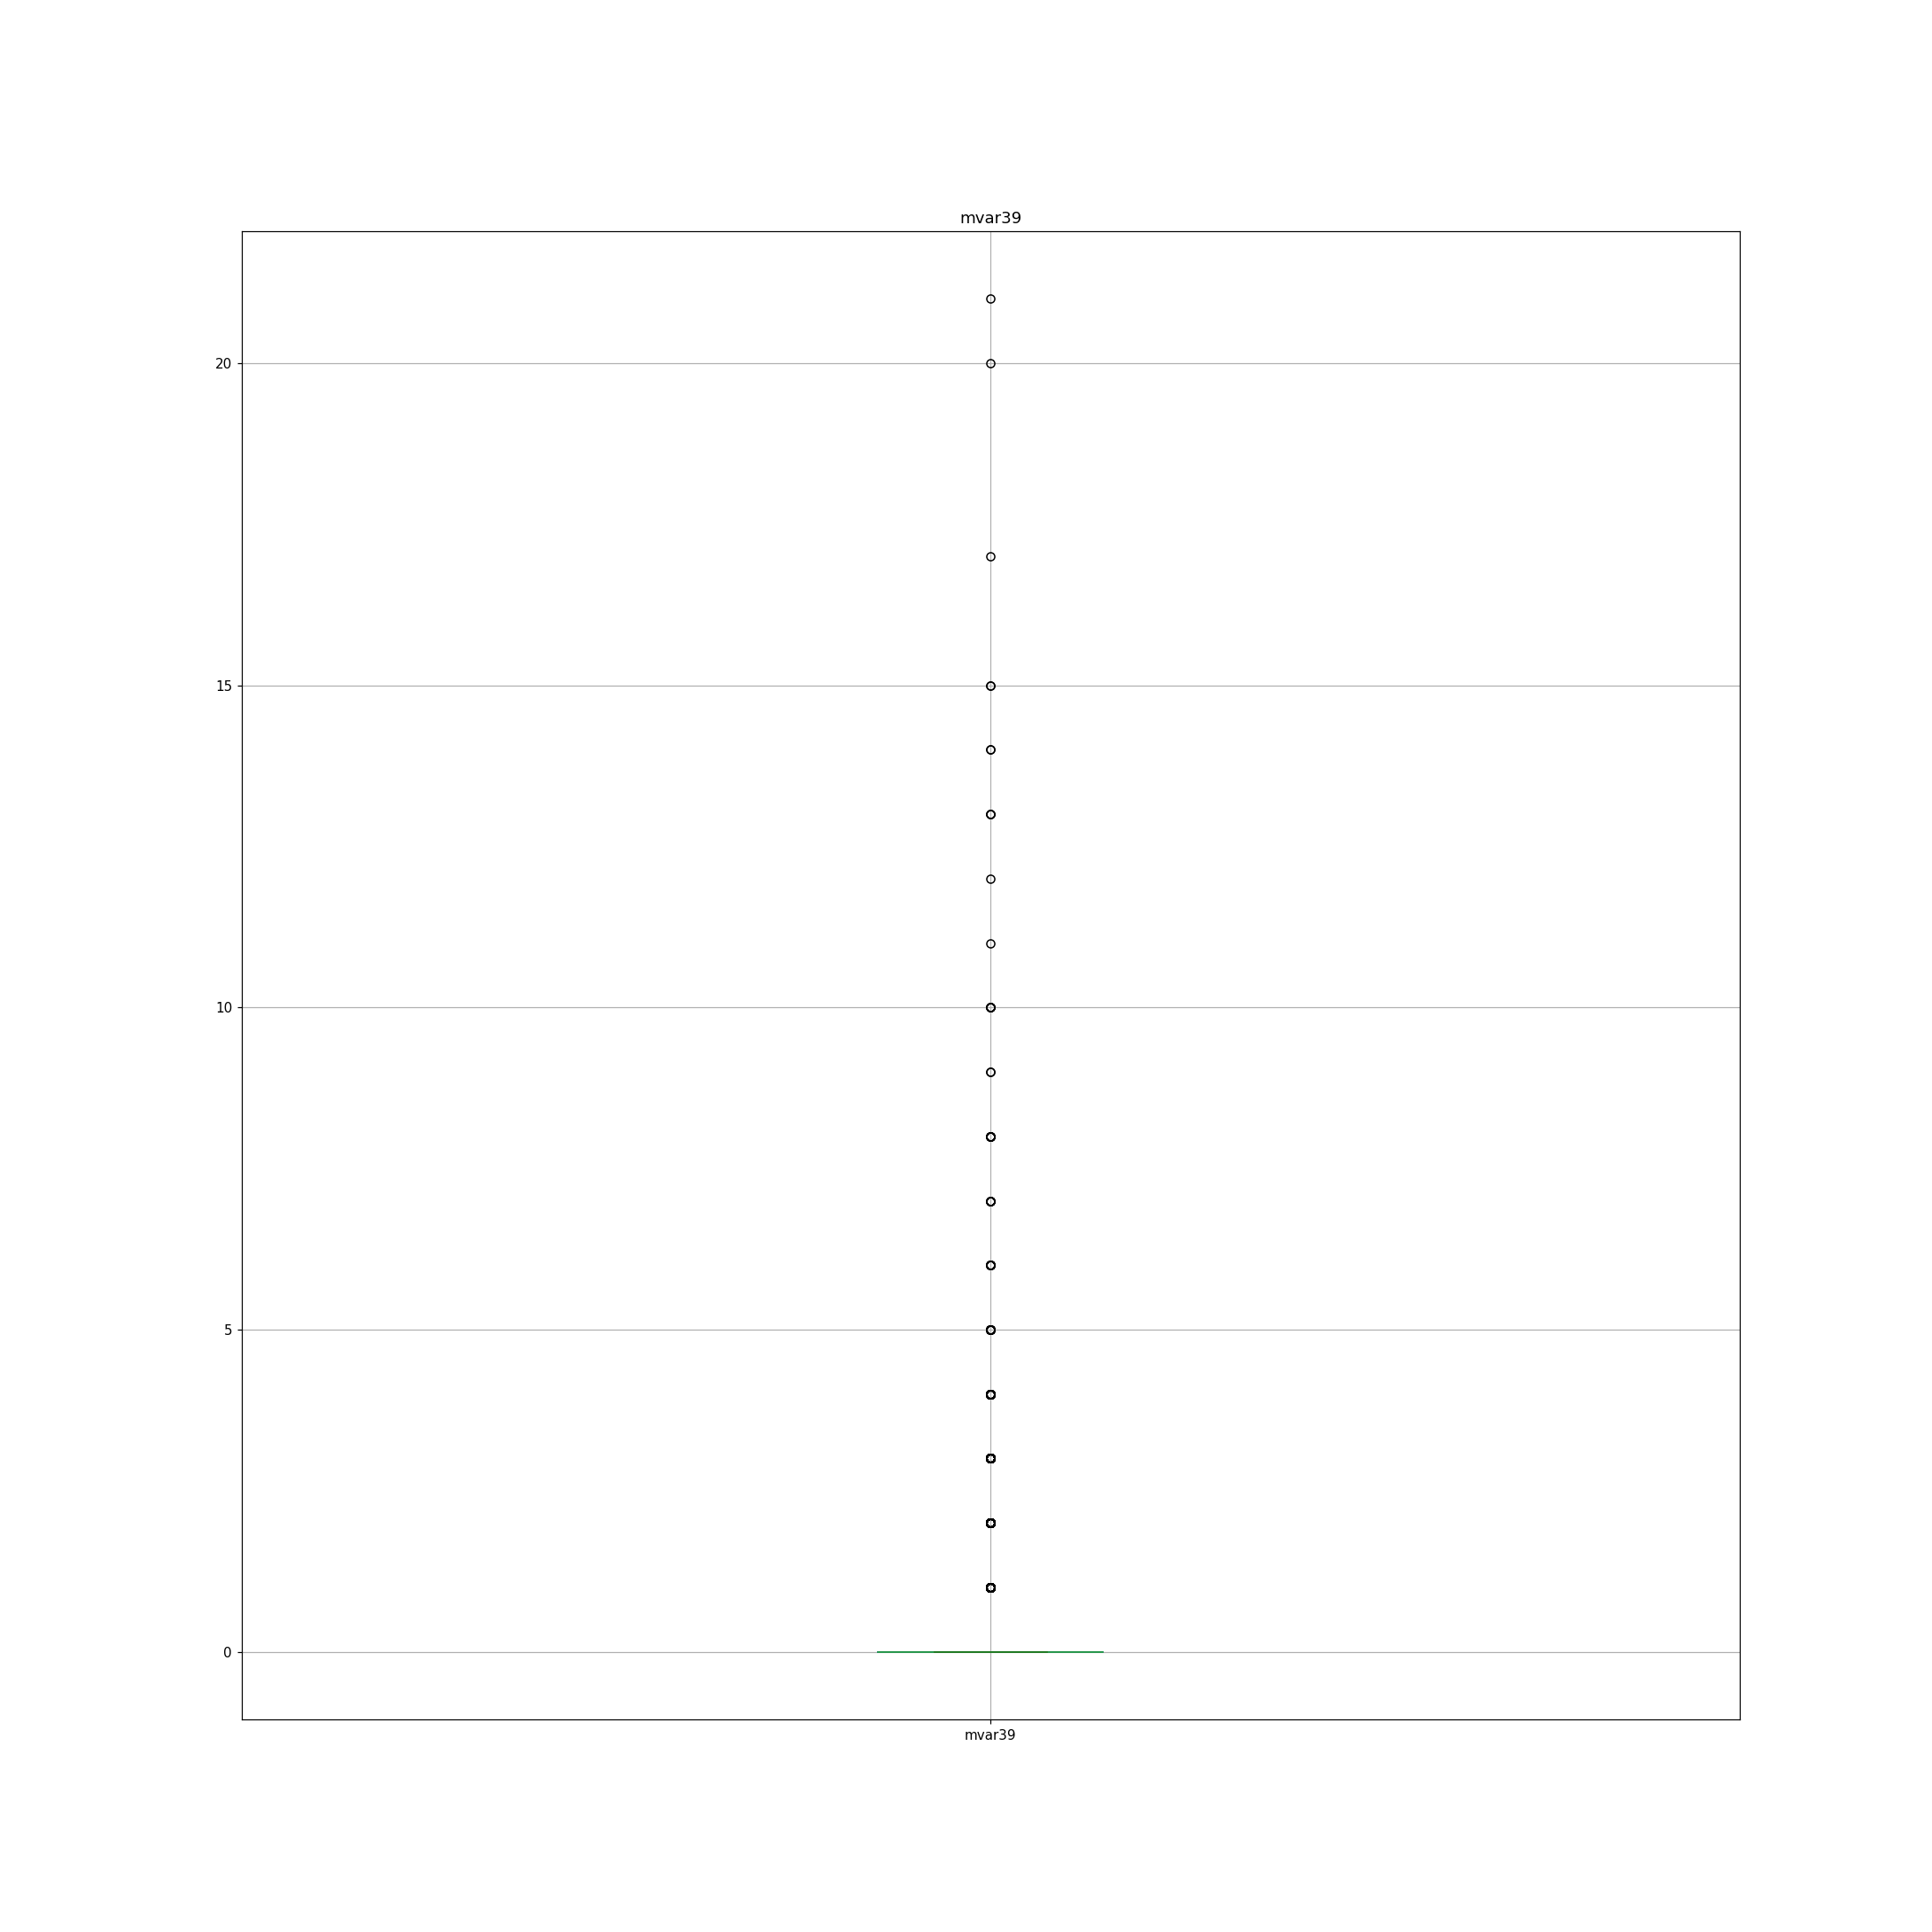

<IPython.core.display.Javascript object>


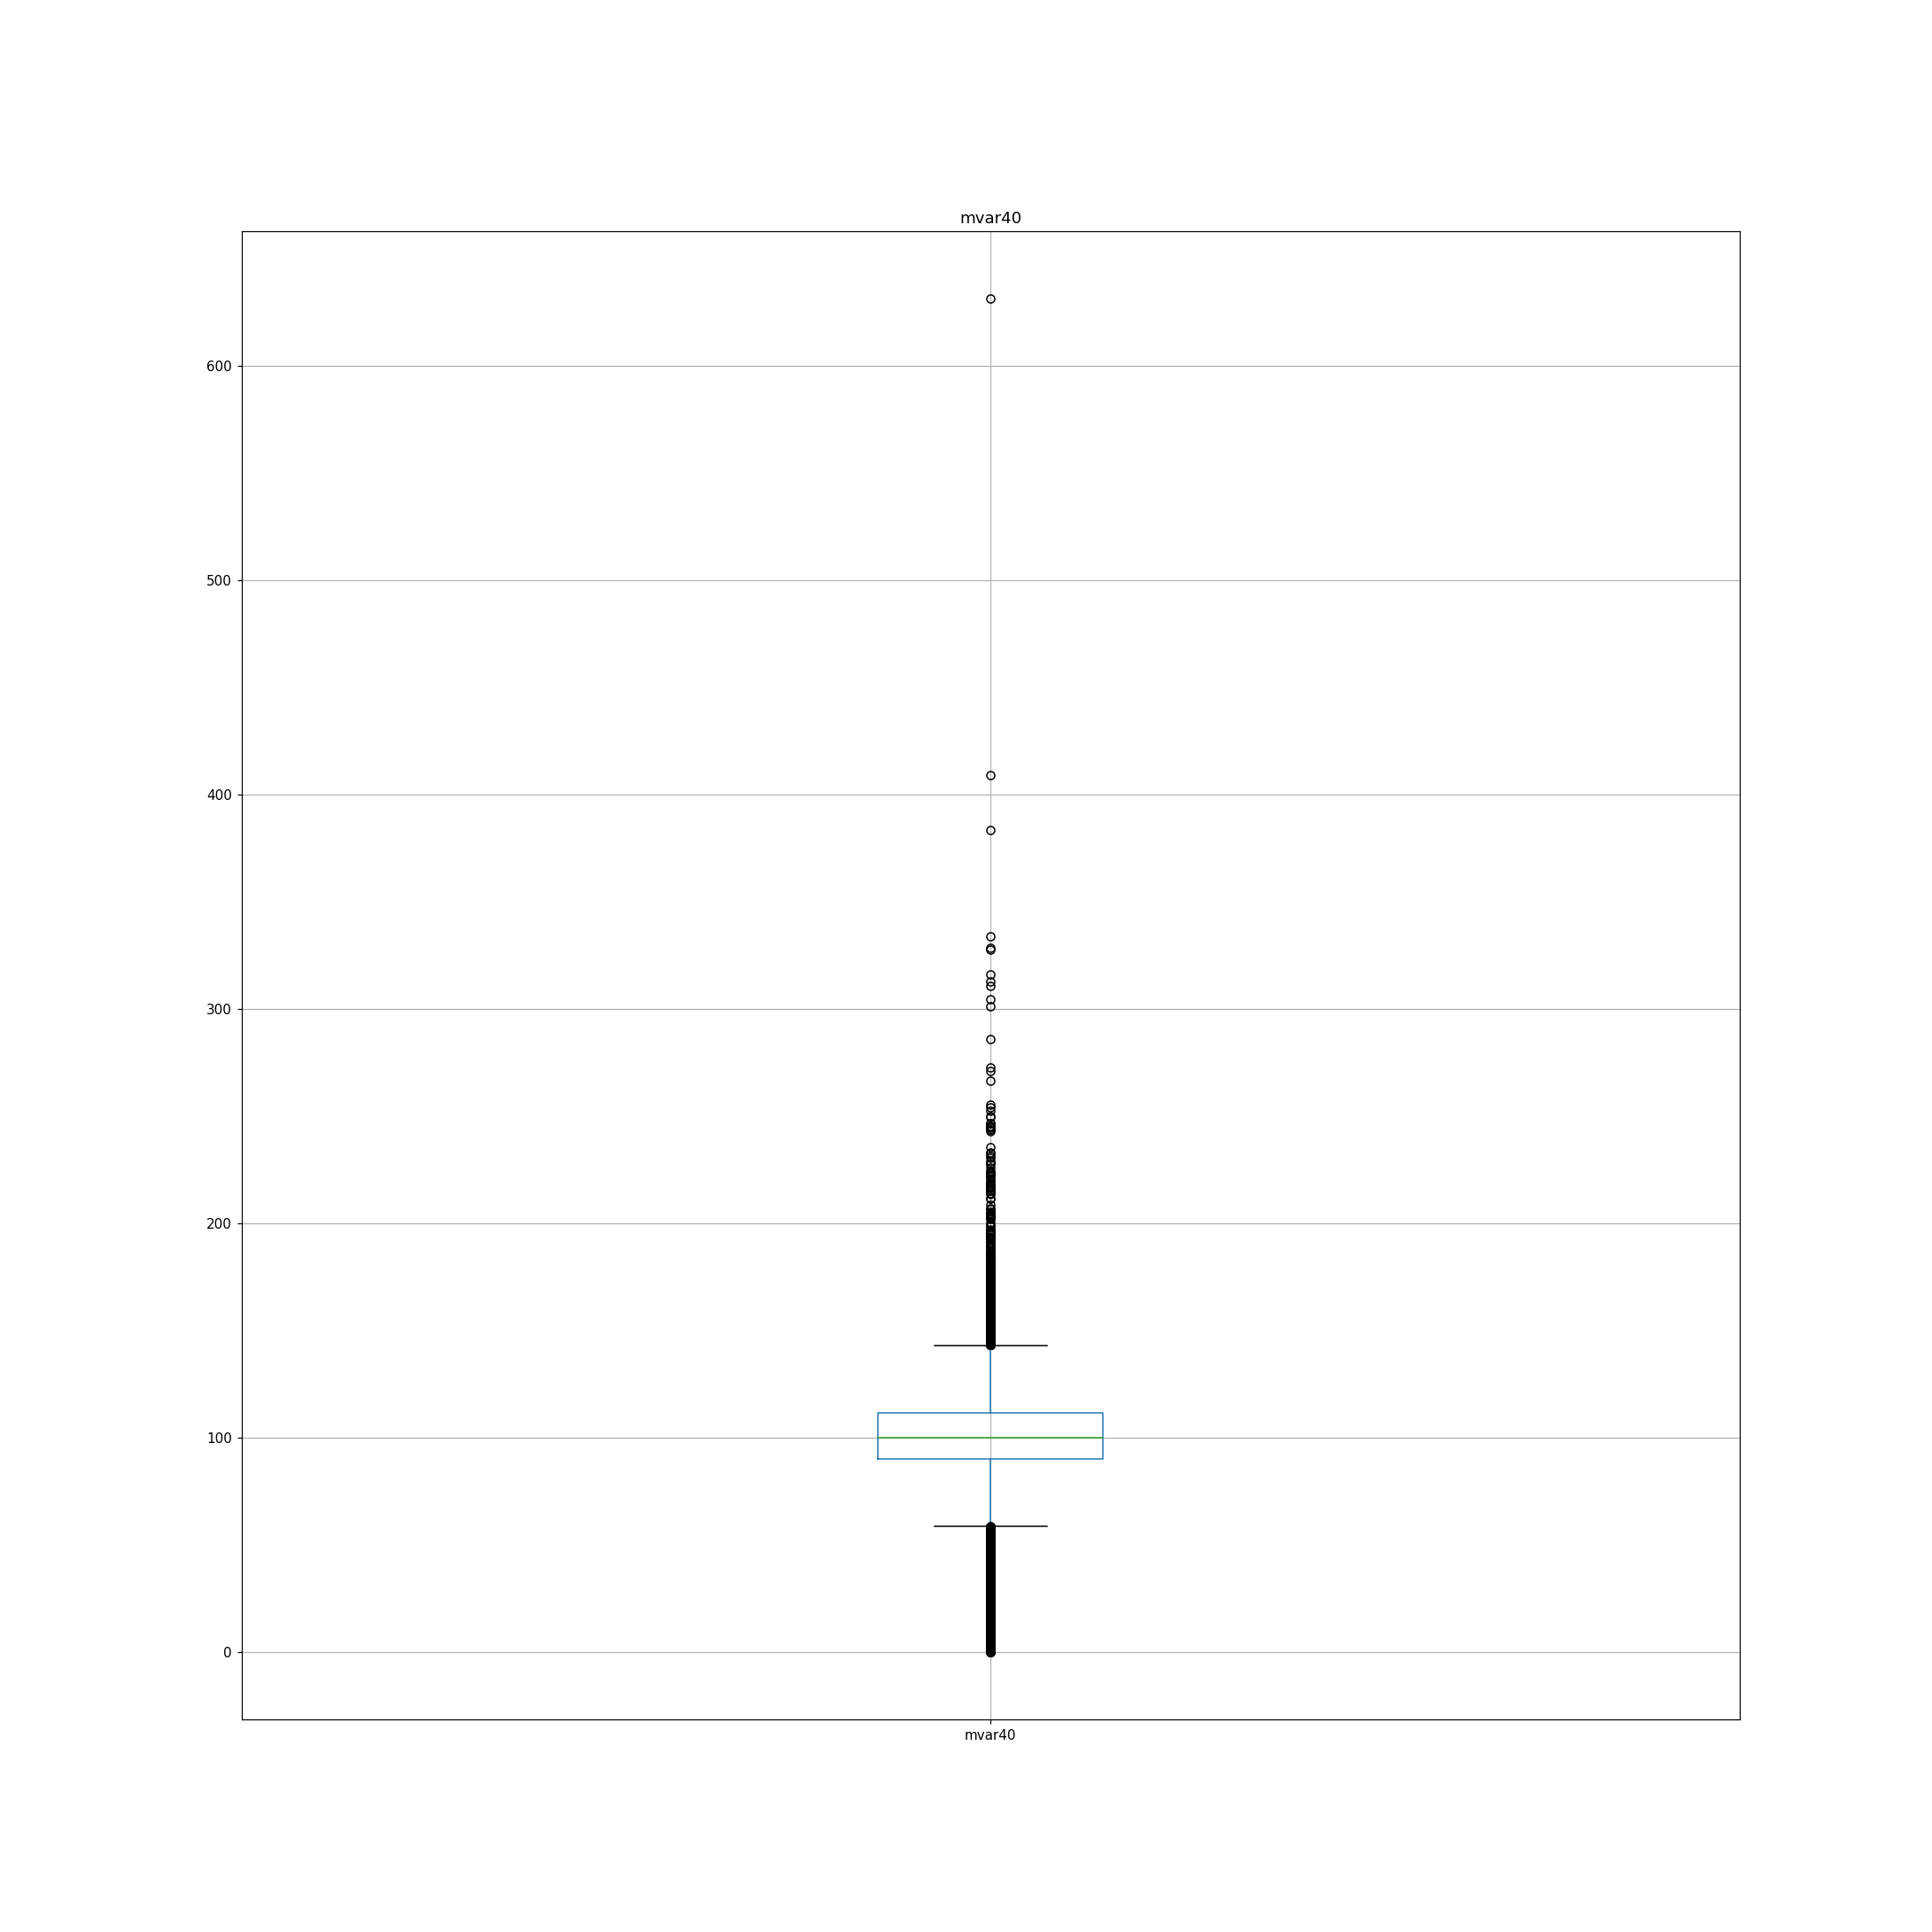

<IPython.core.display.Javascript object>


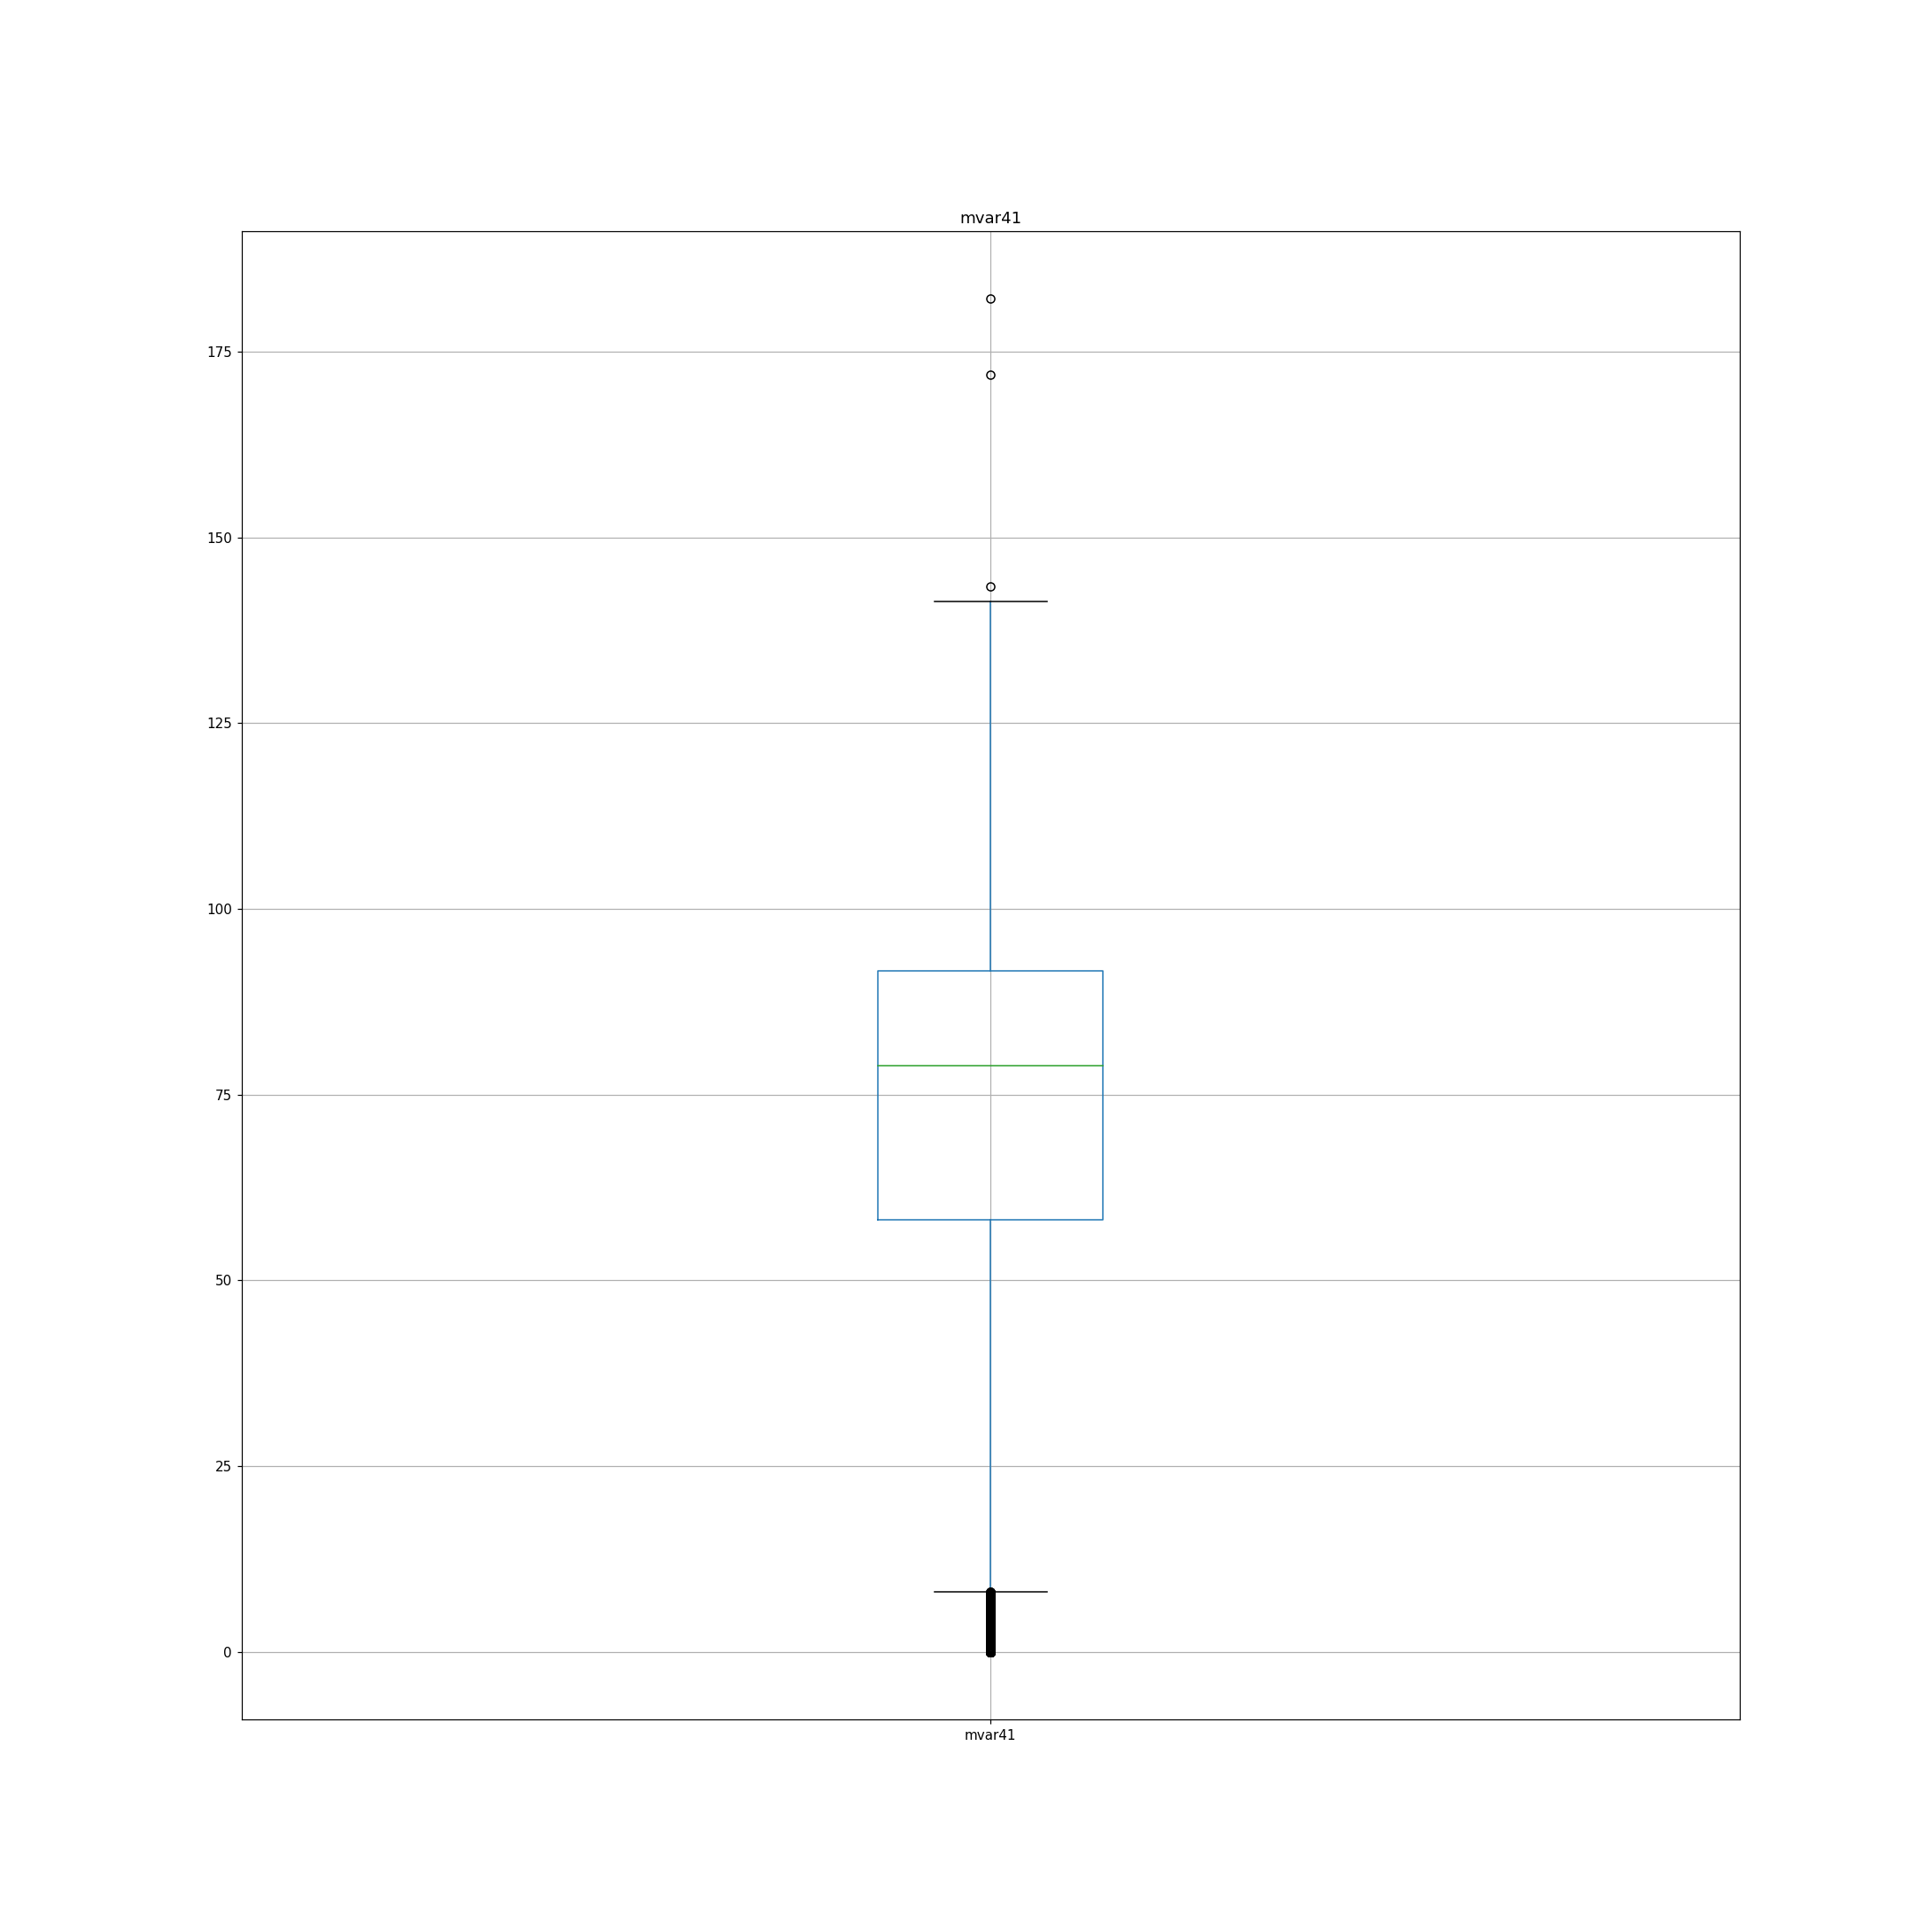

<IPython.core.display.Javascript object>


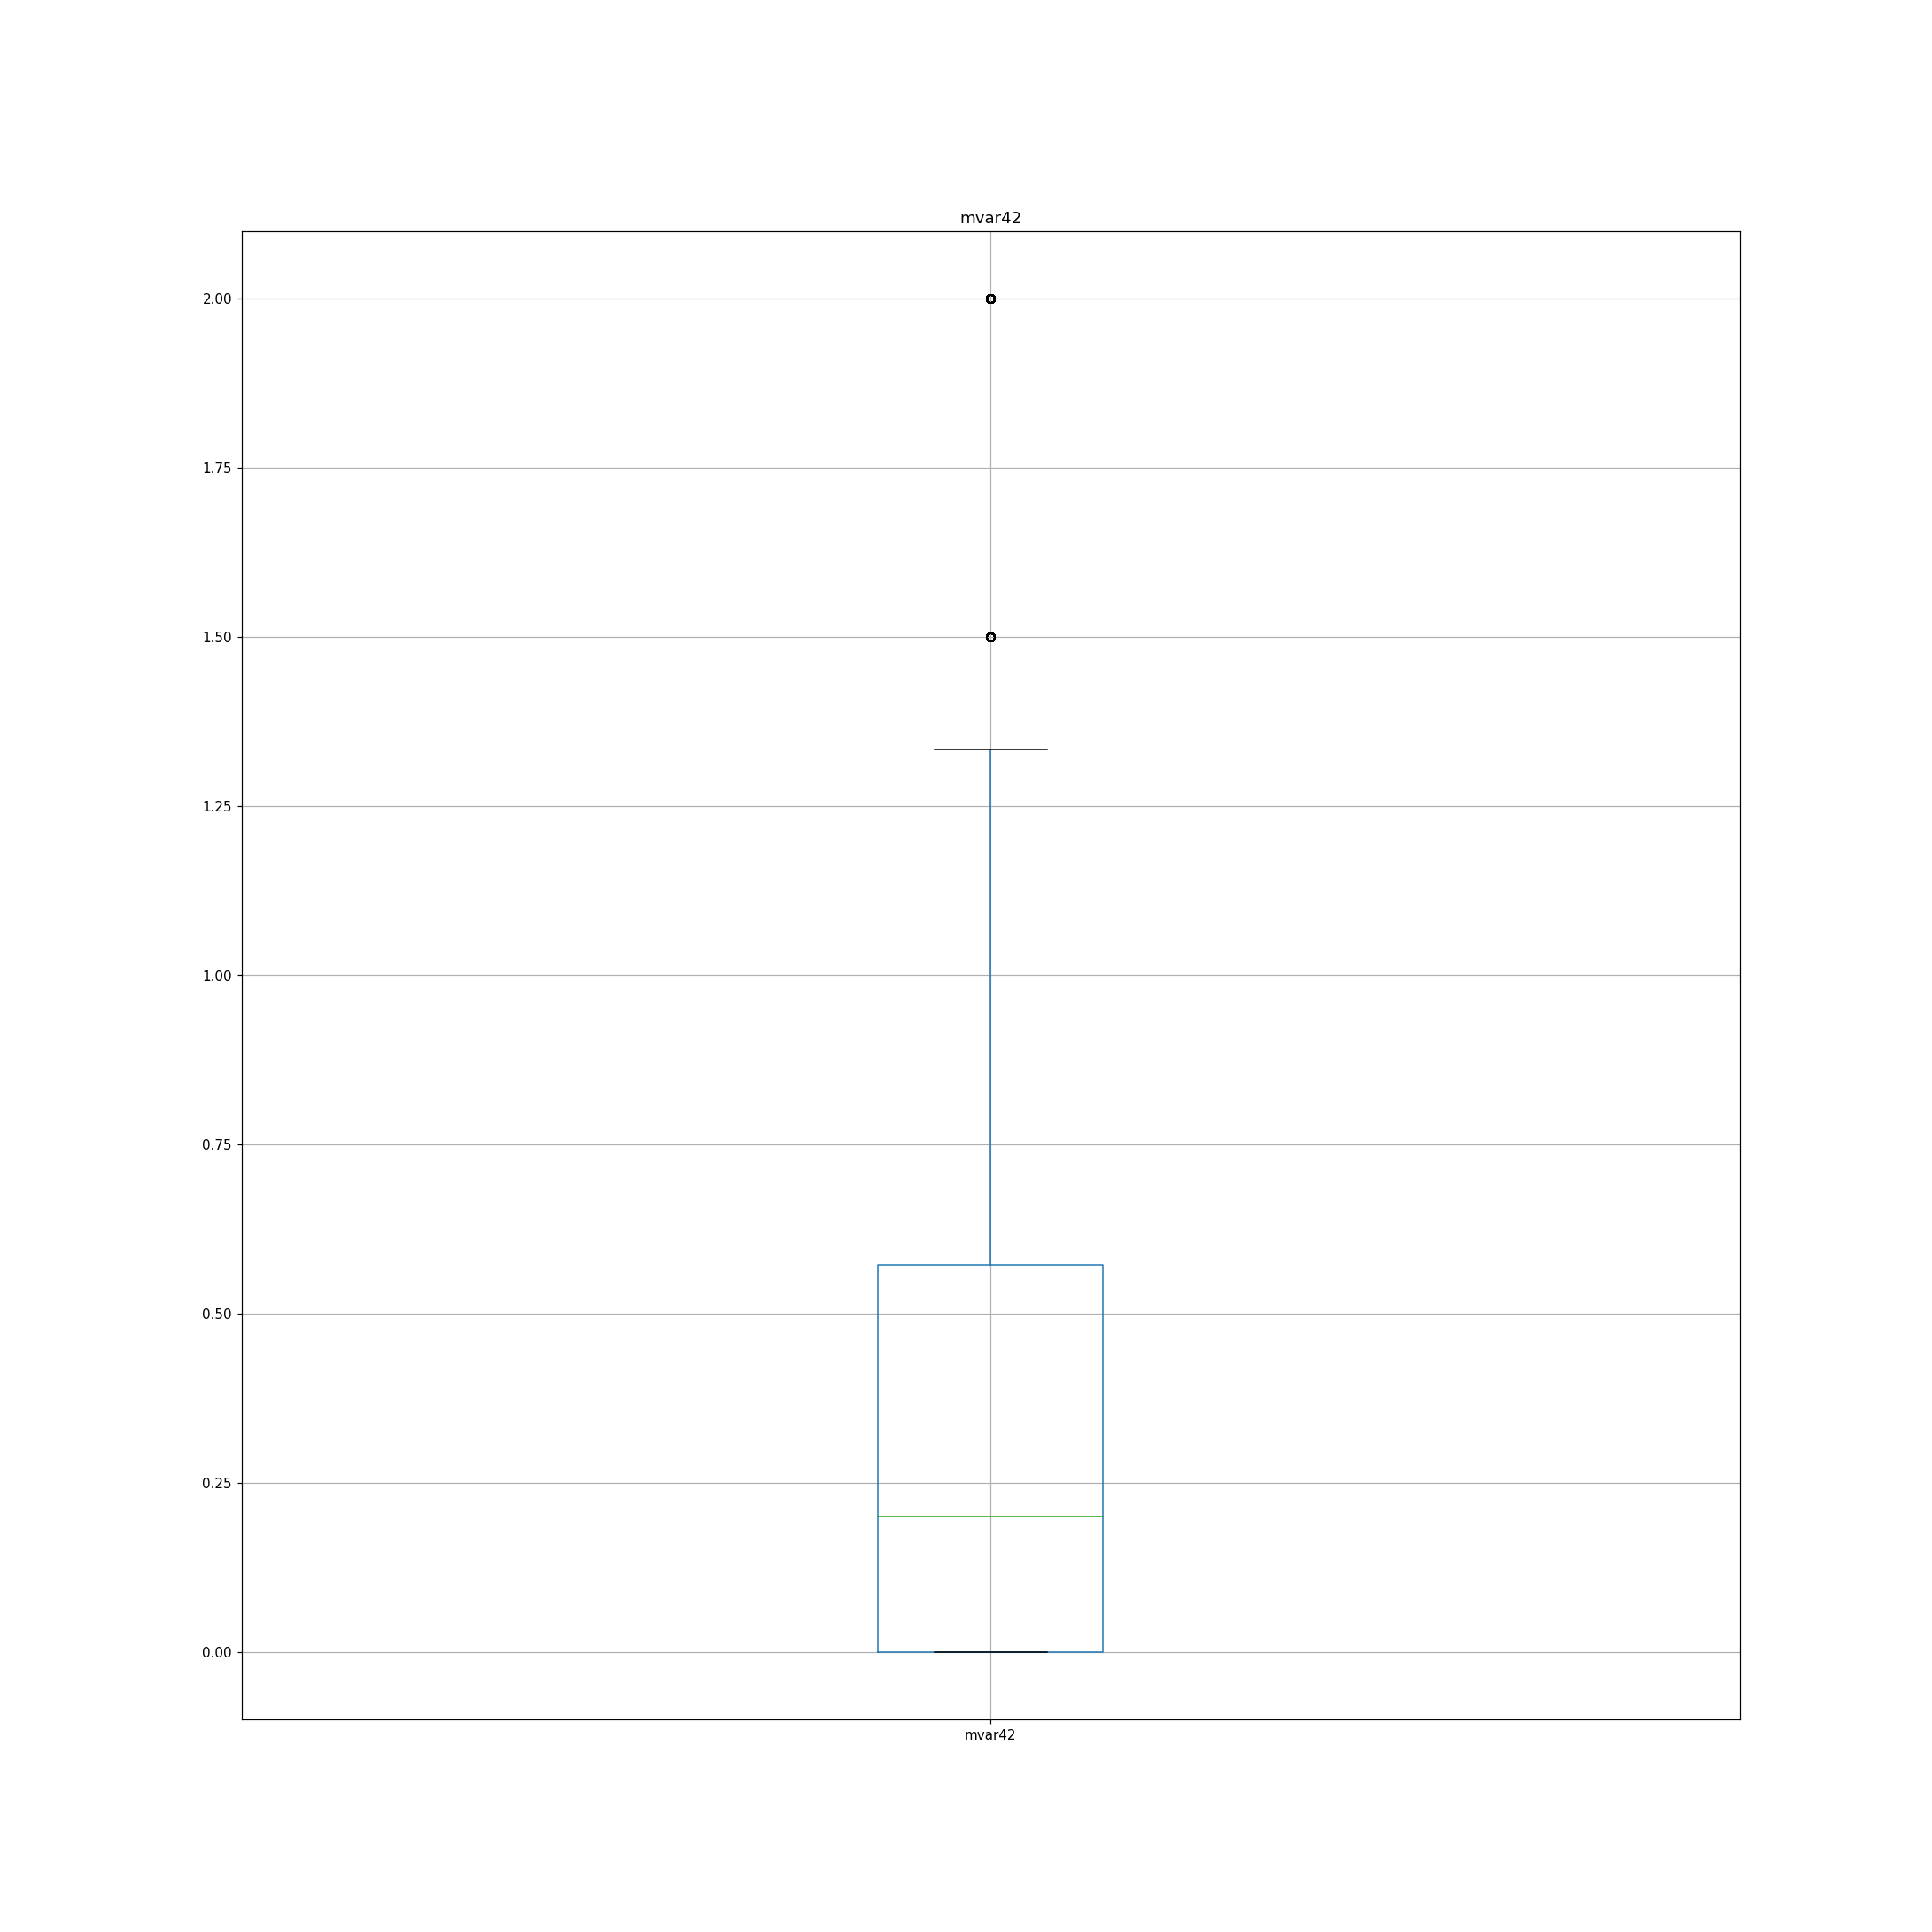

<IPython.core.display.Javascript object>


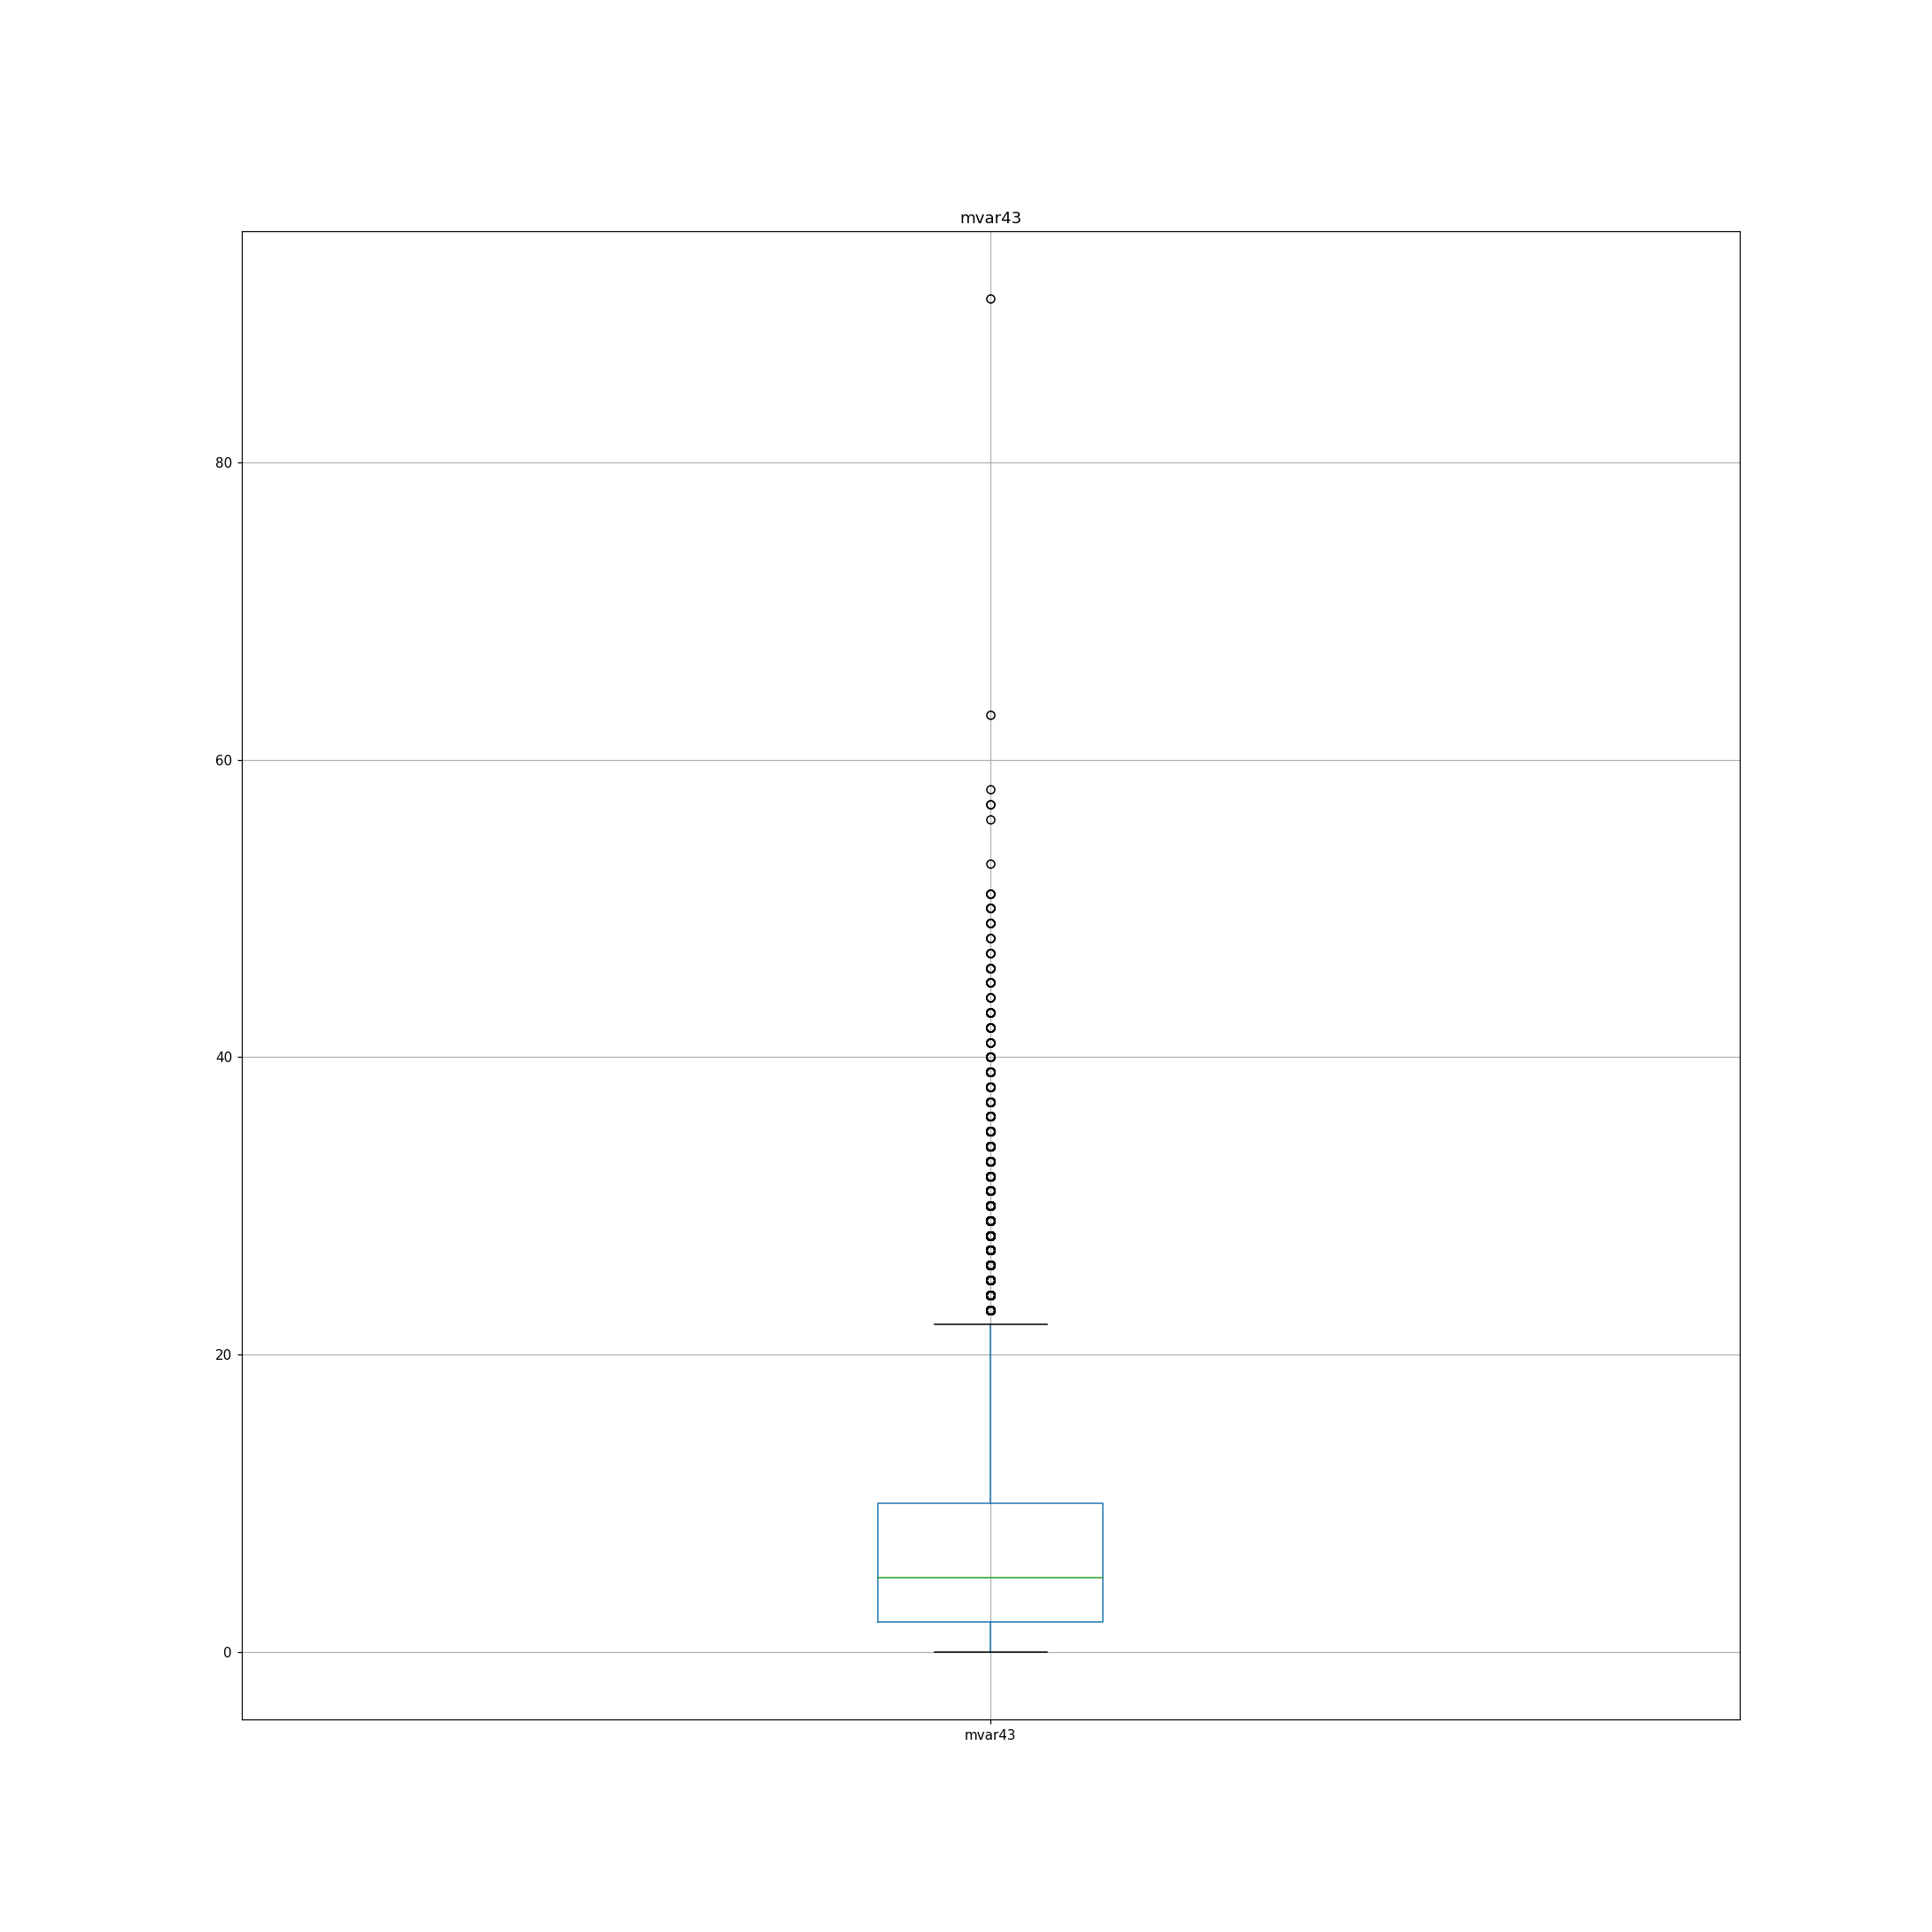

<IPython.core.display.Javascript object>


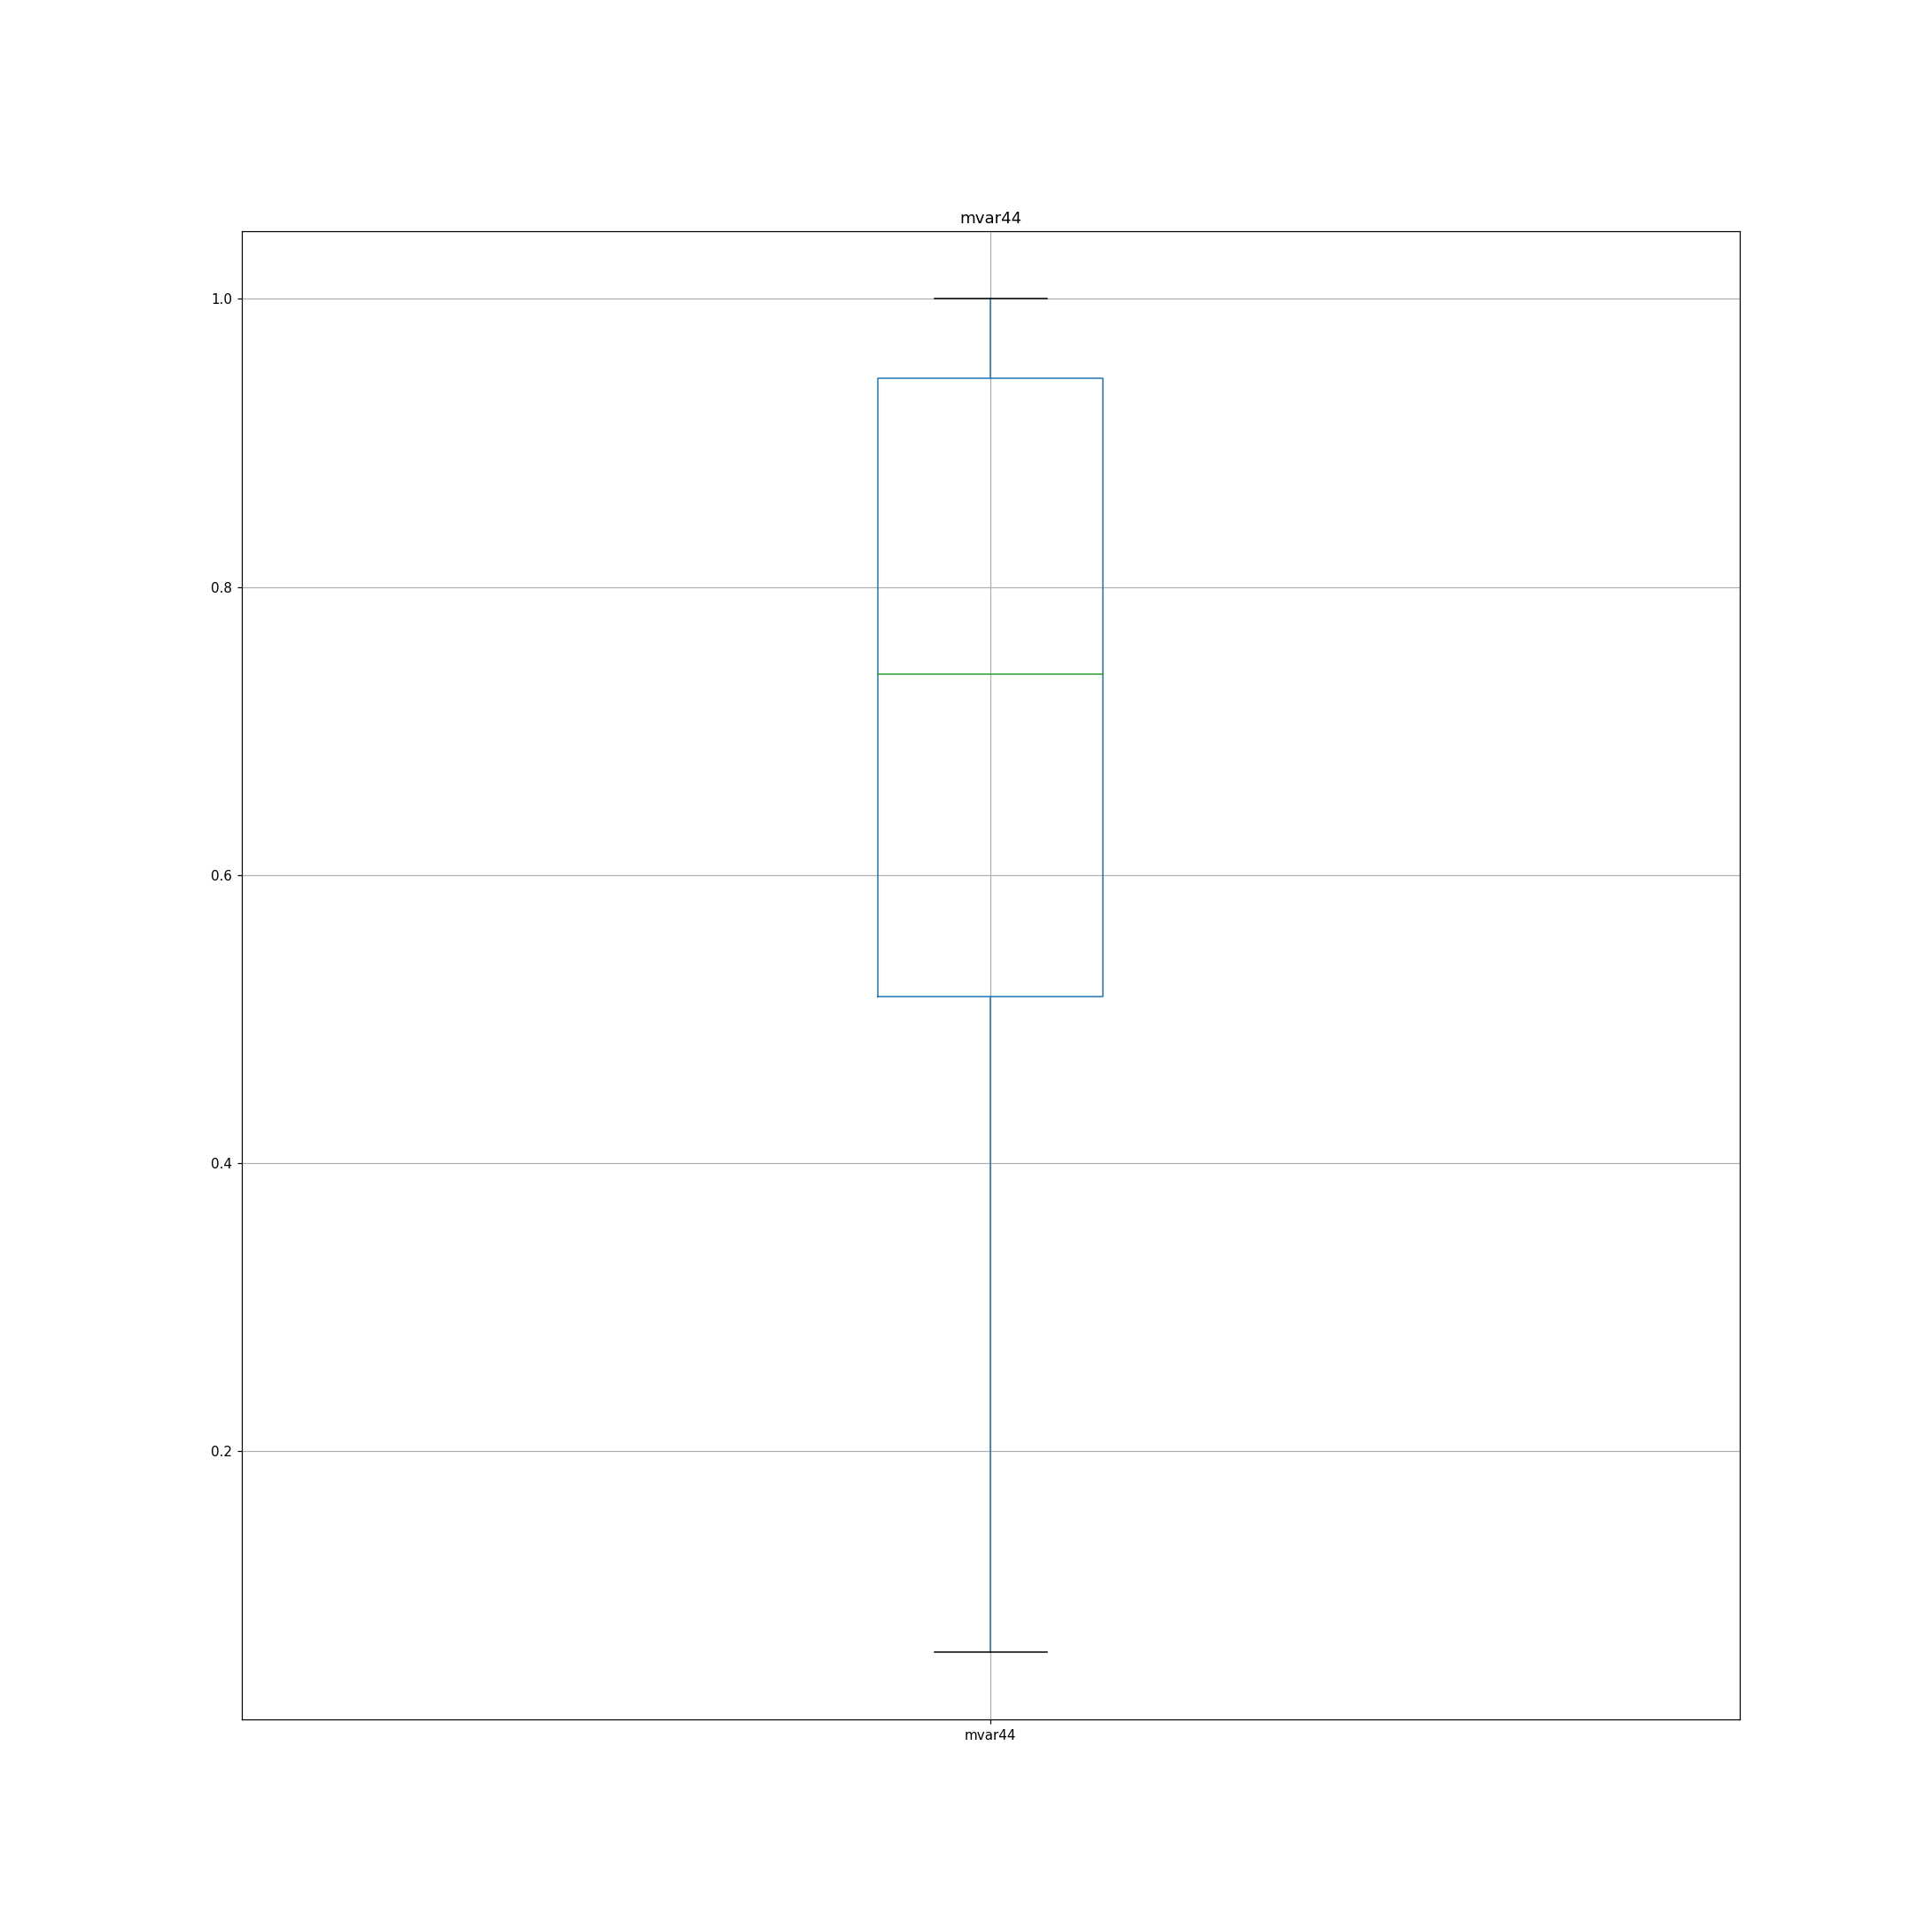

<IPython.core.display.Javascript object>


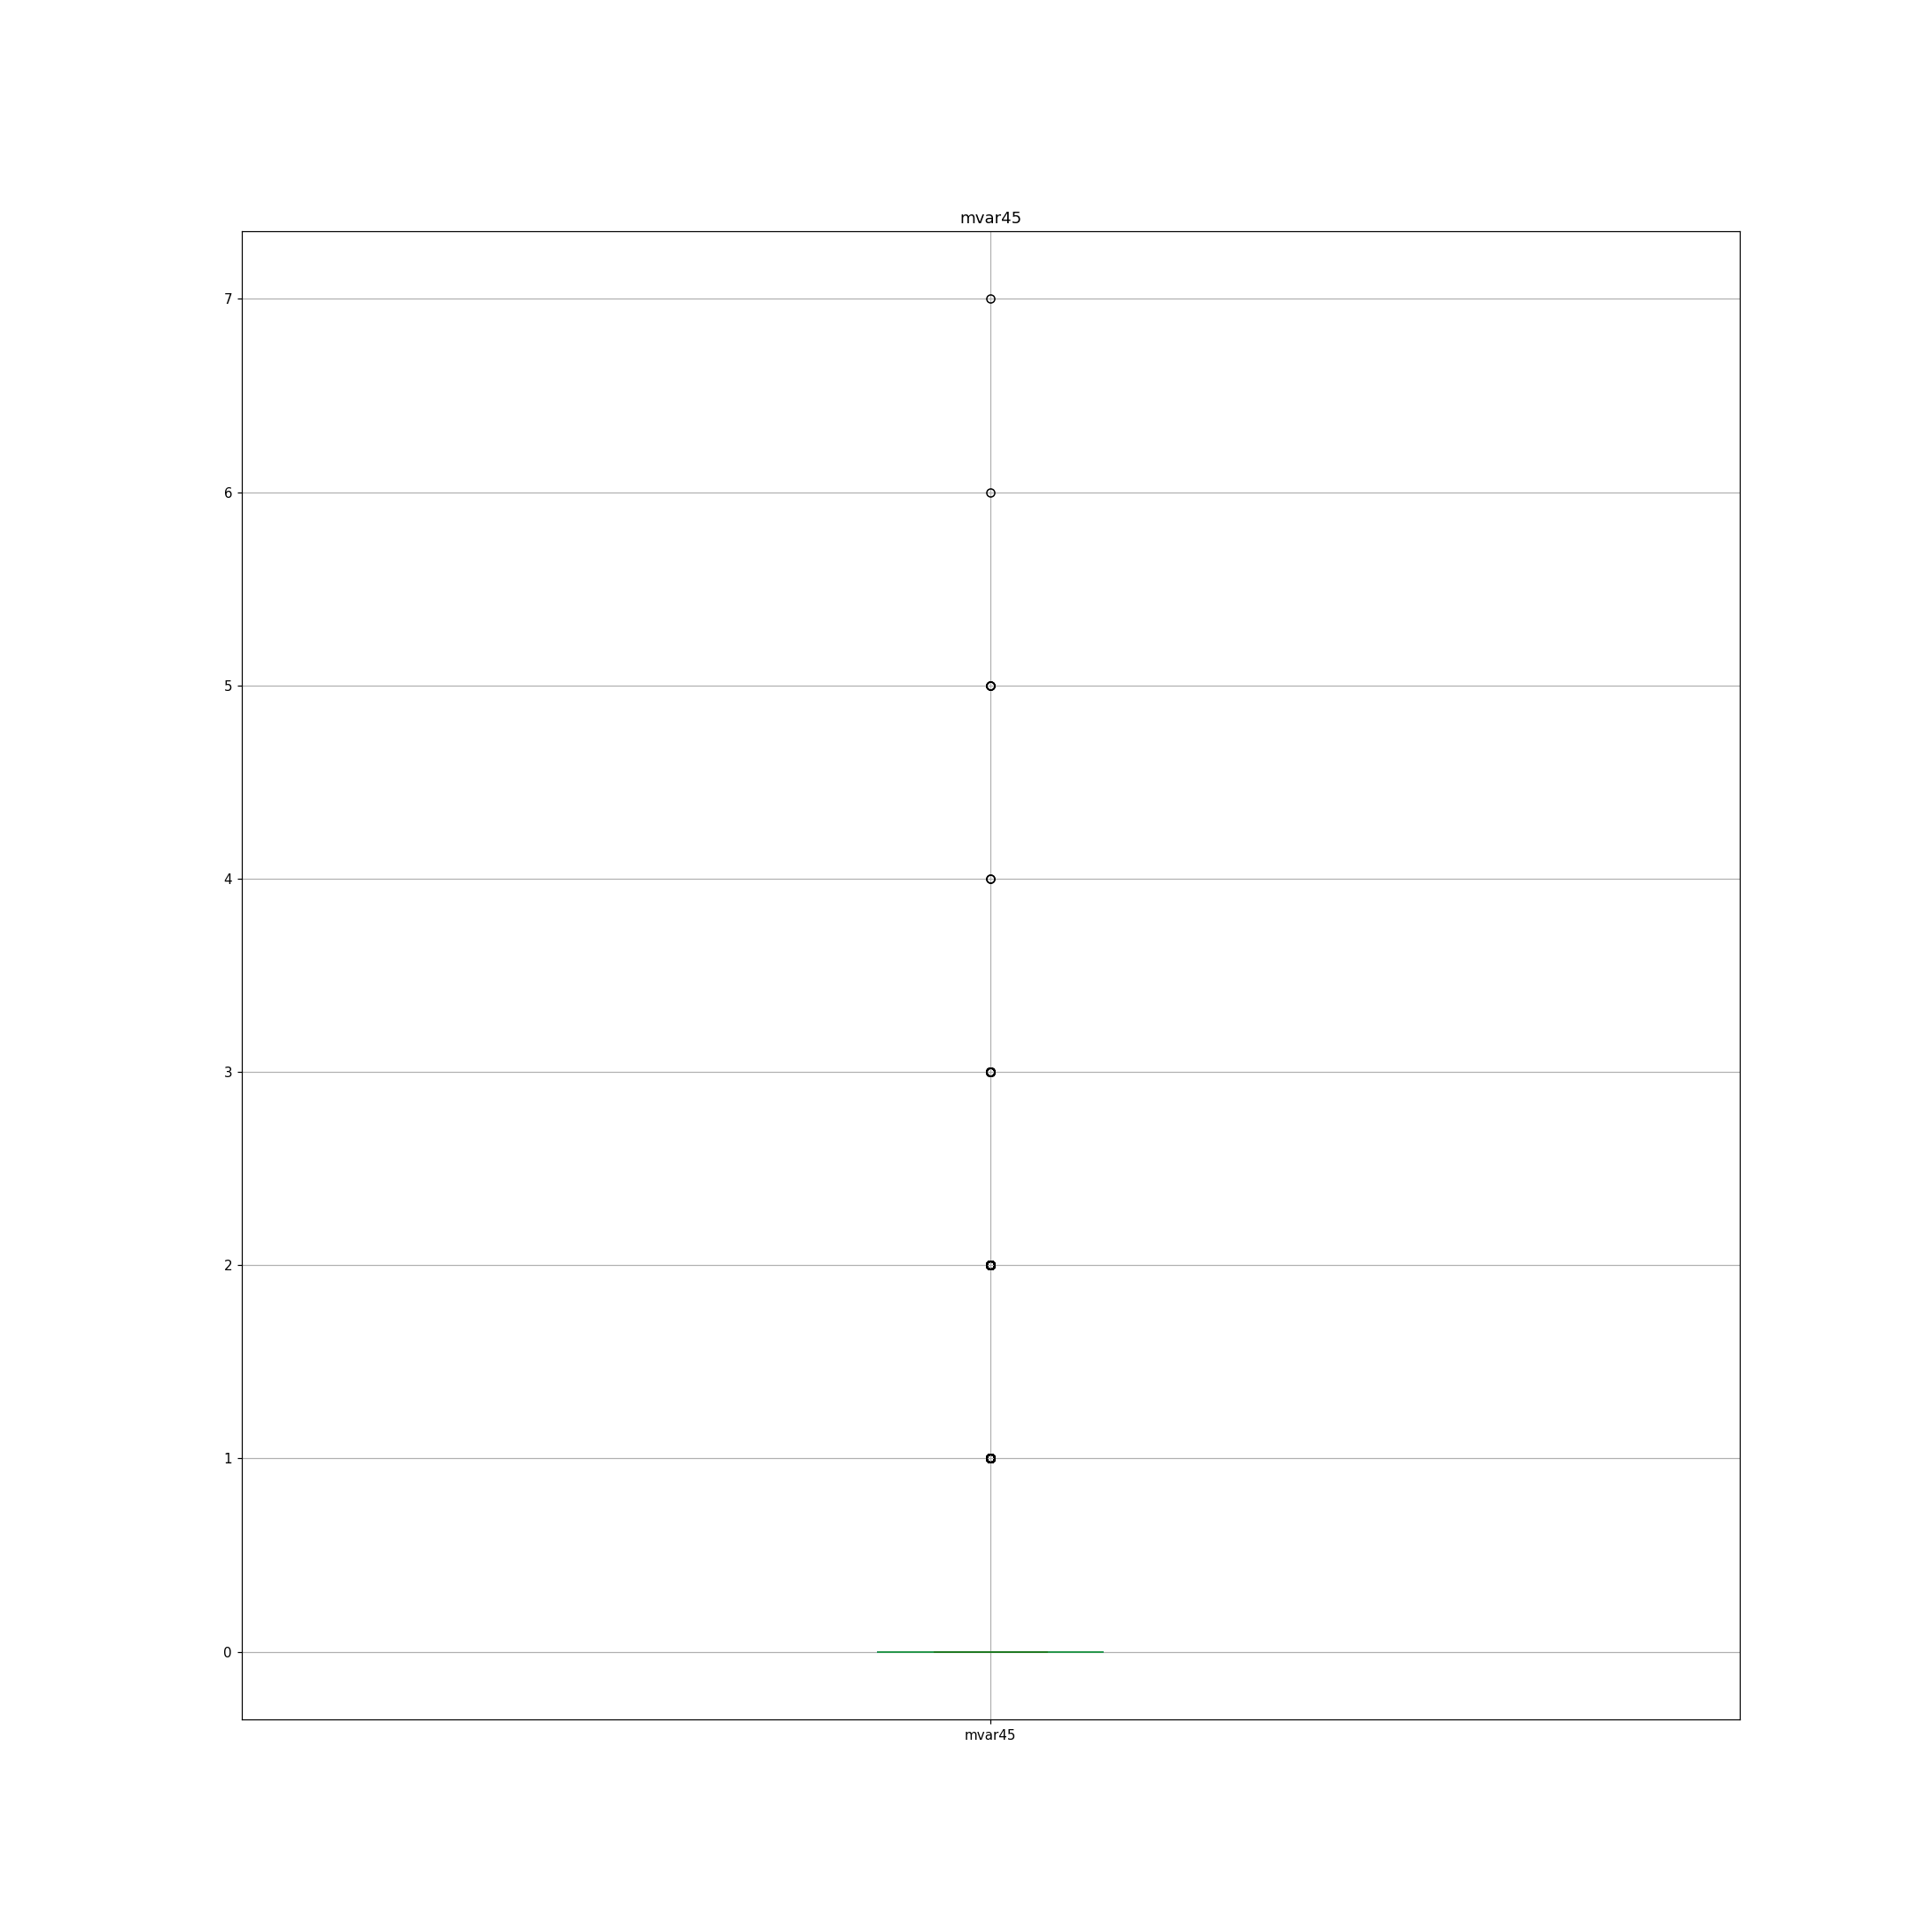

<IPython.core.display.Javascript object>


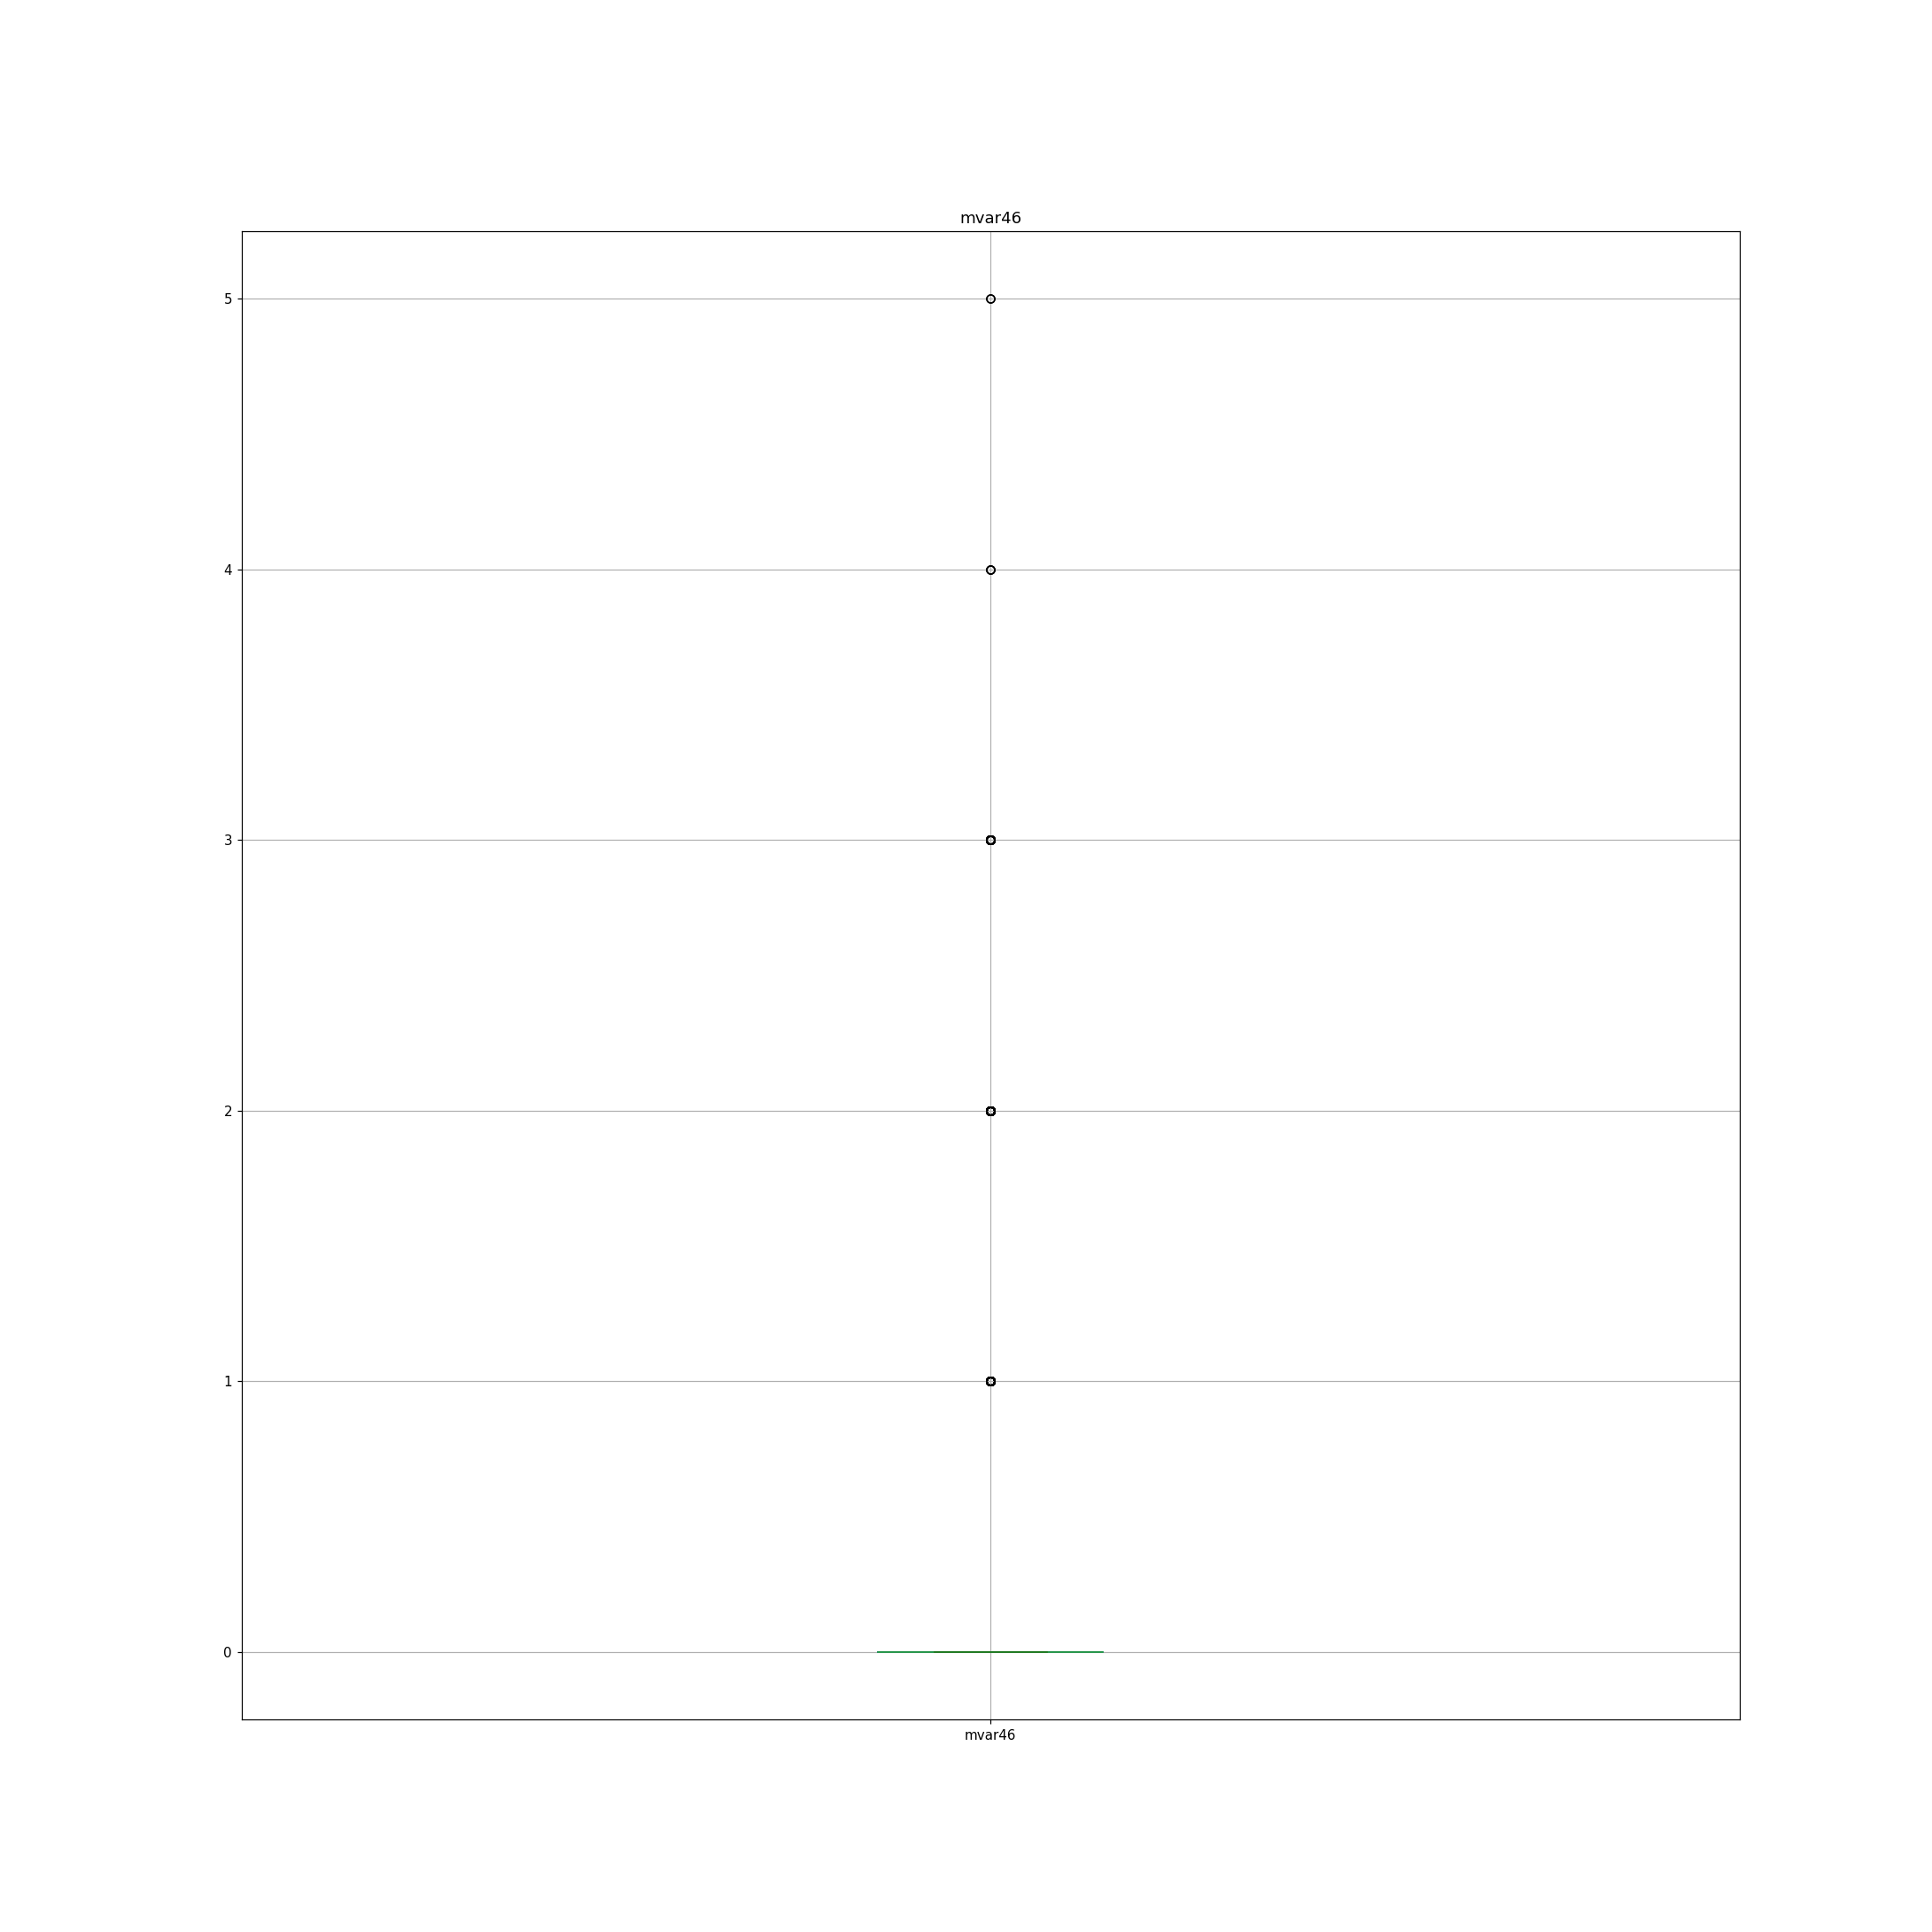

<IPython.core.display.Javascript object>


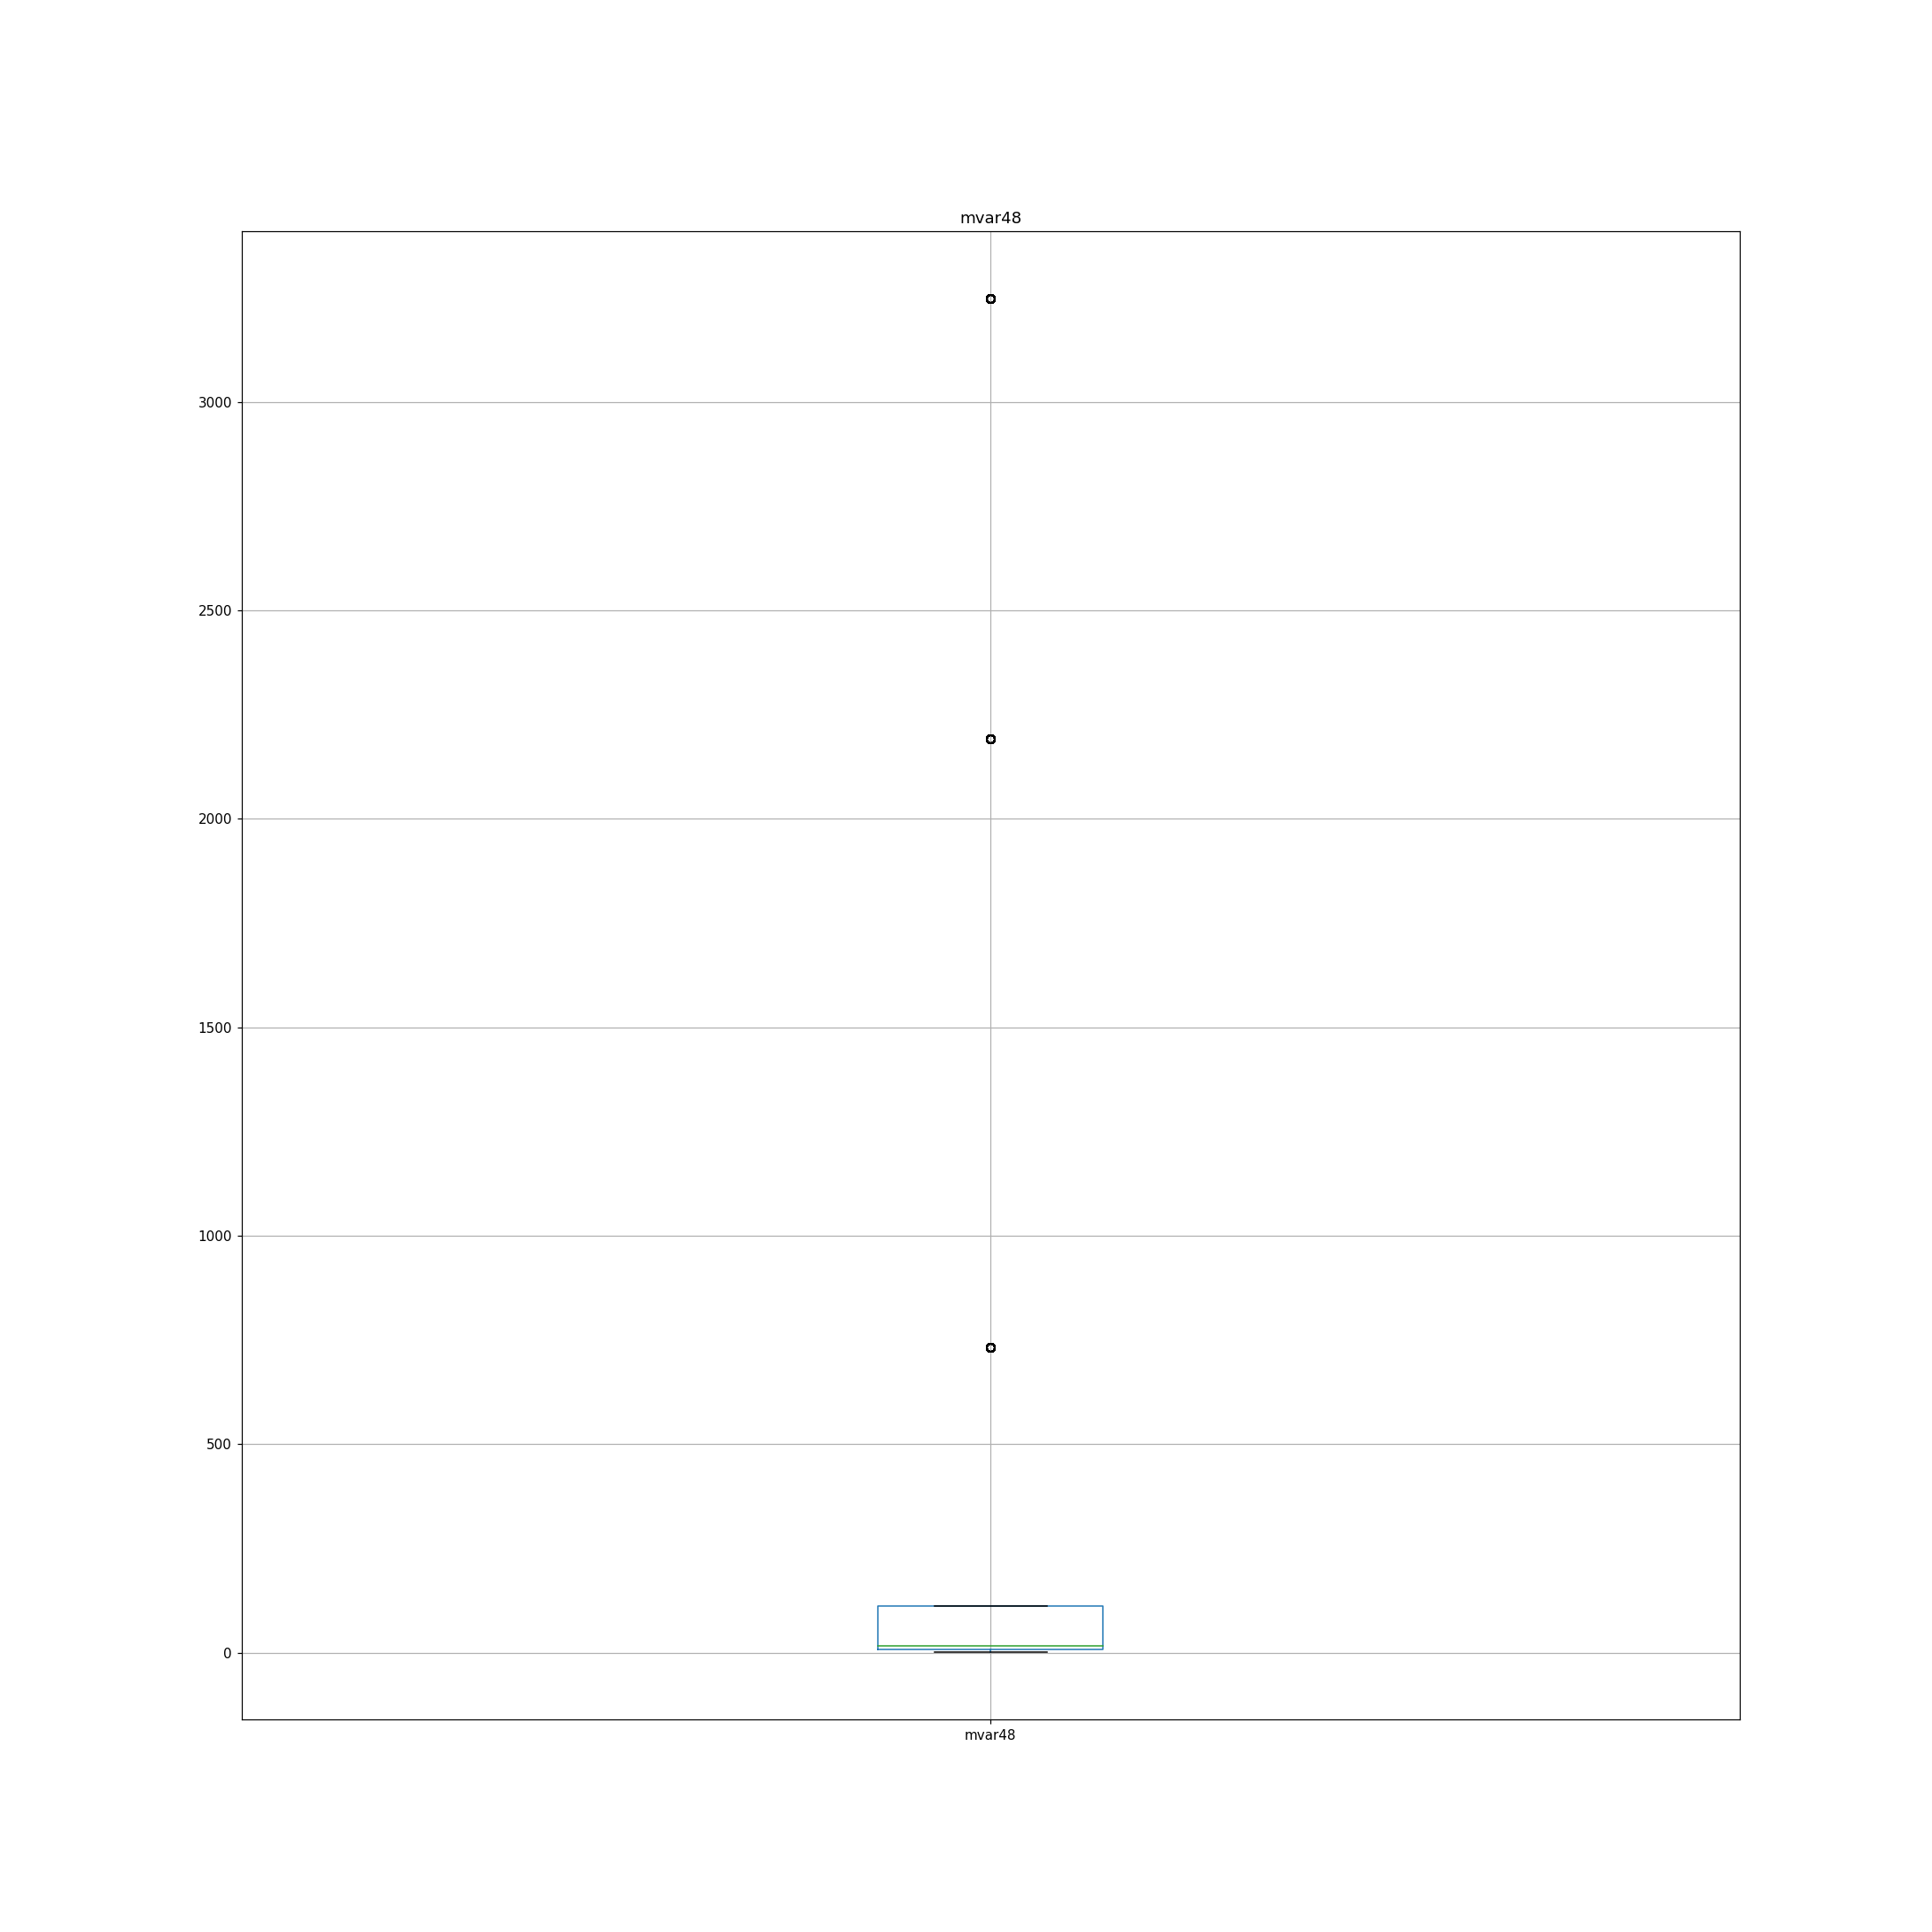

In [13]:
for i in range(1,49):
    if i!=47:
        plt.figure(figsize=[20,20])
        data.boxplot(column=['mvar{}'.format(i)])
        plt.title('mvar{}'.format(i))
        plt.show()

In [14]:
def RemoveOutlier(data):
    cutoffs = [2000,17,150,16,75,40000,1000000,100000,450000,1000000,250000,120000,1000000,0.06*10**9,0.4*10**7,6,8,8,15,20,300,30000,25000,6000,11500,19000,18000,35000,21000,8000,13200,5000,55,10,8,60,50,50,10,275,150,3,55,2,5,4,'random',4000]
    for i in range(len(cutoffs)):
        if (i!= 46):
            var = 'mvar' + str(i+1)
            data = data[~(data[var]>cutoffs[i])]
    return(data)

In [15]:
data_clean = RemoveOutlier(data)

print('The percentage values removed is {}'.format( round((len(data)-len(data_clean))/len(data)*100, 4) ))

The percentage values removed is 0.9024


In [16]:
y = data_clean['default_ind']

X_cols = list(data_clean.columns)
X_cols.remove('default_ind')

X = data_clean[X_cols]

### Normalize

In [33]:
categorical = ['mvar47', 'mvar48']
numeric = list(X.columns)

for var in categorical:
    numeric.remove(var)

In [34]:
X_Scaler = StandardScaler()
X_scaled = pd.DataFrame(X_Scaler.fit_transform(X[numeric]), columns=X[numeric].columns, index=X.index)
X_scaled[categorical] = X[categorical]

### Imputation

In [16]:
def basic_impute(data, cols, type_='mean'):
    
    if type_ == 'mean':
        return data.fillna(data[cols].mean()) 
    
    if type_ == 'median':
        return data.fillna(data[cols].median())
    
    if type_ =='mode':
        md = data[cols].mode()
        return data.fillna(md.iloc[0]) 
    
    if type_ == 'CF': #CF - Customer friendly
        imp_vals = data.mean()
        v = [40,31,41,45,35,46,24,16,17,18,12,9,39,2,42,43]
        for i in v:
            imp_vals['mvar'+str(i)] = 0
        med = data.median()
        imp_vals['mvar11'] = med['mvar11']
        
        return data.fillna(imp_vals[cols])    

In [17]:
def KNN_impute(cols_to_impute, X, numeric, train_na_method='mean'):
    
    result = X.copy()

    X_nonan = basic_impute(X, X.columns, type_=train_na_method)

    for col in cols_to_impute:

        X_train = X_nonan.loc[~X[col].isna()].drop(col, axis=1)
        y_train = X_nonan.loc[~X[col].isna(), col]

        X_test = X_nonan.loc[X[col].isna()].drop(col, axis=1)
        
        if len(X_test) == 0:
            print('No need to impute', col)
            continue
        
        print(col, ': Number of NaNs -', len(X_test))
        
        # 0.1 % of the data as neighbours
        model = KNeighborsRegressor(int(0.001*len(X_train)))
        model.fit(X_train, y_train)

        result.loc[X_test.index, col] = model.predict(X_test)
        
        print('Imputed for', col)
        
    return result

In [104]:
cols_to_impute = numeric # Choose columns you want to impute using the KNN method

X_scaled_imputed = KNN_impute(cols_to_impute, X_scaled, numeric, train_na_method='CF')

mvar1 : Number of NaNs - 3733
Imputed for mvar1
mvar2 : Number of NaNs - 5886
Imputed for mvar2
mvar3 : Number of NaNs - 535
Imputed for mvar3
mvar4 : Number of NaNs - 535
Imputed for mvar4
mvar5 : Number of NaNs - 535
Imputed for mvar5
mvar6 : Number of NaNs - 19701
Imputed for mvar6
mvar7 : Number of NaNs - 7674
Imputed for mvar7
mvar8 : Number of NaNs - 19709
Imputed for mvar8
mvar9 : Number of NaNs - 11682
Imputed for mvar9
mvar10 : Number of NaNs - 535
Imputed for mvar10
mvar11 : Number of NaNs - 46717
Imputed for mvar11
mvar12 : Number of NaNs - 14578
Imputed for mvar12
mvar13 : Number of NaNs - 9689
Imputed for mvar13
No need to impute mvar14
mvar15 : Number of NaNs - 33519
Imputed for mvar15
mvar16 : Number of NaNs - 19243
Imputed for mvar16
mvar17 : Number of NaNs - 16499
Imputed for mvar17
mvar18 : Number of NaNs - 15359
Imputed for mvar18
mvar19 : Number of NaNs - 5
Imputed for mvar19
mvar20 : Number of NaNs - 535
Imputed for mvar20
mvar21 : Number of NaNs - 23462
Imputed fo

In [109]:
X_scaled_imputed['default_ind'] = pd.read_csv('Data\TrainingData.csv')['default_ind']
X_scaled_imputed.to_csv('Data\Training_scaled_imputed.csv')
